<a href="https://colab.research.google.com/github/aborbala/tree-canopy/blob/main/03_01c_Model_training_custom_dice_loss_ultarlitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!git clone https://github.com/ultralytics/ultralytics.git /content/drive/MyDrive/ultralytics_LACE_dice


In [3]:
%cd /content/drive/MyDrive/ultralytics_LACE_dice
!pip install -e .

/content/drive/MyDrive/ultralytics_LACE_dice
Obtaining file:///content/drive/MyDrive/ultralytics_LACE_dice
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.154-0.editable-py3-none-any.whl size=23099 sha256=f9d9356d3906ab579a320b7b151bf35be875db7fee9967c00ef7dddf4ff870d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-trlaftfs/wheels/f8/c3/9d/fd930ea3b1b1e5d563bd08f9f5160ad3cebf995211cf74925c
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.154
    Uninstalling ultralytics-8.3.154:
      Successfully uninstalled ultralytics-8.3.154


In [4]:
!pip install geopandas shapely opencv-python tqdm rasterio

import os
import random
import shutil
import json
import geopandas as gpd
import cv2
import numpy as np
from tqdm import tqdm
from shapely.geometry import Polygon
from ultralytics import YOLO
import datetime
import pandas as pd
import rasterio

In [5]:
# no_build_all_crowns
label_dir = "/content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset_no_structures_veg_mask/labels/train"
data_yaml = "/content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset_no_structures_veg_mask/dataset.yaml"

# todo: yolodataset does nto ahve the intersection info everything is 0
train_params = {
    "data": data_yaml,
    "epochs": 200,
    "batch": 16,
    "optimizer": "AdamW",
    "patience": 50,
    # "classes": [1], # if class 0 should be background
    "name": "no_struct_veg_mask_all_crowns_dice_loss",
    "project": "/content/drive/MyDrive/masterthesis/data/runs",
    "single_cls": True,
    "exist_ok": True,
    "overlap_mask": False,
    "lr0": 0.001,            # base LR (was default ~0.01)
    "lrf": 0.2,              # final LR = 0.2 × lr0
    "topk_weight": 1.5
}

In [6]:
# Get list of annotation files
label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

# Print first few annotation files
for label_file in label_files[:5]:  # Check first 5 files
    with open(os.path.join(label_dir, label_file), "r") as f:
        print(f"📄 {label_file} content:")
        print(f.read(), "\n")

📄 3dm_33_387_5818_1_be_nobuild_67.txt content:
0 0.277750 0.351625 0.276750 0.353625 0.277875 0.355750 0.277875 0.358000 0.284250 0.362375 0.284500 0.368375 0.284500 0.369000 0.284625 0.371250 0.282625 0.370875 0.278500 0.376625 0.278500 0.377125 0.275250 0.379750 0.273000 0.380625 0.266250 0.388625 0.266250 0.390000 0.262500 0.390500 0.262500 0.391750 0.262375 0.393250 0.259500 0.391500 0.258000 0.390750 0.257875 0.387375 0.257875 0.384625 0.251500 0.371250 0.247125 0.365625 0.244500 0.365875 0.244500 0.364750 0.244500 0.362875 0.238875 0.361750 0.238500 0.361625 0.238375 0.344125 0.238250 0.342250 0.239500 0.341750 0.238125 0.337500 0.238000 0.334125 0.238000 0.331375 0.237875 0.331250 0.237750 0.325500 0.243250 0.325000 0.243250 0.325500 0.256125 0.328375 0.256125 0.328500 0.256125 0.329625 0.260500 0.328750 0.260625 0.330875 0.277500 0.345500 0.277750 0.350000 0.277750 0.351625 0.277750 0.351625
0 0.254000 0.394125 0.254000 0.395000 0.254000 0.395125 0.252250 0.396500 0.240000 0.39

In [7]:
model = YOLO("yolo11m-seg.pt")  # Use segmentation model

# Train with updated params
results = model.train(**train_params)

New https://pypi.org/project/ultralytics/8.3.157 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset_no_structures_veg_mask/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.2, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, m

train: Scanning /content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset_no_structures_veg_mask/labels/train.cache... 536 images, 13 backgrounds, 0 corrupt: 100%|██████████| 540/540 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 72.2±143.6 ms, read: 18.6±13.9 MB/s, size: 400.8 KB)


val: Scanning /content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset_no_structures_veg_mask/labels/val.cache... 135 images, 4 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9550

      1/200      10.3G      2.692      16.19      3.526      2.556        377        640:   3%|▎         | 1/34 [00:01<00:42,  1.28s/it]

 | Custom Dice: 0.9610

      1/200      10.3G      2.745      16.27      3.608      2.618        432        640:   6%|▌         | 2/34 [00:02<00:33,  1.06s/it]

 | Custom Dice: 0.9664

      1/200      10.3G      2.762      16.31      3.624      2.616        323        640:   9%|▉         | 3/34 [00:03<00:30,  1.02it/s]

 | Custom Dice: 0.9552

      1/200      10.3G      2.721      16.32      3.596      2.575        336        640:  12%|█▏        | 4/34 [00:03<00:28,  1.05it/s]

 | Custom Dice: 0.9480

      1/200      10.3G      2.727       16.3      3.588      2.599        298        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.9599

      1/200      10.3G       2.75      16.35      3.571      2.615        471        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.9493

      1/200      10.3G      2.752       16.4       3.56      2.612        233        640:  21%|██        | 7/34 [00:06<00:23,  1.17it/s]

 | Custom Dice: 0.9415

      1/200      10.3G      2.769      16.41      3.549      2.636        315        640:  24%|██▎       | 8/34 [00:07<00:22,  1.16it/s]

 | Custom Dice: 0.9996

      1/200      10.3G      2.745      16.48      3.489      2.614        402        640:  26%|██▋       | 9/34 [00:08<00:21,  1.16it/s]

 | Custom Dice: 0.9888

      1/200      10.3G      2.714      16.39      3.388      2.579        323        640:  29%|██▉       | 10/34 [00:09<00:20,  1.17it/s]

 | Custom Dice: 0.9835

      1/200      10.3G      2.684      16.32      3.299      2.529        365        640:  32%|███▏      | 11/34 [00:09<00:19,  1.18it/s]

 | Custom Dice: 0.9933

      1/200      10.3G      2.656      16.24      3.227      2.489        393        640:  35%|███▌      | 12/34 [00:10<00:18,  1.17it/s]

 | Custom Dice: 0.9955

      1/200      10.3G      2.628       16.2       3.18       2.46        263        640:  38%|███▊      | 13/34 [00:11<00:17,  1.19it/s]

 | Custom Dice: 0.9950

      1/200      10.3G      2.606      16.14      3.119      2.434        356        640:  41%|████      | 14/34 [00:12<00:16,  1.18it/s]

 | Custom Dice: 0.9964

      1/200      10.3G      2.584      16.09      3.072      2.405        320        640:  44%|████▍     | 15/34 [00:13<00:15,  1.19it/s]

 | Custom Dice: 0.9905

      1/200      10.3G      2.562      16.03      3.017      2.373        358        640:  47%|████▋     | 16/34 [00:14<00:15,  1.19it/s]

 | Custom Dice: 0.9907

      1/200      10.3G       2.54      15.97      2.962      2.343        367        640:  50%|█████     | 17/34 [00:14<00:14,  1.19it/s]

 | Custom Dice: 0.9967

      1/200      10.3G      2.531      15.93      2.917      2.323        387        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.20it/s]

 | Custom Dice: 0.9971

      1/200      10.3G      2.521      15.89      2.883      2.302        298        640:  56%|█████▌    | 19/34 [00:16<00:12,  1.20it/s]

 | Custom Dice: 0.9975

      1/200      10.3G      2.505      15.85      2.841      2.281        365        640:  59%|█████▉    | 20/34 [00:17<00:11,  1.21it/s]

 | Custom Dice: 0.9972

      1/200      10.3G      2.483      15.82      2.803       2.26        307        640:  62%|██████▏   | 21/34 [00:18<00:10,  1.21it/s]

 | Custom Dice: 0.9930

      1/200      10.3G      2.466      15.78      2.764      2.245        347        640:  65%|██████▍   | 22/34 [00:19<00:09,  1.22it/s]

 | Custom Dice: 0.9948

      1/200      10.3G      2.462      15.76      2.736      2.235        406        640:  68%|██████▊   | 23/34 [00:19<00:09,  1.20it/s]

 | Custom Dice: 0.9932

      1/200      10.3G      2.444      15.73      2.702      2.221        328        640:  71%|███████   | 24/34 [00:20<00:08,  1.21it/s]

 | Custom Dice: 0.9939

      1/200      10.3G      2.436      15.71      2.677      2.213        438        640:  74%|███████▎  | 25/34 [00:21<00:07,  1.19it/s]

 | Custom Dice: 0.9967

      1/200      10.3G      2.422      15.68      2.651      2.201        323        640:  76%|███████▋  | 26/34 [00:22<00:06,  1.20it/s]

 | Custom Dice: 0.9962

      1/200      10.3G      2.409      15.65       2.63      2.192        285        640:  79%|███████▉  | 27/34 [00:23<00:05,  1.21it/s]

 | Custom Dice: 0.9920

      1/200      10.3G        2.4      15.63      2.607      2.183        511        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.19it/s]

 | Custom Dice: 0.9885

      1/200      10.3G      2.391      15.61      2.591      2.175        293        640:  85%|████████▌ | 29/34 [00:24<00:04,  1.20it/s]

 | Custom Dice: 0.9869

      1/200      10.3G      2.386      15.59      2.575       2.17        331        640:  88%|████████▊ | 30/34 [00:25<00:03,  1.21it/s]

 | Custom Dice: 0.9899

      1/200      10.3G       2.38      15.58      2.564      2.164        293        640:  91%|█████████ | 31/34 [00:26<00:02,  1.21it/s]

 | Custom Dice: 0.9858

      1/200      10.3G      2.373      15.56      2.547      2.156        335        640:  94%|█████████▍| 32/34 [00:27<00:01,  1.22it/s]

 | Custom Dice: 0.9890

      1/200      10.3G      2.366      15.54      2.532      2.149        332        640:  97%|█████████▋| 33/34 [00:28<00:00,  1.21it/s]

 | Custom Dice: 0.9915

      1/200      10.3G      2.361      15.52      2.518      2.142        242        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

 | Custom Dice: 0.9883

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.13it/s]

 | Custom Dice: 0.9906

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.12it/s]

 | Custom Dice: 0.9875

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.09it/s]

 | Custom Dice: 0.9878

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


 | Custom Dice: 0.9755                   all        136       1993      0.221      0.269      0.156     0.0471     0.0266     0.0216    0.00401    0.00102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9894

      2/200      10.2G      1.973      14.86      1.967      1.852        282        640:   3%|▎         | 1/34 [00:00<00:27,  1.22it/s]

 | Custom Dice: 0.9867

      2/200      10.2G       2.06      14.87       2.03      1.924        247        640:   6%|▌         | 2/34 [00:01<00:25,  1.25it/s]

 | Custom Dice: 0.9907

      2/200      10.2G      2.077      14.88      2.008      1.917        243        640:   9%|▉         | 3/34 [00:02<00:24,  1.25it/s]

 | Custom Dice: 0.9920

      2/200      10.2G      2.098      14.98      2.041      1.933        260        640:  12%|█▏        | 4/34 [00:03<00:23,  1.26it/s]

 | Custom Dice: 0.9866

      2/200      10.2G      2.125      14.98       2.05      1.949        357        640:  15%|█▍        | 5/34 [00:04<00:23,  1.22it/s]

 | Custom Dice: 0.9832

      2/200      10.2G      2.124      14.96      2.029      1.941        308        640:  18%|█▊        | 6/34 [00:04<00:22,  1.23it/s]

 | Custom Dice: 0.9837

      2/200      10.2G      2.131      14.97      2.031      1.945        359        640:  21%|██        | 7/34 [00:05<00:22,  1.21it/s]

 | Custom Dice: 0.9877

      2/200      10.2G      2.141      14.97      2.026      1.949        296        640:  24%|██▎       | 8/34 [00:06<00:21,  1.22it/s]

 | Custom Dice: 0.9881

      2/200      10.2G      2.148      14.98      2.032      1.959        365        640:  26%|██▋       | 9/34 [00:07<00:20,  1.20it/s]

 | Custom Dice: 0.9914

      2/200      10.2G       2.14      14.97      2.014      1.948        316        640:  29%|██▉       | 10/34 [00:08<00:19,  1.22it/s]

 | Custom Dice: 0.9924

      2/200      10.2G       2.14      14.97      2.011      1.946        399        640:  32%|███▏      | 11/34 [00:09<00:19,  1.19it/s]

 | Custom Dice: 0.9926

      2/200      10.2G      2.145      14.98      2.016      1.949        310        640:  35%|███▌      | 12/34 [00:09<00:18,  1.21it/s]

 | Custom Dice: 0.9913

      2/200      10.2G       2.15         15      2.021       1.95        336        640:  38%|███▊      | 13/34 [00:10<00:17,  1.18it/s]

 | Custom Dice: 0.9919

      2/200      10.2G      2.149         15      2.029      1.947        245        640:  41%|████      | 14/34 [00:11<00:16,  1.21it/s]

 | Custom Dice: 0.9881

      2/200      10.2G      2.153      15.01      2.033       1.95        299        640:  44%|████▍     | 15/34 [00:12<00:15,  1.20it/s]

 | Custom Dice: 0.9917

      2/200      10.2G      2.161      15.01      2.047      1.957        341        640:  47%|████▋     | 16/34 [00:13<00:14,  1.21it/s]

 | Custom Dice: 0.9908

      2/200      10.2G      2.164      15.01      2.055       1.96        311        640:  50%|█████     | 17/34 [00:14<00:14,  1.20it/s]

 | Custom Dice: 0.9919

      2/200      10.2G      2.167      15.02      2.058      1.962        326        640:  53%|█████▎    | 18/34 [00:14<00:13,  1.21it/s]

 | Custom Dice: 0.9886

      2/200      10.2G      2.164      15.02      2.057      1.965        281        640:  56%|█████▌    | 19/34 [00:15<00:12,  1.22it/s]

 | Custom Dice: 0.9883

      2/200      10.2G      2.174      15.01       2.06      1.968        312        640:  59%|█████▉    | 20/34 [00:16<00:11,  1.21it/s]

 | Custom Dice: 0.9907

      2/200      10.2G      2.173      15.01      2.056      1.965        446        640:  62%|██████▏   | 21/34 [00:17<00:10,  1.20it/s]

 | Custom Dice: 0.9914

      2/200      10.2G      2.173      15.01      2.054       1.96        351        640:  65%|██████▍   | 22/34 [00:18<00:10,  1.20it/s]

 | Custom Dice: 0.9903

      2/200      10.2G      2.173      15.01      2.049      1.957        403        640:  68%|██████▊   | 23/34 [00:19<00:09,  1.18it/s]

 | Custom Dice: 0.9935

      2/200      10.2G      2.173      15.01      2.046      1.954        375        640:  71%|███████   | 24/34 [00:19<00:08,  1.18it/s]

 | Custom Dice: 0.9939

      2/200      10.2G      2.171      15.01      2.043      1.952        405        640:  74%|███████▎  | 25/34 [00:20<00:07,  1.19it/s]

 | Custom Dice: 0.9917

      2/200      10.2G      2.177      15.01      2.052      1.955        275        640:  76%|███████▋  | 26/34 [00:21<00:06,  1.18it/s]

 | Custom Dice: 0.9928

      2/200      10.2G      2.174      15.01      2.054      1.956        261        640:  79%|███████▉  | 27/34 [00:22<00:05,  1.21it/s]

 | Custom Dice: 0.9952

      2/200      10.2G      2.173      15.01      2.055      1.959        321        640:  82%|████████▏ | 28/34 [00:23<00:04,  1.21it/s]

 | Custom Dice: 0.9934

      2/200      10.2G      2.173      15.01      2.051      1.958        427        640:  85%|████████▌ | 29/34 [00:24<00:04,  1.18it/s]

 | Custom Dice: 0.9940

      2/200      10.2G      2.173      15.01      2.052      1.956        397        640:  88%|████████▊ | 30/34 [00:24<00:03,  1.19it/s]

 | Custom Dice: 0.9943

      2/200      10.2G      2.173      15.02      2.051      1.957        370        640:  91%|█████████ | 31/34 [00:25<00:02,  1.19it/s]

 | Custom Dice: 0.9935

      2/200      10.2G      2.169      15.02      2.054      1.957        246        640:  94%|█████████▍| 32/34 [00:26<00:01,  1.19it/s]

 | Custom Dice: 0.9901

      2/200      10.2G      2.171      15.02      2.056       1.96        287        640:  97%|█████████▋| 33/34 [00:27<00:00,  1.21it/s]

 | Custom Dice: 0.9937

      2/200      10.2G      2.173      15.02      2.061      1.962        237        640: 100%|██████████| 34/34 [00:28<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

 | Custom Dice: 0.9619

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.9697

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.9663

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.15it/s]

 | Custom Dice: 0.9634

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.9431                   all        136       1993      0.349      0.313      0.246     0.0731      0.011    0.00602   0.000509   0.000124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9906

      3/200      10.2G      2.065         15      1.952      1.915        280        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.9856

      3/200      10.2G      2.134      15.05       2.02      1.983        328        640:   6%|▌         | 2/34 [00:01<00:26,  1.22it/s]

 | Custom Dice: 0.9888

      3/200      10.2G      2.118      15.04      2.041      1.961        281        640:   9%|▉         | 3/34 [00:02<00:25,  1.23it/s]

 | Custom Dice: 0.9874

      3/200      10.2G      2.101      15.01      2.008       1.94        310        640:  12%|█▏        | 4/34 [00:03<00:24,  1.21it/s]

 | Custom Dice: 0.9894

      3/200      10.2G      2.098      14.98      1.983      1.911        324        640:  15%|█▍        | 5/34 [00:04<00:23,  1.22it/s]

 | Custom Dice: 0.9899

      3/200      10.2G      2.095      14.96      1.977      1.894        322        640:  18%|█▊        | 6/34 [00:04<00:22,  1.22it/s]

 | Custom Dice: 0.9835

      3/200      10.2G      2.103      14.99      1.994      1.911        360        640:  21%|██        | 7/34 [00:05<00:22,  1.19it/s]

 | Custom Dice: 0.9873

      3/200      10.2G      2.101      14.99      2.015       1.91        247        640:  24%|██▎       | 8/34 [00:06<00:21,  1.22it/s]

 | Custom Dice: 0.9891

      3/200      10.2G      2.102      14.99      2.009      1.915        386        640:  26%|██▋       | 9/34 [00:07<00:20,  1.21it/s]

 | Custom Dice: 0.9915

      3/200      10.2G      2.117      14.98      2.006      1.918        359        640:  29%|██▉       | 10/34 [00:08<00:20,  1.19it/s]

 | Custom Dice: 0.9917

      3/200      10.2G       2.12      14.98      2.001      1.918        330        640:  32%|███▏      | 11/34 [00:09<00:19,  1.19it/s]

 | Custom Dice: 0.9930

      3/200      10.2G      2.122      14.98      1.999      1.918        261        640:  35%|███▌      | 12/34 [00:09<00:18,  1.21it/s]

 | Custom Dice: 0.9918

      3/200      10.2G      2.124      14.97      1.995      1.917        307        640:  38%|███▊      | 13/34 [00:10<00:17,  1.20it/s]

 | Custom Dice: 0.9935

      3/200      10.2G      2.139      14.99      2.005      1.925        317        640:  41%|████      | 14/34 [00:11<00:16,  1.21it/s]

 | Custom Dice: 0.9908

      3/200      10.2G      2.138      14.99      2.012      1.931        204        640:  44%|████▍     | 15/34 [00:12<00:15,  1.23it/s]

 | Custom Dice: 0.9921

      3/200      10.2G      2.142      14.99      2.015       1.93        395        640:  47%|████▋     | 16/34 [00:13<00:15,  1.19it/s]

 | Custom Dice: 0.9924

      3/200      10.2G      2.149      14.99       2.02      1.932        461        640:  50%|█████     | 17/34 [00:14<00:14,  1.18it/s]

 | Custom Dice: 0.9939

      3/200      10.2G      2.151      14.99      2.016      1.929        396        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.17it/s]

 | Custom Dice: 0.9919

      3/200      10.2G       2.15         15      2.019      1.928        351        640:  56%|█████▌    | 19/34 [00:15<00:12,  1.18it/s]

 | Custom Dice: 0.9930

      3/200      10.2G      2.152         15      2.017       1.93        340        640:  59%|█████▉    | 20/34 [00:16<00:11,  1.17it/s]

 | Custom Dice: 0.9908

      3/200      10.2G      2.151         15      2.012      1.925        386        640:  62%|██████▏   | 21/34 [00:17<00:11,  1.17it/s]

 | Custom Dice: 0.9894

      3/200      10.2G      2.156      14.99       2.01      1.925        353        640:  65%|██████▍   | 22/34 [00:18<00:10,  1.18it/s]

 | Custom Dice: 0.9924

      3/200      10.2G      2.159      14.99       2.01      1.926        401        640:  68%|██████▊   | 23/34 [00:19<00:09,  1.17it/s]

 | Custom Dice: 0.9923

      3/200      10.2G      2.159      14.99      2.004      1.924        333        640:  71%|███████   | 24/34 [00:20<00:08,  1.17it/s]

 | Custom Dice: 0.9907

      3/200      10.2G      2.159      14.99      2.006      1.925        288        640:  74%|███████▎  | 25/34 [00:20<00:07,  1.19it/s]

 | Custom Dice: 0.9885

      3/200      10.2G      2.159      14.99      2.009      1.929        302        640:  76%|███████▋  | 26/34 [00:21<00:06,  1.20it/s]

 | Custom Dice: 0.9907

      3/200      10.3G       2.16      14.98      2.006      1.927        480        640:  79%|███████▉  | 27/34 [00:22<00:05,  1.18it/s]

 | Custom Dice: 0.9893

      3/200      10.3G      2.159      14.98      2.013      1.928        222        640:  82%|████████▏ | 28/34 [00:23<00:05,  1.19it/s]

 | Custom Dice: 0.9901

      3/200      10.3G      2.162      14.99      2.017      1.931        346        640:  85%|████████▌ | 29/34 [00:24<00:04,  1.19it/s]

 | Custom Dice: 0.9930

      3/200      10.3G      2.159      14.98      2.013      1.929        347        640:  88%|████████▊ | 30/34 [00:25<00:03,  1.19it/s]

 | Custom Dice: 0.9937

      3/200      10.3G       2.16      14.98      2.015      1.932        258        640:  91%|█████████ | 31/34 [00:25<00:02,  1.20it/s]

 | Custom Dice: 0.9938

      3/200      10.3G      2.161      14.98      2.011      1.931        413        640:  94%|█████████▍| 32/34 [00:26<00:01,  1.17it/s]

 | Custom Dice: 0.9924

      3/200      10.3G      2.161      14.99      2.017      1.935        271        640:  97%|█████████▋| 33/34 [00:27<00:00,  1.19it/s]

 | Custom Dice: 0.9854

      3/200      10.3G      2.158      14.99       2.02      1.936        202        640: 100%|██████████| 34/34 [00:28<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

 | Custom Dice: 0.9801

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.9865

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.9867

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.14it/s]

 | Custom Dice: 0.9868

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

 | Custom Dice: 0.9680                   all        136       1993      0.223      0.324      0.162     0.0497     0.0924      0.213     0.0463     0.0102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9917

      4/200      10.5G      2.108      14.98      2.078       1.94        345        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.9933

      4/200      10.5G       2.13      15.02      2.057      1.949        321        640:   6%|▌         | 2/34 [00:01<00:27,  1.16it/s]

 | Custom Dice: 0.9931

      4/200      10.5G      2.125      14.99      2.058      1.947        445        640:   9%|▉         | 3/34 [00:02<00:26,  1.16it/s]

 | Custom Dice: 0.9912

      4/200      10.5G      2.127      14.98      2.067      1.915        355        640:  12%|█▏        | 4/34 [00:03<00:25,  1.17it/s]

 | Custom Dice: 0.9920

      4/200      10.5G      2.118      14.99      2.081      1.921        259        640:  15%|█▍        | 5/34 [00:04<00:24,  1.19it/s]

 | Custom Dice: 0.9911

      4/200      10.5G      2.129      15.01      2.086      1.931        363        640:  18%|█▊        | 6/34 [00:05<00:24,  1.17it/s]

 | Custom Dice: 0.9910

      4/200      10.5G      2.131         15      2.071      1.931        364        640:  21%|██        | 7/34 [00:05<00:23,  1.17it/s]

 | Custom Dice: 0.9915

      4/200      10.5G      2.127      14.99       2.06      1.927        306        640:  24%|██▎       | 8/34 [00:06<00:21,  1.18it/s]

 | Custom Dice: 0.9920

      4/200      10.5G      2.119      14.99      2.052      1.924        368        640:  26%|██▋       | 9/34 [00:07<00:21,  1.18it/s]

 | Custom Dice: 0.9887

      4/200      10.5G      2.118      14.98      2.052      1.926        394        640:  29%|██▉       | 10/34 [00:08<00:20,  1.16it/s]

 | Custom Dice: 0.9902

      4/200      10.5G      2.123      14.97      2.045      1.923        355        640:  32%|███▏      | 11/34 [00:09<00:19,  1.16it/s]

 | Custom Dice: 0.9929

      4/200      10.5G      2.126      14.98      2.048       1.92        292        640:  35%|███▌      | 12/34 [00:10<00:18,  1.17it/s]

 | Custom Dice: 0.9922

      4/200      10.5G      2.124      14.98      2.047      1.917        332        640:  38%|███▊      | 13/34 [00:11<00:17,  1.18it/s]

 | Custom Dice: 0.9916

      4/200      10.5G      2.125      14.98      2.043      1.918        365        640:  41%|████      | 14/34 [00:11<00:17,  1.16it/s]

 | Custom Dice: 0.9914

      4/200      10.5G       2.13      14.98      2.036      1.915        469        640:  44%|████▍     | 15/34 [00:12<00:16,  1.15it/s]

 | Custom Dice: 0.9903

      4/200      10.5G      2.137      14.98      2.038      1.925        272        640:  47%|████▋     | 16/34 [00:13<00:15,  1.17it/s]

 | Custom Dice: 0.9927

      4/200      10.5G      2.133      14.98      2.035      1.921        318        640:  50%|█████     | 17/34 [00:14<00:14,  1.18it/s]

 | Custom Dice: 0.9920

      4/200      10.5G      2.133      14.99      2.036      1.921        284        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.17it/s]

 | Custom Dice: 0.9931

      4/200      10.5G      2.128      14.99      2.032       1.92        289        640:  56%|█████▌    | 19/34 [00:16<00:12,  1.19it/s]

 | Custom Dice: 0.9944

      4/200      10.5G      2.128      14.99      2.028      1.922        316        640:  59%|█████▉    | 20/34 [00:17<00:11,  1.19it/s]

 | Custom Dice: 0.9925

      4/200      10.5G      2.127      14.99      2.021      1.921        341        640:  62%|██████▏   | 21/34 [00:17<00:10,  1.19it/s]

 | Custom Dice: 0.9902

      4/200      10.5G      2.127      14.99      2.019      1.921        295        640:  65%|██████▍   | 22/34 [00:18<00:10,  1.18it/s]

 | Custom Dice: 0.9926

      4/200      10.5G      2.126      14.99      2.018      1.921        373        640:  68%|██████▊   | 23/34 [00:19<00:09,  1.18it/s]

 | Custom Dice: 0.9933

      4/200      10.5G      2.122      14.99      2.015      1.921        280        640:  71%|███████   | 24/34 [00:20<00:08,  1.19it/s]

 | Custom Dice: 0.9901

      4/200      10.5G      2.121      14.99      2.016      1.924        382        640:  74%|███████▎  | 25/34 [00:21<00:07,  1.17it/s]

 | Custom Dice: 0.9936

      4/200      10.5G      2.117      14.99      2.015      1.924        313        640:  76%|███████▋  | 26/34 [00:22<00:06,  1.16it/s]

 | Custom Dice: 0.9927

      4/200      10.5G      2.121         15      2.018      1.928        427        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.15it/s]

 | Custom Dice: 0.9939

      4/200      10.5G      2.124         15      2.019      1.928        334        640:  82%|████████▏ | 28/34 [00:23<00:05,  1.16it/s]

 | Custom Dice: 0.9921

      4/200      10.5G      2.123         15      2.021      1.929        328        640:  85%|████████▌ | 29/34 [00:24<00:04,  1.17it/s]

 | Custom Dice: 0.9929

      4/200      10.5G      2.126         15      2.025      1.934        336        640:  88%|████████▊ | 30/34 [00:25<00:03,  1.16it/s]

 | Custom Dice: 0.9890

      4/200      10.5G      2.128         15      2.025      1.937        380        640:  91%|█████████ | 31/34 [00:26<00:02,  1.16it/s]

 | Custom Dice: 0.9921

      4/200      10.5G      2.129         15      2.026      1.938        326        640:  94%|█████████▍| 32/34 [00:27<00:01,  1.17it/s]

 | Custom Dice: 0.9909

      4/200      10.5G      2.131         15      2.028      1.941        450        640:  97%|█████████▋| 33/34 [00:28<00:00,  1.15it/s]

 | Custom Dice: 0.9903

      4/200      10.5G      2.132         15      2.027      1.942        318        640: 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

 | Custom Dice: 0.9779

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.18it/s]

 | Custom Dice: 0.9837

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.18it/s]

 | Custom Dice: 0.9778

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.15it/s]

 | Custom Dice: 0.9668

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.9624                   all        136       1993      0.346      0.319      0.255     0.0786      0.109     0.0753     0.0257     0.0054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9911

      5/200      10.2G      2.062      14.95       1.95      1.962        323        640:   3%|▎         | 1/34 [00:00<00:27,  1.19it/s]

 | Custom Dice: 0.9903

      5/200      10.3G      2.086      14.94      2.005      1.973        235        640:   6%|▌         | 2/34 [00:01<00:26,  1.21it/s]

 | Custom Dice: 0.9921

      5/200      10.3G      2.049      14.89      1.984      1.949        258        640:   9%|▉         | 3/34 [00:02<00:25,  1.22it/s]

 | Custom Dice: 0.9933

      5/200      10.3G      2.052       14.9      1.989      1.939        314        640:  12%|█▏        | 4/34 [00:03<00:25,  1.18it/s]

 | Custom Dice: 0.9914

      5/200      10.3G      2.079      14.92      1.974      1.939        403        640:  15%|█▍        | 5/34 [00:04<00:24,  1.17it/s]

 | Custom Dice: 0.9894

      5/200      10.3G      2.087      14.91      1.961      1.934        376        640:  18%|█▊        | 6/34 [00:05<00:24,  1.17it/s]

 | Custom Dice: 0.9899

      5/200      10.3G      2.096      14.91      1.979      1.943        305        640:  21%|██        | 7/34 [00:05<00:23,  1.17it/s]

 | Custom Dice: 0.9912

      5/200      10.3G      2.089       14.9      1.969      1.934        350        640:  24%|██▎       | 8/34 [00:06<00:22,  1.16it/s]

 | Custom Dice: 0.9899

      5/200      10.3G      2.084      14.91       1.97      1.936        340        640:  26%|██▋       | 9/34 [00:07<00:21,  1.17it/s]

 | Custom Dice: 0.9871

      5/200      10.3G      2.088      14.91      1.969      1.939        381        640:  29%|██▉       | 10/34 [00:08<00:20,  1.16it/s]

 | Custom Dice: 0.9911

      5/200      10.3G      2.099      14.92      1.974      1.946        244        640:  32%|███▏      | 11/34 [00:09<00:19,  1.17it/s]

 | Custom Dice: 0.9881

      5/200      10.3G        2.1      14.92      1.966      1.937        374        640:  35%|███▌      | 12/34 [00:10<00:19,  1.15it/s]

 | Custom Dice: 0.9918

      5/200      10.3G      2.101      14.92      1.971      1.937        282        640:  38%|███▊      | 13/34 [00:11<00:17,  1.17it/s]

 | Custom Dice: 0.9910

      5/200      10.3G      2.096      14.91      1.963      1.928        386        640:  41%|████      | 14/34 [00:11<00:17,  1.16it/s]

 | Custom Dice: 0.9925

      5/200      10.3G      2.096      14.92      1.967      1.929        309        640:  44%|████▍     | 15/34 [00:12<00:16,  1.16it/s]

 | Custom Dice: 0.9915

      5/200      10.3G      2.091      14.92      1.966      1.924        395        640:  47%|████▋     | 16/34 [00:13<00:15,  1.14it/s]

 | Custom Dice: 0.9925

      5/200      10.3G      2.092      14.92      1.964      1.924        371        640:  50%|█████     | 17/34 [00:14<00:14,  1.15it/s]

 | Custom Dice: 0.9927

      5/200      10.3G      2.095      14.91       1.96       1.92        338        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.16it/s]

 | Custom Dice: 0.9905

      5/200      10.3G      2.095      14.92      1.961      1.919        305        640:  56%|█████▌    | 19/34 [00:16<00:12,  1.17it/s]

 | Custom Dice: 0.9899

      5/200      10.3G      2.096      14.92      1.963      1.922        274        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.16it/s]

 | Custom Dice: 0.9904

      5/200      10.3G      2.097      14.92      1.966       1.92        337        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.16it/s]

 | Custom Dice: 0.9915

      5/200      10.3G      2.094      14.91      1.961      1.916        311        640:  65%|██████▍   | 22/34 [00:18<00:10,  1.17it/s]

 | Custom Dice: 0.9907

      5/200      10.3G      2.096      14.92      1.963      1.918        365        640:  68%|██████▊   | 23/34 [00:19<00:09,  1.17it/s]

 | Custom Dice: 0.9905

      5/200      10.3G      2.096      14.92      1.962      1.918        358        640:  71%|███████   | 24/34 [00:20<00:08,  1.15it/s]

 | Custom Dice: 0.9886

      5/200      10.3G      2.096      14.92      1.962      1.919        302        640:  74%|███████▎  | 25/34 [00:21<00:07,  1.16it/s]

 | Custom Dice: 0.9867

      5/200      10.3G      2.094      14.92       1.96      1.918        353        640:  76%|███████▋  | 26/34 [00:22<00:06,  1.16it/s]

 | Custom Dice: 0.9906

      5/200      10.3G      2.096      14.92      1.957      1.917        443        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.15it/s]

 | Custom Dice: 0.9908

      5/200      10.3G      2.093      14.92      1.958      1.915        339        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.14it/s]

 | Custom Dice: 0.9899

      5/200      10.3G       2.09      14.92      1.958      1.914        312        640:  85%|████████▌ | 29/34 [00:24<00:04,  1.15it/s]

 | Custom Dice: 0.9906

      5/200      10.3G       2.09      14.92      1.957      1.913        398        640:  88%|████████▊ | 30/34 [00:25<00:03,  1.15it/s]

 | Custom Dice: 0.9906

      5/200      10.3G      2.089      14.92      1.956      1.911        320        640:  91%|█████████ | 31/34 [00:26<00:02,  1.16it/s]

 | Custom Dice: 0.9910

      5/200      10.3G      2.089      14.92      1.956       1.91        427        640:  94%|█████████▍| 32/34 [00:27<00:01,  1.14it/s]

 | Custom Dice: 0.9850

      5/200      10.3G      2.089      14.92      1.961      1.912        326        640:  97%|█████████▋| 33/34 [00:28<00:00,  1.15it/s]

 | Custom Dice: 0.9890

      5/200      10.3G      2.088      14.91      1.957       1.91        244        640: 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.9469 | Custom Dice: 0.9631

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.9553

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.15it/s]

 | Custom Dice: 0.9413

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

 | Custom Dice: 0.9234                   all        136       1993      0.359      0.367      0.299      0.097      0.252      0.129     0.0958     0.0223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9877

      6/200      10.4G      2.106      14.94      1.974      1.886        364        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.9864

      6/200      10.4G      2.087      14.83      1.975      1.889        283        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.9837

      6/200      10.4G      2.099      14.87      1.971      1.891        277        640:   9%|▉         | 3/34 [00:02<00:26,  1.18it/s]

 | Custom Dice: 0.9873

      6/200      10.4G      2.087      14.88      1.942      1.881        390        640:  12%|█▏        | 4/34 [00:03<00:25,  1.16it/s]

 | Custom Dice: 0.9866

      6/200      10.4G      2.067      14.86      1.934      1.875        333        640:  15%|█▍        | 5/34 [00:04<00:24,  1.16it/s]

 | Custom Dice: 0.9854

      6/200      10.4G      2.072      14.84      1.923      1.879        418        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.9853

      6/200      10.4G      2.084      14.86      1.946       1.89        296        640:  21%|██        | 7/34 [00:06<00:23,  1.16it/s]

 | Custom Dice: 0.9869

      6/200      10.4G      2.082      14.86      1.956      1.892        267        640:  24%|██▎       | 8/34 [00:06<00:22,  1.17it/s]

 | Custom Dice: 0.9872

      6/200      10.4G      2.092      14.87      1.964      1.902        395        640:  26%|██▋       | 9/34 [00:07<00:21,  1.16it/s]

 | Custom Dice: 0.9842

      6/200      10.4G      2.095      14.88      1.966      1.908        259        640:  29%|██▉       | 10/34 [00:08<00:20,  1.15it/s]

 | Custom Dice: 0.9846

      6/200      10.4G      2.101      14.88      1.959      1.909        361        640:  32%|███▏      | 11/34 [00:09<00:19,  1.15it/s]

 | Custom Dice: 0.9824

      6/200      10.4G      2.098      14.88      1.954      1.909        260        640:  35%|███▌      | 12/34 [00:10<00:18,  1.17it/s]

 | Custom Dice: 0.9857

      6/200      10.4G      2.102      14.89      1.957      1.911        362        640:  38%|███▊      | 13/34 [00:11<00:18,  1.16it/s]

 | Custom Dice: 0.9855

      6/200      10.4G      2.101      14.89      1.955      1.912        376        640:  41%|████      | 14/34 [00:12<00:17,  1.14it/s]

 | Custom Dice: 0.9790

      6/200      10.4G      2.098      14.88      1.954      1.912        321        640:  44%|████▍     | 15/34 [00:12<00:16,  1.15it/s]

 | Custom Dice: 0.9824

      6/200      10.4G      2.096      14.87      1.948      1.906        320        640:  47%|████▋     | 16/34 [00:13<00:15,  1.16it/s]

 | Custom Dice: 0.9823

      6/200      10.4G      2.094      14.87      1.955      1.908        365        640:  50%|█████     | 17/34 [00:14<00:14,  1.16it/s]

 | Custom Dice: 0.9849

      6/200      10.4G      2.095      14.87      1.952       1.91        324        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.14it/s]

 | Custom Dice: 0.9744

      6/200      10.4G      2.095      14.86      1.945      1.905        385        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.9776

      6/200      10.4G      2.102      14.86      1.947      1.907        401        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.14it/s]

 | Custom Dice: 0.9786

      6/200      10.4G      2.101      14.85      1.952      1.908        218        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.16it/s]

 | Custom Dice: 0.9733

      6/200      10.4G      2.103      14.84      1.949      1.907        293        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.15it/s]

 | Custom Dice: 0.9767

      6/200      10.4G        2.1      14.84      1.946      1.905        301        640:  68%|██████▊   | 23/34 [00:19<00:09,  1.17it/s]

 | Custom Dice: 0.9774

      6/200      10.4G      2.101      14.83      1.942      1.902        441        640:  71%|███████   | 24/34 [00:20<00:08,  1.14it/s]

 | Custom Dice: 0.9688

      6/200      10.4G      2.099      14.83      1.942      1.902        274        640:  74%|███████▎  | 25/34 [00:21<00:07,  1.16it/s]

 | Custom Dice: 0.9771

      6/200      10.4G      2.097      14.82      1.943        1.9        290        640:  76%|███████▋  | 26/34 [00:22<00:06,  1.15it/s]

 | Custom Dice: 0.9757

      6/200      10.4G      2.092      14.82      1.942      1.897        242        640:  79%|███████▉  | 27/34 [00:23<00:05,  1.17it/s]

 | Custom Dice: 0.9789

      6/200      10.4G      2.092      14.81       1.94      1.896        352        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.16it/s]

 | Custom Dice: 0.9748

      6/200      10.4G       2.09      14.81      1.938      1.894        328        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.16it/s]

 | Custom Dice: 0.9768

      6/200      10.4G      2.088      14.81      1.939      1.893        304        640:  88%|████████▊ | 30/34 [00:25<00:03,  1.15it/s]

 | Custom Dice: 0.9738

      6/200      10.4G      2.087      14.81      1.937      1.891        433        640:  91%|█████████ | 31/34 [00:26<00:02,  1.14it/s]

 | Custom Dice: 0.9780

      6/200      10.4G      2.087       14.8       1.94      1.893        334        640:  94%|█████████▍| 32/34 [00:27<00:01,  1.14it/s]

 | Custom Dice: 0.9792

      6/200      10.4G      2.085      14.81      1.941      1.892        405        640:  97%|█████████▋| 33/34 [00:28<00:00,  1.14it/s]

 | Custom Dice: 0.9800

      6/200      10.4G      2.084      14.81      1.941      1.892        308        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.9694 | Custom Dice: 0.9798

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.18it/s]

 | Custom Dice: 0.9689

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.14it/s]

 | Custom Dice: 0.9433

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

 | Custom Dice: 0.9329                   all        136       1993      0.411      0.357      0.323      0.108      0.408      0.277      0.251     0.0672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9699

      7/200      10.1G      2.049      14.84      2.002      1.944        249        640:   3%|▎         | 1/34 [00:00<00:26,  1.23it/s]

 | Custom Dice: 0.9704

      7/200      10.2G      2.085      14.78      1.966      1.923        378        640:   6%|▌         | 2/34 [00:01<00:27,  1.16it/s]

 | Custom Dice: 0.9743

      7/200      10.2G      2.056      14.78      1.948      1.902        358        640:   9%|▉         | 3/34 [00:02<00:26,  1.16it/s]

 | Custom Dice: 0.9789

      7/200      10.2G      2.086      14.82       1.96      1.916        324        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.9637

      7/200      10.2G      2.083       14.8      1.974      1.925        260        640:  15%|█▍        | 5/34 [00:04<00:24,  1.16it/s]

 | Custom Dice: 0.9698

      7/200      10.2G      2.065      14.76       1.95      1.912        375        640:  18%|█▊        | 6/34 [00:05<00:24,  1.15it/s]

 | Custom Dice: 0.9736

      7/200      10.2G      2.063      14.75      1.936      1.909        343        640:  21%|██        | 7/34 [00:06<00:23,  1.15it/s]

 | Custom Dice: 0.9726

      7/200      10.2G      2.071      14.75       1.93      1.903        404        640:  24%|██▎       | 8/34 [00:06<00:23,  1.12it/s]

 | Custom Dice: 0.9609

      7/200      10.2G      2.057      14.71      1.917      1.895        331        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.9637

      7/200      10.2G      2.057       14.7      1.909      1.891        325        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.9610

      7/200      10.2G      2.063      14.68      1.917      1.887        270        640:  32%|███▏      | 11/34 [00:09<00:20,  1.15it/s]

 | Custom Dice: 0.9742

      7/200      10.2G      2.057      14.68      1.912      1.884        288        640:  35%|███▌      | 12/34 [00:10<00:19,  1.14it/s]

 | Custom Dice: 0.9659

      7/200      10.2G      2.053      14.66      1.908      1.875        296        640:  38%|███▊      | 13/34 [00:11<00:18,  1.15it/s]

 | Custom Dice: 0.9641

      7/200      10.2G      2.053      14.65      1.904      1.874        347        640:  41%|████      | 14/34 [00:12<00:17,  1.15it/s]

 | Custom Dice: 0.9489

      7/200      10.2G       2.05      14.64        1.9      1.873        327        640:  44%|████▍     | 15/34 [00:13<00:16,  1.15it/s]

 | Custom Dice: 0.9562

      7/200      10.2G      2.048      14.64      1.904      1.876        286        640:  47%|████▋     | 16/34 [00:13<00:15,  1.14it/s]

 | Custom Dice: 0.9573

      7/200      10.2G      2.043      14.64      1.904      1.875        257        640:  50%|█████     | 17/34 [00:14<00:14,  1.16it/s]

 | Custom Dice: 0.9700

      7/200      10.2G      2.047      14.65      1.904      1.879        335        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.15it/s]

 | Custom Dice: 0.9589

      7/200      10.2G      2.049      14.65      1.908      1.884        357        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.15it/s]

 | Custom Dice: 0.9679

      7/200      10.2G      2.052      14.65      1.908      1.883        383        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.9308

      7/200      10.2G      2.047      14.62      1.902       1.88        276        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.9546

      7/200      10.2G      2.049      14.63      1.899      1.878        324        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.15it/s]

 | Custom Dice: 0.9572

      7/200      10.2G       2.05      14.63      1.898      1.878        436        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.9331

      7/200      10.2G      2.051      14.61      1.897      1.879        330        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.9503

      7/200      10.2G      2.052      14.61      1.899      1.882        299        640:  74%|███████▎  | 25/34 [00:21<00:07,  1.14it/s]

 | Custom Dice: 0.9657

      7/200      10.2G      2.058      14.62      1.903      1.885        415        640:  76%|███████▋  | 26/34 [00:22<00:07,  1.12it/s]

 | Custom Dice: 0.9438

      7/200      10.2G       2.06      14.61      1.903      1.885        325        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.9355

      7/200      10.2G       2.06       14.6      1.901      1.883        390        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.9541

      7/200      10.2G      2.062       14.6      1.898       1.88        350        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.9464

      7/200      10.2G      2.063      14.59      1.895      1.877        290        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.9504

      7/200      10.2G      2.065      14.59      1.895      1.879        353        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.9475

      7/200      10.2G      2.063      14.58      1.896      1.879        204        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.14it/s]

 | Custom Dice: 0.9424

      7/200      10.2G      2.062      14.57      1.895      1.877        272        640:  97%|█████████▋| 33/34 [00:28<00:00,  1.15it/s]

 | Custom Dice: 0.9529

      7/200      10.2G      2.064      14.57      1.897      1.879        283        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.19it/s]

 | Custom Dice: 0.9259 | Custom Dice: 0.9384

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.9214

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.13it/s]

 | Custom Dice: 0.9006

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

 | Custom Dice: 0.8198                   all        136       1993      0.381       0.27      0.227     0.0722       0.26      0.149     0.0905     0.0207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.9414

      8/200      10.4G      2.083      14.36      1.928      1.911        312        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.9448

      8/200      10.4G      2.129      14.48      1.955      1.943        395        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.9379

      8/200      10.4G      2.112      14.46      1.946      1.908        431        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.9466

      8/200      10.4G      2.101      14.44      1.938      1.908        344        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.9473

      8/200      10.4G      2.097      14.47      1.937      1.904        336        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.9455

      8/200      10.4G      2.096      14.47      1.932      1.898        363        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.9376

      8/200      10.4G      2.083      14.44       1.93      1.896        259        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.9383

      8/200      10.4G      2.081      14.44      1.923      1.888        433        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.9325

      8/200      10.4G      2.076      14.42      1.914       1.88        294        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.9399

      8/200      10.4G      2.082      14.42       1.92      1.881        263        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.9199

      8/200      10.4G      2.085       14.4      1.919      1.877        398        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.9106

      8/200      10.4G      2.086      14.37      1.912      1.875        284        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.9396

      8/200      10.4G      2.082      14.38      1.913      1.873        341        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.9217

      8/200      10.4G      2.091      14.36      1.918      1.875        301        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.9329

      8/200      10.4G      2.092      14.36      1.921      1.876        473        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.9303

      8/200      10.4G      2.092      14.36      1.925      1.875        368        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.9265

      8/200      10.4G      2.094      14.36       1.93      1.879        244        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.9171

      8/200      10.4G      2.099      14.35      1.929      1.878        345        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.8962

      8/200      10.4G      2.094      14.32      1.929      1.876        242        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.8985

      8/200      10.4G      2.088       14.3      1.924      1.875        269        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.14it/s]

 | Custom Dice: 0.9109

      8/200      10.4G      2.084      14.29      1.923      1.872        273        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.15it/s]

 | Custom Dice: 0.9118

      8/200      10.4G      2.081      14.28      1.921      1.871        388        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.8902

      8/200      10.4G      2.076      14.26      1.922       1.87        286        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.9258

      8/200      10.4G      2.077      14.27      1.927      1.871        348        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.9168

      8/200      10.4G      2.078      14.26      1.927       1.87        428        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.8958

      8/200      10.4G      2.077      14.25      1.926      1.869        320        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.8666

      8/200      10.4G      2.077      14.23      1.923       1.87        330        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.8685

      8/200      10.4G      2.076      14.22      1.919      1.868        307        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.8876

      8/200      10.4G      2.078      14.21      1.923       1.87        323        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.8430

      8/200      10.4G      2.076      14.19      1.922      1.873        271        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.8803

      8/200      10.4G      2.079      14.18      1.925      1.875        330        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.8880

      8/200      10.4G      2.079      14.17      1.922      1.875        359        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.8700

      8/200      10.4G      2.079      14.15       1.92      1.874        374        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.8422

      8/200      10.4G      2.081      14.12      1.921      1.873        211        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.18it/s]

 | Custom Dice: 0.8900 | Custom Dice: 0.9180

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.16it/s]

 | Custom Dice: 0.9252

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.12it/s]

 | Custom Dice: 0.9431

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

 | Custom Dice: 0.7566                   all        136       1993      0.331      0.322      0.251     0.0861      0.309      0.254      0.187     0.0519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.8474

      9/200      10.3G      2.047      13.47      1.759       1.78        316        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.8741

      9/200      10.3G      2.034       13.5      1.797      1.802        388        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.8440

      9/200      10.3G      2.011      13.45      1.799      1.799        338        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.8494

      9/200      10.3G      2.047      13.47      1.846      1.838        308        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.8561

      9/200      10.3G      2.052      13.51       1.86      1.865        299        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.8429

      9/200      10.3G      2.043      13.46      1.853      1.861        398        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.8487

      9/200      10.3G      2.047      13.46      1.859      1.866        361        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.8438

      9/200      10.3G      2.046      13.43      1.863      1.858        297        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.8526

      9/200      10.3G      2.046      13.44      1.858      1.856        376        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.8093

      9/200      10.3G      2.036      13.39      1.852      1.855        280        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.8455

      9/200      10.3G      2.032      13.39      1.844      1.851        344        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.8525

      9/200      10.3G      2.028       13.4      1.848      1.848        351        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.8637

      9/200      10.3G      2.038      13.44      1.864      1.861        321        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.8262

      9/200      10.3G      2.038      13.42      1.866      1.865        291        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.8748

      9/200      10.3G      2.046      13.46      1.874      1.871        344        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.8455

      9/200      10.3G      2.045      13.46      1.871       1.87        338        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.7858

      9/200      10.3G       2.04       13.4      1.866      1.864        349        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.8473

      9/200      10.3G      2.042      13.41      1.868      1.866        392        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.8185

      9/200      10.3G      2.044       13.4      1.869      1.866        338        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.8517

      9/200      10.3G      2.047      13.41      1.875      1.868        335        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.7875

      9/200      10.3G       2.05      13.39      1.877      1.873        353        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.8229

      9/200      10.3G      2.056       13.4      1.888       1.88        282        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.8214

      9/200      10.3G      2.058       13.4      1.894      1.882        315        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.7324

      9/200      10.3G      2.058      13.36      1.891       1.88        273        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.7783

      9/200      10.3G      2.061      13.34      1.894       1.88        320        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.7971

      9/200      10.3G       2.06      13.33      1.892       1.88        322        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.8266

      9/200      10.3G      2.063      13.33      1.896      1.882        301        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.7917

      9/200      10.3G      2.064      13.32      1.898      1.883        281        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.8027

      9/200      10.3G      2.064      13.32      1.898      1.885        385        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.8210

      9/200      10.3G      2.067      13.31        1.9      1.887        401        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.8130

      9/200      10.3G      2.065      13.31      1.898      1.885        355        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.7338

      9/200      10.3G      2.066      13.28      1.901      1.886        254        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.8152

      9/200      10.3G      2.066      13.27      1.899      1.885        438        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.7682

      9/200      10.3G      2.066      13.26        1.9      1.886        259        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.8331

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.8711 | Custom Dice: 0.8772

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.8926

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.7106                   all        136       1993      0.435      0.342      0.331      0.114      0.392      0.265      0.228     0.0671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.7281

     10/200      10.3G      2.121      12.26      1.856      1.901        329        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.7711

     10/200      10.3G      2.101      12.59      1.895       1.92        285        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.7282

     10/200      10.3G      2.033      12.47      1.869      1.876        274        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.7745

     10/200      10.3G      2.044      12.57      1.877      1.898        388        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.7833

     10/200      10.3G      2.047      12.64      1.886      1.896        332        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.7555

     10/200      10.3G      2.053      12.62      1.902        1.9        269        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.7647

     10/200      10.3G      2.052      12.64      1.894      1.903        376        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.7459

     10/200      10.3G      2.043       12.6      1.879      1.892        346        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.8088

     10/200      10.4G      2.038      12.67      1.878      1.889        380        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.7347

     10/200      10.4G      2.045      12.64      1.876      1.891        391        640:  29%|██▉       | 10/34 [00:08<00:21,  1.09it/s]

 | Custom Dice: 0.7756

     10/200      10.4G       2.05      12.65      1.876      1.894        480        640:  32%|███▏      | 11/34 [00:09<00:21,  1.08it/s]

 | Custom Dice: 0.7701

     10/200      10.4G       2.05      12.66      1.877      1.895        374        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.7192

     10/200      10.4G      2.049      12.63      1.874      1.897        326        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.7091

     10/200      10.4G      2.043      12.59      1.871      1.894        300        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.7331

     10/200      10.4G      2.043      12.58      1.862      1.892        352        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.7400

     10/200      10.4G      2.038      12.58      1.862      1.889        330        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.6802

     10/200      10.4G      2.037      12.54      1.863      1.889        289        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.7031

     10/200      10.4G      2.037      12.54      1.864      1.889        268        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.7420

     10/200      10.4G       2.04      12.55      1.865      1.891        341        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.7124

     10/200      10.4G      2.042      12.53       1.87      1.892        320        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.7152

     10/200      10.4G      2.045      12.52      1.878      1.892        239        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.6910

     10/200      10.4G      2.044      12.49      1.879      1.893        298        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.7365

     10/200      10.4G      2.047       12.5      1.882      1.896        348        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.6797

     10/200      10.4G      2.045      12.48      1.881      1.894        264        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.6812

     10/200      10.4G      2.046      12.46       1.88      1.892        286        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.7467

     10/200      10.4G      2.042      12.46      1.881      1.892        269        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.7584

     10/200      10.4G      2.044      12.48      1.881      1.893        370        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.6658

     10/200      10.4G      2.041      12.45       1.88      1.891        272        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.14it/s]

 | Custom Dice: 0.6933

     10/200      10.4G      2.043      12.44      1.886      1.895        260        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.15it/s]

 | Custom Dice: 0.6600

     10/200      10.4G      2.045      12.42      1.886      1.895        350        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.6815

     10/200      10.4G      2.047       12.4      1.885      1.896        345        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.6933

     10/200      10.4G      2.046      12.38      1.883      1.894        376        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.7333

     10/200      10.4G      2.048      12.38      1.883      1.896        333        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.6591

     10/200      10.4G      2.051      12.36      1.882      1.895        270        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.6539

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.7164 | Custom Dice: 0.7618

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.7945

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.6057                   all        136       1993      0.458      0.345      0.325      0.114      0.404      0.307       0.26     0.0754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.6672

     11/200      10.3G      2.052      11.79      1.907      1.893        342        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.6572

     11/200      10.3G      2.026      11.64      1.898      1.875        308        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.6520

     11/200      10.3G      2.009      11.61      1.857      1.832        302        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.6879

     11/200      10.3G      1.977      11.62      1.844      1.821        352        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.7005

     11/200      10.3G      1.982       11.7      1.852      1.831        367        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.6227

     11/200      10.3G      1.974      11.61      1.841      1.823        263        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.6774

     11/200      10.3G      2.002      11.67      1.875      1.856        259        640:  21%|██        | 7/34 [00:06<00:23,  1.15it/s]

 | Custom Dice: 0.6629

     11/200      10.3G      2.008      11.67      1.871      1.855        359        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.7238

     11/200      10.3G      2.011      11.76      1.881      1.857        389        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.7065

     11/200      10.3G      2.018      11.81      1.888       1.86        364        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.6955

     11/200      10.3G      2.017      11.83      1.889      1.858        366        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.6725

     11/200      10.3G      2.016      11.82      1.888      1.855        356        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.7043

     11/200      10.3G      2.016      11.86      1.896      1.861        282        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.6849

     11/200      10.3G      2.018      11.85      1.897      1.857        316        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.6637

     11/200      10.3G      2.025      11.86      1.905      1.863        261        640:  44%|████▍     | 15/34 [00:13<00:16,  1.14it/s]

 | Custom Dice: 0.6780

     11/200      10.3G      2.023      11.85        1.9      1.858        381        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.6326

     11/200      10.3G      2.023      11.83      1.901       1.86        280        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.6321

     11/200      10.3G      2.022      11.81       1.91      1.863        201        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.14it/s]

 | Custom Dice: 0.6681

     11/200      10.3G      2.023      11.81      1.908      1.863        331        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.6772

     11/200      10.3G      2.023      11.82      1.906      1.864        343        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.6424

     11/200      10.3G      2.025       11.8      1.906      1.865        354        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.6940

     11/200      10.3G      2.026      11.81      1.906      1.862        359        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.6950

     11/200      10.3G      2.025      11.82      1.907      1.862        445        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.10it/s]

 | Custom Dice: 0.6559

     11/200      10.3G      2.028      11.81      1.905      1.862        340        640:  71%|███████   | 24/34 [00:21<00:09,  1.09it/s]

 | Custom Dice: 0.6342

     11/200      10.3G      2.025      11.79      1.907      1.862        240        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.6649

     11/200      10.3G      2.024      11.78      1.906      1.863        267        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.6362

     11/200      10.3G      2.026      11.76      1.904      1.862        293        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.6758

     11/200      10.3G       2.03      11.76      1.907      1.863        295        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.6391

     11/200      10.3G      2.031      11.75      1.902      1.861        369        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.6153

     11/200      10.3G       2.03      11.73        1.9      1.858        278        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.6380

     11/200      10.3G      2.031      11.71      1.895      1.855        353        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.6285

     11/200      10.3G      2.029       11.7      1.894      1.853        335        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.6568

     11/200      10.3G      2.033       11.7      1.894      1.853        392        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.6362

     11/200      10.3G      2.035      11.69      1.892      1.852        288        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.6462 | Custom Dice: 0.6924

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.7037

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.14it/s]

 | Custom Dice: 0.7099

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

 | Custom Dice: 0.5883                   all        136       1993      0.462      0.351      0.325      0.109      0.368      0.292      0.231     0.0623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.6152

     12/200      10.4G      2.003      11.13      1.814      1.771        327        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.6107

     12/200      10.4G      2.089      11.21      1.901      1.842        281        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.6023

     12/200      10.4G      2.047      11.14       1.85      1.832        295        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.6352

     12/200      10.4G      2.059      11.19       1.85      1.833        353        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.6257

     12/200      10.4G      2.063      11.24      1.852      1.842        322        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.6475

     12/200      10.4G      2.047      11.27      1.842      1.838        274        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.6706

     12/200      10.4G      2.039      11.35      1.853      1.844        307        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.5759

     12/200      10.4G       2.03      11.26      1.858       1.84        288        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.6464

     12/200      10.4G      2.026      11.29      1.862      1.835        341        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.6475

     12/200      10.4G      2.027       11.3      1.861      1.833        338        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.6212

     12/200      10.4G      2.024      11.26       1.86      1.833        386        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.6341

     12/200      10.4G      2.035      11.26      1.863      1.837        368        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.6434

     12/200      10.4G      2.032      11.26      1.863      1.837        340        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.6393

     12/200      10.4G      2.032      11.26      1.864      1.839        320        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.5874

     12/200      10.4G      2.029      11.22       1.86      1.838        271        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.6486

     12/200      10.4G       2.03      11.23      1.862      1.838        355        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.5621

     12/200      10.4G       2.03      11.19      1.857      1.836        292        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.5808

     12/200      10.4G       2.03      11.17       1.86      1.834        284        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.5550

     12/200      10.4G      2.028      11.12      1.859      1.831        309        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.5870

     12/200      10.4G      2.026      11.11      1.861      1.829        303        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.6340

     12/200      10.4G      2.026      11.13      1.861       1.83        341        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.5866

     12/200      10.4G      2.029      11.12      1.861      1.831        363        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.09it/s]

 | Custom Dice: 0.5897

     12/200      10.4G      2.027      11.11      1.862      1.831        288        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.5947

     12/200      10.4G      2.028       11.1      1.865      1.829        262        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.6258

     12/200      10.4G      2.031      11.11      1.868      1.832        377        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.5977

     12/200      10.4G      2.032       11.1      1.862      1.831        346        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.6074

     12/200      10.4G      2.031      11.09      1.859      1.828        397        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.5771

     12/200      10.4G      2.033      11.08      1.856      1.827        350        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.09it/s]

 | Custom Dice: 0.6034

     12/200      10.4G      2.032      11.07      1.856      1.826        319        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.6421

     12/200      10.4G      2.033      11.09      1.856      1.827        375        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.09it/s]

 | Custom Dice: 0.6298

     12/200      10.4G      2.033      11.09      1.854      1.826        448        640:  91%|█████████ | 31/34 [00:27<00:02,  1.09it/s]

 | Custom Dice: 0.6401

     12/200      10.4G      2.033       11.1      1.856      1.827        334        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.5862

     12/200      10.4G      2.034      11.09      1.858      1.827        255        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.5544

     12/200      10.4G      2.034      11.07      1.858      1.826        253        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.4817

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.5574 | Custom Dice: 0.6008

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.6614

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.4936                   all        136       1993      0.487      0.414      0.381      0.137      0.417      0.326      0.289     0.0806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.5519

     13/200      10.2G      2.001      10.28      1.814      1.847        278        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.5693

     13/200      10.2G      2.005      10.44       1.81      1.842        366        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.5457

     13/200      10.2G      1.994      10.36       1.78      1.807        278        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.5839

     13/200      10.2G      2.003      10.43      1.786      1.801        326        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.5469

     13/200      10.2G      1.987      10.38      1.783      1.797        341        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.5479

     13/200      10.2G      1.987      10.36      1.786      1.809        279        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.5979

     13/200      10.2G      1.997      10.43      1.802      1.815        343        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.5841

     13/200      10.2G      2.003      10.46      1.803      1.814        385        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.6044

     13/200      10.2G      2.008      10.53      1.808      1.817        360        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.5376

     13/200      10.2G       2.01      10.48       1.81      1.814        417        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.5938

     13/200      10.2G      2.013      10.52      1.821      1.823        314        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.5805

     13/200      10.2G      2.014      10.54      1.822      1.825        408        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.5681

     13/200      10.2G      2.007      10.54      1.825      1.819        273        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.5581

     13/200      10.2G      2.011      10.54      1.831      1.826        305        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.5527

     13/200      10.2G      2.009      10.51      1.835      1.824        258        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.5630

     13/200      10.2G      2.007      10.51      1.833      1.819        298        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.5482

     13/200      10.2G      1.999      10.49      1.829      1.814        268        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.5727

     13/200      10.2G      2.002      10.49      1.829      1.814        389        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.5897

     13/200      10.2G          2      10.49      1.824       1.81        388        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.5778

     13/200      10.2G      2.001       10.5      1.828      1.811        312        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.5330

     13/200      10.2G      2.003      10.48      1.827       1.81        376        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.5544

     13/200      10.2G      2.005      10.48       1.83      1.813        327        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.5936

     13/200      10.2G      2.007      10.49      1.829      1.812        383        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.5138

     13/200      10.2G      2.004      10.46      1.824      1.807        342        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.6163

     13/200      10.2G      2.008       10.5      1.829       1.81        310        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.5497

     13/200      10.2G      2.009      10.49      1.827      1.808        357        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.5688

     13/200      10.2G      2.008      10.49      1.826      1.806        336        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.5118

     13/200      10.2G      2.009      10.47      1.822      1.805        296        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.5094

     13/200      10.2G      2.007      10.44       1.82      1.802        398        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.5319

     13/200      10.2G      2.006      10.43      1.822      1.804        270        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.6225

     13/200      10.2G      2.007      10.46      1.825      1.806        383        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.5545

     13/200      10.2G      2.007      10.46      1.826      1.806        355        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.5683

     13/200      10.2G      2.008      10.46      1.827      1.806        341        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.5651

     13/200      10.2G      2.008      10.46      1.829      1.806        257        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.5143

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.5738

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.6167 | Custom Dice: 0.6762

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.4827                   all        136       1993      0.567      0.411       0.42       0.15      0.519      0.341      0.336        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.5098

     14/200      10.4G      1.989      9.573      1.715      1.755        351        640:   3%|▎         | 1/34 [00:00<00:29,  1.11it/s]

 | Custom Dice: 0.5596

     14/200      10.4G      1.983      10.02      1.813      1.815        283        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.5055

     14/200      10.4G       1.95      9.877      1.791      1.802        313        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.5732

     14/200      10.4G      1.929      10.03      1.813      1.799        309        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.5373

     14/200      10.4G      1.943      10.07       1.83      1.805        319        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.5807

     14/200      10.4G      1.961       10.2      1.836      1.811        300        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.5446

     14/200      10.4G      1.968      10.23      1.827       1.81        443        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.5525

     14/200      10.4G      1.969      10.26      1.818      1.812        364        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.5926

     14/200      10.4G      1.982      10.35      1.833      1.825        366        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.5221

     14/200      10.4G      1.992      10.32      1.832      1.827        275        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.5195

     14/200      10.4G      1.997       10.3      1.831      1.828        322        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.5457

     14/200      10.4G      1.993       10.3      1.824      1.823        326        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.5494

     14/200      10.4G      1.993       10.3      1.826      1.826        274        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.5327

     14/200      10.4G      1.996      10.28      1.828      1.831        344        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.5617

     14/200      10.4G      1.997      10.29      1.834      1.831        335        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.5075

     14/200      10.4G      1.993      10.26       1.83      1.827        268        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.5526

     14/200      10.4G      1.986      10.25      1.824      1.825        366        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.5775

     14/200      10.4G      1.994      10.28       1.83       1.83        363        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.5634

     14/200      10.4G      1.991      10.29      1.826      1.826        365        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.5627

     14/200      10.4G      1.993      10.29      1.827      1.826        343        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.5552

     14/200      10.4G      1.994      10.29      1.823      1.825        403        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.5081

     14/200      10.4G      1.997      10.27      1.826      1.826        252        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.4868

     14/200      10.4G      1.998      10.25      1.826      1.828        251        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.5164

     14/200      10.4G      1.998      10.24      1.829      1.828        267        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.5457

     14/200      10.4G      1.998      10.25      1.827      1.827        350        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.5560

     14/200      10.4G      2.003      10.25      1.829      1.829        385        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.4650

     14/200      10.4G      2.001      10.22      1.828      1.827        263        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.5564

     14/200      10.4G      2.002      10.23      1.829      1.827        358        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.5446

     14/200      10.4G      2.003      10.24      1.836      1.829        251        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.5645

     14/200      10.4G      2.002      10.25      1.834      1.829        384        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.5638

     14/200      10.4G      2.003      10.26      1.835      1.827        342        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.5342

     14/200      10.4G      2.002      10.26      1.833      1.826        360        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.5191

     14/200      10.4G      1.999      10.24       1.83      1.823        388        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.5440

     14/200      10.4G      2.001      10.25      1.832      1.825        279        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.4852

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.18it/s]

 | Custom Dice: 0.5283 | Custom Dice: 0.5468

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.15it/s]

 | Custom Dice: 0.6062

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

 | Custom Dice: 0.4567                   all        136       1993      0.527      0.388      0.392      0.138      0.464      0.325      0.312     0.0923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.5141

     15/200      10.3G      2.053      9.983      1.841       1.82        320        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.5398

     15/200      10.3G      2.004      10.08      1.833      1.789        336        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.5814

     15/200      10.3G      2.021       10.3      1.848      1.808        455        640:   9%|▉         | 3/34 [00:02<00:28,  1.10it/s]

 | Custom Dice: 0.5576

     15/200      10.3G      2.006      10.33      1.848      1.799        371        640:  12%|█▏        | 4/34 [00:03<00:27,  1.08it/s]

 | Custom Dice: 0.5463

     15/200      10.3G       2.01       10.3      1.827      1.795        457        640:  15%|█▍        | 5/34 [00:04<00:26,  1.08it/s]

 | Custom Dice: 0.5511

     15/200      10.3G      2.024      10.28       1.83      1.802        393        640:  18%|█▊        | 6/34 [00:05<00:25,  1.09it/s]

 | Custom Dice: 0.4968

     15/200      10.3G      2.007      10.17      1.819      1.799        330        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.5427

     15/200      10.3G      2.002      10.16      1.824      1.801        298        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.5103

     15/200      10.3G       2.01      10.11      1.824      1.804        352        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.5355

     15/200      10.3G      2.001      10.11      1.832      1.802        291        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.5487

     15/200      10.3G      2.002      10.13      1.834       1.81        277        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.5217

     15/200      10.3G      2.003      10.13      1.837      1.811        258        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.5579

     15/200      10.3G      2.008      10.16      1.836      1.811        435        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.5583

     15/200      10.3G      2.018       10.2      1.846      1.817        314        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.4900

     15/200      10.3G      2.022      10.17      1.846      1.819        250        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.5260

     15/200      10.3G      2.025      10.16      1.857      1.832        255        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.5233

     15/200      10.3G      2.026      10.17      1.857       1.83        320        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.5180

     15/200      10.3G      2.025      10.18      1.855       1.83        365        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.4909

     15/200      10.3G      2.027      10.17      1.851       1.83        268        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.5710

     15/200      10.3G      2.028      10.21      1.852      1.834        302        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.5188

     15/200      10.3G      2.027       10.2      1.856      1.836        348        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.5599

     15/200      10.3G      2.027      10.22      1.855      1.836        398        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.4722

     15/200      10.3G      2.026      10.18      1.847      1.833        360        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.5185

     15/200      10.3G      2.026      10.18      1.846      1.832        286        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.4977

     15/200      10.3G      2.026      10.17      1.844      1.831        304        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.5234

     15/200      10.3G      2.027      10.16      1.845      1.831        361        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.5364

     15/200      10.3G      2.026      10.16      1.843      1.829        326        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.5686

     15/200      10.3G      2.026      10.18      1.846      1.831        379        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.5817

     15/200      10.3G      2.027       10.2      1.849      1.833        421        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.10it/s]

 | Custom Dice: 0.5162

     15/200      10.3G      2.023      10.19      1.847      1.831        395        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.5608

     15/200      10.3G      2.021       10.2      1.845       1.83        383        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.5512

     15/200      10.3G      2.021      10.19      1.843      1.829        356        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.09it/s]

 | Custom Dice: 0.5067

     15/200      10.3G       2.02      10.19       1.84      1.826        305        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.5620

     15/200      10.3G      2.023      10.21      1.845       1.83        235        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.4439

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.4733 | Custom Dice: 0.4945

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.5411

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.4179                   all        136       1993      0.506      0.372      0.376      0.136      0.474      0.325      0.317     0.0959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.5067

     16/200      10.2G      2.063      10.16       1.88      1.868        285        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.5219

     16/200      10.2G      2.038      10.04      1.835       1.83        436        640:   6%|▌         | 2/34 [00:01<00:29,  1.07it/s]

 | Custom Dice: 0.5134

     16/200      10.2G      2.017      10.02      1.818      1.821        284        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.5368

     16/200      10.2G      2.023      10.07      1.826      1.834        354        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.4488

     16/200      10.2G      1.995      9.875      1.792      1.812        277        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.4973

     16/200      10.2G      2.002      9.879      1.813      1.825        271        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.5126

     16/200      10.2G      2.003       9.87      1.796      1.814        319        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.5212

     16/200      10.2G      1.997      9.868      1.791      1.813        370        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.5527

     16/200      10.2G      1.998      9.929      1.798      1.816        368        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.5202

     16/200      10.2G          2      9.927      1.801      1.818        343        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.5146

     16/200      10.2G      2.002       9.91      1.809      1.825        309        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4865

     16/200      10.2G      2.015      9.879      1.817      1.831        409        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.4895

     16/200      10.2G      2.012      9.849      1.813       1.83        365        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.5307

     16/200      10.2G      2.011      9.869      1.825      1.833        296        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.5076

     16/200      10.2G      2.011      9.864       1.82      1.828        451        640:  44%|████▍     | 15/34 [00:13<00:17,  1.09it/s]

 | Custom Dice: 0.5018

     16/200      10.2G      2.007      9.854      1.812      1.823        399        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.4982

     16/200      10.2G      2.008      9.865      1.815      1.826        319        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.5141

     16/200      10.2G      2.007      9.875      1.818      1.827        289        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.5430

     16/200      10.2G      2.009      9.909      1.819      1.829        323        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.4894

     16/200      10.2G      2.012      9.902       1.82       1.83        348        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.12it/s]

 | Custom Dice: 0.4813

     16/200      10.2G      2.011      9.885      1.818      1.827        268        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.4781

     16/200      10.2G       2.01      9.882      1.819      1.827        335        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.5010

     16/200      10.2G      2.012      9.874      1.819      1.828        312        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.4800

     16/200      10.2G      2.006      9.862      1.821      1.823        238        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.4622

     16/200      10.2G      2.005      9.841      1.821      1.823        247        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.15it/s]

 | Custom Dice: 0.4782

     16/200      10.2G      2.003       9.82      1.822      1.824        316        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.4840

     16/200      10.2G          2      9.811      1.821      1.823        361        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.5163

     16/200      10.2G      2.002      9.812      1.821      1.822        398        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.5142

     16/200      10.2G      2.001       9.81      1.822      1.822        320        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.5105

     16/200      10.2G          2      9.809      1.824      1.824        316        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.5071

     16/200      10.2G      1.999      9.804      1.823      1.825        349        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.5310

     16/200      10.2G      2.001      9.821      1.828      1.828        305        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.5393

     16/200      10.2G          2      9.836       1.83      1.827        358        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.4616

     16/200      10.2G      1.997      9.815       1.83      1.827        201        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.4330

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.4605

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.4704 | Custom Dice: 0.5222

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.4287                   all        136       1993      0.559      0.394      0.412      0.154      0.497      0.323      0.315     0.0906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4787

     17/200      10.2G      1.987      9.408      1.751      1.841        299        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.5073

     17/200      10.3G       1.96      9.565      1.823      1.839        298        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.5198

     17/200      10.3G      1.947      9.656      1.817      1.816        318        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.4965

     17/200      10.3G      1.976        9.7      1.814      1.826        338        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.4457

     17/200      10.3G      1.983       9.55        1.8      1.816        375        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.4599

     17/200      10.3G      1.977      9.511      1.799      1.809        303        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.5027

     17/200      10.3G      1.978      9.559      1.813      1.819        337        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.5274

     17/200      10.3G       1.98      9.618      1.818      1.823        358        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.4914

     17/200      10.3G      1.978      9.602      1.812      1.821        375        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.5220

     17/200      10.3G      1.989      9.643      1.813       1.82        426        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.4635

     17/200      10.3G      1.978      9.597      1.814      1.812        246        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.4682

     17/200      10.3G      1.976      9.547      1.804       1.81        368        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.4967

     17/200      10.3G      1.981      9.573      1.798      1.804        336        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.4550

     17/200      10.3G      1.984      9.553      1.807      1.806        274        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.5379

     17/200      10.3G      1.991      9.606      1.815      1.811        379        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.4558

     17/200      10.3G       1.99      9.582      1.814       1.81        374        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.4802

     17/200      10.3G      1.985      9.573      1.811      1.808        378        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4958

     17/200      10.3G      1.987      9.579      1.815      1.808        395        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.4433

     17/200      10.3G      1.981      9.556      1.821      1.806        250        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.4754

     17/200      10.3G      1.984       9.56      1.822      1.809        294        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.4649

     17/200      10.3G       1.98      9.546      1.816      1.809        359        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.4971

     17/200      10.3G      1.981      9.545      1.814      1.812        358        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.5143

     17/200      10.3G      1.981      9.561      1.815      1.814        382        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.5290

     17/200      10.3G      1.984      9.593      1.824      1.821        264        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.5223

     17/200      10.3G      1.982      9.605      1.825      1.822        341        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.5060

     17/200      10.3G      1.985      9.614      1.824      1.823        310        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4833

     17/200      10.3G      1.984      9.603      1.824      1.824        301        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.4726

     17/200      10.3G      1.986      9.598      1.824      1.827        308        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.5157

     17/200      10.3G      1.987      9.603      1.823      1.828        348        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.4620

     17/200      10.3G      1.986      9.585      1.825      1.829        230        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.14it/s]

 | Custom Dice: 0.5048

     17/200      10.3G      1.986      9.588      1.823      1.829        290        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.4549

     17/200      10.3G      1.987      9.573      1.824       1.83        335        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4141

     17/200      10.3G      1.984      9.545       1.82      1.829        305        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.4875

     17/200      10.3G      1.984      9.547      1.821      1.831        268        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.4606

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.5169

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.5045 | Custom Dice: 0.5572

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.4656                   all        136       1993      0.521        0.4      0.399      0.138      0.437      0.311      0.269     0.0734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.5021

     18/200      10.7G      2.015      9.715      1.773      1.838        389        640:   3%|▎         | 1/34 [00:00<00:29,  1.10it/s]

 | Custom Dice: 0.4635

     18/200      10.7G      2.043      9.562       1.82      1.857        346        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.4766

     18/200      10.7G      2.029      9.542      1.838      1.855        299        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.4865

     18/200      10.7G      2.023       9.55      1.862      1.867        255        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.4710

     18/200      10.7G      2.013       9.51      1.862      1.854        328        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.4637

     18/200      10.7G      2.007      9.484       1.87      1.861        285        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.4847

     18/200      10.7G      2.011      9.502      1.866       1.86        307        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.4995

     18/200      10.7G      2.011      9.558       1.86      1.857        328        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.4757

     18/200      10.7G      2.008      9.555      1.861      1.855        321        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.5202

     18/200      10.7G      2.014      9.604      1.861      1.855        370        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.4593

     18/200      10.7G      2.009      9.587       1.85      1.852        306        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.5220

     18/200      10.7G       2.01      9.628      1.856      1.852        314        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.4673

     18/200      10.7G      2.005      9.596      1.846      1.847        348        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.4239

     18/200      10.7G      2.002      9.543       1.84      1.848        232        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.4514

     18/200      10.7G          2      9.518      1.836      1.848        331        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.4859

     18/200      10.7G          2      9.525      1.838      1.846        377        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4687

     18/200      10.7G      1.997       9.52      1.847      1.852        188        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.5155

     18/200      10.7G      1.997      9.554      1.852      1.854        254        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.4987

     18/200      10.7G      1.999      9.561      1.854      1.855        334        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.4466

     18/200      10.7G      2.004      9.534      1.859      1.859        237        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.14it/s]

 | Custom Dice: 0.4969

     18/200      10.7G       2.01      9.543       1.86       1.86        360        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.5144

     18/200      10.7G      2.009      9.554      1.858       1.86        406        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.5297

     18/200      10.7G      2.009      9.574       1.86      1.863        308        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.4797

     18/200      10.7G      2.008      9.562      1.857      1.862        327        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.4787

     18/200      10.7G      2.006      9.558      1.856      1.861        311        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.5212

     18/200      10.7G      2.007       9.57      1.854      1.861        448        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.4371

     18/200      10.7G      2.003      9.539      1.853       1.86        281        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.4486

     18/200      10.7G      2.001      9.515      1.851      1.857        342        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.4797

     18/200      10.7G      2.002      9.505       1.85      1.859        298        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.5244

     18/200      10.7G      2.002      9.511      1.848      1.857        388        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4878

     18/200      10.7G      2.005      9.519      1.851      1.859        308        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.4802

     18/200      10.7G      2.006      9.523       1.85       1.86        332        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4257

     18/200      10.7G      2.007      9.505       1.85      1.861        259        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.4666

     18/200      10.7G      2.007      9.506      1.846      1.856        217        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.4133

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.4541

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.4553 | Custom Dice: 0.5094

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.4011                   all        136       1993      0.525      0.421      0.407      0.145      0.468      0.343      0.316     0.0878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4428

     19/200      10.3G      1.955      9.199      1.739        1.8        342        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.4498

     19/200      10.3G      2.011      9.174      1.793      1.812        340        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.5058

     19/200      10.3G      2.032      9.407      1.795      1.818        413        640:   9%|▉         | 3/34 [00:02<00:28,  1.11it/s]

 | Custom Dice: 0.4528

     19/200      10.3G      2.041      9.413      1.816      1.837        290        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.5069

     19/200      10.3G      2.041      9.541      1.835      1.859        339        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.4960

     19/200      10.3G      2.042      9.573       1.85      1.869        423        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.4575

     19/200      10.3G      2.041      9.527      1.837       1.86        390        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.4181

     19/200      10.3G      2.028      9.436      1.838      1.854        249        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.4201

     19/200      10.3G      2.015      9.333      1.816      1.843        334        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.4819

     19/200      10.3G      2.006      9.338      1.816       1.84        274        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.4756

     19/200      10.3G      2.002      9.322      1.807      1.833        369        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4037

     19/200      10.3G      1.993      9.238      1.803      1.828        258        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.4953

     19/200      10.3G      1.991      9.274      1.809      1.832        330        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.4810

     19/200      10.3G      1.995      9.288      1.811      1.836        458        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.4427

     19/200      10.3G      1.986       9.26      1.807       1.83        277        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.5097

     19/200      10.3G      1.989      9.292      1.814      1.831        402        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.4579

     19/200      10.3G      1.988      9.291      1.808      1.828        320        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4892

     19/200      10.3G       1.99      9.322      1.811      1.833        329        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.4793

     19/200      10.3G      1.998      9.332      1.812      1.836        281        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.4637

     19/200      10.3G      1.998       9.33      1.807      1.832        388        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.4860

     19/200      10.3G      2.001      9.337      1.809      1.834        323        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.4902

     19/200      10.3G       2.01      9.358      1.815      1.841        350        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.4288

     19/200      10.3G      2.008      9.334      1.813       1.84        304        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.4264

     19/200      10.3G      2.006      9.316      1.811      1.837        332        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.4523

     19/200      10.3G      2.007      9.313      1.814       1.84        291        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.4824

     19/200      10.3G      2.008      9.324      1.814      1.838        403        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4356

     19/200      10.3G      2.005      9.305       1.81      1.836        307        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.4725

     19/200      10.3G      2.005      9.307      1.814      1.838        337        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.4150

     19/200      10.3G      2.001      9.277      1.812      1.834        351        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.4572

     19/200      10.3G          2      9.277      1.813      1.834        361        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4324

     19/200      10.3G      1.997      9.259      1.812      1.834        268        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.4742

     19/200      10.3G      1.998       9.26      1.814      1.834        386        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.4330

     19/200      10.3G      1.997      9.246       1.81      1.833        362        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.4543

     19/200      10.3G      1.994      9.235      1.808      1.832        232        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.4021

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.4326

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.4348 | Custom Dice: 0.4976

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.3835                   all        136       1993      0.529      0.442      0.415      0.156      0.496      0.362      0.342      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4258

     20/200      10.4G      1.926      8.604      1.688      1.723        359        640:   3%|▎         | 1/34 [00:00<00:30,  1.08it/s]

 | Custom Dice: 0.4025

     20/200      10.4G      1.902      8.337      1.654      1.699        316        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.4367

     20/200      10.4G      1.937      8.517      1.696      1.744        421        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.4508

     20/200      10.4G      1.938      8.652      1.709      1.741        303        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.4445

     20/200      10.4G      1.954      8.768      1.741      1.769        322        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.4569

     20/200      10.4G      1.951      8.832      1.746      1.771        386        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.4951

     20/200      10.4G      1.958       8.96      1.766      1.782        425        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.4454

     20/200      10.4G      1.957      8.982      1.767      1.785        319        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3989

     20/200      10.4G      1.963      8.907      1.761      1.784        331        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.4027

     20/200      10.4G      1.961      8.872      1.759      1.781        277        640:  29%|██▉       | 10/34 [00:09<00:21,  1.12it/s]

 | Custom Dice: 0.4043

     20/200      10.4G      1.962       8.84      1.765      1.784        234        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.4432

     20/200      10.4G      1.964       8.88      1.765      1.788        294        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.4229

     20/200      10.4G      1.963       8.88      1.768       1.79        310        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.4655

     20/200      10.4G      1.959        8.9      1.771      1.786        320        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.4673

     20/200      10.4G      1.957      8.918      1.768      1.781        418        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.4659

     20/200      10.4G      1.959       8.94      1.766      1.781        499        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.4443

     20/200      10.4G      1.963       8.95      1.768      1.783        320        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4543

     20/200      10.4G      1.963      8.958      1.774      1.787        264        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.4424

     20/200      10.4G      1.963      8.964      1.775      1.787        307        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.4557

     20/200      10.4G      1.965      8.973      1.775      1.786        382        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.4450

     20/200      10.4G      1.965      8.975      1.774      1.787        339        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.4535

     20/200      10.4G      1.965      8.979      1.773      1.786        329        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.4647

     20/200      10.4G      1.964      8.995      1.773      1.788        341        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.4053

     20/200      10.4G      1.964      8.985      1.774       1.79        268        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.4240

     20/200      10.4G      1.962      8.968      1.771      1.787        295        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.4450

     20/200      10.4G      1.966      8.982      1.777      1.793        265        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4821

     20/200      10.4G      1.968      8.999      1.778      1.795        365        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.4251

     20/200      10.4G      1.967      8.994      1.777      1.794        333        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.4688

     20/200      10.4G      1.966      9.001      1.775      1.794        361        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.4652

     20/200      10.4G      1.965      9.007      1.775      1.794        392        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.4353

     20/200      10.4G      1.965      9.006      1.777      1.796        307        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.4289

     20/200      10.4G      1.966      9.006      1.778      1.796        262        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.4578

     20/200      10.4G      1.963      9.016      1.775      1.792        301        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.14it/s]

 | Custom Dice: 0.4274

     20/200      10.4G      1.962      9.013      1.774      1.792        218        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.4080

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.4556

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.4718 | Custom Dice: 0.5255

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3930                   all        136       1993      0.535       0.42      0.412      0.148      0.513      0.361      0.358      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4616

     21/200        10G      2.064      9.418      1.932      1.886        264        640:   3%|▎         | 1/34 [00:00<00:27,  1.19it/s]

 | Custom Dice: 0.4180

     21/200        10G      1.986      9.137      1.849      1.826        282        640:   6%|▌         | 2/34 [00:01<00:27,  1.16it/s]

 | Custom Dice: 0.4832

     21/200        10G      2.011      9.295      1.853      1.849        397        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.4690

     21/200        10G       2.02      9.303      1.835      1.836        357        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.4223

     21/200        10G      2.017      9.232      1.833      1.837        283        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.4267

     21/200        10G       2.01      9.148      1.792      1.807        390        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.4596

     21/200        10G      2.019      9.172      1.783      1.794        369        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.4061

     21/200        10G      2.008      9.106      1.783      1.794        247        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.4576

     21/200        10G      2.004      9.121      1.781      1.789        400        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.4058

     21/200        10G      1.997      9.079       1.77      1.786        310        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.4709

     21/200      10.1G      1.994      9.116      1.771      1.788        405        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4613

     21/200      10.1G      1.994       9.15      1.779      1.796        296        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.4458

     21/200      10.1G      1.992      9.127      1.776      1.794        368        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.4606

     21/200      10.1G      1.996      9.137      1.779      1.795        434        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.3984

     21/200      10.1G      1.997      9.095      1.777      1.795        293        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.4574

     21/200      10.1G      2.002      9.098      1.778      1.797        376        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.4143

     21/200      10.1G      1.998      9.069      1.773      1.794        297        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4461

     21/200      10.1G      1.994      9.063      1.774      1.793        297        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3946

     21/200      10.1G      1.995       9.03      1.769       1.79        248        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.4917

     21/200      10.1G      1.993      9.061       1.77      1.791        361        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.4447

     21/200      10.1G      1.995      9.055      1.768      1.791        376        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.4509

     21/200      10.1G      1.995      9.053      1.766      1.788        384        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.4625

     21/200      10.1G      1.995      9.067       1.77      1.791        309        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.4492

     21/200      10.1G      1.994      9.069       1.77      1.792        342        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.4440

     21/200      10.1G      1.994      9.071      1.773      1.794        292        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.4384

     21/200      10.1G      1.993      9.061      1.771      1.791        399        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4212

     21/200      10.1G      1.993      9.047      1.771      1.789        245        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.4951

     21/200      10.1G      1.994      9.065       1.77      1.789        388        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.4645

     21/200      10.1G      1.998      9.066      1.769      1.787        381        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.4452

     21/200      10.1G      1.996      9.066      1.768      1.788        312        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.4421

     21/200      10.1G      1.997      9.065      1.768      1.789        283        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.4873

     21/200      10.1G      1.998      9.085      1.772      1.793        363        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.4519

     21/200      10.1G      1.996      9.078      1.771      1.792        380        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.4231

     21/200      10.1G      1.992      9.071       1.77       1.79        204        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

 | Custom Dice: 0.3882

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.4231 | Custom Dice: 0.4214

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.15it/s]

 | Custom Dice: 0.4721

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

 | Custom Dice: 0.3701                   all        136       1993      0.534      0.421      0.415      0.155      0.488      0.378      0.363      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4847

     22/200      10.5G      2.071      9.484      1.832      1.848        385        640:   3%|▎         | 1/34 [00:00<00:29,  1.10it/s]

 | Custom Dice: 0.4637

     22/200      10.5G      2.015      9.365      1.778      1.802        366        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.4611

     22/200      10.5G      1.991      9.349      1.801      1.813        312        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.4359

     22/200      10.5G      1.986       9.22      1.775      1.794        357        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.4827

     22/200      10.5G      1.964       9.29      1.766      1.787        328        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.4684

     22/200      10.5G      1.975      9.328       1.78      1.796        352        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.4415

     22/200      10.5G      1.994      9.307      1.798      1.818        316        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.4551

     22/200      10.5G      1.999      9.308      1.793      1.815        325        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.4524

     22/200      10.5G      1.995      9.296        1.8      1.813        289        640:  26%|██▋       | 9/34 [00:08<00:22,  1.14it/s]

 | Custom Dice: 0.4198

     22/200      10.5G      1.984      9.219      1.797      1.805        234        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.4231

     22/200      10.5G      1.978      9.161      1.789      1.795        296        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.4433

     22/200      10.5G      1.977      9.147      1.781       1.79        374        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.4830

     22/200      10.5G      1.977      9.174      1.783      1.792        314        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.4570

     22/200      10.5G      1.972       9.17      1.784      1.795        327        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.4973

     22/200      10.5G      1.971      9.188      1.785      1.794        420        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.4028

     22/200      10.5G      1.965      9.122      1.782      1.791        310        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4580

     22/200      10.5G      1.966      9.122      1.786      1.795        313        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.4057

     22/200      10.5G      1.963      9.089      1.778      1.794        307        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.4641

     22/200      10.5G      1.968      9.098      1.781      1.794        271        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.4120

     22/200      10.5G      1.962      9.069      1.774      1.789        277        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.4645

     22/200      10.5G       1.96       9.07      1.769      1.786        361        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.4382

     22/200      10.5G       1.96      9.072      1.771      1.787        260        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.4380

     22/200      10.5G      1.964      9.079       1.77      1.786        366        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.4215

     22/200      10.5G      1.964      9.069      1.771      1.786        284        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.4372

     22/200      10.5G      1.965      9.069      1.772      1.788        309        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.4453

     22/200      10.5G      1.968      9.065      1.769      1.786        310        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4299

     22/200      10.5G      1.971      9.059      1.767      1.786        319        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.4104

     22/200      10.5G      1.971      9.046      1.768      1.786        317        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.4525

     22/200      10.5G      1.971      9.053      1.773      1.789        294        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.4298

     22/200      10.5G      1.971      9.049      1.774       1.79        345        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4348

     22/200      10.5G       1.97      9.045      1.773      1.789        258        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.4390

     22/200      10.5G      1.969      9.038       1.77      1.787        412        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4425

     22/200      10.5G       1.97      9.033      1.767      1.785        338        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.4909

     22/200      10.5G      1.971      9.047      1.765      1.785        343        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3878

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.4156

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.4226

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.4722

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3717                   all        136       1993      0.529      0.391      0.406      0.149      0.505      0.356      0.355      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4644

     23/200      10.1G      2.015      9.374      1.934      1.868        257        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.4133

     23/200      10.1G      1.951      8.935      1.833      1.812        292        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.4325

     23/200      10.1G      1.947       8.93        1.8      1.803        273        640:   9%|▉         | 3/34 [00:02<00:27,  1.15it/s]

 | Custom Dice: 0.4545

     23/200      10.1G      1.989      8.966      1.793      1.819        333        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.4005

     23/200      10.1G      1.977      8.869      1.788      1.809        273        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.3743

     23/200      10.1G      1.973      8.829      1.782      1.798        226        640:  18%|█▊        | 6/34 [00:05<00:24,  1.15it/s]

 | Custom Dice: 0.4178

     23/200      10.1G      1.969      8.812      1.766      1.785        357        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.4272

     23/200      10.1G      1.976      8.811      1.753      1.784        360        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.4402

     23/200      10.1G      1.976      8.838      1.749      1.783        336        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3931

     23/200      10.1G      1.978      8.784      1.741      1.776        267        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.4764

     23/200      10.1G       1.98      8.858      1.755      1.784        339        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.4362

     23/200      10.1G      1.976      8.869      1.752      1.787        344        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.4468

     23/200      10.1G      1.977      8.894      1.758      1.792        317        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.4205

     23/200      10.1G      1.969      8.882      1.753      1.786        262        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.4560

     23/200      10.1G       1.97      8.911      1.756      1.789        363        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.4300

     23/200      10.1G      1.969      8.903      1.755      1.789        354        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4888

     23/200      10.1G      1.974      8.949      1.757      1.793        405        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4226

     23/200      10.1G      1.972      8.948      1.761      1.795        279        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.11it/s]

 | Custom Dice: 0.4511

     23/200      10.1G      1.969      8.961      1.766      1.796        339        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.4040

     23/200      10.1G      1.966      8.953      1.764      1.795        267        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.4372

     23/200      10.1G       1.97      8.949      1.769      1.795        314        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.4282

     23/200      10.1G      1.967       8.94      1.767      1.791        385        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.4241

     23/200      10.1G      1.969      8.947      1.767      1.792        252        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3973

     23/200      10.1G      1.968      8.922      1.766      1.791        390        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.4115

     23/200      10.1G      1.968      8.918      1.767       1.79        284        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.4237

     23/200      10.1G      1.969      8.914      1.765      1.786        367        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4564

     23/200      10.1G       1.97      8.927      1.766      1.787        400        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.4323

     23/200      10.1G      1.972      8.943      1.768      1.789        303        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.10it/s]

 | Custom Dice: 0.4019

     23/200      10.1G       1.97      8.927      1.765      1.789        352        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.4160

     23/200      10.1G      1.968      8.923      1.764      1.786        316        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4260

     23/200      10.1G      1.969      8.924      1.765      1.788        295        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.4723

     23/200      10.1G      1.974      8.947      1.768      1.791        281        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4217

     23/200      10.1G      1.972      8.939      1.766      1.789        419        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.4132

     23/200      10.1G       1.97      8.929      1.765      1.787        213        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3549

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.4022

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3972 | Custom Dice: 0.4451

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.3731                   all        136       1993      0.559      0.415      0.425      0.153      0.538      0.399      0.393      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4127

     24/200      10.3G      1.982      8.661      1.746       1.78        318        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.4526

     24/200      10.3G      1.984      8.984      1.767      1.822        248        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.4343

     24/200      10.3G      1.961      8.901      1.778      1.814        269        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.4299

     24/200      10.3G      1.952      8.857      1.783      1.822        296        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.4287

     24/200      10.3G      1.955      8.846      1.796      1.822        255        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.4467

     24/200      10.3G      1.953       8.88      1.786      1.808        303        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.4413

     24/200      10.3G      1.952      8.869      1.765      1.798        472        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.4402

     24/200      10.3G      1.951      8.871      1.764      1.801        321        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.4220

     24/200      10.3G      1.953       8.86       1.76      1.801        340        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.4189

     24/200      10.3G       1.95      8.838      1.761      1.802        367        640:  29%|██▉       | 10/34 [00:08<00:21,  1.09it/s]

 | Custom Dice: 0.4113

     24/200      10.3G      1.943      8.803      1.758      1.795        272        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4300

     24/200      10.3G      1.947      8.812      1.755      1.797        320        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.4270

     24/200      10.3G      1.942      8.811      1.751      1.794        338        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.4298

     24/200      10.3G      1.941      8.819      1.749      1.795        328        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.4008

     24/200      10.3G      1.935      8.786      1.745      1.791        281        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.4561

     24/200      10.3G      1.938      8.811      1.746      1.793        377        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.4380

     24/200      10.3G      1.932      8.809      1.748      1.792        287        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.4033

     24/200      10.3G      1.933      8.787      1.751      1.792        337        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.4117

     24/200      10.3G      1.937      8.782       1.75      1.789        297        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.4083

     24/200      10.3G      1.937      8.773      1.753      1.789        260        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.4387

     24/200      10.3G      1.937      8.776      1.752      1.788        383        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.4404

     24/200      10.3G      1.942       8.79      1.751      1.792        339        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.4016

     24/200      10.3G      1.943      8.766      1.744      1.791        352        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.4596

     24/200      10.3G      1.942      8.778      1.746      1.788        373        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.4267

     24/200      10.3G      1.941      8.779       1.75      1.789        291        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.4360

     24/200      10.3G      1.942      8.785      1.748      1.787        356        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.4461

     24/200      10.3G      1.944      8.802      1.746      1.785        368        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3663

     24/200      10.3G      1.941      8.777      1.742      1.781        333        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3955

     24/200      10.3G       1.94      8.776       1.74      1.779        298        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3952

     24/200      10.3G       1.94      8.763      1.742      1.779        274        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.4282

     24/200      10.3G      1.942      8.776      1.742      1.781        351        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.4042

     24/200      10.3G      1.942      8.779      1.743      1.781        342        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4693

     24/200      10.3G      1.947      8.805      1.748      1.787        311        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.4101

     24/200      10.3G      1.949      8.805      1.749      1.787        206        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.14it/s]

 | Custom Dice: 0.3799

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.4101

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.4145 | Custom Dice: 0.4736

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.3834                   all        136       1993      0.586      0.429      0.452      0.171      0.529      0.385      0.381      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4159

     25/200      10.2G      1.937      8.708      1.783      1.782        259        640:   3%|▎         | 1/34 [00:00<00:27,  1.19it/s]

 | Custom Dice: 0.4327

     25/200      10.3G      1.978      8.759      1.778      1.782        504        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.3795

     25/200      10.3G      1.952      8.495      1.733      1.758        342        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.4851

     25/200      10.3G      1.984      8.757      1.772      1.775        364        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.4602

     25/200      10.3G      1.991      8.846      1.793      1.796        335        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.4402

     25/200      10.3G      1.972      8.827      1.785      1.794        328        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.4205

     25/200      10.3G      1.965      8.816      1.779      1.793        272        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.4437

     25/200      10.3G      1.971      8.831      1.776      1.791        394        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.4338

     25/200      10.3G      1.973      8.835      1.779      1.794        355        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.4540

     25/200      10.3G      1.983      8.892      1.781      1.793        352        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.4172

     25/200      10.3G      1.978      8.869       1.78      1.792        326        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4514

     25/200      10.3G      1.982      8.887      1.783      1.796        345        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.4627

     25/200      10.3G      1.984      8.932       1.79      1.807        328        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.4058

     25/200      10.3G      1.983      8.897      1.787      1.806        339        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.4275

     25/200      10.3G      1.987      8.899      1.787      1.808        290        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.4240

     25/200      10.3G      1.989      8.899      1.789       1.81        329        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4099

     25/200      10.3G      1.989      8.879      1.784      1.807        401        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3996

     25/200      10.3G      1.985      8.858       1.78      1.802        259        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.4799

     25/200      10.3G      1.988       8.91      1.788      1.808        372        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.4282

     25/200      10.3G      1.987      8.901      1.786      1.807        420        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.09it/s]

 | Custom Dice: 0.3733

     25/200      10.3G      1.989      8.861      1.783      1.806        272        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.4034

     25/200      10.3G       1.99      8.841      1.786      1.807        310        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3988

     25/200      10.3G      1.992      8.821      1.781      1.807        373        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.4230

     25/200      10.3G      1.992      8.813      1.781      1.805        448        640:  71%|███████   | 24/34 [00:21<00:09,  1.09it/s]

 | Custom Dice: 0.4295

     25/200      10.3G       1.99      8.816      1.783      1.805        346        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.3959

     25/200      10.3G      1.987      8.802      1.781      1.804        305        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.4206

     25/200      10.3G      1.986      8.799      1.778      1.802        464        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.09it/s]

 | Custom Dice: 0.4433

     25/200      10.3G      1.988       8.81      1.781      1.804        356        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.08it/s]

 | Custom Dice: 0.3866

     25/200      10.3G      1.986      8.791      1.777        1.8        340        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.10it/s]

 | Custom Dice: 0.3918

     25/200      10.3G      1.985      8.773      1.779        1.8        260        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.12it/s]

 | Custom Dice: 0.4059

     25/200      10.3G      1.986      8.767      1.777        1.8        358        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3991

     25/200      10.3G      1.987      8.761      1.776      1.799        357        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3757

     25/200      10.3G      1.982       8.74      1.771      1.797        318        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.4031

     25/200      10.3G      1.982      8.729      1.768      1.793        269        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.18it/s]

 | Custom Dice: 0.3600

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.3983

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.3916 | Custom Dice: 0.4227

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.3738                   all        136       1993      0.522      0.416      0.418      0.157      0.507      0.357      0.365      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4257

     26/200      10.2G      2.014        8.8      1.859      1.835        262        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.4423

     26/200      10.2G      1.993       8.89      1.873      1.851        352        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.4077

     26/200      10.2G      1.991      8.771      1.846      1.848        289        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.4069

     26/200      10.2G       1.99      8.715      1.822      1.841        385        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3979

     26/200      10.2G      1.972      8.635      1.802      1.832        289        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3867

     26/200      10.2G      1.977      8.579      1.785      1.823        324        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3896

     26/200      10.2G      1.961      8.529      1.768      1.817        347        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3861

     26/200      10.2G      1.964      8.486      1.772      1.813        243        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.4408

     26/200      10.2G      1.969      8.554      1.772      1.815        301        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.4289

     26/200      10.2G      1.967      8.561      1.773      1.814        406        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.4091

     26/200      10.2G      1.961      8.568      1.769      1.813        324        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3998

     26/200      10.2G      1.959      8.549      1.766      1.807        373        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.4245

     26/200      10.2G      1.966      8.566      1.769      1.808        416        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.4012

     26/200      10.2G      1.968      8.552      1.764      1.803        364        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.3925

     26/200      10.2G      1.964      8.535      1.758      1.799        348        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.4136

     26/200      10.2G      1.965      8.543      1.758      1.795        356        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3950

     26/200      10.2G      1.967      8.541      1.749      1.789        364        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4560

     26/200      10.2G       1.97      8.583      1.757       1.79        409        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.09it/s]

 | Custom Dice: 0.3908

     26/200      10.2G      1.967      8.575      1.763       1.79        214        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.4148

     26/200      10.2G       1.97       8.59      1.765      1.793        301        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.3858

     26/200      10.2G      1.971      8.581      1.764      1.793        269        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.4175

     26/200      10.2G      1.974      8.592      1.766      1.795        361        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3812

     26/200      10.2G       1.97       8.57       1.76      1.792        234        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.4121

     26/200      10.2G      1.966      8.568      1.756      1.787        314        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3976

     26/200      10.2G      1.967      8.557      1.753      1.787        336        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.4270

     26/200      10.2G      1.965      8.564      1.753      1.786        332        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.4164

     26/200      10.2G      1.969      8.566      1.753      1.788        335        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3892

     26/200      10.2G      1.967      8.547      1.751      1.789        271        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.4035

     26/200      10.2G      1.964       8.54      1.749      1.786        348        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.4020

     26/200      10.2G      1.965      8.534      1.749      1.787        353        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4234

     26/200      10.2G      1.965      8.538      1.751      1.788        350        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3873

     26/200      10.2G      1.966      8.534      1.751       1.79        313        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4006

     26/200      10.2G      1.965      8.526      1.751       1.79        340        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.4535

     26/200      10.2G      1.964      8.543      1.752      1.791        229        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3555

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3941

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.3896 | Custom Dice: 0.4390

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3607                   all        136       1993      0.528       0.45       0.42      0.155      0.512      0.397      0.368      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3809

     27/200      10.1G      1.928      8.388      1.719      1.787        297        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.4148

     27/200      10.2G      1.945      8.475      1.741      1.808        357        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.3749

     27/200      10.2G      1.915      8.387      1.704       1.78        334        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.4189

     27/200      10.2G      1.924      8.467      1.714      1.787        286        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3988

     27/200      10.2G      1.936      8.478      1.716      1.788        377        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3976

     27/200      10.2G      1.925       8.45      1.709      1.783        291        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3796

     27/200      10.2G      1.926      8.409      1.716      1.787        282        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3958

     27/200      10.2G      1.933      8.404      1.717      1.783        362        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.4032

     27/200      10.2G      1.937      8.418      1.726      1.787        307        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3943

     27/200      10.2G      1.936      8.407      1.722      1.779        362        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3823

     27/200      10.2G      1.937      8.396      1.721       1.78        352        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.4157

     27/200      10.2G       1.94      8.434      1.726      1.784        299        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.4254

     27/200      10.2G      1.942      8.468      1.728      1.784        371        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.4169

     27/200      10.2G      1.945      8.491      1.729      1.788        342        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.3755

     27/200      10.2G      1.944      8.475      1.733      1.789        248        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3964

     27/200      10.2G      1.941      8.468       1.73      1.788        399        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4064

     27/200      10.2G      1.945      8.476      1.731      1.789        383        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.4278

     27/200      10.2G      1.947      8.496      1.737       1.79        368        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.4296

     27/200      10.2G      1.948       8.52      1.738      1.791        320        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.4049

     27/200      10.2G      1.949      8.527      1.738      1.789        311        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.4014

     27/200      10.2G      1.951      8.527      1.738      1.787        375        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3805

     27/200      10.2G      1.953      8.511      1.734      1.785        392        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.4080

     27/200      10.2G      1.959      8.515      1.736      1.787        446        640:  68%|██████▊   | 23/34 [00:20<00:10,  1.10it/s]

 | Custom Dice: 0.4303

     27/200      10.2G      1.964      8.537      1.742      1.788        361        640:  71%|███████   | 24/34 [00:21<00:09,  1.09it/s]

 | Custom Dice: 0.3570

     27/200      10.2G      1.961      8.513      1.742      1.789        257        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.4243

     27/200      10.2G      1.962       8.52      1.743      1.787        353        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.4132

     27/200      10.2G      1.963      8.528      1.745      1.788        307        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.4223

     27/200      10.2G      1.965      8.536      1.746      1.789        401        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3749

     27/200      10.2G      1.966      8.526      1.749      1.791        289        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.4057

     27/200      10.2G      1.966      8.531       1.75      1.792        301        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3804

     27/200      10.2G      1.966      8.528      1.748      1.792        305        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.4168

     27/200      10.2G      1.964       8.53      1.745       1.79        373        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.4758

     27/200      10.2G      1.967      8.559       1.75      1.794        408        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.4106

     27/200      10.2G      1.964      8.555      1.748      1.791        283        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3470

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3714

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3669 | Custom Dice: 0.4149

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3530                   all        136       1993      0.523      0.437      0.421      0.161       0.51      0.393      0.376      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3913

     28/200      10.2G      1.844      8.356      1.758      1.803        275        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.3963

     28/200      10.2G       1.85      8.356      1.752      1.784        342        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3932

     28/200      10.2G      1.869      8.397      1.771      1.795        283        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3688

     28/200      10.2G       1.87      8.306      1.746       1.77        335        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.4025

     28/200      10.2G      1.882      8.353      1.748      1.776        328        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.4353

     28/200      10.2G        1.9      8.429      1.753      1.793        413        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.4332

     28/200      10.2G      1.906      8.486      1.755      1.793        357        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.4074

     28/200      10.2G       1.91        8.5       1.76      1.792        297        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3857

     28/200      10.2G      1.904      8.463      1.758      1.784        275        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.4082

     28/200      10.2G      1.918      8.468       1.76      1.792        373        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.4166

     28/200      10.2G      1.919      8.471      1.761      1.795        367        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.4222

     28/200      10.2G      1.924      8.473      1.763      1.794        378        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3957

     28/200      10.2G      1.931      8.466      1.767      1.797        326        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.4048

     28/200      10.2G      1.935      8.464      1.765      1.797        415        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.3705

     28/200      10.2G      1.936      8.439       1.76      1.794        296        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.4433

     28/200      10.2G      1.941      8.472      1.768      1.797        310        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4010

     28/200      10.2G      1.939      8.467      1.764      1.794        371        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3844

     28/200      10.2G      1.938      8.451       1.76      1.793        320        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.4355

     28/200      10.2G      1.942      8.483      1.762      1.791        319        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.4309

     28/200      10.2G      1.947      8.503      1.766      1.794        305        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3534

     28/200      10.2G      1.942      8.461      1.759       1.79        314        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3699

     28/200      10.2G       1.94       8.44      1.754      1.788        305        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3764

     28/200      10.2G       1.94      8.435      1.754      1.787        271        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.4115

     28/200      10.2G      1.944      8.432      1.753      1.786        361        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3886

     28/200      10.2G      1.943      8.431      1.752      1.788        313        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.4234

     28/200      10.2G      1.943      8.436      1.751      1.788        372        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3969

     28/200      10.2G      1.947      8.435       1.75      1.788        357        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.4115

     28/200      10.2G      1.946      8.438      1.746      1.785        346        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.4005

     28/200      10.2G      1.948      8.441      1.748      1.785        247        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3692

     28/200      10.2G      1.947      8.435      1.746      1.784        268        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3895

     28/200      10.2G      1.946      8.434      1.747      1.785        261        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.3617

     28/200      10.2G      1.944      8.416      1.741      1.781        372        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.4063

     28/200      10.2G      1.947      8.421      1.741      1.783        307        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3595

     28/200      10.2G      1.947      8.412       1.74      1.785        212        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3680

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3982

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3856 | Custom Dice: 0.4302

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3602                   all        136       1993       0.52      0.438      0.423      0.152      0.499      0.386      0.377      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3966

     29/200      10.4G      1.993      8.264      1.707      1.741        385        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.3717

     29/200      10.4G      1.971      8.193       1.67      1.735        291        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.4230

     29/200      10.4G      1.954       8.35      1.673      1.741        369        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.3893

     29/200      10.4G       1.98      8.453      1.717      1.776        200        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3763

     29/200      10.4G       1.96      8.366      1.711      1.771        335        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3883

     29/200      10.4G       1.96      8.362      1.714      1.765        305        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.4606

     29/200      10.4G      1.957       8.47      1.732      1.779        414        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3988

     29/200      10.4G      1.954      8.458      1.738      1.782        265        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3944

     29/200      10.4G      1.948      8.443      1.739      1.785        320        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3937

     29/200      10.4G      1.954      8.437      1.743      1.784        356        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3611

     29/200      10.4G       1.95      8.398      1.747      1.788        235        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3964

     29/200      10.4G      1.958        8.4      1.747       1.79        299        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3775

     29/200      10.4G      1.956      8.377      1.742      1.784        346        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.4000

     29/200      10.4G      1.953       8.37      1.738      1.784        378        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.4280

     29/200      10.4G      1.947      8.388      1.737      1.781        326        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.4032

     29/200      10.4G      1.943       8.39       1.74      1.785        307        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3886

     29/200      10.4G      1.939      8.384      1.739      1.786        247        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3724

     29/200      10.4G      1.939       8.36      1.735      1.785        371        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3543

     29/200      10.4G      1.945      8.348      1.737      1.786        240        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.3779

     29/200      10.4G      1.947      8.334      1.738      1.786        405        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3657

     29/200      10.4G      1.948      8.325      1.736      1.786        261        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3654

     29/200      10.4G      1.948      8.318      1.737      1.784        259        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.14it/s]

 | Custom Dice: 0.4102

     29/200      10.4G      1.946      8.327      1.738      1.784        359        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3600

     29/200      10.4G      1.946      8.311      1.734      1.784        324        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3862

     29/200      10.4G      1.945      8.309      1.732      1.785        309        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3687

     29/200      10.4G      1.943      8.296      1.729      1.784        294        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3875

     29/200      10.4G      1.945      8.293      1.729      1.784        347        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.3444

     29/200      10.4G      1.943      8.271      1.725      1.783        321        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.4033

     29/200      10.4G      1.943      8.273      1.724      1.783        329        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3728

     29/200      10.4G      1.942      8.267      1.721      1.781        357        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3883

     29/200      10.4G      1.943       8.27      1.723      1.783        389        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3899

     29/200      10.4G      1.942      8.269      1.721       1.78        428        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.09it/s]

 | Custom Dice: 0.4081

     29/200      10.4G      1.942      8.273      1.719      1.779        388        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.3818

     29/200      10.4G      1.941      8.269       1.72       1.78        260        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.3767

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.4193 | Custom Dice: 0.4149

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.4463

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

 | Custom Dice: 0.3644                   all        136       1993      0.484       0.39      0.369      0.116      0.442      0.348      0.316     0.0859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3478

     30/200      10.3G      1.984      7.607      1.516      1.649        338        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.3716

     30/200      10.3G      2.005      7.787      1.605       1.74        282        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3950

     30/200      10.3G      1.994      7.985      1.675      1.776        356        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.3684

     30/200      10.3G      1.976      7.995      1.741      1.794        240        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.4004

     30/200      10.3G      1.967       8.07      1.731      1.775        490        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3919

     30/200      10.3G       1.97       8.16      1.727      1.781        317        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3939

     30/200      10.3G      1.961      8.199      1.731      1.788        287        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3906

     30/200      10.3G      1.953      8.188      1.733      1.785        368        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.4076

     30/200      10.3G      1.951      8.223      1.727       1.78        325        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3888

     30/200      10.3G       1.96      8.252      1.727      1.785        341        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.3840

     30/200      10.3G      1.963      8.255      1.728      1.784        343        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3842

     30/200      10.3G      1.957      8.241      1.726      1.787        364        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3776

     30/200      10.3G      1.951      8.228      1.722      1.784        334        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3910

     30/200      10.3G      1.949      8.231      1.724      1.784        341        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3787

     30/200      10.3G      1.948      8.226      1.723      1.782        387        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.4002

     30/200      10.3G      1.947      8.236       1.73      1.786        276        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3743

     30/200      10.3G      1.944      8.237      1.736      1.789        263        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3775

     30/200      10.3G      1.948      8.235      1.735      1.787        330        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3508

     30/200      10.3G      1.944      8.215      1.736      1.786        252        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.4222

     30/200      10.3G      1.942       8.25      1.744      1.785        240        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.15it/s]

 | Custom Dice: 0.3528

     30/200      10.3G      1.944      8.239      1.748      1.789        264        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.15it/s]

 | Custom Dice: 0.4082

     30/200      10.3G      1.945      8.254      1.749      1.789        399        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3828

     30/200      10.3G      1.941       8.25       1.75      1.788        326        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.4493

     30/200      10.3G      1.945      8.285      1.757      1.791        398        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.4050

     30/200      10.3G      1.949      8.301      1.759      1.791        362        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3828

     30/200      10.3G      1.949      8.294      1.758      1.791        366        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3709

     30/200      10.3G      1.947      8.283      1.756      1.789        297        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3747

     30/200      10.3G      1.947      8.276      1.756      1.789        314        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3768

     30/200      10.3G      1.945      8.265      1.756      1.785        278        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.3664

     30/200      10.3G      1.944       8.25      1.752      1.782        407        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3545

     30/200      10.3G      1.942      8.244      1.753      1.784        226        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.3918

     30/200      10.3G      1.943      8.246      1.755      1.786        373        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3804

     30/200      10.3G      1.943      8.242      1.751      1.783        404        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.4058

     30/200      10.3G      1.944      8.258      1.753      1.786        290        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3590

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.3979

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.3896 | Custom Dice: 0.4379

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3701                   all        136       1993      0.547      0.403      0.422      0.157      0.504      0.345      0.352      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4032

     31/200      10.5G      1.911      8.711      1.818      1.813        365        640:   3%|▎         | 1/34 [00:00<00:29,  1.10it/s]

 | Custom Dice: 0.3576

     31/200      10.6G      1.912      8.384      1.731      1.772        370        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3750

     31/200      10.6G      1.924      8.351      1.736      1.762        306        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3942

     31/200      10.6G       1.93      8.445      1.762      1.794        285        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.4018

     31/200      10.6G      1.939      8.477      1.781      1.813        309        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3662

     31/200      10.6G      1.937      8.436      1.776      1.809        354        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3913

     31/200      10.6G      1.949      8.436      1.765      1.804        393        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3545

     31/200      10.6G      1.941      8.357      1.747       1.79        371        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.4058

     31/200      10.6G      1.941      8.373      1.746      1.795        364        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3965

     31/200      10.6G      1.932       8.35      1.742      1.796        311        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3643

     31/200      10.6G      1.928      8.307      1.736      1.793        331        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4141

     31/200      10.6G      1.934      8.334      1.735      1.793        443        640:  35%|███▌      | 12/34 [00:10<00:20,  1.08it/s]

 | Custom Dice: 0.3770

     31/200      10.6G      1.931      8.318      1.732      1.793        300        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.4009

     31/200      10.6G      1.935      8.337      1.737      1.795        327        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.4180

     31/200      10.6G      1.937      8.377      1.746        1.8        350        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3357

     31/200      10.6G      1.931      8.327      1.747        1.8        233        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3702

     31/200      10.6G      1.928      8.313      1.739      1.795        292        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3959

     31/200      10.6G      1.931      8.321       1.74      1.799        313        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3682

     31/200      10.6G      1.933      8.306      1.738      1.801        340        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.3690

     31/200      10.6G      1.934      8.296      1.734      1.799        333        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3694

     31/200      10.6G      1.935      8.291      1.736      1.802        300        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3370

     31/200      10.6G      1.933      8.265      1.732      1.803        277        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3921

     31/200      10.6G      1.937      8.269      1.735      1.804        374        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3736

     31/200      10.6G      1.937      8.258      1.731      1.803        404        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.4170

     31/200      10.6G      1.941      8.274      1.735      1.805        400        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3531

     31/200      10.6G      1.937      8.253      1.733      1.803        291        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3960

     31/200      10.6G       1.94      8.254       1.74      1.807        272        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.4115

     31/200      10.6G       1.94      8.263       1.74      1.809        358        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3674

     31/200      10.6G      1.941      8.252      1.741       1.81        266        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.4301

     31/200      10.6G      1.943      8.267      1.743      1.811        489        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4380

     31/200      10.6G      1.946      8.288      1.743       1.81        437        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.3757

     31/200      10.6G      1.945      8.276      1.741       1.81        278        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.4132

     31/200      10.6G      1.947      8.289      1.743      1.813        302        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3715

     31/200      10.6G      1.946      8.278      1.741      1.813        294        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3403

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3765

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3750 | Custom Dice: 0.4133

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3540                   all        136       1993      0.551       0.44      0.442      0.169      0.533      0.396      0.402      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.4000

     32/200      10.6G      1.914      8.236      1.662       1.71        407        640:   3%|▎         | 1/34 [00:00<00:30,  1.10it/s]

 | Custom Dice: 0.3949

     32/200      10.6G      1.905      8.206      1.671      1.723        413        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.3673

     32/200      10.6G      1.895      8.125      1.654      1.728        323        640:   9%|▉         | 3/34 [00:02<00:28,  1.10it/s]

 | Custom Dice: 0.3856

     32/200      10.6G      1.906      8.181      1.672       1.74        352        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3717

     32/200      10.6G      1.904      8.151      1.684      1.758        281        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3541

     32/200      10.6G      1.902      8.106      1.679      1.757        297        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.4186

     32/200      10.6G      1.904      8.176      1.686      1.766        394        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3967

     32/200      10.6G      1.914      8.194      1.685      1.768        325        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3773

     32/200      10.6G      1.915      8.166      1.678      1.766        358        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3771

     32/200      10.6G      1.916      8.163      1.669       1.76        311        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.3814

     32/200      10.6G      1.921      8.172       1.68      1.768        322        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.4098

     32/200      10.6G      1.926      8.192      1.684      1.771        371        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.4378

     32/200      10.6G      1.936      8.256      1.699      1.784        363        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3685

     32/200      10.6G       1.93      8.221      1.692      1.781        307        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.4170

     32/200      10.6G       1.94      8.268      1.702      1.789        347        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.4346

     32/200      10.6G      1.949      8.306      1.701      1.791        371        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.4159

     32/200      10.6G      1.949      8.334      1.707      1.794        297        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3840

     32/200      10.6G      1.948      8.331      1.706      1.794        404        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3798

     32/200      10.6G      1.944      8.322      1.703       1.79        392        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.4006

     32/200      10.6G      1.947      8.326      1.702      1.789        367        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3777

     32/200      10.6G      1.951      8.316      1.705      1.792        400        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.3717

     32/200      10.6G      1.951      8.309      1.709      1.795        299        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.4127

     32/200      10.6G      1.955      8.327      1.713      1.799        353        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3720

     32/200      10.6G      1.954      8.306       1.71        1.8        371        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3875

     32/200      10.6G      1.954       8.31      1.713      1.803        318        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.4030

     32/200      10.6G      1.957      8.312      1.715      1.805        436        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.09it/s]

 | Custom Dice: 0.3957

     32/200      10.6G      1.955      8.317      1.716      1.804        291        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3752

     32/200      10.6G      1.951      8.306      1.718      1.802        276        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3694

     32/200      10.6G      1.951      8.294      1.716      1.801        361        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3369

     32/200      10.6G      1.947      8.266      1.715        1.8        278        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3730

     32/200      10.6G      1.947      8.258      1.714      1.799        347        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3766

     32/200      10.6G      1.947      8.255      1.714      1.798        358        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3754

     32/200      10.6G      1.948      8.252      1.717      1.799        295        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3807

     32/200      10.6G      1.946      8.248      1.716      1.797        250        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3382

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3721

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3608 | Custom Dice: 0.4198

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3394                   all        136       1993      0.446      0.358      0.337      0.117      0.425      0.336      0.302     0.0959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3906

     33/200      10.1G       2.02      8.639      1.987      1.907        259        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.4126

     33/200      10.2G      2.023      8.698      1.881      1.872        367        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.3859

     33/200      10.2G      2.025      8.589      1.832      1.873        352        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3686

     33/200      10.2G      2.006      8.445      1.785       1.84        386        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3796

     33/200      10.2G      1.989       8.41      1.768      1.824        359        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3917

     33/200      10.2G      1.981      8.394      1.752      1.809        304        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3753

     33/200      10.2G      1.971      8.332      1.742      1.799        434        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.3845

     33/200      10.2G      1.969      8.316      1.742      1.798        369        640:  24%|██▎       | 8/34 [00:07<00:23,  1.09it/s]

 | Custom Dice: 0.3682

     33/200      10.2G      1.967      8.284      1.738      1.794        328        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3766

     33/200      10.2G      1.965      8.267      1.734      1.792        355        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.3606

     33/200      10.2G      1.963       8.22      1.728      1.792        322        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3702

     33/200      10.2G      1.961      8.214      1.737      1.799        306        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3640

     33/200      10.2G      1.957      8.206       1.73      1.799        301        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3791

     33/200      10.2G      1.955      8.205       1.73      1.797        301        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3729

     33/200      10.2G      1.954      8.191       1.72      1.793        375        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.3760

     33/200      10.2G      1.951      8.171       1.72      1.789        309        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3664

     33/200      10.2G      1.947      8.168      1.724      1.789        282        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3515

     33/200      10.2G      1.941      8.129      1.717      1.782        289        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3691

     33/200      10.2G      1.944      8.119      1.713      1.779        370        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3723

     33/200      10.2G      1.946       8.12      1.712      1.778        408        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3793

     33/200      10.2G      1.942      8.118      1.712      1.777        279        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3400

     33/200      10.2G      1.936      8.096      1.706       1.77        300        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3437

     33/200      10.2G      1.934      8.092      1.708      1.771        292        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3935

     33/200      10.2G      1.935      8.111      1.709      1.771        408        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3987

     33/200      10.2G      1.939      8.127      1.712      1.775        366        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3454

     33/200      10.2G      1.936      8.116       1.71      1.775        261        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3823

     33/200      10.2G      1.937      8.117      1.707      1.774        361        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3478

     33/200      10.2G      1.937      8.099      1.703      1.772        367        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3597

     33/200      10.2G      1.936      8.093        1.7      1.771        325        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3826

     33/200      10.2G      1.934      8.091      1.698      1.772        364        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3906

     33/200      10.2G      1.932        8.1      1.698      1.772        363        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3841

     33/200      10.2G      1.936      8.112      1.701      1.774        341        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3651

     33/200      10.2G      1.934      8.103      1.701      1.774        315        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3993

     33/200      10.2G      1.934       8.11        1.7      1.773        334        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3393

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3681

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3633 | Custom Dice: 0.4077

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3388                   all        136       1993        0.5      0.396      0.389      0.148      0.474      0.359      0.345      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3617

     34/200      10.3G      1.935      7.907      1.649      1.794        328        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.3571

     34/200      10.3G      1.877      7.833      1.645       1.74        355        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.4013

     34/200      10.3G      1.908      7.987      1.647      1.743        400        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.3695

     34/200      10.3G      1.905      8.004      1.664      1.754        361        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3703

     34/200      10.3G      1.898      8.014      1.655      1.741        400        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3799

     34/200      10.3G      1.919      8.089      1.692      1.768        262        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3961

     34/200      10.3G      1.923      8.138      1.697      1.765        357        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3641

     34/200      10.3G      1.915      8.114      1.693      1.762        315        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3640

     34/200      10.3G      1.921      8.112      1.696      1.766        287        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3633

     34/200      10.3G      1.922      8.092      1.689      1.763        392        640:  29%|██▉       | 10/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.3499

     34/200      10.3G      1.908      8.032      1.678      1.757        276        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3946

     34/200      10.3G      1.915      8.054       1.68      1.755        340        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3785

     34/200      10.3G      1.921      8.075       1.69      1.763        254        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3933

     34/200      10.3G      1.927      8.105      1.702      1.769        287        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3914

     34/200      10.3G      1.925      8.116      1.699      1.769        375        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3758

     34/200      10.3G       1.92      8.107      1.694      1.769        335        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3493

     34/200      10.3G      1.916      8.072      1.685      1.763        316        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3587

     34/200      10.3G      1.913      8.045      1.679       1.76        327        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3505

     34/200      10.3G       1.91      8.036      1.677      1.757        255        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3877

     34/200      10.3G      1.913      8.037      1.674      1.756        365        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.4046

     34/200      10.3G      1.917      8.059      1.676       1.76        371        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3546

     34/200      10.3G      1.916      8.048      1.671      1.758        346        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3654

     34/200      10.3G      1.916       8.05      1.668      1.755        346        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.4644

     34/200      10.3G      1.919      8.105      1.673       1.76        427        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.3952

     34/200      10.3G      1.922      8.117      1.673       1.76        405        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.3824

     34/200      10.3G      1.924      8.119      1.676       1.76        375        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3830

     34/200      10.3G      1.927      8.118      1.677      1.761        342        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3926

     34/200      10.3G      1.929      8.123       1.68      1.763        325        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3806

     34/200      10.3G      1.929      8.127      1.678      1.762        314        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3671

     34/200      10.3G      1.929      8.126      1.679      1.764        315        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.4048

     34/200      10.3G      1.931      8.139       1.68      1.765        398        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3560

     34/200      10.3G      1.931      8.129      1.678      1.764        356        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3881

     34/200      10.3G      1.932      8.136      1.676      1.763        312        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3859

     34/200      10.3G      1.934       8.14      1.677      1.763        270        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3275

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3622

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3551

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.4008

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3366                   all        136       1993      0.558      0.424      0.429       0.16      0.539      0.387       0.38      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3968

     35/200      10.3G       1.99      8.544        1.7      1.817        310        640:   3%|▎         | 1/34 [00:00<00:29,  1.14it/s]

 | Custom Dice: 0.3799

     35/200      10.4G      1.974      8.355      1.672      1.751        379        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3851

     35/200      10.4G      1.968      8.304       1.66      1.748        366        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3441

     35/200      10.4G      1.953      8.166      1.672      1.744        280        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3840

     35/200      10.4G      1.945      8.156      1.682      1.747        362        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3883

     35/200      10.4G       1.95      8.182      1.692      1.755        377        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3751

     35/200      10.4G      1.947      8.161      1.689      1.756        352        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3779

     35/200      10.4G      1.939      8.156      1.691      1.755        379        640:  24%|██▎       | 8/34 [00:07<00:23,  1.09it/s]

 | Custom Dice: 0.3706

     35/200      10.4G      1.952      8.156      1.689      1.764        311        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3415

     35/200      10.4G      1.945      8.111       1.69      1.764        260        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3809

     35/200      10.4G       1.95      8.138      1.695      1.772        328        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3683

     35/200      10.4G      1.952      8.125      1.693      1.768        381        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.4081

     35/200      10.4G      1.954      8.151      1.698      1.774        394        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3836

     35/200      10.4G       1.95       8.15      1.697      1.773        392        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3788

     35/200      10.4G      1.947      8.139      1.689      1.769        292        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3560

     35/200      10.4G       1.95       8.13      1.692      1.775        263        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3876

     35/200      10.4G      1.946      8.127      1.689      1.772        436        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3964

     35/200      10.4G      1.949      8.144      1.695      1.773        314        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.4048

     35/200      10.4G      1.951      8.159      1.698      1.775        349        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.3837

     35/200      10.4G      1.952       8.16      1.699      1.773        337        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.11it/s]

 | Custom Dice: 0.4272

     35/200      10.4G      1.949      8.176      1.695      1.771        363        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3814

     35/200      10.4G      1.951      8.176      1.695       1.77        337        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3605

     35/200      10.4G      1.947      8.163      1.693       1.77        273        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3711

     35/200      10.4G      1.948      8.162      1.695      1.771        266        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3486

     35/200      10.4G      1.947       8.14      1.696      1.772        321        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.4127

     35/200      10.4G      1.949       8.16        1.7      1.774        377        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3522

     35/200      10.4G      1.947      8.141      1.696      1.772        277        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3839

     35/200      10.4G      1.945      8.149      1.696      1.769        347        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3497

     35/200      10.4G      1.943      8.137      1.691      1.765        389        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.3634

     35/200      10.4G      1.942       8.13      1.689      1.764        325        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3935

     35/200      10.4G      1.941       8.14      1.691      1.766        297        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3589

     35/200      10.4G       1.94      8.134      1.689      1.766        254        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3780

     35/200      10.4G      1.938      8.134      1.688      1.767        308        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3619

     35/200      10.4G      1.937      8.124      1.685      1.766        210        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3373

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3682 | Custom Dice: 0.3569

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.13it/s]

 | Custom Dice: 0.3982

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

 | Custom Dice: 0.3308                   all        136       1993      0.546      0.433      0.436      0.167      0.542      0.395      0.394      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3826

     36/200      10.2G      2.024      8.326      1.884      1.846        262        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.3317

     36/200      10.2G      1.932      7.873      1.739      1.774        311        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3475

     36/200      10.2G      1.913      7.819      1.728      1.765        285        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3042

     36/200      10.2G       1.87      7.616      1.686      1.738        276        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.3873

     36/200      10.2G       1.87      7.691       1.68      1.736        407        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3807

     36/200      10.2G      1.878      7.779       1.68      1.748        295        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3650

     36/200      10.2G      1.886      7.795      1.676      1.758        355        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3684

     36/200      10.2G      1.885      7.807      1.672      1.755        318        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.4166

     36/200      10.2G      1.897      7.907      1.681       1.76        407        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3423

     36/200      10.2G      1.892      7.862      1.676      1.754        352        640:  29%|██▉       | 10/34 [00:08<00:21,  1.09it/s]

 | Custom Dice: 0.3723

     36/200      10.2G      1.894       7.88      1.682      1.756        354        640:  32%|███▏      | 11/34 [00:09<00:21,  1.08it/s]

 | Custom Dice: 0.3258

     36/200      10.2G      1.892      7.836      1.681      1.756        282        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3445

     36/200      10.2G      1.887      7.833      1.683      1.756        267        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3575

     36/200      10.2G      1.887      7.834      1.684      1.758        415        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.4136

     36/200      10.2G       1.89      7.883      1.689      1.762        434        640:  44%|████▍     | 15/34 [00:13<00:17,  1.09it/s]

 | Custom Dice: 0.3694

     36/200      10.2G      1.888      7.886      1.684      1.755        326        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.3825

     36/200      10.2G      1.894      7.911      1.691      1.764        291        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3731

     36/200      10.2G      1.894      7.913      1.688       1.76        356        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3730

     36/200      10.2G      1.894      7.916      1.688      1.761        446        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3630

     36/200      10.2G      1.897       7.91      1.687       1.76        338        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.10it/s]

 | Custom Dice: 0.3703

     36/200      10.2G      1.897      7.919      1.683      1.758        431        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.3640

     36/200      10.2G      1.897      7.921      1.679      1.758        347        640:  65%|██████▍   | 22/34 [00:19<00:11,  1.09it/s]

 | Custom Dice: 0.3876

     36/200      10.2G      1.899      7.938      1.684      1.762        318        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3858

     36/200      10.2G      1.905       7.95      1.686      1.764        396        640:  71%|███████   | 24/34 [00:21<00:09,  1.09it/s]

 | Custom Dice: 0.3514

     36/200      10.2G      1.905      7.947      1.686      1.765        207        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3375

     36/200      10.2G      1.906      7.936      1.687      1.767        304        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3969

     36/200      10.2G      1.904      7.943      1.685      1.766        421        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.3619

     36/200      10.2G      1.902      7.944      1.684      1.764        276        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3458

     36/200      10.2G      1.903      7.935      1.682      1.764        328        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3897

     36/200      10.2G      1.906      7.949      1.685      1.768        331        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.10it/s]

 | Custom Dice: 0.3493

     36/200      10.2G      1.906      7.939      1.683      1.767        339        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3505

     36/200      10.2G      1.905      7.931       1.68      1.767        398        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3530

     36/200      10.2G      1.906      7.931      1.684       1.77        267        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3911

     36/200      10.2G      1.906      7.949      1.684      1.768        166        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3262

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3636

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3569 | Custom Dice: 0.4032

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3373                   all        136       1993      0.559       0.46      0.452      0.177      0.553      0.432      0.421      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3566

     37/200        10G      1.909      7.834       1.77      1.881        262        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.3405

     37/200      10.1G      1.851      7.581      1.736      1.829        280        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.3678

     37/200      10.1G      1.877      7.667      1.742      1.837        313        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.4141

     37/200      10.4G      1.888      7.825      1.722       1.82        477        640:  12%|█▏        | 4/34 [00:03<00:27,  1.09it/s]

 | Custom Dice: 0.3961

     37/200      10.4G       1.89      7.949      1.705      1.807        315        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3493

     37/200      10.4G      1.886      7.906      1.713      1.808        260        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3403

     37/200      10.4G      1.883      7.855      1.699      1.791        280        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3607

     37/200      10.4G      1.881      7.854      1.691      1.774        364        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3575

     37/200      10.4G      1.886      7.854      1.692      1.782        368        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3398

     37/200      10.4G      1.886      7.822      1.686      1.781        274        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3788

     37/200      10.4G       1.89      7.854      1.691      1.778        357        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3835

     37/200      10.4G      1.889      7.892      1.686      1.779        328        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3550

     37/200      10.4G      1.893      7.889      1.683       1.78        441        640:  38%|███▊      | 13/34 [00:11<00:19,  1.09it/s]

 | Custom Dice: 0.3211

     37/200      10.4G       1.89      7.842      1.677      1.777        276        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3826

     37/200      10.4G      1.896      7.862      1.677      1.777        419        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.3523

     37/200      10.4G      1.894      7.858      1.675      1.774        291        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.3429

     37/200      10.4G      1.892      7.836      1.672      1.773        334        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3502

     37/200      10.4G      1.894      7.833      1.672      1.773        274        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3913

     37/200      10.4G      1.894      7.856      1.671      1.769        386        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.3532

     37/200      10.4G      1.893       7.85       1.67      1.769        289        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3511

     37/200      10.4G       1.89      7.848      1.668       1.77        299        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3541

     37/200      10.4G      1.889      7.844      1.664      1.769        363        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3828

     37/200      10.4G      1.889      7.865      1.662      1.769        359        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3601

     37/200      10.4G       1.89      7.864      1.658      1.765        321        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3402

     37/200      10.4G      1.892      7.859      1.655      1.766        337        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3224

     37/200      10.4G      1.889       7.85      1.649      1.763        365        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3966

     37/200      10.4G      1.893      7.877      1.651      1.766        338        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3398

     37/200      10.4G      1.892      7.867      1.649      1.765        353        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.09it/s]

 | Custom Dice: 0.3556

     37/200      10.4G      1.891      7.865      1.644      1.763        327        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.3347

     37/200      10.4G       1.89      7.858      1.638       1.76        366        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3538

     37/200      10.4G      1.889      7.862      1.638      1.762        259        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3497

     37/200      10.4G      1.891      7.865      1.638      1.761        293        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3508

     37/200      10.4G      1.891      7.864      1.637      1.761        285        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3420

     37/200      10.4G      1.893      7.858      1.636       1.76        228        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3321

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3772 | Custom Dice: 0.3583

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3988

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3268                   all        136       1993      0.566      0.443      0.444      0.164       0.54      0.413      0.406      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3797

     38/200      10.5G      2.007      8.205      1.671      1.753        374        640:   3%|▎         | 1/34 [00:00<00:29,  1.11it/s]

 | Custom Dice: 0.3617

     38/200      10.5G      1.962       8.11      1.689      1.786        285        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.3454

     38/200      10.5G       1.94      8.029      1.682      1.789        267        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3465

     38/200      10.5G      1.936      7.956      1.647       1.77        316        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3874

     38/200      10.5G      1.941      8.053      1.658      1.783        346        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3644

     38/200      10.5G      1.927      8.064      1.649      1.773        348        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3762

     38/200      10.5G      1.927      8.049      1.654      1.776        406        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3899

     38/200      10.5G      1.934      8.081      1.672       1.78        395        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3453

     38/200      10.5G       1.92      8.019      1.651      1.766        277        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3477

     38/200      10.5G      1.921      8.014      1.657      1.772        268        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3561

     38/200      10.5G      1.925      7.994      1.651      1.772        293        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3686

     38/200      10.5G      1.928      7.983      1.649      1.773        369        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3626

     38/200      10.5G      1.928      7.997      1.656      1.778        227        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3622

     38/200      10.5G      1.927      7.979      1.658      1.775        373        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3656

     38/200      10.5G      1.926       7.98      1.657      1.776        294        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3505

     38/200      10.5G      1.928      7.964      1.663      1.778        294        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3923

     38/200      10.5G      1.931      7.985      1.667      1.781        298        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.3753

     38/200      10.5G      1.929      7.989      1.668      1.783        338        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3450

     38/200      10.5G      1.927      7.968      1.663      1.779        360        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3633

     38/200      10.5G      1.928      7.962      1.663       1.78        340        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3563

     38/200      10.5G      1.925      7.954      1.657      1.776        326        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3775

     38/200      10.5G      1.926      7.965      1.663      1.777        356        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3652

     38/200      10.5G      1.926      7.963      1.665      1.779        323        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3598

     38/200      10.5G      1.928       7.96      1.669      1.781        313        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3564

     38/200      10.5G      1.927      7.962      1.669      1.779        217        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.3985

     38/200      10.5G      1.929      7.985      1.669       1.78        329        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3715

     38/200      10.5G      1.928      7.985      1.671      1.782        325        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3792

     38/200      10.5G      1.928       7.99      1.671      1.783        336        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.3430

     38/200      10.5G      1.925       7.98       1.67      1.783        279        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3609

     38/200      10.5G      1.924      7.974      1.669      1.781        383        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3502

     38/200      10.5G       1.92      7.965      1.669       1.78        272        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3970

     38/200      10.5G      1.921      7.975      1.671      1.781        333        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3650

     38/200      10.5G      1.921      7.977      1.672      1.782        283        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3612

     38/200      10.5G      1.919      7.968      1.671      1.782        235        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3375

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3684

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3603 | Custom Dice: 0.3971

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3455                   all        136       1993      0.565      0.431      0.443      0.157       0.55      0.395      0.399      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3963

     39/200      10.4G      2.025      8.419      1.697      1.808        363        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.3554

     39/200      10.5G      1.992      8.189      1.708      1.822        354        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3332

     39/200      10.5G      1.933      7.981      1.667      1.785        296        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3605

     39/200      10.5G      1.932       8.03      1.672      1.777        312        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3926

     39/200      10.5G      1.942      8.141      1.687      1.785        417        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3798

     39/200      10.5G      1.934      8.115      1.673      1.761        382        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3648

     39/200      10.5G      1.941      8.107      1.687       1.78        334        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3577

     39/200      10.5G      1.949      8.074      1.676      1.776        372        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.3430

     39/200      10.5G      1.948      8.038       1.67      1.773        275        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3541

     39/200      10.5G      1.949      8.015      1.664       1.77        364        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3855

     39/200      10.5G      1.946      8.046      1.662      1.765        315        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3548

     39/200      10.5G       1.94      8.023      1.656      1.756        283        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3572

     39/200      10.5G       1.94      8.015      1.653      1.754        357        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3666

     39/200      10.5G      1.947      8.041      1.664      1.765        328        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3557

     39/200      10.5G      1.943      8.048      1.667      1.766        277        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3346

     39/200      10.5G      1.936       8.02      1.657      1.758        310        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3309

     39/200      10.5G      1.931      7.976      1.651      1.755        301        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.3857

     39/200      10.5G      1.928      7.979      1.648      1.753        440        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3473

     39/200      10.5G      1.928      7.961      1.642      1.751        313        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3776

     39/200      10.5G      1.925      7.957       1.64      1.747        443        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.09it/s]

 | Custom Dice: 0.3682

     39/200      10.5G      1.924      7.944      1.635      1.742        466        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.09it/s]

 | Custom Dice: 0.3608

     39/200      10.5G      1.921      7.941      1.635      1.743        348        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.3795

     39/200      10.5G      1.923      7.964      1.643      1.748        229        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3994

     39/200      10.5G      1.925      7.989      1.653      1.752        254        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3903

     39/200      10.5G      1.925      7.996      1.654      1.752        441        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.3295

     39/200      10.5G      1.926      7.972      1.652      1.752        291        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3674

     39/200      10.5G      1.926       7.97      1.653      1.755        348        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.4007

     39/200      10.5G      1.925      7.992      1.657      1.756        256        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3570

     39/200      10.5G      1.926      7.987      1.659      1.756        374        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3608

     39/200      10.5G      1.927      7.982      1.659      1.757        340        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3735

     39/200      10.5G      1.929      7.988      1.661      1.758        313        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3590

     39/200      10.5G      1.929       7.99      1.661      1.759        295        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3499

     39/200      10.5G       1.93      7.988       1.66      1.758        343        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3479

     39/200      10.5G      1.927      7.975      1.658      1.757        282        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3354

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3652

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3596 | Custom Dice: 0.4111

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3312                   all        136       1993      0.556      0.438      0.455      0.173      0.562       0.39      0.408      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3185

     40/200      10.3G      1.751      7.108      1.495      1.608        291        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.3527

     40/200      10.3G      1.826      7.411      1.551      1.667        393        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.3373

     40/200      10.3G      1.843      7.416       1.56      1.671        305        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3586

     40/200      10.3G      1.868      7.597      1.592      1.718        327        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3552

     40/200      10.3G      1.875      7.642      1.607       1.72        378        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3643

     40/200      10.3G      1.876      7.687      1.612      1.725        286        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3538

     40/200      10.3G      1.872      7.688      1.602      1.719        338        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3728

     40/200      10.3G      1.882      7.734      1.606      1.723        308        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.3656

     40/200      10.3G      1.887      7.755      1.604      1.724        345        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3498

     40/200      10.3G      1.894      7.775      1.598      1.724        294        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3727

     40/200      10.3G      1.901       7.81      1.607      1.731        371        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.4162

     40/200      10.3G      1.903      7.866      1.611      1.727        311        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3673

     40/200      10.3G      1.899      7.882      1.614      1.733        295        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3905

     40/200      10.3G      1.908      7.915      1.622      1.738        305        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.3569

     40/200      10.3G      1.907      7.927      1.626      1.741        307        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3709

     40/200      10.3G      1.912      7.946      1.636      1.747        309        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3831

     40/200      10.3G      1.916      7.984      1.649      1.752        294        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.3405

     40/200      10.3G      1.909      7.957      1.641      1.745        366        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3740

     40/200      10.3G      1.913      7.966      1.644      1.751        358        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3589

     40/200      10.3G      1.914      7.979       1.65      1.755        273        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.3707

     40/200      10.3G      1.917      7.994      1.655      1.757        370        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3793

     40/200      10.3G      1.918      8.014      1.658      1.758        332        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3707

     40/200      10.3G      1.918      8.017      1.659      1.759        325        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3769

     40/200      10.3G      1.917      8.016      1.656      1.756        417        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3580

     40/200      10.3G      1.917      8.028      1.661      1.758        226        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3628

     40/200      10.3G      1.915      8.022       1.66      1.757        326        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3508

     40/200      10.3G      1.915      8.011      1.661      1.757        276        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3778

     40/200      10.3G      1.918      8.027      1.664      1.761        285        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.3950

     40/200      10.3G      1.919      8.038      1.669      1.763        422        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3587

     40/200      10.3G      1.919      8.033      1.667      1.762        337        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.3878

     40/200      10.3G      1.919      8.046      1.669      1.762        240        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3496

     40/200      10.3G      1.919      8.033      1.668      1.761        426        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3848

     40/200      10.3G      1.916      8.033      1.667       1.76        330        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3797

     40/200      10.3G      1.916      8.039      1.667       1.76        214        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3393

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.3687

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.16it/s]

 | Custom Dice: 0.3710

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.14it/s]

 | Custom Dice: 0.4164

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3468                   all        136       1993      0.543      0.417      0.428      0.158      0.523      0.363      0.368      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3836

     41/200      10.6G      1.902      8.127      1.722      1.785        421        640:   3%|▎         | 1/34 [00:00<00:30,  1.07it/s]

 | Custom Dice: 0.3858

     41/200      10.6G      1.945      8.245      1.768      1.821        287        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3648

     41/200      10.6G      1.939      8.171      1.741      1.811        373        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.3832

     41/200      10.6G      1.954      8.185      1.744      1.811        298        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.3503

     41/200      10.6G      1.939       8.12      1.723      1.796        330        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3653

     41/200      10.6G      1.936      8.097       1.72      1.798        335        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3574

     41/200      10.6G      1.922      8.062      1.725      1.785        279        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3733

     41/200      10.6G      1.928      8.067      1.719       1.78        364        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3856

     41/200      10.6G      1.936      8.084      1.728      1.789        342        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3688

     41/200      10.6G      1.941      8.067      1.724      1.786        376        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3884

     41/200      10.6G      1.941      8.079      1.721      1.792        388        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.3259

     41/200      10.6G      1.936       8.03      1.716      1.788        248        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3462

     41/200      10.6G       1.94      8.024      1.714      1.788        269        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3464

     41/200      10.6G      1.939      7.993      1.702      1.783        343        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3594

     41/200      10.6G      1.931       7.98      1.692      1.771        359        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3546

     41/200      10.6G       1.93      7.975      1.698      1.775        289        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3895

     41/200      10.6G       1.93      7.996        1.7      1.775        351        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3587

     41/200      10.6G       1.93      7.985      1.695      1.773        320        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3737

     41/200      10.6G      1.928      7.979      1.692      1.772        471        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3544

     41/200      10.6G      1.923      7.972      1.685       1.77        327        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3424

     41/200      10.6G      1.918      7.955      1.678      1.763        283        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3760

     41/200      10.6G      1.921      7.967      1.672      1.761        347        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3310

     41/200      10.6G       1.92      7.949       1.67      1.762        312        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3483

     41/200      10.6G       1.92      7.939      1.667      1.761        327        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3271

     41/200      10.6G       1.92      7.918      1.665      1.762        288        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3720

     41/200      10.6G      1.923      7.931      1.665      1.765        394        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3711

     41/200      10.6G      1.923      7.937      1.666      1.767        369        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3536

     41/200      10.6G      1.924      7.936      1.666      1.768        323        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3365

     41/200      10.6G      1.924      7.921      1.663      1.766        293        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3640

     41/200      10.6G      1.925      7.924       1.66      1.768        312        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3535

     41/200      10.6G      1.927      7.924      1.659      1.766        221        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.3664

     41/200      10.6G      1.928      7.926      1.658      1.766        333        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3682

     41/200      10.6G      1.928      7.927      1.659      1.766        365        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3794

     41/200      10.6G      1.928      7.931      1.658      1.767        314        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3530

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3766

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3765 | Custom Dice: 0.4132

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3451                   all        136       1993      0.557      0.447      0.446      0.164      0.541      0.391      0.401      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3759

     42/200      10.3G      1.916      8.151      1.741      1.854        290        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.3450

     42/200      10.3G        1.9      7.956      1.629      1.741        264        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.3295

     42/200      10.3G       1.88      7.734      1.606      1.736        291        640:   9%|▉         | 3/34 [00:02<00:26,  1.15it/s]

 | Custom Dice: 0.3812

     42/200      10.3G      1.904      7.846      1.632      1.744        425        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3476

     42/200      10.3G      1.905      7.847      1.643       1.76        252        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.3554

     42/200      10.3G      1.909      7.838      1.638      1.758        350        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3670

     42/200      10.3G      1.915      7.861      1.633      1.759        322        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3519

     42/200      10.3G      1.913       7.85      1.631      1.758        300        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.3493

     42/200      10.3G      1.909      7.825      1.632      1.753        353        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3711

     42/200      10.3G      1.912      7.866      1.639      1.759        252        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3446

     42/200      10.3G      1.916      7.849       1.64      1.766        292        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3288

     42/200      10.3G       1.92      7.827      1.641      1.769        316        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3594

     42/200      10.3G       1.92      7.816       1.64       1.77        370        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3937

     42/200      10.3G      1.927      7.853      1.641      1.771        390        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3398

     42/200      10.3G       1.92      7.831      1.638      1.771        377        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.3605

     42/200      10.3G      1.923      7.823      1.638      1.767        400        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.3762

     42/200      10.3G      1.921      7.847      1.646      1.775        279        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3288

     42/200      10.3G      1.916      7.829      1.641      1.772        281        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3594

     42/200      10.3G      1.913      7.842      1.642      1.769        275        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3549

     42/200      10.3G      1.912       7.84      1.638      1.768        407        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3585

     42/200      10.3G      1.912      7.842      1.639      1.768        260        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3565

     42/200      10.3G      1.914      7.842      1.641      1.769        346        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3910

     42/200      10.3G      1.915      7.863      1.644      1.771        381        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3986

     42/200      10.3G      1.917      7.888      1.645       1.77        349        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3393

     42/200      10.3G      1.915      7.875      1.642      1.769        334        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3578

     42/200      10.3G      1.919      7.874      1.643      1.771        339        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3428

     42/200      10.3G      1.919      7.863      1.644       1.77        288        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3359

     42/200      10.3G      1.915      7.853      1.643      1.767        306        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.3609

     42/200      10.3G      1.914      7.849      1.642      1.764        386        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3478

     42/200      10.3G      1.915      7.847      1.643      1.764        317        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3636

     42/200      10.3G      1.914      7.849      1.642      1.762        361        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3619

     42/200      10.3G      1.915      7.848      1.638      1.761        392        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3557

     42/200      10.3G      1.913      7.845      1.636      1.759        368        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3977

     42/200      10.3G       1.92      7.866       1.64      1.761        282        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3102

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3567

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3348 | Custom Dice: 0.3864

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3277                   all        136       1993      0.503      0.427      0.409      0.147      0.501      0.403      0.382      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3599

     43/200      10.9G       1.92      7.784      1.523      1.634        517        640:   3%|▎         | 1/34 [00:00<00:32,  1.02it/s]

 | Custom Dice: 0.3764

     43/200      10.9G      1.984      7.979      1.659      1.769        311        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.3651

     43/200      10.9G      1.977      7.983      1.656      1.763        413        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.3837

     43/200      10.9G       2.01       8.02      1.656       1.77        378        640:  12%|█▏        | 4/34 [00:03<00:27,  1.08it/s]

 | Custom Dice: 0.3924

     43/200      10.9G      1.998       8.04      1.659      1.764        474        640:  15%|█▍        | 5/34 [00:04<00:26,  1.08it/s]

 | Custom Dice: 0.3537

     43/200      10.9G      1.986      8.039      1.677      1.773        270        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3671

     43/200      10.9G      1.977      8.028      1.669      1.773        394        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.3379

     43/200      10.9G      1.965      7.989      1.667      1.772        267        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3435

     43/200      10.9G       1.96      7.969      1.653      1.765        344        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3331

     43/200      10.9G      1.944      7.919      1.663      1.765        204        640:  29%|██▉       | 10/34 [00:09<00:21,  1.14it/s]

 | Custom Dice: 0.3587

     43/200      10.9G      1.944      7.915      1.666      1.769        281        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.3572

     43/200      10.9G      1.943      7.907      1.678      1.773        242        640:  35%|███▌      | 12/34 [00:10<00:19,  1.14it/s]

 | Custom Dice: 0.3656

     43/200      10.9G      1.941      7.901      1.673      1.769        368        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.4129

     43/200      10.9G      1.941      7.932      1.679       1.77        494        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3859

     43/200      10.9G      1.941      7.944      1.683      1.772        425        640:  44%|████▍     | 15/34 [00:13<00:17,  1.09it/s]

 | Custom Dice: 0.3791

     43/200      10.9G      1.947      7.971      1.693      1.778        303        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.3619

     43/200      10.9G      1.943      7.959      1.694      1.777        392        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.3742

     43/200      10.9G      1.939      7.957      1.691      1.775        375        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3570

     43/200      10.9G      1.936      7.949      1.689      1.773        378        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3386

     43/200      10.9G      1.932      7.924      1.685      1.767        329        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.10it/s]

 | Custom Dice: 0.3601

     43/200      10.9G      1.931      7.922      1.681      1.767        398        640:  62%|██████▏   | 21/34 [00:19<00:11,  1.11it/s]

 | Custom Dice: 0.3652

     43/200      10.9G      1.931      7.936      1.685      1.768        300        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3596

     43/200      10.9G      1.928      7.933      1.684      1.766        417        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3593

     43/200      10.9G      1.928      7.928       1.68      1.764        343        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.3494

     43/200      10.9G      1.931      7.936      1.682      1.764        313        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3532

     43/200      10.9G       1.93      7.935      1.681      1.762        439        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3432

     43/200      10.9G      1.927      7.933      1.679      1.759        331        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3406

     43/200      10.9G      1.924      7.924      1.677      1.758        360        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3675

     43/200      10.9G      1.921      7.927      1.675      1.757        301        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.3316

     43/200      10.9G      1.921      7.912      1.669      1.755        349        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.12it/s]

 | Custom Dice: 0.3512

     43/200      10.9G      1.921      7.913      1.669      1.756        338        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3558

     43/200      10.9G       1.92      7.911      1.671      1.757        352        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3537

     43/200      10.9G      1.922      7.915      1.673      1.759        267        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3430

     43/200      10.9G       1.92      7.909      1.673      1.759        194        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.3411

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3764

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3649 | Custom Dice: 0.4058

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3541                   all        136       1993      0.554      0.449      0.447      0.167       0.55      0.417      0.412      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3508

     44/200      10.3G      1.884      7.655      1.534      1.684        315        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.3410

     44/200      10.3G      1.938      7.754      1.537      1.723        317        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3714

     44/200      10.3G      1.914      7.956        1.6      1.758        283        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3715

     44/200      10.3G      1.919      8.009      1.603      1.748        335        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3560

     44/200      10.3G      1.914      7.972      1.613      1.749        317        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3691

     44/200      10.3G      1.908      7.986      1.622      1.754        288        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3383

     44/200      10.3G      1.911      7.948      1.632      1.766        276        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3621

     44/200      10.3G      1.901      7.937      1.629      1.759        371        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.3819

     44/200      10.3G      1.903      7.959      1.628      1.756        428        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3458

     44/200      10.3G      1.894      7.941      1.633      1.755        247        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3821

     44/200      10.3G      1.901      7.971      1.647      1.761        263        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3721

     44/200      10.3G      1.901      7.972       1.64      1.758        357        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3714

     44/200      10.3G      1.903      7.989      1.648      1.762        331        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3607

     44/200      10.3G      1.904      7.978      1.647      1.761        299        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3388

     44/200      10.3G      1.899       7.95      1.643      1.755        322        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3147

     44/200      10.3G      1.893       7.91      1.638       1.75        295        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3578

     44/200      10.3G      1.893      7.911      1.643      1.752        318        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3600

     44/200      10.3G      1.894      7.901       1.64      1.751        428        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3719

     44/200      10.3G      1.896      7.908      1.641      1.751        444        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.09it/s]

 | Custom Dice: 0.3815

     44/200      10.3G        1.9      7.921      1.644       1.75        342        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3568

     44/200      10.3G      1.898      7.917       1.64      1.749        338        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3721

     44/200      10.3G      1.902      7.934      1.645      1.754        325        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.3854

     44/200      10.3G      1.902      7.943      1.649      1.755        345        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3097

     44/200      10.3G      1.899      7.902      1.646      1.752        355        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3619

     44/200      10.3G      1.898      7.898      1.647      1.753        322        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3695

     44/200      10.3G      1.897      7.897       1.65      1.754        345        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3829

     44/200      10.3G      1.899      7.906      1.652      1.756        322        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3655

     44/200      10.3G        1.9      7.914      1.655      1.758        292        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.3498

     44/200      10.3G      1.898      7.903      1.652      1.754        336        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3291

     44/200      10.3G      1.897      7.891       1.65      1.754        320        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3609

     44/200      10.3G      1.898      7.885       1.65      1.753        359        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3301

     44/200      10.3G      1.894      7.862      1.646       1.75        342        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3259

     44/200      10.3G      1.894      7.848      1.647      1.749        265        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3458

     44/200      10.3G      1.891      7.836      1.642      1.745        292        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3226

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3513

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3386 | Custom Dice: 0.3896

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3200                   all        136       1993      0.543      0.456       0.45      0.178      0.515      0.431      0.413      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3512

     45/200      10.3G      1.911       7.78      1.639      1.844        324        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.3693

     45/200      10.3G      1.889      7.916      1.645      1.796        278        640:   6%|▌         | 2/34 [00:01<00:27,  1.14it/s]

 | Custom Dice: 0.3305

     45/200      10.3G      1.914      7.778      1.641      1.772        286        640:   9%|▉         | 3/34 [00:02<00:27,  1.15it/s]

 | Custom Dice: 0.3771

     45/200      10.3G      1.931      7.863      1.635      1.777        349        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3315

     45/200      10.3G      1.918      7.788      1.621      1.763        300        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3419

     45/200      10.3G      1.903      7.758       1.61      1.748        357        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3515

     45/200      10.3G      1.907      7.754      1.619      1.751        356        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3619

     45/200      10.3G      1.911      7.766      1.612      1.744        373        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3611

     45/200      10.3G      1.912      7.791      1.619      1.744        337        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3671

     45/200      10.3G      1.917      7.813      1.631      1.749        386        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3806

     45/200      10.3G      1.908      7.851      1.639      1.744        233        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3557

     45/200      10.3G      1.913      7.856      1.642      1.749        285        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3068

     45/200      10.3G      1.905      7.788      1.631      1.743        297        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3683

     45/200      10.3G      1.903      7.791      1.625      1.739        344        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.3457

     45/200      10.3G        1.9      7.783      1.619      1.735        279        640:  44%|████▍     | 15/34 [00:13<00:16,  1.14it/s]

 | Custom Dice: 0.3413

     45/200      10.3G      1.898       7.77      1.618      1.736        286        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3598

     45/200      10.3G      1.901      7.779       1.62      1.739        298        640:  50%|█████     | 17/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.3600

     45/200      10.3G      1.901      7.787      1.625      1.745        299        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.3488

     45/200      10.3G        1.9      7.787      1.624      1.744        355        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3642

     45/200      10.3G      1.899      7.793      1.624      1.743        353        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3513

     45/200      10.3G      1.893      7.787       1.62      1.737        384        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3489

     45/200      10.3G      1.889      7.781       1.62      1.736        298        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3763

     45/200      10.3G      1.893      7.797      1.623      1.739        302        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3500

     45/200      10.3G      1.892      7.798      1.623      1.739        287        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3541

     45/200      10.3G      1.892      7.797      1.623       1.74        308        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3696

     45/200      10.3G      1.891      7.798      1.623      1.737        312        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3867

     45/200      10.3G      1.892      7.817      1.626      1.739        296        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.3533

     45/200      10.3G       1.89      7.813      1.623      1.737        305        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3637

     45/200      10.3G      1.889      7.812      1.619      1.735        331        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3610

     45/200      10.3G      1.888      7.814      1.621      1.735        330        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3647

     45/200      10.3G      1.887      7.812       1.62      1.733        389        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3632

     45/200      10.3G      1.887      7.814      1.619      1.731        287        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3729

     45/200      10.3G      1.889      7.822      1.622      1.733        255        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3485

     45/200      10.3G      1.889      7.817      1.621      1.733        292        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.19it/s]

 | Custom Dice: 0.3266

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.3649

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3468

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.14it/s]

 | Custom Dice: 0.3958

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3250                   all        136       1993      0.581      0.471      0.472      0.182      0.574      0.415      0.424      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3731

     46/200      10.7G      1.872      8.064      1.617      1.757        363        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.3532

     46/200      10.7G      1.881      7.971       1.65      1.814        249        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3730

     46/200      10.7G      1.874      7.943       1.62      1.757        372        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.3675

     46/200      10.7G        1.9      7.956      1.629      1.761        322        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3510

     46/200      10.7G      1.915      7.925      1.635      1.771        325        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3737

     46/200      10.7G      1.926      7.924      1.626      1.767        465        640:  18%|█▊        | 6/34 [00:05<00:25,  1.09it/s]

 | Custom Dice: 0.3459

     46/200      10.7G      1.922      7.868      1.622      1.762        369        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.3639

     46/200      10.7G      1.926       7.88      1.616      1.759        357        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3325

     46/200      10.7G      1.921      7.837       1.61      1.759        318        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3465

     46/200      10.7G      1.915      7.813      1.603      1.752        346        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.3439

     46/200      10.7G      1.912      7.794      1.605      1.753        271        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3460

     46/200      10.7G      1.914      7.785      1.601      1.753        359        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3503

     46/200      10.7G      1.909      7.774      1.606      1.752        302        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3449

     46/200      10.7G      1.906      7.756        1.6      1.749        444        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.3434

     46/200      10.7G      1.907      7.758      1.608      1.753        235        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3321

     46/200      10.7G      1.903      7.729      1.603      1.746        345        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3682

     46/200      10.7G      1.898       7.73        1.6      1.745        364        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3619

     46/200      10.7G      1.902      7.736      1.597      1.743        506        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.08it/s]

 | Custom Dice: 0.3581

     46/200      10.7G        1.9       7.73      1.592      1.737        356        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3618

     46/200      10.7G      1.897      7.724      1.588      1.733        423        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.09it/s]

 | Custom Dice: 0.3527

     46/200      10.7G      1.895      7.724      1.587      1.731        342        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.3372

     46/200      10.7G      1.897      7.714      1.588      1.733        356        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.09it/s]

 | Custom Dice: 0.3530

     46/200      10.7G        1.9      7.723      1.592      1.735        259        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3419

     46/200      10.7G        1.9      7.724      1.595      1.737        289        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3807

     46/200      10.7G      1.901      7.738      1.597      1.739        403        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3368

     46/200      10.7G      1.902      7.736      1.597      1.739        309        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3733

     46/200      10.7G      1.903      7.745      1.595      1.738        406        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3745

     46/200      10.7G      1.901      7.756      1.597      1.738        361        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3647

     46/200      10.7G      1.902      7.761      1.596      1.738        315        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3346

     46/200      10.7G      1.899      7.749      1.596      1.738        354        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.11it/s]

 | Custom Dice: 0.3680

     46/200      10.7G      1.897       7.75      1.596      1.739        352        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3757

     46/200      10.7G      1.899      7.764      1.602      1.741        241        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3238

     46/200      10.7G      1.895      7.744        1.6      1.739        288        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3540

     46/200      10.7G      1.895       7.74      1.601      1.738        352        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3252

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3541

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3455 | Custom Dice: 0.3918

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3337                   all        136       1993      0.552      0.454      0.445      0.165      0.535       0.41      0.402      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3544

     47/200      10.2G      1.848       7.82      1.627      1.664        289        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.3363

     47/200      10.2G      1.836      7.685      1.613      1.686        314        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.3272

     47/200      10.2G      1.834      7.594      1.568      1.677        318        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3579

     47/200      10.2G      1.849      7.667      1.605      1.701        377        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.3619

     47/200      10.2G      1.863      7.744      1.611      1.709        321        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3535

     47/200      10.2G      1.879      7.763      1.608      1.717        311        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3417

     47/200      10.2G      1.885      7.735       1.61      1.723        345        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3473

     47/200      10.2G      1.886      7.708       1.61      1.726        369        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3556

     47/200      10.2G      1.897      7.743      1.611      1.725        254        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3341

     47/200      10.2G      1.894      7.713      1.597      1.714        334        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.3230

     47/200      10.2G      1.888      7.692      1.595      1.715        255        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.3309

     47/200      10.2G      1.891      7.657      1.594      1.715        372        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3618

     47/200      10.2G      1.889      7.674      1.592      1.714        374        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3378

     47/200      10.2G      1.883      7.659      1.584      1.709        328        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3675

     47/200      10.2G      1.885      7.676      1.585      1.709        399        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3743

     47/200      10.2G      1.884      7.694      1.591      1.711        291        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3614

     47/200      10.2G      1.887      7.708       1.59      1.712        410        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3648

     47/200      10.2G      1.885       7.71      1.584      1.709        358        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3662

     47/200      10.2G      1.886      7.715      1.581      1.707        389        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3618

     47/200      10.2G      1.884      7.721      1.581      1.708        306        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3680

     47/200      10.2G      1.886      7.741      1.587      1.713        290        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3600

     47/200      10.2G      1.892      7.749      1.587      1.714        389        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3315

     47/200      10.2G       1.89      7.736      1.588      1.715        362        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3559

     47/200      10.2G      1.889      7.736      1.587      1.713        367        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.3443

     47/200      10.2G      1.888      7.733      1.587      1.715        379        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3286

     47/200      10.2G      1.886      7.723      1.586      1.715        310        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3285

     47/200      10.2G      1.887      7.713      1.587      1.716        265        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.3513

     47/200      10.3G      1.887      7.709      1.587      1.716        470        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3579

     47/200      10.3G      1.891      7.714      1.589      1.719        293        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.3440

     47/200      10.3G      1.893      7.717      1.589       1.72        262        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3368

     47/200      10.3G      1.895      7.713       1.59      1.723        225        640:  91%|█████████ | 31/34 [00:27<00:02,  1.15it/s]

 | Custom Dice: 0.3522

     47/200      10.3G      1.895      7.712      1.592      1.724        303        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3635

     47/200      10.3G      1.898      7.717      1.593      1.726        373        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3598

     47/200      10.3G      1.897      7.727      1.592      1.725        237        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3200

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.3634

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3391

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3886

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3281                   all        136       1993      0.556      0.435      0.441       0.17      0.528      0.396      0.387      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3331

     48/200      10.3G      1.821      7.468      1.516      1.636        321        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.3669

     48/200      10.3G      1.877       7.73      1.598        1.7        393        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.3668

     48/200      10.3G      1.911      7.772      1.602      1.713        413        640:   9%|▉         | 3/34 [00:02<00:28,  1.08it/s]

 | Custom Dice: 0.3430

     48/200      10.3G      1.893      7.749       1.58      1.715        336        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.3463

     48/200      10.3G      1.891      7.705      1.586      1.712        344        640:  15%|█▍        | 5/34 [00:04<00:26,  1.12it/s]

 | Custom Dice: 0.3590

     48/200      10.3G       1.91      7.734      1.609      1.741        294        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3907

     48/200      10.3G       1.92      7.848      1.641       1.76        268        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3622

     48/200      10.3G      1.925      7.848      1.636      1.763        335        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3266

     48/200      10.3G      1.917       7.78      1.633       1.76        264        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.3591

     48/200      10.3G      1.915      7.774      1.636      1.767        280        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.3564

     48/200      10.3G      1.914       7.77      1.628      1.763        390        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3554

     48/200      10.3G      1.908      7.762       1.62      1.759        367        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3486

     48/200      10.3G      1.908      7.754      1.618      1.757        384        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3182

     48/200      10.3G      1.897      7.696      1.606       1.75        296        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3601

     48/200      10.3G      1.901      7.709      1.608      1.753        322        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3334

     48/200      10.3G      1.899      7.681      1.605      1.747        372        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3456

     48/200      10.3G        1.9      7.668      1.601      1.741        358        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3713

     48/200      10.3G      1.902      7.679      1.609      1.744        303        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3516

     48/200      10.3G      1.898      7.674      1.603      1.739        427        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3208

     48/200      10.3G      1.891      7.659      1.597      1.733        308        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3488

     48/200      10.3G      1.888      7.662      1.596      1.732        321        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3177

     48/200      10.3G      1.886      7.644      1.592      1.731        308        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3620

     48/200      10.3G      1.887      7.669      1.594      1.734        341        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3531

     48/200      10.3G       1.89      7.681      1.595      1.736        280        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3167

     48/200      10.3G      1.885       7.66      1.586      1.731        312        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3590

     48/200      10.3G      1.884      7.676      1.586      1.731        344        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3390

     48/200      10.3G      1.881      7.671      1.582      1.728        409        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.3771

     48/200      10.3G      1.885      7.693      1.581       1.73        370        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3325

     48/200      10.3G      1.882      7.687      1.579      1.728        293        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3092

     48/200      10.3G       1.88      7.671      1.573      1.725        340        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.3590

     48/200      10.3G      1.881      7.681      1.574      1.727        278        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3204

     48/200      10.3G      1.879       7.67      1.576      1.729        323        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3515

     48/200      10.3G       1.88       7.67      1.574      1.729        316        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3340

     48/200      10.3G       1.88      7.662       1.57      1.727        288        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3150

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3488

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3329 | Custom Dice: 0.3757

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3241                   all        136       1993      0.574      0.463      0.471      0.184      0.567      0.411      0.426      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3340

     49/200      10.4G      1.879       7.58      1.569      1.729        344        640:   3%|▎         | 1/34 [00:00<00:29,  1.12it/s]

 | Custom Dice: 0.3483

     49/200      10.4G      1.917      7.632      1.555      1.742        364        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3476

     49/200      10.4G       1.89      7.672      1.593       1.76        270        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3372

     49/200      10.4G      1.879      7.634       1.59      1.737        306        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3548

     49/200      10.4G      1.891      7.682      1.592      1.739        476        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.3541

     49/200      10.4G      1.891      7.723      1.598      1.747        291        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3598

     49/200      10.4G      1.899      7.764      1.611      1.749        347        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3189

     49/200      10.4G      1.888       7.69      1.594      1.731        399        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.3259

     49/200      10.4G      1.886      7.652      1.589       1.72        333        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3550

     49/200      10.4G      1.891      7.669      1.592      1.725        335        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3324

     49/200      10.4G      1.892      7.669      1.591      1.726        371        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3638

     49/200      10.4G      1.896      7.696      1.592      1.728        424        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.3586

     49/200      10.4G      1.898      7.701      1.596       1.73        336        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3618

     49/200      10.4G      1.892      7.719      1.594      1.731        337        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3514

     49/200      10.4G      1.898      7.729      1.596      1.733        273        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3720

     49/200      10.4G      1.898      7.738      1.597      1.731        429        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.3724

     49/200      10.4G      1.899      7.754      1.603      1.737        313        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3508

     49/200      10.4G      1.897      7.748      1.593       1.73        352        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3645

     49/200      10.4G      1.897      7.763      1.599      1.735        282        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3445

     49/200      10.4G      1.893      7.748      1.592       1.73        326        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3321

     49/200      10.4G      1.893       7.73      1.594      1.729        280        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3168

     49/200      10.4G      1.894      7.717      1.598      1.731        246        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.14it/s]

 | Custom Dice: 0.3916

     49/200      10.4G      1.897      7.752      1.602      1.731        289        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.3422

     49/200      10.4G      1.895      7.745      1.601      1.731        263        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.3521

     49/200      10.4G      1.892      7.741        1.6       1.73        339        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.3814

     49/200      10.4G      1.895      7.767      1.607      1.736        354        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3598

     49/200      10.4G      1.892      7.771      1.608      1.733        271        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3702

     49/200      10.4G       1.89      7.779      1.607      1.732        397        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3350

     49/200      10.4G      1.886      7.761      1.602      1.727        342        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3584

     49/200      10.4G      1.887      7.763      1.602      1.728        360        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3570

     49/200      10.4G      1.887       7.76        1.6      1.727        316        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3767

     49/200      10.4G      1.887      7.767      1.603       1.73        290        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3496

     49/200      10.4G      1.887      7.763      1.603      1.729        352        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3375

     49/200      10.4G      1.887      7.755      1.604      1.727        238        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3369

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3623

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3501 | Custom Dice: 0.3900

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3442                   all        136       1993       0.57      0.424      0.457      0.179      0.538      0.383      0.398      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3493

     50/200      10.4G      1.841      7.638       1.63      1.752        318        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.3318

     50/200      10.4G      1.832      7.526      1.629      1.728        288        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3227

     50/200      10.4G      1.819      7.412      1.586      1.705        369        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3213

     50/200      10.4G      1.832      7.375      1.563      1.693        348        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3670

     50/200      10.4G      1.843      7.499      1.572      1.702        395        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3812

     50/200      10.4G      1.855      7.616      1.598      1.726        323        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3425

     50/200      10.4G      1.854      7.625      1.601       1.72        288        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3538

     50/200      10.4G      1.869      7.649      1.603      1.728        309        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.3552

     50/200      10.4G      1.868      7.648      1.591       1.72        327        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.3431

     50/200      10.4G      1.863      7.635       1.58       1.71        420        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.3328

     50/200      10.4G      1.862      7.618      1.577      1.711        302        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3386

     50/200      10.4G      1.864      7.605      1.574      1.711        451        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3659

     50/200      10.4G      1.868      7.618      1.572       1.71        408        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3507

     50/200      10.4G      1.868      7.618       1.57      1.711        382        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.3163

     50/200      10.4G      1.864      7.584      1.565      1.708        345        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.3488

     50/200      10.4G      1.869      7.601      1.569      1.708        322        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3140

     50/200      10.4G      1.864      7.587      1.558      1.703        291        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3282

     50/200      10.4G      1.865      7.574      1.551      1.706        367        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3071

     50/200      10.4G      1.865      7.547      1.547      1.707        319        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.3525

     50/200      10.4G      1.869       7.55      1.549      1.711        395        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3464

     50/200      10.4G      1.873      7.563      1.551      1.717        251        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3033

     50/200      10.4G       1.87      7.539      1.546      1.714        304        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3205

     50/200      10.4G      1.865      7.522      1.538      1.707        333        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3392

     50/200      10.4G      1.864      7.527      1.539      1.706        343        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3298

     50/200      10.4G      1.864      7.517      1.537      1.706        277        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3382

     50/200      10.4G      1.864      7.513      1.537      1.706        284        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3397

     50/200      10.4G       1.86      7.502      1.534      1.705        395        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3683

     50/200      10.4G      1.862      7.515      1.538      1.709        379        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3592

     50/200      10.4G      1.865      7.526      1.543      1.712        335        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3419

     50/200      10.4G      1.863      7.526      1.543      1.713        388        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.3348

     50/200      10.4G      1.863      7.527      1.542      1.713        333        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3285

     50/200      10.4G      1.861      7.522      1.542      1.712        395        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3166

     50/200      10.4G      1.859      7.511       1.54      1.712        336        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3390

     50/200      10.4G      1.861      7.514      1.539      1.713        218        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3214

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3554

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3508

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3925

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3381                   all        136       1993      0.583      0.454      0.465      0.181      0.555      0.425      0.421      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3262

     51/200      10.4G      1.851      7.277      1.482      1.715        375        640:   3%|▎         | 1/34 [00:00<00:29,  1.10it/s]

 | Custom Dice: 0.3781

     51/200      10.5G      1.923      7.742      1.574      1.786        391        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.3310

     51/200      10.5G      1.918      7.639      1.572      1.783        267        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3451

     51/200      10.5G      1.907      7.663      1.597       1.77        293        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3368

     51/200      10.5G      1.903       7.63      1.575      1.761        380        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3471

     51/200      10.5G      1.896      7.623      1.585      1.766        327        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3291

     51/200      10.5G      1.903      7.611      1.581      1.756        456        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.3266

     51/200      10.5G      1.896      7.628      1.569      1.751        265        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3195

     51/200      10.5G      1.887      7.575      1.559      1.741        383        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3427

     51/200      10.5G      1.888      7.591      1.563      1.737        369        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.3547

     51/200      10.5G      1.881      7.606      1.565      1.733        362        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2782

     51/200      10.5G      1.865      7.529      1.551      1.725        238        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3715

     51/200      10.5G      1.867      7.568      1.549      1.724        303        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3598

     51/200      10.5G      1.871      7.576      1.551       1.73        361        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3418

     51/200      10.5G       1.87       7.57      1.547      1.728        316        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3407

     51/200      10.5G      1.868      7.576       1.55      1.732        285        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3378

     51/200      10.5G      1.868      7.568      1.546       1.73        289        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3554

     51/200      10.5G      1.867      7.572      1.548      1.732        421        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3770

     51/200      10.5G       1.87      7.601      1.555      1.737        399        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3441

     51/200      10.5G       1.87        7.6      1.553      1.737        312        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3419

     51/200      10.5G      1.873      7.601      1.551      1.739        351        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3709

     51/200      10.5G      1.877      7.625      1.554      1.742        400        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3325

     51/200      10.5G      1.878       7.61      1.549       1.74        315        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3359

     51/200      10.5G      1.881      7.613      1.552      1.743        328        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3437

     51/200      10.5G      1.883      7.614      1.554      1.745        300        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3422

     51/200      10.5G      1.879      7.612      1.555      1.743        302        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3451

     51/200      10.5G      1.887      7.617      1.561      1.747        316        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3492

     51/200      10.5G      1.886      7.615      1.562      1.747        338        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3199

     51/200      10.5G      1.883      7.602      1.561      1.746        301        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3414

     51/200      10.5G      1.881      7.598       1.56      1.744        358        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3437

     51/200      10.5G      1.882      7.598      1.556      1.741        414        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3405

     51/200      10.5G      1.881      7.595      1.557      1.741        266        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3796

     51/200      10.5G       1.88      7.607      1.558      1.741        380        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3416

     51/200      10.5G      1.878      7.608      1.557      1.742        220        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3262

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3596

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3576

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.4099

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3456                   all        136       1993      0.576      0.412      0.434      0.167      0.541      0.376      0.379       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3346

     52/200      10.3G       1.92      7.398       1.56      1.734        314        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.3285

     52/200      10.3G      1.895      7.323      1.574      1.747        324        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2971

     52/200      10.3G      1.848      7.211      1.565      1.726        243        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3305

     52/200      10.3G      1.849      7.294      1.564      1.718        291        640:  12%|█▏        | 4/34 [00:03<00:26,  1.15it/s]

 | Custom Dice: 0.3550

     52/200      10.3G      1.864      7.385      1.568      1.741        308        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.3897

     52/200      10.3G      1.882      7.531      1.577      1.739        452        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3333

     52/200      10.3G      1.868      7.497      1.576      1.728        288        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3378

     52/200      10.3G      1.863      7.521      1.583      1.724        286        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.3322

     52/200      10.3G      1.854      7.522      1.589      1.729        331        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3539

     52/200      10.3G      1.856       7.54      1.586      1.726        403        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3407

     52/200      10.3G      1.857      7.542      1.579      1.724        474        640:  32%|███▏      | 11/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.3338

     52/200      10.3G      1.856       7.54      1.577      1.721        367        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.3418

     52/200      10.3G      1.856      7.535      1.579      1.722        388        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3288

     52/200      10.3G      1.858      7.529      1.578      1.723        250        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3416

     52/200      10.3G      1.857       7.53      1.586      1.729        280        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3267

     52/200      10.3G      1.859      7.525      1.585      1.734        315        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3149

     52/200      10.3G      1.855      7.501      1.574      1.726        326        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3607

     52/200      10.3G      1.857      7.519      1.577      1.728        430        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3204

     52/200      10.3G      1.859      7.497      1.572      1.727        395        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3705

     52/200      10.3G      1.861      7.521      1.569      1.726        348        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3367

     52/200      10.3G      1.863       7.52      1.564      1.725        352        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3451

     52/200      10.3G      1.861      7.518      1.562      1.723        357        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.3411

     52/200      10.3G      1.866      7.538      1.567      1.731        281        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3508

     52/200      10.3G      1.866      7.548      1.566      1.732        339        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3307

     52/200      10.3G      1.865      7.549      1.565      1.732        294        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3294

     52/200      10.3G      1.868      7.549      1.566      1.737        278        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3599

     52/200      10.3G      1.869      7.566       1.57      1.739        267        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.3458

     52/200      10.3G      1.872       7.57      1.573      1.741        300        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.14it/s]

 | Custom Dice: 0.3131

     52/200      10.3G      1.872      7.557      1.573      1.742        327        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.3496

     52/200      10.3G      1.873      7.561      1.572      1.743        386        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3368

     52/200      10.3G      1.873       7.56      1.572      1.745        241        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3301

     52/200      10.3G      1.872      7.552      1.572      1.745        276        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.14it/s]

 | Custom Dice: 0.3382

     52/200      10.3G      1.874      7.555      1.574      1.747        325        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3442

     52/200      10.3G      1.873      7.554      1.572      1.747        300        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3565

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3768

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3662

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3943

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3457                   all        136       1993      0.546      0.449      0.439      0.155      0.516        0.4      0.377      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3399

     53/200      10.5G      1.835       7.33      1.463       1.67        400        640:   3%|▎         | 1/34 [00:00<00:29,  1.11it/s]

 | Custom Dice: 0.3279

     53/200      10.5G      1.838      7.272      1.483      1.702        385        640:   6%|▌         | 2/34 [00:01<00:28,  1.10it/s]

 | Custom Dice: 0.4058

     53/200      10.5G       1.89      7.664      1.594      1.742        283        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3294

     53/200      10.5G      1.886      7.641      1.595      1.745        278        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3523

     53/200      10.5G      1.892      7.651      1.581      1.718        364        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3096

     53/200      10.5G      1.886      7.582      1.568      1.713        293        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3402

     53/200      10.5G      1.885      7.559      1.553      1.703        377        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2942

     53/200      10.5G      1.874      7.482      1.545      1.708        203        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3406

     53/200      10.5G      1.875      7.497      1.543       1.71        378        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3618

     53/200      10.5G      1.878      7.526      1.539      1.708        378        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3502

     53/200      10.5G      1.886      7.535      1.547      1.714        382        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3181

     53/200      10.5G      1.884       7.51      1.546      1.711        232        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3254

     53/200      10.5G      1.885      7.504      1.551      1.716        220        640:  38%|███▊      | 13/34 [00:11<00:18,  1.14it/s]

 | Custom Dice: 0.3089

     53/200      10.5G      1.881      7.472      1.554      1.716        218        640:  41%|████      | 14/34 [00:12<00:17,  1.15it/s]

 | Custom Dice: 0.3182

     53/200      10.5G      1.878       7.45      1.544      1.712        293        640:  44%|████▍     | 15/34 [00:13<00:16,  1.15it/s]

 | Custom Dice: 0.3176

     53/200      10.5G      1.875       7.43       1.54      1.705        358        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3150

     53/200      10.5G      1.874      7.418      1.538      1.705        261        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.3497

     53/200      10.5G      1.871      7.422      1.536      1.701        486        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.12it/s]

 | Custom Dice: 0.3606

     53/200      10.5G      1.875      7.455      1.538      1.704        400        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.3443

     53/200      10.5G      1.874      7.463      1.541      1.703        324        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3285

     53/200      10.5G      1.876       7.47      1.548      1.708        283        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3262

     53/200      10.5G      1.875       7.46      1.549      1.708        259        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3471

     53/200      10.5G      1.878      7.468       1.55      1.708        355        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3416

     53/200      10.5G      1.876      7.477      1.552      1.711        309        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3658

     53/200      10.5G      1.876      7.489      1.557      1.714        315        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3324

     53/200      10.5G      1.874      7.484      1.556      1.712        319        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3507

     53/200      10.6G      1.876      7.494      1.555      1.712        328        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.3396

     53/200      10.6G      1.877       7.49      1.552       1.71        338        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3616

     53/200      10.6G      1.878      7.501      1.555      1.711        349        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3303

     53/200      10.6G      1.877      7.491      1.553      1.709        350        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3353

     53/200      10.6G      1.875      7.483      1.555       1.71        344        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3386

     53/200      10.6G      1.873      7.484      1.557      1.711        303        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3347

     53/200      10.6G      1.873      7.491       1.56      1.714        269        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3389

     53/200      10.6G      1.872      7.483      1.557      1.712        314        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3336

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3510

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3447

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3918

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3374                   all        136       1993      0.591      0.435      0.452       0.18      0.549      0.403      0.405      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3284

     54/200      10.3G      1.821      7.293      1.476      1.619        325        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.3562

     54/200      10.3G      1.851      7.554      1.502      1.635        350        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3702

     54/200      10.3G      1.833      7.672      1.528      1.662        317        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3287

     54/200      10.4G      1.854      7.621      1.542      1.671        314        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3413

     54/200      10.4G      1.855      7.584      1.536      1.686        336        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.3131

     54/200      10.4G      1.861      7.525      1.536      1.682        243        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3437

     54/200      10.4G       1.87      7.523      1.546      1.688        444        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3173

     54/200      10.4G      1.857      7.483      1.541      1.685        356        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3502

     54/200      10.4G      1.863      7.502      1.554      1.696        301        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.3411

     54/200      10.4G      1.868       7.55      1.562      1.704        294        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3408

     54/200      10.4G      1.865      7.542      1.553      1.697        348        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3366

     54/200      10.4G      1.859       7.53      1.553      1.697        290        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3367

     54/200      10.4G      1.855      7.508      1.546      1.693        357        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3892

     54/200      10.4G      1.855      7.548      1.559      1.701        413        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.3524

     54/200      10.4G      1.855      7.569      1.557      1.701        277        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3641

     54/200      10.4G      1.855      7.582      1.553      1.697        333        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3598

     54/200      10.4G      1.857      7.594      1.554      1.698        399        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3500

     54/200      10.4G      1.858      7.598      1.551      1.701        315        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3295

     54/200      10.4G      1.857      7.603      1.552      1.699        287        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3392

     54/200      10.4G      1.861      7.605      1.555        1.7        331        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3468

     54/200      10.4G       1.86      7.618      1.557      1.701        271        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3333

     54/200      10.4G      1.865      7.626      1.558      1.705        262        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3878

     54/200      10.4G      1.871       7.66      1.559      1.707        312        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3472

     54/200      10.4G      1.871      7.663      1.557      1.708        384        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3250

     54/200      10.4G      1.868       7.65      1.554      1.704        302        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3543

     54/200      10.4G       1.87      7.666      1.554      1.705        327        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3431

     54/200      10.4G      1.871      7.669      1.555      1.707        330        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3334

     54/200      10.4G      1.873      7.666      1.556      1.707        336        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3234

     54/200      10.4G      1.874      7.653      1.557      1.709        374        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.3567

     54/200      10.4G      1.876      7.658      1.557       1.71        465        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.09it/s]

 | Custom Dice: 0.3505

     54/200      10.4G      1.875      7.652      1.555      1.708        413        640:  91%|█████████ | 31/34 [00:27<00:02,  1.09it/s]

 | Custom Dice: 0.3429

     54/200      10.4G      1.874      7.646      1.552      1.707        319        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3690

     54/200      10.4G      1.875      7.654      1.551      1.706        409        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.3370

     54/200      10.4G      1.876       7.65      1.554      1.709        227        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3251

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3538

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3414

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3906

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3381                   all        136       1993      0.544      0.441      0.435      0.159       0.54       0.42      0.419      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3479

     55/200      10.3G      1.891      7.643      1.608      1.754        321        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.3519

     55/200      10.3G      1.922        7.8      1.591      1.724        309        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.3473

     55/200      10.3G      1.874      7.714      1.556      1.694        347        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3256

     55/200      10.3G      1.883      7.648      1.539      1.693        309        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3431

     55/200      10.3G      1.881      7.651       1.53      1.681        393        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3531

     55/200      10.3G      1.873      7.665      1.531      1.679        327        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3559

     55/200      10.3G      1.868      7.688      1.536      1.683        423        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3435

     55/200      10.3G      1.878      7.713      1.539       1.69        289        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3396

     55/200      10.3G      1.875      7.695      1.539      1.695        362        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3321

     55/200      10.3G      1.873      7.664      1.527      1.681        302        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3122

     55/200      10.3G      1.864      7.616      1.516      1.673        323        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3497

     55/200      10.3G      1.867      7.623       1.52      1.678        403        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.3537

     55/200      10.3G       1.87      7.645      1.523      1.679        383        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3459

     55/200      10.3G      1.874      7.644      1.527      1.682        405        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3607

     55/200      10.3G      1.881      7.684      1.541      1.695        291        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3375

     55/200      10.3G      1.882      7.685      1.548      1.698        267        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3424

     55/200      10.3G      1.876      7.686      1.552      1.696        315        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3582

     55/200      10.3G       1.88      7.696      1.554      1.699        334        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3707

     55/200      10.3G      1.879      7.701      1.551        1.7        403        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3573

     55/200      10.3G      1.878      7.701       1.55      1.703        363        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.09it/s]

 | Custom Dice: 0.3225

     55/200      10.3G      1.873      7.679      1.541      1.698        380        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.3246

     55/200      10.3G      1.872      7.661      1.543        1.7        262        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3267

     55/200      10.3G      1.869       7.64      1.542        1.7        320        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3243

     55/200      10.3G      1.867       7.63      1.538      1.698        329        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3295

     55/200      10.3G      1.863      7.616      1.536      1.695        300        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3371

     55/200      10.3G      1.861      7.609      1.538      1.694        356        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3690

     55/200      10.3G      1.861      7.624      1.542      1.697        309        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3581

     55/200      10.3G       1.86      7.629      1.544      1.698        332        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3286

     55/200      10.3G      1.858      7.619      1.545      1.698        319        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3068

     55/200      10.3G      1.858      7.608      1.546        1.7        243        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.14it/s]

 | Custom Dice: 0.3607

     55/200      10.3G      1.858      7.609      1.547      1.701        391        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3497

     55/200      10.3G      1.855      7.615       1.55        1.7        276        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3503

     55/200      10.3G      1.853      7.614      1.549      1.698        341        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3418

     55/200      10.3G      1.855      7.612      1.551      1.698        310        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3238

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3497

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3488 | Custom Dice: 0.3922

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3387                   all        136       1993      0.568      0.415      0.438      0.173      0.531      0.388      0.392      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3519

     56/200      10.1G      1.815      7.646      1.608      1.708        264        640:   3%|▎         | 1/34 [00:00<00:27,  1.19it/s]

 | Custom Dice: 0.3599

     56/200      10.2G      1.843      7.674      1.582      1.695        409        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.3769

     56/200      10.2G       1.85      7.847      1.635      1.734        398        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.3482

     56/200      10.2G      1.879      7.783      1.611      1.726        411        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3400

     56/200      10.2G      1.876      7.708      1.591      1.712        352        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3171

     56/200      10.2G      1.864       7.61      1.579      1.712        299        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3449

     56/200      10.2G      1.864      7.627      1.566      1.711        292        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3127

     56/200      10.2G      1.858      7.562      1.556      1.702        286        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3413

     56/200      10.2G      1.865       7.55       1.55      1.693        464        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2998

     56/200      10.2G      1.854      7.492      1.534      1.681        339        640:  29%|██▉       | 10/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.3166

     56/200      10.2G      1.856      7.467      1.534      1.691        305        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3211

     56/200      10.2G      1.847      7.431      1.535      1.688        213        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3283

     56/200      10.2G      1.843      7.429      1.532      1.688        328        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3435

     56/200      10.2G      1.846      7.444      1.532      1.689        359        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3198

     56/200      10.2G      1.843      7.451      1.535      1.689        274        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3291

     56/200      10.2G      1.838      7.444      1.529      1.683        321        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3255

     56/200      10.2G      1.835      7.447      1.525       1.68        272        640:  50%|█████     | 17/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.3235

     56/200      10.2G      1.833      7.439       1.52      1.679        322        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3570

     56/200      10.2G      1.833      7.464      1.523      1.682        299        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3582

     56/200      10.2G      1.831      7.473      1.521      1.681        394        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3260

     56/200      10.2G      1.831      7.468      1.519      1.681        319        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3479

     56/200      10.2G      1.832      7.477       1.52      1.683        312        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3635

     56/200      10.2G      1.836      7.495      1.526      1.686        302        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3397

     56/200      10.2G      1.838      7.495      1.523      1.685        356        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3682

     56/200      10.2G      1.843      7.518      1.525       1.69        293        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3801

     56/200      10.6G      1.847      7.536      1.529      1.694        544        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.08it/s]

 | Custom Dice: 0.3510

     56/200      10.6G      1.846      7.532      1.528      1.693        343        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.3312

     56/200      10.6G      1.847      7.529      1.532      1.696        315        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3437

     56/200      10.6G      1.849       7.53      1.532      1.697        369        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.3389

     56/200      10.6G      1.847      7.528      1.534      1.698        326        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.3393

     56/200      10.6G      1.848      7.536      1.536      1.699        286        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3519

     56/200      10.6G      1.848      7.541      1.536      1.699        291        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3474

     56/200      10.6G      1.852      7.549      1.536        1.7        411        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3458

     56/200      10.6G      1.852      7.558      1.539      1.702        168        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3190

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3422

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3395 | Custom Dice: 0.3917

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3342                   all        136       1993      0.586      0.441      0.467      0.179      0.562      0.409      0.417      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3190

     57/200      10.4G      1.721      7.103        1.5      1.624        383        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.3213

     57/200      10.5G      1.759      7.119      1.445      1.612        395        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.3228

     57/200      10.5G      1.804      7.206      1.472      1.661        334        640:   9%|▉         | 3/34 [00:02<00:28,  1.11it/s]

 | Custom Dice: 0.3709

     57/200      10.5G      1.824      7.416      1.552      1.707        287        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3321

     57/200      10.5G      1.837      7.435      1.557      1.717        331        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3293

     57/200      10.5G      1.842      7.437      1.562      1.724        204        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.3451

     57/200      10.5G      1.842      7.447      1.559      1.724        323        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3552

     57/200      10.5G      1.836      7.484      1.568      1.728        322        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.3703

     57/200      10.5G      1.838      7.533      1.563      1.727        366        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3296

     57/200      10.5G      1.837      7.522      1.558      1.726        351        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3565

     57/200      10.5G      1.835      7.535      1.552      1.724        355        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3370

     57/200      10.5G      1.835      7.519      1.561      1.726        278        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2786

     57/200      10.5G      1.829      7.453       1.55      1.716        268        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3261

     57/200      10.5G      1.827      7.426      1.537      1.706        415        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3421

     57/200      10.5G       1.83      7.432      1.541      1.711        322        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3427

     57/200      10.5G      1.824      7.441      1.538      1.709        296        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3498

     57/200      10.5G      1.826      7.457      1.543       1.71        290        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3508

     57/200      10.5G      1.827      7.468       1.54      1.708        347        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3356

     57/200      10.5G      1.829      7.468      1.539      1.709        293        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3388

     57/200      10.5G       1.83      7.463      1.534      1.706        410        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3489

     57/200      10.5G      1.833      7.486      1.537      1.707        308        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3125

     57/200      10.5G      1.833       7.47       1.53      1.703        374        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3412

     57/200      10.5G      1.836      7.477      1.531      1.703        359        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3088

     57/200      10.5G      1.834      7.468      1.533      1.705        276        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3222

     57/200      10.5G      1.834      7.463      1.532      1.705        302        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3255

     57/200      10.5G      1.833      7.458       1.53      1.704        316        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3463

     57/200      10.5G      1.836      7.459      1.531      1.705        388        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3673

     57/200      10.5G      1.837      7.468      1.534      1.706        390        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3372

     57/200      10.5G      1.837       7.47      1.531      1.704        377        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.10it/s]

 | Custom Dice: 0.3444

     57/200      10.5G      1.839      7.473      1.531      1.704        348        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3460

     57/200      10.5G      1.838      7.475      1.532      1.706        355        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3679

     57/200      10.5G      1.842      7.493      1.532      1.707        243        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3416

     57/200      10.5G      1.842      7.489      1.531      1.705        403        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3450

     57/200      10.5G      1.841       7.49      1.533      1.707        249        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3195

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3539

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3410 | Custom Dice: 0.3850

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3322                   all        136       1993      0.555      0.457      0.468      0.174      0.533      0.434       0.43      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3464

     58/200      10.3G      1.978      7.861      1.553      1.815        303        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.3725

     58/200      10.3G      1.913       7.86       1.57      1.771        349        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.3333

     58/200      10.3G      1.902      7.705       1.59      1.769        289        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3270

     58/200      10.3G      1.891      7.581       1.56      1.742        406        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.3416

     58/200      10.3G      1.877      7.563      1.548      1.733        350        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3853

     58/200      10.3G      1.888      7.655      1.567      1.751        386        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3648

     58/200      10.3G      1.889      7.684      1.568      1.745        349        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3436

     58/200      10.3G      1.877      7.668      1.556      1.738        282        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3498

     58/200      10.3G      1.877      7.693      1.559      1.736        339        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3196

     58/200      10.3G       1.87      7.632      1.551      1.729        347        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.3055

     58/200      10.3G      1.865      7.603      1.547      1.727        285        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3422

     58/200      10.3G      1.867      7.616       1.54      1.716        321        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3339

     58/200      10.3G      1.864      7.611       1.54      1.715        318        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3535

     58/200      10.3G      1.866      7.632      1.546      1.719        367        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3136

     58/200      10.3G      1.863      7.605      1.548      1.718        275        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3212

     58/200      10.3G      1.862      7.589      1.551      1.719        318        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3666

     58/200      10.3G      1.864      7.605      1.558      1.719        422        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3317

     58/200      10.3G      1.865      7.601      1.558      1.719        287        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3040

     58/200      10.3G      1.862       7.57      1.553      1.717        297        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3334

     58/200      10.3G       1.86      7.562       1.55      1.716        295        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.3529

     58/200      10.3G      1.864      7.567       1.55      1.718        380        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3634

     58/200      10.3G      1.866      7.592      1.552      1.721        320        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3126

     58/200      10.3G      1.867      7.583      1.554      1.721        239        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.3180

     58/200      10.3G      1.864      7.564      1.552      1.719        331        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.3210

     58/200      10.3G      1.867      7.554      1.549      1.719        318        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3344

     58/200      10.3G      1.868      7.555      1.549      1.722        300        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2942

     58/200      10.3G      1.865      7.528      1.545      1.718        299        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.3255

     58/200      10.3G      1.863      7.522      1.542      1.716        332        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.3344

     58/200      10.3G      1.863      7.518      1.543      1.716        357        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3382

     58/200      10.3G      1.862      7.523      1.545      1.717        260        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3061

     58/200      10.3G      1.858      7.507      1.542      1.715        337        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3371

     58/200      10.3G      1.857      7.513       1.54      1.713        271        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3624

     58/200      10.3G      1.857      7.527      1.543      1.715        353        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3403

     58/200      10.3G      1.858       7.53      1.545      1.716        274        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3245

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3448

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3359 | Custom Dice: 0.3798

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3189                   all        136       1993      0.534      0.434      0.431      0.161      0.546      0.407      0.405      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3124

     59/200      10.3G      1.802      7.035      1.571      1.671        299        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.3054

     59/200      10.3G      1.801      7.073      1.536      1.684        274        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.3287

     59/200      10.3G      1.772      7.139      1.495      1.681        318        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3219

     59/200      10.3G      1.768      7.114      1.501      1.683        339        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3437

     59/200      10.3G      1.785      7.183      1.505      1.692        219        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.3336

     59/200      10.3G      1.799      7.243      1.501      1.689        289        640:  18%|█▊        | 6/34 [00:05<00:24,  1.15it/s]

 | Custom Dice: 0.3611

     59/200      10.3G      1.813      7.325      1.526      1.709        436        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3423

     59/200      10.3G      1.823      7.367      1.542      1.711        315        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3397

     59/200      10.3G      1.823      7.385      1.543      1.714        330        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.3792

     59/200      10.3G      1.829      7.448       1.55      1.718        392        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3423

     59/200      10.3G      1.837       7.46      1.555      1.728        366        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3404

     59/200      10.3G      1.845      7.466       1.55      1.727        402        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.3320

     59/200      10.3G      1.842      7.459       1.55      1.731        286        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3054

     59/200      10.3G      1.835      7.423      1.542      1.728        291        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3451

     59/200      10.3G      1.839      7.434      1.552      1.735        307        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3463

     59/200      10.3G      1.835      7.435      1.552       1.73        445        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.3217

     59/200      10.3G      1.837      7.439      1.553      1.731        350        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.3161

     59/200      10.3G      1.833      7.418      1.547      1.728        298        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3182

     59/200      10.3G      1.831      7.412      1.541      1.726        338        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3175

     59/200      10.3G       1.83      7.408      1.537      1.725        344        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3365

     59/200      10.3G      1.828      7.409      1.533      1.722        393        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.3224

     59/200      10.3G      1.827      7.399      1.532      1.721        329        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3394

     59/200      10.3G      1.832      7.401      1.532      1.724        301        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3334

     59/200      10.3G      1.833      7.403      1.531      1.721        390        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3160

     59/200      10.3G      1.835      7.405      1.534      1.722        248        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3227

     59/200      10.3G      1.838      7.404      1.536      1.723        305        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3356

     59/200      10.3G      1.836      7.404      1.536      1.724        330        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3416

     59/200      10.3G       1.84      7.409      1.539      1.724        335        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3547

     59/200      10.3G       1.84      7.419      1.542      1.727        278        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3493

     59/200      10.3G      1.842      7.424      1.542      1.728        354        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3489

     59/200      10.3G      1.844      7.431      1.543       1.73        330        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3510

     59/200      10.3G      1.845      7.434      1.542       1.73        370        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3423

     59/200      10.3G      1.846      7.437      1.542      1.731        332        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3308

     59/200      10.3G      1.847      7.436       1.54      1.732        274        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3034

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3393

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3262 | Custom Dice: 0.3683

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3115                   all        136       1993      0.575      0.485      0.473      0.178      0.573      0.454      0.449      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3238

     60/200      10.3G      1.886       7.35      1.526      1.732        293        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.3444

     60/200      10.3G      1.864      7.371      1.495      1.694        453        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.3401

     60/200      10.3G       1.86      7.368      1.506      1.686        405        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.3110

     60/200      10.3G      1.842      7.302      1.474      1.685        282        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.3281

     60/200      10.3G      1.852      7.311      1.478      1.686        348        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3154

     60/200      10.3G      1.843      7.288      1.477      1.677        376        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3135

     60/200      10.3G      1.833      7.271      1.476      1.678        338        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3415

     60/200      10.3G      1.828      7.308      1.474      1.678        425        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.3182

     60/200      10.3G      1.821      7.299      1.476      1.686        278        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3563

     60/200      10.3G      1.828      7.342       1.48       1.69        490        640:  29%|██▉       | 10/34 [00:09<00:22,  1.08it/s]

 | Custom Dice: 0.3094

     60/200      10.3G      1.829      7.319      1.495      1.693        261        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3233

     60/200      10.3G       1.83      7.313      1.492      1.691        382        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3276

     60/200      10.3G      1.827      7.315        1.5      1.693        240        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3312

     60/200      10.3G      1.828      7.311      1.493       1.69        404        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3215

     60/200      10.3G      1.829      7.308      1.494      1.691        372        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3226

     60/200      10.3G       1.82      7.284      1.489      1.684        310        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3227

     60/200      10.3G      1.814      7.271      1.484       1.68        344        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3088

     60/200      10.3G      1.813      7.257      1.482      1.681        246        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3338

     60/200      10.3G      1.814       7.27      1.486      1.682        303        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3533

     60/200      10.3G      1.814      7.287      1.486       1.68        403        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.12it/s]

 | Custom Dice: 0.3385

     60/200      10.3G      1.812       7.29       1.49      1.683        323        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3420

     60/200      10.3G      1.813      7.299       1.49      1.684        371        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3614

     60/200      10.3G       1.82      7.325      1.499       1.69        340        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3358

     60/200      10.3G       1.82      7.327      1.499      1.689        395        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3590

     60/200      10.3G      1.822      7.342        1.5      1.691        426        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.3546

     60/200      10.3G      1.827      7.361      1.506      1.695        283        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3299

     60/200      10.3G      1.825      7.356      1.505      1.694        283        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3381

     60/200      10.3G      1.827      7.362      1.507      1.695        312        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.3236

     60/200      10.3G      1.823      7.354      1.507      1.693        322        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.13it/s]

 | Custom Dice: 0.3619

     60/200      10.3G      1.826      7.368      1.511      1.693        397        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.11it/s]

 | Custom Dice: 0.3286

     60/200      10.3G      1.826      7.366      1.515      1.695        316        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3035

     60/200      10.3G      1.826      7.349      1.514      1.693        380        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3464

     60/200      10.3G      1.824      7.359      1.516      1.693        289        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3258

     60/200      10.3G      1.824      7.357      1.519      1.695        271        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3161

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3551

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3367 | Custom Dice: 0.3786

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3177                   all        136       1993      0.614      0.454      0.476      0.182      0.567      0.402      0.411      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3194

     61/200      10.1G      1.848      7.134      1.574      1.779        289        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.3316

     61/200      10.2G      1.821      7.185      1.531      1.731        377        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3327

     61/200      10.2G      1.813       7.26      1.532      1.715        413        640:   9%|▉         | 3/34 [00:02<00:28,  1.10it/s]

 | Custom Dice: 0.3070

     61/200      10.2G      1.801      7.142      1.506      1.687        395        640:  12%|█▏        | 4/34 [00:03<00:27,  1.08it/s]

 | Custom Dice: 0.3406

     61/200      10.2G      1.807      7.225      1.498      1.675        361        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.3013

     61/200      10.2G      1.802      7.194       1.48       1.67        289        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3313

     61/200      10.2G      1.807      7.229        1.5      1.681        319        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3099

     61/200      10.2G      1.806      7.223      1.491      1.677        323        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3249

     61/200      10.2G      1.821      7.244      1.483      1.673        340        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3390

     61/200      10.2G      1.827      7.266      1.486      1.678        357        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3257

     61/200      10.2G      1.826      7.258      1.483      1.675        401        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3204

     61/200      10.2G      1.827      7.265       1.48      1.678        304        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3323

     61/200      10.2G      1.829      7.278      1.487      1.679        324        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3397

     61/200      10.2G       1.83      7.294      1.486      1.676        464        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3097

     61/200      10.2G      1.822      7.282      1.487       1.67        302        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3050

     61/200      10.2G      1.822      7.263      1.483      1.672        300        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3102

     61/200      10.2G      1.823      7.242      1.476      1.668        389        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3167

     61/200      10.2G      1.828       7.24      1.479       1.67        347        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3225

     61/200      10.2G      1.828      7.241      1.475      1.671        363        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3380

     61/200      10.2G       1.83      7.259      1.478      1.672        330        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.11it/s]

 | Custom Dice: 0.3322

     61/200      10.2G      1.833      7.278      1.478      1.673        309        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3022

     61/200      10.2G      1.831      7.276      1.475      1.669        346        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3285

     61/200      10.2G       1.83      7.292      1.475      1.669        278        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3161

     61/200      10.2G      1.828      7.289      1.475      1.672        329        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3335

     61/200      10.2G      1.827      7.293      1.474       1.67        280        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3357

     61/200      10.2G      1.826      7.297      1.472      1.668        320        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3429

     61/200      10.2G      1.828      7.309      1.477      1.672        400        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3211

     61/200      10.2G      1.826      7.301      1.476       1.67        428        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.09it/s]

 | Custom Dice: 0.3350

     61/200      10.2G      1.828       7.31       1.48      1.671        381        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.10it/s]

 | Custom Dice: 0.3397

     61/200      10.2G      1.828      7.312      1.479      1.671        382        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.10it/s]

 | Custom Dice: 0.3615

     61/200      10.2G       1.83      7.328      1.483      1.673        403        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.3286

     61/200      10.2G      1.831      7.325      1.483      1.675        296        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3255

     61/200      10.2G      1.832      7.321      1.483      1.675        294        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3250

     61/200      10.2G       1.83      7.316      1.483      1.673        308        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.20it/s]

 | Custom Dice: 0.3170

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.19it/s]

 | Custom Dice: 0.3553

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3414

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3790

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3313                   all        136       1993      0.585       0.46      0.478      0.184      0.566       0.42      0.428      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3315

     62/200      10.6G      1.839      7.285      1.491      1.681        400        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.3479

     62/200      10.6G      1.876      7.464      1.529      1.701        361        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.3560

     62/200      10.6G      1.872      7.597      1.554      1.686        257        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3124

     62/200      10.6G      1.855      7.471      1.532      1.681        273        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.3193

     62/200      10.6G      1.858      7.407      1.522      1.679        412        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3260

     62/200      10.6G      1.852      7.395      1.494      1.665        359        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3246

     62/200      10.6G       1.85      7.381      1.485      1.658        387        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3603

     62/200      10.6G       1.86      7.446      1.497      1.671        346        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2812

     62/200      10.6G      1.849      7.369      1.487      1.663        253        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3373

     62/200      10.6G      1.847      7.377      1.479      1.662        392        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.3199

     62/200      10.6G      1.844      7.373      1.475      1.662        322        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3255

     62/200      10.6G      1.838      7.355      1.463      1.654        321        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3140

     62/200      10.6G      1.833      7.334      1.457       1.65        370        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3332

     62/200      10.6G      1.832      7.338       1.45      1.647        399        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3255

     62/200      10.6G      1.836      7.349       1.46      1.651        279        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3334

     62/200      10.6G      1.832      7.356      1.458      1.649        379        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3347

     62/200      10.6G      1.833      7.363      1.458      1.651        381        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3132

     62/200      10.6G      1.831      7.351       1.46      1.654        288        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3511

     62/200      10.6G      1.828      7.361       1.46      1.653        350        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.3052

     62/200      10.6G      1.828      7.346      1.459      1.654        258        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.3305

     62/200      10.6G      1.826      7.345      1.455      1.652        379        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3425

     62/200      10.6G      1.827      7.351      1.459      1.654        279        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3207

     62/200      10.6G      1.828      7.354      1.461      1.653        277        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3451

     62/200      10.6G      1.829      7.361      1.462      1.653        309        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3314

     62/200      10.6G       1.83      7.367      1.462      1.655        335        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3241

     62/200      10.6G      1.829      7.362      1.463      1.655        346        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3291

     62/200      10.6G      1.827      7.356      1.463      1.653        384        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3217

     62/200      10.6G      1.824      7.354      1.463      1.652        315        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3437

     62/200      10.6G      1.824      7.367      1.463      1.654        425        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.3286

     62/200      10.6G       1.82      7.367       1.46      1.651        309        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.3386

     62/200      10.6G      1.821      7.369      1.462      1.651        511        640:  91%|█████████ | 31/34 [00:27<00:02,  1.09it/s]

 | Custom Dice: 0.3333

     62/200      10.6G      1.824      7.374      1.464      1.654        252        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3338

     62/200      10.6G      1.823      7.377      1.464      1.653        277        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3181

     62/200      10.6G      1.821      7.373       1.46       1.65        276        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3192

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3568

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3378

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3964

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3434                   all        136       1993      0.579      0.447      0.455      0.182       0.54        0.4       0.41       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3140

     63/200      10.2G       1.77       7.01      1.464      1.683        316        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.3007

     63/200      10.2G      1.779      7.006       1.43       1.65        332        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.3388

     63/200      10.2G       1.81      7.151      1.452       1.67        336        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3372

     63/200      10.2G      1.807      7.187      1.459      1.661        395        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3237

     63/200      10.2G      1.819      7.198      1.476      1.684        339        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3142

     63/200      10.2G      1.811      7.163      1.481       1.69        265        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.3348

     63/200      10.2G      1.814      7.216      1.504      1.696        268        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3178

     63/200      10.2G      1.822       7.21      1.494      1.687        272        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.3421

     63/200      10.2G      1.833      7.255      1.503      1.698        339        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2936

     63/200      10.2G      1.828      7.195      1.489       1.69        307        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.3119

     63/200      10.2G       1.83       7.21      1.489      1.694        321        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3335

     63/200      10.2G      1.835       7.24      1.497      1.701        302        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3102

     63/200      10.2G      1.835      7.215      1.487      1.694        352        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3256

     63/200      10.2G      1.831      7.229      1.487      1.691        291        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.3665

     63/200      10.2G      1.831      7.273      1.486       1.69        319        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3267

     63/200      10.2G      1.828      7.272      1.484      1.686        328        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3076

     63/200      10.2G      1.829      7.262      1.481      1.688        329        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3261

     63/200      10.2G      1.825      7.256      1.473      1.684        392        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.11it/s]

 | Custom Dice: 0.2937

     63/200      10.2G      1.823      7.235      1.474      1.685        231        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3317

     63/200      10.2G      1.825      7.244      1.472      1.687        315        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3139

     63/200      10.2G      1.825      7.243      1.478       1.69        257        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.3452

     63/200      10.2G      1.821      7.252       1.48      1.689        396        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3235

     63/200      10.2G      1.821      7.249      1.474      1.686        341        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3094

     63/200      10.2G       1.82       7.25      1.471      1.683        279        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3371

     63/200      10.2G       1.82      7.266      1.471      1.682        260        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.3148

     63/200      10.2G      1.815       7.26      1.469       1.68        285        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.14it/s]

 | Custom Dice: 0.3215

     63/200      10.2G      1.813      7.261      1.468      1.676        326        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.3429

     63/200      10.2G      1.815      7.276      1.472      1.677        345        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3272

     63/200      10.2G      1.816      7.275      1.476      1.678        439        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.3248

     63/200      10.2G      1.815      7.276      1.476      1.678        295        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3455

     63/200      10.2G      1.817      7.289      1.479      1.683        322        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3317

     63/200      10.2G      1.817       7.29      1.477      1.681        403        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3176

     63/200      10.2G      1.816      7.288      1.476      1.682        348        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3299

     63/200      10.2G      1.817      7.289      1.479      1.684        311        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3111

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3402

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3339 | Custom Dice: 0.3849

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3240                   all        136       1993      0.566      0.439      0.452      0.173      0.566      0.417      0.419      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3628

     64/200      10.5G      1.862      7.664      1.521       1.72        409        640:   3%|▎         | 1/34 [00:00<00:30,  1.08it/s]

 | Custom Dice: 0.3264

     64/200      10.5G      1.834      7.373      1.489      1.703        345        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.3230

     64/200      10.5G      1.831      7.298      1.486      1.704        309        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.3396

     64/200      10.5G      1.832      7.352      1.504      1.704        318        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3247

     64/200      10.5G      1.841      7.366      1.533      1.716        273        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3138

     64/200      10.5G      1.835      7.304      1.516      1.704        367        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2996

     64/200      10.5G      1.828      7.235      1.501      1.693        275        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3229

     64/200      10.5G      1.832      7.256      1.497      1.694        312        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3518

     64/200      10.5G      1.832      7.287        1.5      1.698        311        640:  26%|██▋       | 9/34 [00:08<00:22,  1.14it/s]

 | Custom Dice: 0.3419

     64/200      10.5G      1.831      7.302      1.499      1.694        418        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3151

     64/200      10.5G      1.837      7.288      1.498      1.694        331        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3347

     64/200      10.5G      1.835      7.293      1.496      1.692        419        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3170

     64/200      10.5G      1.849      7.294      1.506      1.702        272        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3146

     64/200      10.5G      1.839      7.269        1.5      1.699        290        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3204

     64/200      10.5G      1.831      7.263      1.493      1.692        299        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3056

     64/200      10.5G      1.822      7.246      1.487      1.685        325        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3011

     64/200      10.5G      1.817      7.227      1.481      1.678        384        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3166

     64/200      10.5G      1.815      7.223      1.477      1.678        364        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3340

     64/200      10.5G      1.821      7.244      1.489      1.684        285        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3579

     64/200      10.5G      1.825       7.28        1.5      1.688        297        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3300

     64/200      10.5G      1.829      7.291      1.502      1.691        316        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3282

     64/200      10.5G      1.828      7.291        1.5      1.689        344        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3368

     64/200      10.5G      1.824        7.3      1.498      1.686        300        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3112

     64/200      10.5G      1.818      7.284      1.491      1.679        320        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3336

     64/200      10.5G      1.817      7.289      1.492      1.682        357        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3272

     64/200      10.5G      1.819      7.295      1.494      1.685        279        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3551

     64/200      10.5G      1.821      7.313      1.499      1.689        422        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3158

     64/200      10.5G       1.82      7.305      1.499      1.688        341        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3388

     64/200      10.5G      1.819      7.312      1.501      1.687        281        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3103

     64/200      10.5G      1.822      7.316      1.507       1.69        286        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3051

     64/200      10.5G      1.822      7.304      1.506      1.689        298        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3170

     64/200      10.5G       1.82        7.3      1.505      1.686        336        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3408

     64/200      10.5G      1.818       7.31      1.507      1.686        301        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3370

     64/200      10.5G      1.818      7.315      1.507      1.685        262        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3138

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3480

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3355

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3800

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3284                   all        136       1993      0.592      0.455      0.472      0.185      0.584       0.42      0.434      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3277

     65/200      10.4G      1.809      7.338      1.551      1.673        377        640:   3%|▎         | 1/34 [00:00<00:29,  1.12it/s]

 | Custom Dice: 0.3468

     65/200      10.4G      1.797      7.482       1.52      1.655        318        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3380

     65/200      10.4G       1.86      7.574      1.574      1.708        233        640:   9%|▉         | 3/34 [00:02<00:27,  1.15it/s]

 | Custom Dice: 0.3061

     65/200      10.4G      1.806      7.396      1.522      1.664        264        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3564

     65/200      10.4G      1.822      7.439      1.522      1.662        297        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.3240

     65/200      10.4G       1.82       7.42      1.498       1.65        340        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3116

     65/200      10.4G       1.82      7.362       1.49      1.646        318        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3225

     65/200      10.4G      1.818      7.343      1.495      1.652        377        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3355

     65/200      10.4G      1.821      7.362      1.498      1.662        291        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3372

     65/200      10.4G      1.825      7.372      1.503      1.665        359        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.3392

     65/200      10.4G      1.834      7.401      1.506      1.675        290        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3045

     65/200      10.4G      1.829      7.377      1.505      1.674        307        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2977

     65/200      10.4G      1.823      7.333        1.5      1.673        244        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3219

     65/200      10.4G       1.82      7.329      1.495      1.669        396        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3178

     65/200      10.4G      1.817       7.32      1.497      1.671        283        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3212

     65/200      10.4G      1.816      7.315      1.497       1.67        309        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3351

     65/200      10.4G      1.812       7.32      1.495      1.666        444        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3241

     65/200      10.4G      1.806      7.313      1.497      1.665        270        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.12it/s]

 | Custom Dice: 0.3161

     65/200      10.4G      1.806        7.3      1.496      1.666        293        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3821

     65/200      10.4G      1.809      7.344      1.499      1.669        394        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3388

     65/200      10.4G       1.81      7.353      1.501      1.669        319        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3413

     65/200      10.4G      1.811      7.373      1.507      1.673        277        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3095

     65/200      10.4G      1.808      7.354      1.501       1.67        401        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3345

     65/200      10.4G      1.809       7.35      1.498      1.667        414        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.3383

     65/200      10.4G      1.813      7.356      1.498       1.67        318        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3269

     65/200      10.4G      1.812      7.356      1.495      1.666        296        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3154

     65/200      10.4G      1.812      7.357      1.492      1.666        338        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3369

     65/200      10.4G      1.814      7.373      1.496      1.669        283        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2982

     65/200      10.4G      1.813      7.367      1.498      1.671        252        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3050

     65/200      10.4G      1.812      7.355      1.497      1.671        266        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3092

     65/200      10.4G      1.811      7.339      1.492      1.668        399        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3062

     65/200      10.4G       1.81      7.328       1.49      1.666        291        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3511

     65/200      10.4G      1.811      7.341       1.49      1.667        396        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3127

     65/200      10.4G      1.809      7.333      1.487      1.667        228        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3128

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3386

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3313

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3745

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3252                   all        136       1993      0.568      0.448      0.452      0.175      0.562      0.399      0.408       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3267

     66/200      10.5G      1.883       7.34      1.534      1.746        339        640:   3%|▎         | 1/34 [00:00<00:29,  1.12it/s]

 | Custom Dice: 0.3145

     66/200      10.5G       1.82      7.228      1.464      1.673        307        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3155

     66/200      10.5G      1.808      7.159      1.454      1.653        344        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3163

     66/200      10.5G      1.786      7.105      1.446      1.633        281        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2963

     66/200      10.5G      1.772      7.031      1.434      1.634        357        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3300

     66/200      10.5G      1.762      7.049      1.432      1.628        359        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3373

     66/200      10.5G      1.769      7.108      1.432      1.639        377        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3700

     66/200      10.5G      1.791      7.191      1.457      1.654        366        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3472

     66/200      10.5G      1.803      7.234       1.47      1.662        288        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3151

     66/200      10.5G      1.803      7.205      1.463      1.658        357        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.3269

     66/200      10.5G      1.798      7.194       1.46      1.656        310        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3145

     66/200      10.5G        1.8      7.176      1.453      1.652        351        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3277

     66/200      10.5G      1.797       7.17      1.448      1.647        392        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3633

     66/200      10.5G      1.803      7.224      1.459      1.652        298        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.3256

     66/200      10.5G      1.806      7.247      1.462      1.656        257        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3224

     66/200      10.5G      1.799      7.245      1.462      1.655        341        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3294

     66/200      10.5G      1.802      7.238      1.459      1.655        385        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3506

     66/200      10.5G      1.807       7.25       1.46      1.657        479        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.09it/s]

 | Custom Dice: 0.3141

     66/200      10.5G      1.807      7.233      1.461      1.656        366        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3031

     66/200      10.5G      1.804      7.217      1.456      1.655        319        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3303

     66/200      10.5G      1.807      7.222      1.457      1.656        369        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3055

     66/200      10.5G      1.806      7.218      1.456      1.656        310        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2976

     66/200      10.5G      1.802      7.202       1.45      1.654        280        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3204

     66/200      10.5G      1.802      7.206      1.452      1.657        334        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2902

     66/200      10.5G        1.8      7.185      1.446      1.654        324        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3249

     66/200      10.5G      1.803      7.186      1.444      1.652        385        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3036

     66/200      10.5G      1.802      7.176      1.445      1.654        245        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2993

     66/200      10.5G      1.798      7.165      1.439       1.65        292        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.3183

     66/200      10.5G      1.799      7.167      1.439      1.651        283        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.3199

     66/200      10.5G      1.798      7.168      1.437      1.649        334        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3390

     66/200      10.5G        1.8      7.181      1.437       1.65        400        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3484

     66/200      10.5G      1.803      7.197      1.438       1.65        376        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3120

     66/200      10.5G      1.801      7.196      1.437      1.648        332        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3214

     66/200      10.5G      1.802      7.208      1.437      1.649        248        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3133

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3380

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3280 | Custom Dice: 0.3641

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3252                   all        136       1993      0.565      0.466      0.452      0.168      0.568      0.446      0.437      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3058

     67/200      9.99G      1.792      7.257      1.475      1.659        234        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.3228

     67/200        10G      1.845      7.318      1.444      1.667        345        640:   6%|▌         | 2/34 [00:01<00:27,  1.14it/s]

 | Custom Dice: 0.3231

     67/200        10G       1.79      7.269      1.399      1.624        355        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3254

     67/200        10G      1.774      7.268      1.393       1.62        272        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2930

     67/200        10G      1.781      7.215      1.411      1.635        309        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.3584

     67/200        10G      1.772      7.312      1.415      1.628        399        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.3210

     67/200        10G      1.782      7.326      1.418      1.626        386        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3152

     67/200        10G      1.787      7.337       1.42      1.633        288        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3184

     67/200        10G      1.791      7.316      1.417      1.625        392        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3153

     67/200        10G      1.782      7.298      1.414      1.616        319        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3570

     67/200        10G      1.788       7.35      1.422      1.625        389        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3385

     67/200      10.1G      1.793      7.383       1.43      1.624        413        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.3120

     67/200      10.1G      1.794      7.365      1.426      1.621        382        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3268

     67/200      10.1G      1.795      7.378      1.432      1.625        308        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.3125

     67/200      10.1G      1.803      7.366      1.442      1.636        317        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3265

     67/200      10.1G      1.803      7.375       1.45      1.637        264        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3233

     67/200      10.1G      1.807      7.379      1.452       1.64        342        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3291

     67/200      10.1G      1.805      7.373       1.45      1.639        381        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3329

     67/200      10.1G      1.806       7.38      1.452       1.64        336        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.3228

     67/200      10.1G      1.804      7.368      1.452       1.64        322        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3675

     67/200      10.1G      1.808      7.396      1.455      1.644        354        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3581

     67/200      10.1G      1.801      7.404      1.454      1.642        316        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3476

     67/200      10.1G      1.805      7.412      1.457      1.645        316        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3289

     67/200      10.1G      1.806        7.4      1.457      1.644        397        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.3292

     67/200      10.1G      1.806        7.4      1.457      1.645        335        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3110

     67/200      10.1G      1.803      7.387       1.45      1.641        316        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3376

     67/200      10.1G      1.804      7.388      1.452      1.641        390        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3205

     67/200      10.1G      1.803      7.382      1.452      1.639        385        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3400

     67/200      10.1G      1.805      7.388      1.451      1.639        423        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.10it/s]

 | Custom Dice: 0.3224

     67/200      10.1G      1.811      7.391      1.452      1.642        389        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.3146

     67/200      10.1G      1.807      7.387      1.449       1.64        336        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3290

     67/200      10.1G      1.806      7.386      1.449      1.641        351        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3579

     67/200      10.1G      1.812      7.402      1.453      1.646        357        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.3405

     67/200      10.1G      1.813        7.4      1.455      1.648        277        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3221

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3555

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3350 | Custom Dice: 0.3769

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3255                   all        136       1993      0.546      0.454      0.452      0.164      0.542      0.415      0.414      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3570

     68/200      10.9G      1.866      7.812      1.514      1.689        467        640:   3%|▎         | 1/34 [00:00<00:31,  1.04it/s]

 | Custom Dice: 0.3236

     68/200      10.9G      1.867      7.498      1.457      1.654        357        640:   6%|▌         | 2/34 [00:01<00:30,  1.06it/s]

 | Custom Dice: 0.3255

     68/200      10.9G      1.842      7.395      1.457      1.659        385        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.3255

     68/200      10.9G      1.836      7.347      1.483      1.662        288        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3246

     68/200      10.9G      1.824      7.276      1.471      1.655        437        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.3096

     68/200      10.9G      1.818      7.237      1.468      1.657        294        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3008

     68/200      10.9G      1.805      7.165      1.452      1.647        349        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3282

     68/200      10.9G      1.802      7.169      1.436      1.632        335        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3414

     68/200      10.9G      1.802      7.192      1.436      1.637        427        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3232

     68/200      10.9G        1.8      7.194      1.436      1.638        331        640:  29%|██▉       | 10/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.3386

     68/200      10.9G      1.801       7.24      1.441      1.643        367        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.2876

     68/200      10.9G      1.794      7.198      1.441      1.642        278        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3510

     68/200      10.9G      1.801      7.229       1.44      1.643        408        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3102

     68/200      10.9G      1.803      7.215      1.442      1.645        310        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3510

     68/200      10.9G      1.812       7.25      1.449      1.644        408        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3497

     68/200      10.9G      1.816       7.29      1.454      1.651        356        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3212

     68/200      10.9G      1.822      7.288       1.46      1.656        334        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3416

     68/200      10.9G      1.822      7.313       1.47      1.659        196        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3189

     68/200      10.9G      1.822      7.303      1.466      1.657        390        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3188

     68/200      10.9G      1.818      7.295      1.466      1.655        352        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.12it/s]

 | Custom Dice: 0.3103

     68/200      10.9G      1.819      7.282      1.467      1.656        270        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3028

     68/200      10.9G      1.813      7.258      1.458      1.651        321        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3060

     68/200      10.9G      1.812      7.242      1.456      1.651        353        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3037

     68/200      10.9G       1.81      7.229      1.452       1.65        340        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3297

     68/200      10.9G      1.815      7.238      1.453      1.653        405        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3492

     68/200      10.9G      1.823      7.257       1.46       1.66        303        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3249

     68/200      10.9G      1.822      7.261       1.46       1.66        349        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3001

     68/200      10.9G      1.823      7.253      1.462      1.663        277        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3059

     68/200      10.9G      1.822      7.251       1.46      1.663        298        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.13it/s]

 | Custom Dice: 0.3044

     68/200      10.9G      1.819      7.242      1.456      1.662        329        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3368

     68/200      10.9G       1.82      7.252      1.454      1.662        340        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3121

     68/200      10.9G       1.82      7.251      1.452      1.663        260        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3145

     68/200      10.9G      1.823      7.255      1.458      1.666        266        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.14it/s]

 | Custom Dice: 0.3656

     68/200      10.9G      1.821       7.27      1.456      1.665        216        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3233

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3458

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3356

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3804

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3412                   all        136       1993      0.611      0.466      0.488      0.182      0.583      0.433      0.445      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3481

     69/200      10.5G      1.962      7.765       1.52      1.749        404        640:   3%|▎         | 1/34 [00:00<00:29,  1.10it/s]

 | Custom Dice: 0.3319

     69/200      10.5G      1.921      7.617      1.491      1.731        412        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.3049

     69/200      10.5G      1.879      7.417      1.466      1.697        329        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.3068

     69/200      10.5G      1.854      7.328      1.463      1.684        341        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3048

     69/200      10.5G      1.843      7.268      1.454      1.669        275        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3131

     69/200      10.5G      1.842      7.285      1.462      1.683        278        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.3662

     69/200      10.5G      1.848      7.357      1.468      1.682        420        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3055

     69/200      10.5G       1.84      7.301      1.461      1.677        361        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3242

     69/200      10.5G      1.835      7.294      1.449      1.681        337        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2911

     69/200      10.5G      1.837      7.231      1.439      1.679        310        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3568

     69/200      10.5G      1.838      7.278      1.444       1.68        354        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2881

     69/200      10.5G      1.836      7.249      1.445      1.686        240        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3168

     69/200      10.5G      1.833      7.232      1.441      1.685        339        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3106

     69/200      10.5G      1.825      7.218      1.434      1.681        307        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.3461

     69/200      10.5G      1.829      7.237      1.433      1.677        399        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.3200

     69/200      10.5G      1.832      7.241      1.439      1.683        277        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3292

     69/200      10.5G      1.833      7.261      1.446      1.689        254        640:  50%|█████     | 17/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.3368

     69/200      10.5G      1.837      7.285      1.454      1.698        287        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.14it/s]

 | Custom Dice: 0.3412

     69/200      10.5G      1.842      7.302      1.464      1.705        324        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3271

     69/200      10.5G      1.842      7.301      1.463      1.707        317        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3575

     69/200      10.5G      1.847      7.328      1.472       1.71        383        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3155

     69/200      10.5G      1.841      7.319      1.465      1.701        354        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3380

     69/200      10.5G      1.841      7.326      1.465      1.698        362        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3014

     69/200      10.5G      1.835      7.308      1.463      1.697        291        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3202

     69/200      10.5G      1.831      7.298      1.463      1.694        397        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3241

     69/200      10.5G       1.83      7.295      1.462       1.69        304        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3548

     69/200      10.5G      1.833      7.305      1.465      1.689        414        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3285

     69/200      10.5G       1.83      7.301      1.463      1.686        410        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3205

     69/200      10.5G      1.829      7.296      1.462      1.686        401        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.10it/s]

 | Custom Dice: 0.3085

     69/200      10.5G       1.83      7.296      1.464      1.688        281        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3021

     69/200      10.5G       1.83      7.281      1.464      1.687        328        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3485

     69/200      10.5G      1.829      7.285      1.464      1.686        396        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2965

     69/200      10.5G      1.827      7.268      1.464      1.686        290        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3332

     69/200      10.5G      1.824      7.272      1.464      1.685        277        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3219

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3445

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3340 | Custom Dice: 0.3700

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3237                   all        136       1993      0.556      0.453       0.44      0.164      0.541      0.422      0.406      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3366

     70/200      10.7G      1.758      7.413      1.508      1.657        414        640:   3%|▎         | 1/34 [00:00<00:30,  1.08it/s]

 | Custom Dice: 0.3339

     70/200      10.7G      1.796      7.357      1.477      1.674        436        640:   6%|▌         | 2/34 [00:01<00:30,  1.05it/s]

 | Custom Dice: 0.3374

     70/200      10.7G      1.856      7.399      1.476      1.719        291        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.3527

     70/200      10.7G      1.855      7.459      1.485      1.729        369        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3247

     70/200      10.7G      1.854      7.458      1.488      1.725        343        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3405

     70/200      10.7G      1.861       7.46      1.487       1.72        351        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3128

     70/200      10.7G      1.848      7.415       1.48      1.717        336        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3035

     70/200      10.7G      1.835      7.379      1.471      1.716        265        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2971

     70/200      10.7G      1.831      7.329      1.466      1.719        252        640:  26%|██▋       | 9/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.3311

     70/200      10.7G      1.824      7.314      1.456      1.712        368        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.3061

     70/200      10.7G      1.821      7.286       1.46      1.707        257        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3170

     70/200      10.7G      1.819      7.279      1.454      1.697        335        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3286

     70/200      10.7G      1.821      7.287       1.45      1.689        375        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3276

     70/200      10.7G      1.821      7.299      1.458      1.694        315        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3096

     70/200      10.7G      1.816      7.277      1.454      1.685        341        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3099

     70/200      10.7G      1.816      7.273      1.448       1.68        330        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3046

     70/200      10.7G      1.814      7.264      1.445      1.676        286        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2934

     70/200      10.7G       1.81      7.239      1.442      1.673        303        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3063

     70/200      10.7G      1.809      7.221      1.443      1.674        298        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3125

     70/200      10.7G      1.808      7.212      1.438      1.669        339        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2950

     70/200      10.7G      1.803      7.192      1.437      1.666        301        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3455

     70/200      10.7G      1.806      7.206      1.443      1.669        336        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3438

     70/200      10.7G      1.806      7.212      1.445      1.669        402        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3332

     70/200      10.7G      1.806       7.21      1.446      1.667        396        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3287

     70/200      10.7G      1.804      7.216      1.447      1.667        352        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3274

     70/200      10.7G      1.804      7.208      1.446      1.666        384        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3142

     70/200      10.7G      1.805      7.209      1.446      1.665        284        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3458

     70/200      10.7G      1.804      7.221      1.446      1.663        303        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3457

     70/200      10.7G      1.803      7.233      1.447      1.664        259        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.3230

     70/200      10.7G      1.803      7.233      1.447      1.665        295        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3151

     70/200      10.7G      1.804      7.237       1.45      1.667        270        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.2904

     70/200      10.7G      1.804      7.228      1.452      1.669        265        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.14it/s]

 | Custom Dice: 0.3434

     70/200      10.7G      1.805      7.238      1.456      1.671        358        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2914

     70/200      10.7G      1.801      7.225      1.451      1.665        211        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.21it/s]

 | Custom Dice: 0.3154

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.20it/s]

 | Custom Dice: 0.3438

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3322 | Custom Dice: 0.3689

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

 | Custom Dice: 0.3319                   all        136       1993      0.542      0.472      0.459      0.176      0.532       0.44      0.425      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3297

     71/200      10.4G      1.713      7.218      1.437      1.587        374        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.3180

     71/200      10.5G      1.738      7.303      1.418      1.611        308        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3187

     71/200      10.5G      1.784      7.355      1.479      1.658        302        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3138

     71/200      10.5G      1.776      7.273      1.479      1.649        258        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.3033

     71/200      10.5G      1.763      7.213      1.453       1.64        318        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3017

     71/200      10.5G      1.776      7.189      1.455      1.639        293        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3247

     71/200      10.5G      1.783      7.229       1.49      1.661        215        640:  21%|██        | 7/34 [00:06<00:23,  1.15it/s]

 | Custom Dice: 0.3191

     71/200      10.5G      1.793      7.244      1.495      1.666        333        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3091

     71/200      10.5G      1.788      7.231      1.482       1.66        257        640:  26%|██▋       | 9/34 [00:07<00:21,  1.15it/s]

 | Custom Dice: 0.3294

     71/200      10.5G      1.788      7.218      1.474      1.657        317        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.3219

     71/200      10.5G      1.793      7.235      1.483      1.671        299        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2879

     71/200      10.5G      1.783      7.193      1.481      1.668        298        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3143

     71/200      10.5G      1.783      7.186      1.478      1.668        276        640:  38%|███▊      | 13/34 [00:11<00:18,  1.14it/s]

 | Custom Dice: 0.3419

     71/200      10.5G      1.786      7.205      1.485      1.673        359        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3422

     71/200      10.5G      1.789      7.229      1.487      1.678        331        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3326

     71/200      10.5G      1.791       7.22      1.487      1.674        478        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.2862

     71/200      10.5G      1.788      7.189      1.483       1.67        302        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3093

     71/200      10.5G      1.786       7.18      1.484      1.672        289        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3215

     71/200      10.5G      1.788       7.18      1.487      1.674        325        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2915

     71/200      10.5G      1.788      7.155      1.484      1.676        328        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2855

     71/200      10.5G      1.787      7.144       1.48      1.675        293        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3428

     71/200      10.5G      1.792      7.179      1.482      1.677        282        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3456

     71/200      10.5G      1.795      7.199      1.488      1.681        386        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3198

     71/200      10.5G      1.795      7.195      1.487       1.68        416        640:  71%|███████   | 24/34 [00:21<00:09,  1.09it/s]

 | Custom Dice: 0.3365

     71/200      10.5G      1.797      7.208      1.487      1.681        382        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.2893

     71/200      10.5G       1.79      7.183       1.48      1.675        250        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3072

     71/200      10.5G      1.788      7.174      1.475      1.671        452        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3233

     71/200      10.5G      1.788      7.181      1.478      1.672        256        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2992

     71/200      10.5G      1.787      7.176      1.475      1.671        297        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2897

     71/200      10.5G      1.786      7.159      1.469      1.668        373        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3094

     71/200      10.5G      1.788      7.157      1.469       1.67        359        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3101

     71/200      10.5G      1.787      7.151      1.469       1.67        357        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3296

     71/200      10.5G      1.788      7.157      1.467      1.668        375        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3358

     71/200      10.5G      1.786      7.162      1.466      1.667        220        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3091

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3450

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3288

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3724

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3197                   all        136       1993      0.601      0.489      0.491      0.184      0.595       0.44      0.449      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3364

     72/200      10.8G      1.844      7.416      1.488       1.67        429        640:   3%|▎         | 1/34 [00:00<00:30,  1.08it/s]

 | Custom Dice: 0.3175

     72/200      10.8G      1.815      7.177      1.446      1.642        310        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2981

     72/200      10.8G      1.777      7.057      1.404      1.608        327        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2948

     72/200      10.8G      1.788      7.022      1.424      1.628        277        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3323

     72/200      10.8G      1.806      7.089      1.446       1.65        385        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3128

     72/200      10.8G      1.801      7.046      1.429      1.637        393        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3158

     72/200      10.8G      1.789      7.041      1.431      1.633        354        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3039

     72/200      10.8G      1.787      7.042       1.44      1.643        299        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3053

     72/200      10.8G      1.785      7.034      1.434      1.639        427        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2949

     72/200      10.8G      1.783      7.013      1.429      1.638        297        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.3125

     72/200      10.8G      1.786      7.044      1.443      1.652        268        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3198

     72/200      10.8G      1.797      7.059       1.44      1.649        400        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3147

     72/200      10.8G      1.792      7.076      1.452      1.655        256        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3115

     72/200      10.8G      1.791      7.075      1.452      1.655        325        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3126

     72/200      10.8G      1.787      7.059      1.443      1.645        436        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3493

     72/200      10.8G      1.795        7.1       1.45      1.658        284        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3246

     72/200      10.8G        1.8      7.107      1.457      1.661        406        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3309

     72/200      10.8G        1.8      7.129      1.461      1.663        302        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3559

     72/200      10.8G      1.803       7.16       1.46      1.663        372        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3245

     72/200      10.8G      1.794      7.151      1.461      1.659        287        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2921

     72/200      10.8G      1.794      7.136      1.459      1.658        345        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3059

     72/200      10.8G      1.793       7.13      1.457      1.657        339        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.3110

     72/200      10.8G      1.792      7.117      1.453      1.653        330        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3332

     72/200      10.8G      1.793      7.126      1.456      1.654        332        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3117

     72/200      10.8G      1.792      7.123      1.454      1.653        346        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2908

     72/200      10.8G       1.79      7.103      1.453      1.652        318        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3441

     72/200      10.8G      1.794       7.12      1.454      1.655        387        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3271

     72/200      10.8G      1.794      7.127      1.454      1.654        348        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3683

     72/200      10.8G      1.795      7.147      1.459      1.656        522        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.09it/s]

 | Custom Dice: 0.2935

     72/200      10.8G      1.794      7.132      1.453      1.651        431        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.07it/s]

 | Custom Dice: 0.3384

     72/200      10.8G      1.795      7.147      1.454      1.651        267        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.3155

     72/200      10.8G      1.795      7.153      1.455      1.652        255        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3260

     72/200      10.8G      1.796       7.16      1.456      1.652        354        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3055

     72/200      10.8G      1.802      7.162      1.456      1.654        261        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3096

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3357

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3250

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3738

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3219                   all        136       1993      0.546      0.471      0.463      0.173      0.552      0.427      0.435      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3150

     73/200      10.2G       1.77      7.066      1.447      1.669        296        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.3520

     73/200      10.3G      1.806      7.335       1.46      1.674        400        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3544

     73/200      10.3G      1.804      7.458      1.504      1.699        333        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3364

     73/200      10.3G      1.806      7.425      1.493      1.685        405        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3130

     73/200      10.3G      1.787      7.322      1.456      1.662        397        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.3469

     73/200      10.3G      1.795      7.365      1.465       1.66        364        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3059

     73/200      10.3G      1.801      7.297      1.451      1.657        313        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3112

     73/200      10.3G      1.797      7.256      1.436      1.649        383        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.3453

     73/200      10.3G      1.797      7.285      1.435      1.644        442        640:  26%|██▋       | 9/34 [00:08<00:22,  1.10it/s]

 | Custom Dice: 0.3551

     73/200      10.3G      1.799      7.319      1.445      1.655        340        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.3046

     73/200      10.3G      1.803      7.292      1.456      1.667        314        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3155

     73/200      10.3G      1.807      7.273       1.46      1.671        271        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2731

     73/200      10.3G      1.799      7.197      1.444      1.657        254        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3472

     73/200      10.3G      1.806      7.231      1.455       1.66        292        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.3278

     73/200      10.3G      1.802       7.23      1.453      1.661        327        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3247

     73/200      10.3G      1.799      7.233      1.451      1.657        297        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2938

     73/200      10.3G      1.796      7.217      1.449      1.655        256        640:  50%|█████     | 17/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.3155

     73/200      10.3G      1.798      7.211      1.449      1.656        352        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3078

     73/200      10.3G      1.795      7.206      1.443      1.652        393        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3120

     73/200      10.3G      1.798      7.203      1.445      1.655        459        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.09it/s]

 | Custom Dice: 0.2887

     73/200      10.3G      1.795       7.19       1.44      1.652        257        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.3150

     73/200      10.3G      1.795      7.194      1.438      1.651        373        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3348

     73/200      10.3G      1.796       7.21      1.439      1.652        352        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3265

     73/200      10.3G      1.796      7.221       1.44      1.653        276        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3100

     73/200      10.3G      1.795      7.207      1.439      1.653        376        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3112

     73/200      10.3G      1.795      7.201      1.441      1.653        288        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3116

     73/200      10.3G      1.795      7.198      1.441      1.656        277        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3304

     73/200      10.3G      1.795      7.198      1.441      1.655        417        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3217

     73/200      10.3G      1.793      7.195       1.44      1.652        354        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3129

     73/200      10.3G      1.794      7.194      1.441      1.652        268        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3072

     73/200      10.3G      1.791      7.187       1.44      1.652        277        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3217

     73/200      10.3G      1.794      7.187      1.443      1.652        270        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3194

     73/200      10.3G      1.795      7.183      1.444      1.652        436        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3101

     73/200      10.3G      1.795       7.18      1.443      1.652        236        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3129

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3432

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3305

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3751

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3313                   all        136       1993      0.593      0.459      0.465      0.174      0.589      0.403      0.416      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3036

     74/200      10.5G      1.709      6.829      1.445      1.617        340        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.3129

     74/200      10.6G      1.717      6.889      1.419       1.63        408        640:   6%|▌         | 2/34 [00:01<00:29,  1.07it/s]

 | Custom Dice: 0.3173

     74/200      10.6G      1.744      6.918      1.379      1.598        427        640:   9%|▉         | 3/34 [00:02<00:28,  1.08it/s]

 | Custom Dice: 0.3174

     74/200      10.6G      1.778      7.005      1.415       1.62        350        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3024

     74/200      10.6G      1.768      6.988      1.417      1.623        350        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.2866

     74/200      10.6G      1.752      6.899      1.398      1.609        357        640:  18%|█▊        | 6/34 [00:05<00:25,  1.09it/s]

 | Custom Dice: 0.3108

     74/200      10.6G      1.766      6.933      1.413      1.627        275        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3121

     74/200      10.6G      1.763      6.948       1.42      1.628        347        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2813

     74/200      10.6G      1.749      6.904      1.413       1.62        318        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.3015

     74/200      10.6G      1.752      6.905      1.412      1.623        318        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.3229

     74/200      10.6G      1.754      6.937      1.412      1.623        322        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3078

     74/200      10.6G      1.744       6.92      1.397      1.613        313        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3031

     74/200      10.6G      1.742      6.934      1.399      1.612        216        640:  38%|███▊      | 13/34 [00:11<00:18,  1.15it/s]

 | Custom Dice: 0.3202

     74/200      10.6G      1.748      6.958      1.405      1.621        328        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3086

     74/200      10.6G      1.754      6.969      1.409       1.63        303        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3242

     74/200      10.6G      1.761      6.983      1.412      1.636        418        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2954

     74/200      10.6G      1.759      6.976      1.409      1.632        338        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3249

     74/200      10.6G      1.765      6.995      1.411      1.637        323        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3025

     74/200      10.6G      1.765      6.987      1.411      1.636        302        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2684

     74/200      10.6G      1.763      6.953      1.407      1.633        302        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2970

     74/200      10.6G      1.764      6.945      1.409      1.631        262        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.2975

     74/200      10.6G       1.76       6.94      1.406      1.629        351        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2931

     74/200      10.6G      1.759      6.934      1.402      1.628        302        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3054

     74/200      10.6G      1.763      6.939      1.403       1.63        252        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.3343

     74/200      10.6G      1.766      6.958      1.406      1.632        395        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3116

     74/200      10.6G      1.767       6.96      1.406      1.632        312        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3132

     74/200      10.6G      1.768      6.958      1.405      1.631        279        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.3017

     74/200      10.6G      1.768      6.955      1.404       1.63        428        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2927

     74/200      10.6G      1.767      6.947      1.402      1.627        381        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.2920

     74/200      10.6G      1.766      6.942      1.398      1.624        449        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.09it/s]

 | Custom Dice: 0.3421

     74/200      10.6G      1.772      6.967      1.398      1.624        358        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.2983

     74/200      10.6G      1.772      6.965      1.398      1.624        293        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3295

     74/200      10.6G      1.774      6.973      1.399      1.625        402        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3204

     74/200      10.6G      1.777      6.983        1.4      1.628        212        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3175

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3488

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3389

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3754

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3339                   all        136       1993      0.575      0.458      0.461      0.167       0.55      0.418      0.419      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3345

     75/200      10.5G      1.782      7.245      1.273      1.563        395        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.3396

     75/200      10.5G        1.8      7.323      1.384      1.616        290        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.2988

     75/200      10.5G      1.791      7.205      1.396      1.622        320        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2952

     75/200      10.5G      1.777      7.099      1.386      1.622        332        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.3015

     75/200      10.5G      1.785      7.073      1.375       1.62        334        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3051

     75/200      10.5G       1.79      7.054      1.387      1.633        283        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.3111

     75/200      10.5G      1.785      7.049      1.384      1.623        310        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2975

     75/200      10.5G      1.773      7.001      1.374      1.616        275        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.3116

     75/200      10.5G      1.769      6.994      1.369      1.611        387        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3105

     75/200      10.5G      1.764      6.974      1.362      1.605        434        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3106

     75/200      10.5G      1.762      6.982      1.371      1.609        310        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3466

     75/200      10.5G      1.769      7.029       1.38      1.617        436        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.3008

     75/200      10.5G      1.767      7.005      1.375      1.611        330        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.3337

     75/200      10.5G      1.766      7.024      1.377      1.615        330        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3359

     75/200      10.5G      1.761       7.04      1.378      1.616        374        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3253

     75/200      10.5G      1.763      7.055      1.371      1.612        391        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.3027

     75/200      10.5G      1.761      7.044      1.367      1.609        340        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2857

     75/200      10.5G      1.758      7.017      1.366      1.607        309        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3190

     75/200      10.5G      1.762      7.029      1.372      1.613        268        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.3034

     75/200      10.5G      1.762      7.022      1.369      1.613        336        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2855

     75/200      10.5G      1.758      7.004      1.369      1.613        280        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2938

     75/200      10.5G      1.757      6.995      1.372      1.616        283        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3218

     75/200      10.5G      1.762      7.008      1.377      1.623        353        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2894

     75/200      10.5G       1.76      6.992      1.371      1.618        373        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3035

     75/200      10.5G       1.76      6.983      1.372      1.619        336        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3635

     75/200      10.5G       1.76      7.007      1.374      1.618        391        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3338

     75/200      10.5G      1.764      7.026      1.379      1.623        333        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3179

     75/200      10.5G      1.765      7.029      1.381      1.625        323        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3111

     75/200      10.5G      1.765      7.029      1.382      1.627        275        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3437

     75/200      10.5G      1.767      7.046      1.387       1.63        403        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3443

     75/200      10.5G       1.77      7.057      1.388      1.631        427        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.2845

     75/200      10.5G      1.768      7.046      1.388       1.63        262        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3732

     75/200      10.5G      1.769      7.067       1.39      1.632        311        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3229

     75/200      10.5G      1.769       7.07      1.393      1.635        238        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3169

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3433

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3351

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3624

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3211                   all        136       1993      0.562      0.462      0.464      0.177      0.538      0.428      0.423      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3176

     76/200      10.4G      1.778      6.996      1.375      1.639        327        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.3129

     76/200      10.4G      1.764      6.962      1.408      1.658        395        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2903

     76/200      10.4G      1.737       6.84       1.39      1.623        334        640:   9%|▉         | 3/34 [00:02<00:28,  1.11it/s]

 | Custom Dice: 0.3328

     76/200      10.4G      1.744      6.961      1.422      1.644        355        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.2969

     76/200      10.4G      1.723      6.922      1.405      1.636        337        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3050

     76/200      10.4G       1.72      6.941      1.394      1.631        349        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3002

     76/200      10.4G      1.725       6.91      1.387      1.619        472        640:  21%|██        | 7/34 [00:06<00:24,  1.09it/s]

 | Custom Dice: 0.3045

     76/200      10.4G       1.73      6.931      1.375      1.611        344        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.2894

     76/200      10.4G      1.721      6.895      1.367      1.605        336        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3174

     76/200      10.4G      1.722      6.912      1.368      1.606        343        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.3166

     76/200      10.4G      1.732      6.954      1.369      1.615        293        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3063

     76/200      10.4G      1.735      6.959      1.371       1.62        291        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3005

     76/200      10.4G      1.734      6.953      1.363      1.619        361        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3046

     76/200      10.4G      1.734      6.959      1.363      1.615        357        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3087

     76/200      10.4G      1.738       6.97      1.362      1.616        283        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3275

     76/200      10.4G      1.742      6.988      1.361      1.618        336        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3210

     76/200      10.4G      1.742          7      1.365      1.621        340        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3109

     76/200      10.4G      1.746      7.003      1.364      1.624        318        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3128

     76/200      10.4G      1.744      6.999      1.363      1.623        397        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.3303

     76/200      10.4G      1.745      7.015      1.364      1.624        340        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3274

     76/200      10.4G      1.746      7.024      1.368      1.626        315        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3141

     76/200      10.4G      1.746      7.019       1.37      1.629        356        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2846

     76/200      10.4G      1.743          7       1.37       1.63        258        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3129

     76/200      10.4G      1.745      7.005      1.372      1.631        331        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3035

     76/200      10.4G      1.743       6.99      1.371      1.628        351        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3111

     76/200      10.4G      1.746      6.989      1.371      1.628        414        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3092

     76/200      10.4G      1.746      6.985      1.367      1.625        329        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3399

     76/200      10.4G      1.749      7.009      1.371      1.628        379        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3209

     76/200      10.4G      1.751      7.019      1.374      1.632        319        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3431

     76/200      10.4G      1.755       7.04      1.376      1.634        341        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3350

     76/200      10.4G       1.76      7.052      1.386       1.64        249        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2942

     76/200      10.4G       1.76      7.043      1.385       1.64        341        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3225

     76/200      10.4G      1.762      7.053      1.387      1.641        320        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2799

     76/200      10.4G      1.762      7.045      1.387       1.64        179        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3092

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3357

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3267

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3650

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3326                   all        136       1993      0.581      0.466      0.476      0.179      0.572      0.428       0.43      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3068

     77/200      10.4G      1.793      7.059      1.405      1.602        353        640:   3%|▎         | 1/34 [00:00<00:29,  1.14it/s]

 | Custom Dice: 0.3248

     77/200      10.4G      1.784       7.15      1.396      1.616        387        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3197

     77/200      10.4G      1.775      7.197      1.415      1.644        339        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3346

     77/200      10.4G      1.783      7.291      1.418      1.655        324        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3495

     77/200      10.4G      1.788      7.322       1.42      1.665        348        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2991

     77/200      10.4G      1.782      7.224      1.405      1.653        391        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2992

     77/200      10.4G      1.775      7.189      1.396      1.649        275        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3217

     77/200      10.4G      1.784      7.192      1.409      1.666        289        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2798

     77/200      10.4G      1.774      7.107      1.399      1.653        274        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.3261

     77/200      10.4G      1.774      7.134      1.399      1.653        374        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2996

     77/200      10.4G      1.769      7.131      1.392      1.645        309        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3189

     77/200      10.4G      1.765      7.112      1.389      1.639        400        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3194

     77/200      10.4G      1.772      7.125      1.397      1.645        386        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3120

     77/200      10.4G       1.77      7.123      1.397      1.641        314        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3188

     77/200      10.4G      1.774       7.12        1.4      1.645        342        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3243

     77/200      10.4G       1.77      7.128      1.405      1.646        403        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.3296

     77/200      10.4G       1.78      7.162      1.414      1.653        255        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3198

     77/200      10.4G      1.777      7.166      1.416      1.653        381        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2883

     77/200      10.4G      1.771      7.142      1.411       1.65        310        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3199

     77/200      10.4G      1.773      7.151      1.411      1.649        373        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3010

     77/200      10.4G      1.771       7.13      1.406      1.646        368        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2987

     77/200      10.4G      1.772      7.129      1.409      1.648        247        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3125

     77/200      10.4G      1.771      7.124      1.407      1.644        274        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3003

     77/200      10.4G      1.772      7.117      1.406      1.642        358        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3495

     77/200      10.4G      1.775      7.134      1.413       1.65        320        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3070

     77/200      10.4G      1.773      7.129      1.411      1.648        289        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3056

     77/200      10.4G      1.771      7.129      1.412       1.65        255        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.3300

     77/200      10.4G      1.769      7.136      1.411      1.647        350        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3256

     77/200      10.4G      1.772      7.139      1.415      1.649        367        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3193

     77/200      10.4G      1.771      7.133      1.413      1.646        395        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3300

     77/200      10.4G      1.776      7.142      1.417      1.648        376        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3370

     77/200      10.4G      1.776      7.143      1.416      1.646        345        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3111

     77/200      10.4G      1.774      7.137      1.417      1.646        236        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3329

     77/200      10.4G      1.774      7.132      1.416      1.646        274        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3020

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3453

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3297 | Custom Dice: 0.3652

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3345                   all        136       1993       0.58       0.46      0.474      0.176      0.578      0.423      0.433      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3188

     78/200      10.2G       1.75      7.105      1.456      1.689        273        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.3316

     78/200      10.2G      1.767      7.211       1.48      1.688        321        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3134

     78/200      10.2G      1.782      7.183      1.448      1.688        283        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3418

     78/200      10.2G      1.785      7.215      1.409      1.649        357        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.3298

     78/200      10.2G      1.805      7.292      1.432       1.67        258        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.3064

     78/200      10.2G      1.805      7.239      1.416      1.652        396        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3264

     78/200      10.2G      1.805      7.241      1.425      1.651        435        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.2937

     78/200      10.2G      1.807      7.183      1.424      1.661        264        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2879

     78/200      10.2G      1.802      7.145      1.421      1.664        342        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.3237

     78/200      10.2G      1.805      7.161      1.424      1.671        301        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3179

     78/200      10.2G      1.795      7.148      1.408      1.657        426        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2994

     78/200      10.2G      1.789      7.126      1.393      1.649        351        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2960

     78/200      10.2G      1.779      7.097      1.379      1.635        351        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2845

     78/200      10.2G      1.769      7.055      1.371      1.629        334        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3076

     78/200      10.2G      1.767      7.035      1.372      1.629        288        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3242

     78/200      10.2G      1.767       7.05      1.377      1.632        363        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.3390

     78/200      10.2G      1.767      7.074      1.383      1.634        339        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3121

     78/200      10.2G       1.77       7.07      1.385      1.638        324        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3386

     78/200      10.2G      1.773        7.1       1.39       1.64        280        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3088

     78/200      10.2G      1.773      7.093      1.388      1.639        352        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2987

     78/200      10.2G      1.771      7.077      1.383      1.638        294        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3143

     78/200      10.2G       1.77      7.074      1.382      1.638        410        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3077

     78/200      10.2G      1.765      7.058      1.379      1.635        372        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3084

     78/200      10.2G      1.764      7.049      1.376      1.633        345        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3068

     78/200      10.2G      1.763       7.04      1.371       1.63        388        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3220

     78/200      10.2G      1.768      7.052      1.374      1.633        285        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3150

     78/200      10.2G      1.768      7.044      1.374      1.633        348        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3087

     78/200      10.2G      1.768      7.041      1.375      1.633        347        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3048

     78/200      10.2G      1.765      7.038       1.37      1.631        369        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.3024

     78/200      10.2G      1.764      7.035       1.37      1.632        310        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2980

     78/200      10.2G      1.764      7.026      1.365      1.627        361        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3384

     78/200      10.2G      1.766      7.039       1.37       1.63        324        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2900

     78/200      10.2G      1.764       7.03      1.368       1.63        328        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2769

     78/200      10.2G      1.763      7.017      1.368      1.629        262        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3081

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3319

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3236

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3625

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3239                   all        136       1993      0.604      0.481      0.483      0.179      0.585      0.443      0.442      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3095

     79/200      10.2G      1.825      7.041      1.329      1.643        284        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.3118

     79/200      10.3G      1.766      6.986      1.299      1.605        336        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.2981

     79/200      10.3G      1.737      6.909      1.273      1.578        429        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2895

     79/200      10.3G      1.734      6.849      1.282      1.592        349        640:  12%|█▏        | 4/34 [00:03<00:27,  1.09it/s]

 | Custom Dice: 0.3251

     79/200      10.3G      1.729        6.9      1.305      1.586        318        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3135

     79/200      10.3G      1.728      6.918      1.314      1.599        267        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2949

     79/200      10.3G      1.742      6.906      1.331      1.615        295        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2939

     79/200      10.3G      1.742      6.882      1.331      1.614        374        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3036

     79/200      10.3G      1.743      6.862      1.323      1.605        411        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3148

     79/200      10.3G      1.746       6.87      1.321      1.599        315        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2938

     79/200      10.3G      1.739      6.846      1.324      1.599        349        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3011

     79/200      10.3G      1.737      6.843      1.321      1.603        355        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2818

     79/200      10.3G      1.734      6.842      1.315      1.599        237        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2744

     79/200      10.3G      1.731      6.832      1.313      1.596        321        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.3033

     79/200      10.3G       1.73      6.837      1.309       1.59        389        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3077

     79/200      10.3G      1.724      6.832      1.307      1.589        341        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2986

     79/200      10.3G      1.728      6.834      1.312      1.593        380        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2797

     79/200      10.3G      1.724      6.817      1.309       1.59        355        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3205

     79/200      10.3G      1.727      6.834      1.307      1.588        404        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.2984

     79/200      10.3G      1.726      6.842      1.309       1.59        250        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2998

     79/200      10.3G      1.725      6.842      1.308      1.588        338        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3300

     79/200      10.3G      1.732      6.878       1.32      1.598        299        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2861

     79/200      10.3G       1.73      6.882      1.321      1.597        275        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.3119

     79/200      10.3G      1.731      6.888      1.319      1.595        338        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3207

     79/200      10.3G      1.734      6.904      1.326      1.599        330        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3083

     79/200      10.3G      1.733      6.907      1.324      1.598        393        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2737

     79/200      10.3G      1.728      6.888      1.322      1.595        279        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3031

     79/200      10.3G      1.728      6.893      1.324      1.596        279        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3072

     79/200      10.3G       1.73      6.888      1.326      1.598        352        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3134

     79/200      10.3G      1.733      6.895       1.33      1.605        340        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3275

     79/200      10.3G      1.735      6.906      1.331      1.606        297        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3202

     79/200      10.3G      1.735      6.909      1.333      1.608        395        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2976

     79/200      10.3G      1.732        6.9      1.333      1.606        317        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3063

     79/200      10.3G      1.733      6.898      1.332      1.604        274        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3086

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3370

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3224

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3638

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3210                   all        136       1993      0.585      0.474      0.465      0.175      0.564      0.439       0.43      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3078

     80/200      10.4G      1.741      6.914      1.275      1.585        345        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.2836

     80/200      10.4G      1.726      6.756      1.276      1.574        302        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3104

     80/200      10.4G      1.725      6.844      1.326        1.6        340        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3166

     80/200      10.4G      1.754      6.944      1.367      1.628        323        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2894

     80/200      10.4G      1.749      6.899      1.358      1.615        401        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.2989

     80/200      10.4G      1.733      6.869      1.356      1.615        325        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2904

     80/200      10.4G      1.733      6.891      1.361      1.615        229        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2944

     80/200      10.4G      1.736       6.94      1.365      1.619        230        640:  24%|██▎       | 8/34 [00:07<00:22,  1.15it/s]

 | Custom Dice: 0.2925

     80/200      10.4G      1.732       6.92      1.366       1.62        341        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.2915

     80/200      10.4G      1.722      6.891      1.361      1.615        312        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.3043

     80/200      10.4G       1.72      6.903      1.357       1.61        322        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2938

     80/200      10.4G      1.718      6.893      1.351      1.603        327        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.2949

     80/200      10.4G      1.723      6.894       1.35      1.609        316        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3407

     80/200      10.4G      1.731      6.932      1.358      1.611        371        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3009

     80/200      10.4G      1.724      6.906      1.348      1.606        334        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3094

     80/200      10.4G      1.725      6.905      1.346       1.61        316        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2993

     80/200      10.4G      1.727      6.891      1.348      1.613        339        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3218

     80/200      10.4G      1.728      6.907      1.356      1.616        396        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3158

     80/200      10.4G      1.729      6.912      1.356      1.616        377        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.10it/s]

 | Custom Dice: 0.3005

     80/200      10.4G      1.725      6.898      1.353      1.614        257        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3249

     80/200      10.4G      1.726       6.91      1.356      1.616        258        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3012

     80/200      10.4G      1.726      6.902      1.355      1.618        330        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2997

     80/200      10.4G      1.725      6.897      1.353      1.619        245        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3033

     80/200      10.4G      1.722      6.886      1.349      1.616        333        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3006

     80/200      10.4G      1.724      6.883       1.35      1.618        328        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3371

     80/200      10.4G      1.728      6.902      1.354      1.621        415        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3248

     80/200      10.4G      1.728      6.909      1.352      1.619        382        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3095

     80/200      10.4G      1.728      6.913      1.352      1.619        319        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3134

     80/200      10.4G      1.728      6.914      1.351      1.617        389        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2867

     80/200      10.4G      1.727      6.907      1.351      1.617        242        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3028

     80/200      10.4G      1.729      6.907      1.351      1.616        373        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3274

     80/200      10.4G      1.732       6.92      1.351      1.617        414        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2786

     80/200      10.4G       1.73      6.904      1.347      1.615        366        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2922

     80/200      10.4G      1.731      6.895      1.349      1.616        274        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3126

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3406

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3292

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3705

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3266                   all        136       1993      0.588      0.483      0.474      0.172      0.577      0.434       0.43      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2894

     81/200      10.2G      1.725      6.908      1.371      1.557        299        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.3165

     81/200      10.3G      1.783      7.002      1.342      1.584        345        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.2980

     81/200      10.3G      1.788      6.949      1.331        1.6        332        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3107

     81/200      10.3G      1.793      6.954      1.324       1.59        398        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3381

     81/200      10.3G      1.789      7.065      1.334       1.59        361        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.2856

     81/200      10.3G      1.772       7.02      1.332      1.594        290        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3244

     81/200      10.3G      1.781      7.074      1.334      1.598        353        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2951

     81/200      10.3G      1.779      7.056      1.334      1.596        375        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.3047

     81/200      10.3G       1.77      7.024      1.326       1.59        350        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3116

     81/200      10.3G      1.768      7.018      1.327       1.59        398        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.2958

     81/200      10.3G       1.76      6.992      1.319      1.587        354        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2852

     81/200      10.3G      1.757      6.968      1.315      1.583        291        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3086

     81/200      10.3G      1.764      6.976      1.319      1.589        289        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3176

     81/200      10.3G      1.768      6.981       1.32      1.593        390        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.3373

     81/200      10.3G      1.776      7.022      1.329      1.603        334        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3088

     81/200      10.3G      1.776      7.011      1.332      1.607        313        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3056

     81/200      10.3G      1.768       6.99      1.328      1.606        345        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2939

     81/200      10.3G      1.764       6.97      1.333      1.611        264        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.2987

     81/200      10.3G      1.764       6.96      1.334      1.613        350        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3071

     81/200      10.3G      1.763      6.952      1.332      1.612        400        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3163

     81/200      10.3G      1.762      6.959      1.336      1.612        334        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2916

     81/200      10.3G       1.76      6.948      1.337      1.609        303        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3087

     81/200      10.3G      1.764      6.953      1.339      1.611        316        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3067

     81/200      10.3G      1.763      6.952      1.342      1.613        303        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2869

     81/200      10.3G      1.759      6.937      1.342      1.611        297        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2944

     81/200      10.3G      1.758      6.931      1.343      1.612        262        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.14it/s]

 | Custom Dice: 0.3156

     81/200      10.3G      1.756      6.933      1.343      1.611        350        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2976

     81/200      10.3G      1.752      6.925       1.34      1.609        361        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3279

     81/200      10.3G      1.752      6.934      1.343       1.61        296        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3090

     81/200      10.3G      1.752      6.936      1.344       1.61        402        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3204

     81/200      10.3G      1.753      6.942      1.344      1.608        382        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2913

     81/200      10.3G       1.75      6.934      1.343      1.608        342        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2704

     81/200      10.3G      1.746      6.917       1.34      1.607        301        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2888

     81/200      10.3G      1.746       6.91      1.342      1.608        203        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3090

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3324

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3252

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3711

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3261                   all        136       1993       0.56      0.449      0.459      0.164      0.574      0.426      0.427      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3113

     82/200      10.4G      1.754      6.967      1.378      1.627        341        640:   3%|▎         | 1/34 [00:00<00:29,  1.11it/s]

 | Custom Dice: 0.2818

     82/200      10.4G      1.724      6.832      1.332      1.626        250        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3333

     82/200      10.4G      1.782      7.175      1.403      1.675        240        640:   9%|▉         | 3/34 [00:02<00:26,  1.15it/s]

 | Custom Dice: 0.2864

     82/200      10.4G      1.755       7.06      1.379      1.662        271        640:  12%|█▏        | 4/34 [00:03<00:25,  1.15it/s]

 | Custom Dice: 0.3202

     82/200      10.4G      1.759      7.074      1.372       1.65        421        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3060

     82/200      10.4G      1.739      7.033      1.351      1.627        417        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3119

     82/200      10.4G      1.744      7.043      1.357      1.629        314        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2982

     82/200      10.4G      1.753       7.01      1.349      1.633        333        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3264

     82/200      10.4G      1.744      7.025      1.339      1.624        398        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.3016

     82/200      10.4G      1.737      7.021      1.337      1.619        328        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.3248

     82/200      10.4G      1.738      7.045      1.333      1.613        333        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3051

     82/200      10.4G      1.736      7.032      1.331      1.611        329        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3142

     82/200      10.4G      1.745      7.048       1.34      1.622        302        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3075

     82/200      10.4G       1.75      7.047      1.343       1.62        320        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.2929

     82/200      10.4G      1.745      7.018       1.34      1.618        366        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.2799

     82/200      10.4G      1.741      6.986      1.333      1.613        314        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2893

     82/200      10.4G      1.745      6.983      1.335      1.618        225        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2965

     82/200      10.4G      1.738       6.97       1.33      1.612        339        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3102

     82/200      10.4G      1.738      6.984      1.337      1.619        257        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.3039

     82/200      10.4G      1.738      6.975      1.338      1.618        398        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.3136

     82/200      10.4G      1.738      6.975       1.34      1.618        305        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2910

     82/200      10.4G      1.735      6.948      1.337      1.614        324        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3047

     82/200      10.4G      1.733      6.936      1.334      1.613        326        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3134

     82/200      10.4G      1.734      6.939      1.335      1.614        314        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3161

     82/200      10.4G      1.734      6.943      1.333      1.612        281        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.3059

     82/200      10.4G      1.732      6.941      1.333      1.609        357        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3053

     82/200      10.4G      1.733      6.936      1.334       1.61        315        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.2978

     82/200      10.4G      1.731      6.927      1.335      1.606        350        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.3136

     82/200      10.4G      1.729      6.925      1.334      1.604        432        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.2793

     82/200      10.4G      1.725      6.911       1.33      1.602        261        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2759

     82/200      10.4G      1.724      6.898      1.328      1.603        243        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.2933

     82/200      10.4G      1.725      6.889      1.327      1.601        399        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3132

     82/200      10.4G      1.723      6.891      1.324      1.597        328        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3036

     82/200      10.4G      1.721      6.887      1.323      1.598        288        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3107

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3326

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3243

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3643

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3246                   all        136       1993      0.571      0.476      0.469      0.177      0.563      0.431      0.428       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3253

     83/200      10.4G      1.729      6.983       1.28      1.538        361        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.3159

     83/200      10.4G      1.778      7.187      1.333      1.629        285        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.2911

     83/200      10.4G      1.782      7.045      1.306      1.618        357        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2885

     83/200      10.4G      1.741      6.884      1.285      1.582        407        640:  12%|█▏        | 4/34 [00:03<00:27,  1.09it/s]

 | Custom Dice: 0.3003

     83/200      10.4G       1.74       6.91      1.298      1.598        323        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3121

     83/200      10.4G      1.746      6.941      1.306      1.598        397        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2727

     83/200      10.4G      1.732      6.862      1.286      1.579        345        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.3280

     83/200      10.4G      1.743      6.906      1.304      1.588        356        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.3046

     83/200      10.4G      1.733      6.895      1.304       1.58        397        640:  26%|██▋       | 9/34 [00:08<00:22,  1.10it/s]

 | Custom Dice: 0.2874

     83/200      10.4G      1.745      6.887      1.311      1.588        326        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.3028

     83/200      10.4G      1.746      6.888      1.312      1.591        399        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.2795

     83/200      10.4G      1.736      6.861      1.305      1.585        259        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2962

     83/200      10.4G      1.739      6.853      1.307      1.583        307        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3069

     83/200      10.4G      1.737      6.855        1.3       1.58        392        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2861

     83/200      10.4G      1.739      6.834      1.301       1.58        327        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.2971

     83/200      10.4G      1.736      6.816      1.298      1.575        430        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.2982

     83/200      10.4G      1.734       6.82      1.299      1.575        276        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.3190

     83/200      10.4G      1.739      6.848      1.305      1.579        325        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3043

     83/200      10.4G      1.741      6.854      1.308      1.583        286        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3003

     83/200      10.4G      1.737      6.854      1.309      1.584        263        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2839

     83/200      10.4G      1.734      6.842      1.305       1.58        349        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3528

     83/200      10.4G      1.736      6.874      1.309      1.582        417        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2751

     83/200      10.4G      1.734      6.849      1.304      1.581        311        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2901

     83/200      10.4G      1.731      6.841      1.305      1.582        323        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2943

     83/200      10.4G       1.73       6.83      1.305      1.581        272        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2910

     83/200      10.4G      1.729      6.823      1.306       1.58        240        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3012

     83/200      10.4G      1.728      6.819      1.304       1.58        360        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3010

     83/200      10.4G      1.728      6.817      1.303       1.58        351        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.3161

     83/200      10.4G      1.728      6.825      1.303       1.58        283        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3321

     83/200      10.4G      1.731       6.84      1.306      1.582        320        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3354

     83/200      10.4G       1.73      6.849      1.306      1.581        389        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3081

     83/200      10.4G       1.73      6.851      1.306      1.582        360        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3127

     83/200      10.4G       1.73      6.856      1.305      1.581        335        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3079

     83/200      10.4G      1.731      6.858      1.305       1.58        167        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3084

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3366

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3377

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3775

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3358                   all        136       1993      0.586      0.474      0.482       0.18      0.565      0.419      0.427      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2860

     84/200      10.2G      1.648      6.715      1.266      1.572        248        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.2999

     84/200      10.2G      1.719      6.782      1.332      1.593        266        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.3150

     84/200      10.2G      1.716      6.819      1.352      1.581        399        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3081

     84/200      10.2G      1.736      6.863      1.367      1.593        422        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.3095

     84/200      10.2G      1.732      6.955      1.383      1.607        255        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2797

     84/200      10.2G      1.729      6.888      1.387      1.604        223        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.3312

     84/200      10.2G      1.719      6.936      1.376      1.587        311        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3114

     84/200      10.2G      1.712      6.931       1.37      1.584        343        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.3210

     84/200      10.2G      1.725      6.979      1.382      1.595        357        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.3263

     84/200      10.2G      1.729      6.999      1.378      1.591        457        640:  29%|██▉       | 10/34 [00:08<00:22,  1.09it/s]

 | Custom Dice: 0.3053

     84/200      10.2G      1.733      6.993      1.383      1.595        301        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3107

     84/200      10.2G      1.729      6.983      1.377       1.59        338        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3096

     84/200      10.2G      1.732       6.99      1.384      1.599        311        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3007

     84/200      10.2G      1.739      6.975      1.382      1.597        365        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.3172

     84/200      10.2G      1.737      6.978      1.381      1.596        320        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3017

     84/200      10.2G      1.738      6.969      1.376      1.597        348        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3070

     84/200      10.2G      1.739      6.966      1.376      1.597        343        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2960

     84/200      10.2G      1.737      6.951      1.369      1.595        372        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2880

     84/200      10.2G      1.732      6.922      1.366      1.591        331        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.2943

     84/200      10.2G      1.728      6.911      1.359      1.588        363        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3082

     84/200      10.2G      1.724      6.919      1.358      1.585        303        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3036

     84/200      10.2G      1.724      6.919      1.361      1.585        290        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2860

     84/200      10.2G      1.724      6.915      1.363      1.587        253        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.2955

     84/200      10.2G      1.721      6.912       1.36      1.586        301        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.3019

     84/200      10.2G      1.723      6.911      1.357      1.584        320        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2930

     84/200      10.2G      1.721        6.9      1.355      1.582        320        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2987

     84/200      10.2G      1.723      6.895      1.354      1.583        339        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3043

     84/200      10.2G       1.72      6.893      1.352      1.582        380        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2985

     84/200      10.2G      1.718      6.887      1.349      1.581        424        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.2716

     84/200      10.2G      1.716      6.869      1.348       1.58        305        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2915

     84/200      10.2G      1.714      6.862      1.346      1.579        320        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2966

     84/200      10.2G      1.714      6.859      1.346      1.581        323        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2933

     84/200      10.2G      1.712      6.854      1.345      1.579        346        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2635

     84/200      10.2G      1.709      6.839      1.342      1.578        204        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3057

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3371

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3299

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3747

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3351                   all        136       1993       0.58      0.492      0.491      0.185       0.59       0.44      0.451      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2954

     85/200      10.2G      1.593      6.658      1.326      1.583        281        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.3203

     85/200      10.2G      1.677      6.918      1.343      1.592        317        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.3134

     85/200      10.2G      1.689      6.963      1.345      1.595        439        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3047

     85/200      10.2G      1.711      6.928      1.345      1.598        392        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.2898

     85/200      10.2G      1.718      6.884      1.331      1.602        279        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2792

     85/200      10.2G      1.713      6.809      1.316      1.597        314        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.2922

     85/200      10.2G      1.714      6.797      1.323      1.603        320        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2892

     85/200      10.2G      1.708      6.757      1.311      1.594        342        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2910

     85/200      10.2G      1.706      6.756      1.309      1.591        329        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2921

     85/200      10.2G      1.705      6.743      1.308      1.591        322        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2789

     85/200      10.2G      1.703      6.718      1.302      1.589        339        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2955

     85/200      10.2G      1.704      6.728      1.301      1.585        299        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3217

     85/200      10.2G      1.711      6.765      1.314      1.591        384        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3013

     85/200      10.2G      1.711      6.771      1.317      1.595        336        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2868

     85/200      10.2G      1.711      6.762      1.316      1.598        343        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2876

     85/200      10.2G      1.711      6.754      1.312      1.594        342        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2829

     85/200      10.2G      1.712       6.74      1.309      1.593        376        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2991

     85/200      10.2G      1.709      6.738      1.312      1.593        285        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2945

     85/200      10.2G      1.711      6.743      1.312      1.596        371        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.3000

     85/200      10.2G      1.713      6.747      1.314      1.596        269        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3028

     85/200      10.2G      1.714      6.749      1.316      1.598        380        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2889

     85/200      10.2G      1.711      6.745      1.311      1.597        342        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2792

     85/200      10.2G      1.707      6.738      1.308      1.595        233        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.3077

     85/200      10.2G      1.708      6.757      1.309      1.595        305        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2959

     85/200      10.2G      1.707      6.757      1.307      1.595        288        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.2988

     85/200      10.2G       1.71      6.754      1.304      1.594        379        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3228

     85/200      10.2G      1.711      6.772      1.304      1.594        336        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2596

     85/200      10.2G      1.706      6.745      1.299      1.589        342        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2912

     85/200      10.2G      1.707      6.752      1.302      1.591        272        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2933

     85/200      10.2G      1.708      6.748      1.299      1.589        403        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3018

     85/200      10.2G      1.707      6.747      1.297      1.587        357        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3083

     85/200      10.2G      1.711       6.76      1.299      1.588        375        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2823

     85/200      10.2G      1.711      6.753      1.298      1.586        411        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.3031

     85/200      10.2G      1.711      6.761      1.299      1.586        192        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3042

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3326

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3259

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3696

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3346                   all        136       1993      0.575      0.481      0.472      0.174      0.558      0.438      0.427       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2996

     86/200      10.3G      1.777      6.802      1.417      1.631        306        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.2959

     86/200      10.3G      1.729       6.76      1.344      1.557        332        640:   6%|▌         | 2/34 [00:01<00:28,  1.10it/s]

 | Custom Dice: 0.3062

     86/200      10.3G      1.752      6.872      1.361      1.603        305        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3019

     86/200      10.3G      1.743      6.833      1.345      1.604        327        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2864

     86/200      10.3G      1.735      6.826       1.32      1.601        301        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2881

     86/200      10.3G      1.729        6.8      1.315      1.597        315        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2987

     86/200      10.3G      1.743       6.83      1.329       1.61        275        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.3104

     86/200      10.3G      1.752      6.882      1.342      1.631        304        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.3156

     86/200      10.3G      1.747      6.905      1.345      1.633        306        640:  26%|██▋       | 9/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.3045

     86/200      10.3G      1.744      6.926      1.341      1.629        312        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2933

     86/200      10.3G      1.743      6.896      1.341      1.625        291        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3174

     86/200      10.3G      1.739      6.899      1.338      1.626        290        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3145

     86/200      10.3G      1.742      6.915      1.342      1.627        306        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3025

     86/200      10.3G       1.74      6.906      1.342      1.624        379        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3144

     86/200      10.3G      1.745      6.924       1.35      1.631        367        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.3001

     86/200      10.3G      1.747      6.923      1.353      1.629        368        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3257

     86/200      10.3G       1.75      6.936       1.36      1.632        442        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.3017

     86/200      10.3G      1.747      6.928      1.357      1.625        295        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2932

     86/200      10.3G      1.747      6.919       1.36      1.628        320        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.3038

     86/200      10.3G      1.746      6.923      1.362      1.628        283        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2849

     86/200      10.3G      1.741      6.906      1.362      1.625        351        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3236

     86/200      10.3G      1.744      6.915      1.363      1.626        376        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.3059

     86/200      10.3G      1.748      6.913      1.365      1.625        472        640:  68%|██████▊   | 23/34 [00:20<00:10,  1.09it/s]

 | Custom Dice: 0.2993

     86/200      10.3G      1.747      6.909      1.366      1.624        312        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.2829

     86/200      10.3G       1.74      6.887       1.36       1.62        327        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.2761

     86/200      10.3G      1.738      6.873      1.358      1.619        273        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2918

     86/200      10.3G      1.736      6.864      1.357      1.618        338        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2912

     86/200      10.3G      1.733      6.853      1.355      1.617        316        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3032

     86/200      10.3G      1.735       6.85      1.357      1.617        320        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.3165

     86/200      10.3G      1.733      6.857      1.356      1.617        319        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2738

     86/200      10.3G      1.731      6.843      1.351      1.611        384        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2909

     86/200      10.3G      1.731      6.842      1.351      1.612        272        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3123

     86/200      10.3G      1.733      6.855      1.355      1.613        253        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.14it/s]

 | Custom Dice: 0.3065

     86/200      10.3G      1.733      6.858      1.352       1.61        298        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3069

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3366

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3253

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3679

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3314                   all        136       1993       0.54      0.467      0.439      0.154      0.536      0.431      0.413      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2976

     87/200      10.4G      1.823      6.995      1.418      1.681        345        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.2819

     87/200      10.5G      1.782      6.908      1.385       1.61        275        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.2834

     87/200      10.5G      1.752      6.789      1.335      1.598        368        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2799

     87/200      10.5G      1.729      6.735      1.306      1.582        355        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.2978

     87/200      10.5G      1.732      6.761       1.31      1.592        364        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3051

     87/200      10.5G      1.733      6.771      1.322      1.599        332        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2847

     87/200      10.5G      1.712      6.752      1.312      1.583        356        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2751

     87/200      10.5G      1.705      6.718        1.3      1.574        261        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2967

     87/200      10.5G      1.713      6.733      1.312      1.583        233        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.2892

     87/200      10.5G      1.716      6.707      1.313      1.585        272        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2769

     87/200      10.5G      1.707      6.679      1.301      1.577        346        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.3234

     87/200      10.5G      1.708      6.727      1.309      1.583        329        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3109

     87/200      10.5G      1.704      6.737      1.312      1.583        382        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3060

     87/200      10.5G      1.705      6.739      1.313      1.583        458        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3032

     87/200      10.5G      1.703      6.754      1.315      1.584        290        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3012

     87/200      10.5G      1.704      6.757      1.315      1.586        378        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2816

     87/200      10.5G      1.704      6.735      1.311      1.582        423        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.3120

     87/200      10.5G       1.71      6.761      1.319      1.587        360        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2839

     87/200      10.5G      1.707      6.746      1.315      1.582        319        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.2827

     87/200      10.5G      1.707       6.74      1.313       1.58        362        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.3417

     87/200      10.5G      1.719      6.789      1.324      1.591        258        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3390

     87/200      10.5G      1.718       6.82      1.328      1.593        317        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2983

     87/200      10.5G      1.718      6.819      1.327      1.592        359        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3027

     87/200      10.5G      1.715      6.823      1.324      1.589        314        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3241

     87/200      10.5G      1.722      6.843       1.33      1.595        272        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2913

     87/200      10.5G      1.722      6.839      1.331      1.596        327        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3136

     87/200      10.5G      1.721      6.847      1.333      1.598        305        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2769

     87/200      10.5G       1.72      6.833      1.327      1.593        343        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2759

     87/200      10.5G      1.716      6.818      1.323       1.59        340        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2949

     87/200      10.5G      1.713      6.813      1.321      1.588        348        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2957

     87/200      10.5G      1.714      6.814      1.323      1.589        345        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3012

     87/200      10.5G      1.714       6.81      1.319      1.587        290        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2925

     87/200      10.5G      1.711      6.798      1.314      1.582        390        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3337

     87/200      10.5G      1.714      6.814      1.318      1.584        260        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.2991

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3376

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3310

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3748

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3351                   all        136       1993      0.566      0.459      0.461      0.172      0.576      0.425      0.427      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2859

     88/200      10.2G       1.67      6.493      1.198       1.56        273        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.3480

     88/200      10.2G      1.714      7.015      1.274       1.58        415        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.3056

     88/200      10.2G      1.722      6.989      1.307      1.602        272        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3135

     88/200      10.2G      1.749      7.028      1.327      1.614        308        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.3182

     88/200      10.2G      1.734      7.007      1.319      1.599        357        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2987

     88/200      10.2G      1.723      6.957      1.313      1.597        301        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2944

     88/200      10.2G      1.715      6.896        1.3      1.583        352        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3018

     88/200      10.2G      1.718      6.875        1.3       1.58        357        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2797

     88/200      10.2G      1.709       6.82      1.288      1.572        330        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3102

     88/200      10.2G      1.711      6.817      1.293      1.574        361        640:  29%|██▉       | 10/34 [00:08<00:21,  1.09it/s]

 | Custom Dice: 0.3196

     88/200      10.2G      1.717      6.847      1.294      1.576        363        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.3150

     88/200      10.2G      1.716      6.877      1.299      1.584        357        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3002

     88/200      10.2G      1.719      6.868      1.296      1.584        349        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3073

     88/200      10.2G      1.722      6.876      1.298      1.586        251        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.3074

     88/200      10.2G      1.723      6.879      1.295      1.582        329        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3176

     88/200      10.2G      1.724      6.905      1.303      1.583        303        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2758

     88/200      10.2G      1.723      6.889      1.305      1.583        280        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2783

     88/200      10.2G      1.722      6.868      1.307      1.589        276        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3065

     88/200      10.2G      1.722      6.876      1.309      1.594        336        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3130

     88/200      10.2G      1.728      6.884      1.312      1.594        424        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3160

     88/200      10.2G      1.728       6.89      1.313      1.595        390        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2969

     88/200      10.2G      1.724      6.878      1.309      1.593        299        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3009

     88/200      10.2G      1.725      6.874      1.312      1.598        308        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2926

     88/200      10.2G      1.723       6.86       1.31      1.595        383        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.2868

     88/200      10.2G      1.721      6.854      1.309      1.596        264        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2778

     88/200      10.2G      1.719      6.835      1.304      1.592        427        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3048

     88/200      10.2G      1.721      6.842      1.304      1.594        338        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.3256

     88/200      10.2G      1.725       6.86      1.303      1.598        300        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2940

     88/200      10.2G      1.724      6.861      1.301      1.597        360        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2828

     88/200      10.2G      1.723      6.846      1.296      1.594        309        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2925

     88/200      10.2G      1.724      6.841      1.296      1.596        403        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2807

     88/200      10.2G      1.723      6.835      1.294      1.597        299        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2907

     88/200      10.2G      1.721      6.831      1.294      1.595        301        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3092

     88/200      10.2G      1.721      6.837      1.295      1.596        295        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3060

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3460

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3284

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3820

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3314                   all        136       1993      0.577      0.485      0.471      0.173      0.545      0.432      0.425      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3004

     89/200      10.5G      1.678      6.701      1.238      1.565        410        640:   3%|▎         | 1/34 [00:00<00:30,  1.08it/s]

 | Custom Dice: 0.2743

     89/200      10.6G       1.75      6.597       1.25      1.567        313        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3112

     89/200      10.6G       1.74      6.741      1.292      1.593        300        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3097

     89/200      10.6G      1.764      6.796      1.291      1.592        398        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3213

     89/200      10.6G      1.775      6.848      1.298      1.601        354        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.3080

     89/200      10.6G      1.772      6.884      1.289      1.597        337        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2780

     89/200      10.6G      1.766      6.805      1.275      1.589        318        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3064

     89/200      10.6G      1.776      6.824      1.298      1.608        324        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3343

     89/200      10.6G      1.783      6.904      1.313      1.619        374        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2808

     89/200      10.6G       1.77      6.859      1.303       1.61        334        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3001

     89/200      10.6G      1.765      6.853      1.307      1.611        302        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3162

     89/200      10.6G      1.753      6.865      1.312      1.612        258        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2894

     89/200      10.6G       1.75      6.841      1.314      1.612        303        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2900

     89/200      10.6G      1.747      6.822      1.315      1.612        294        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2924

     89/200      10.6G      1.743      6.804      1.311      1.607        321        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3320

     89/200      10.6G      1.741      6.821       1.31      1.607        406        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2944

     89/200      10.6G      1.742      6.821      1.312      1.609        255        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.3080

     89/200      10.6G      1.741      6.829      1.314      1.606        315        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.2884

     89/200      10.6G      1.746      6.831      1.317      1.611        243        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.3130

     89/200      10.6G      1.746       6.84       1.32      1.612        321        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2946

     89/200      10.6G      1.743      6.832      1.319      1.612        359        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2838

     89/200      10.6G      1.742      6.819      1.313      1.607        307        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3056

     89/200      10.6G      1.741      6.821      1.313      1.608        351        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.3053

     89/200      10.6G       1.74      6.824      1.314      1.607        343        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2731

     89/200      10.6G       1.74      6.812      1.311      1.605        301        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2844

     89/200      10.6G       1.74      6.798       1.31      1.605        289        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2853

     89/200      10.6G      1.738      6.787      1.307      1.601        281        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.2929

     89/200      10.6G      1.735      6.776      1.306        1.6        334        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2916

     89/200      10.6G      1.739      6.777      1.308        1.6        318        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3037

     89/200      10.6G      1.736      6.774      1.309      1.599        401        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3084

     89/200      10.6G      1.735      6.775      1.308      1.597        383        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2780

     89/200      10.6G      1.733      6.763      1.304      1.595        274        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3112

     89/200      10.6G       1.73      6.766      1.305      1.595        420        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3388

     89/200      10.6G      1.734       6.79      1.311        1.6        209        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3102

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3487

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3281

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3654

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3208                   all        136       1993      0.583      0.486      0.469       0.17      0.551       0.44      0.412      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2745

     90/200      10.2G      1.668      6.349      1.195       1.61        289        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.3215

     90/200      10.2G      1.727      6.739      1.277      1.586        337        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2670

     90/200      10.2G      1.722      6.621      1.267      1.575        236        640:   9%|▉         | 3/34 [00:02<00:26,  1.16it/s]

 | Custom Dice: 0.2905

     90/200      10.2G       1.71      6.651      1.276      1.578        350        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.2915

     90/200      10.2G      1.704      6.651      1.272      1.572        385        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.2911

     90/200      10.2G      1.701      6.663      1.268      1.574        356        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2684

     90/200      10.2G      1.695      6.607      1.267      1.571        328        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2923

     90/200      10.2G       1.69      6.616      1.258      1.559        324        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2729

     90/200      10.2G       1.69      6.586      1.259      1.559        332        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.2216

     90/200      10.2G      1.677      6.486      1.242      1.545        224        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2961

     90/200      10.2G      1.684      6.524      1.238      1.544        342        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3101

     90/200      10.2G      1.692      6.574      1.247      1.553        258        640:  35%|███▌      | 12/34 [00:10<00:19,  1.14it/s]

 | Custom Dice: 0.3009

     90/200      10.2G      1.694      6.607      1.256      1.562        311        640:  38%|███▊      | 13/34 [00:11<00:18,  1.14it/s]

 | Custom Dice: 0.2948

     90/200      10.2G      1.698      6.612       1.26      1.566        367        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3009

     90/200      10.2G      1.697      6.615      1.265      1.566        385        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3081

     90/200      10.2G      1.701      6.638      1.269      1.567        302        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2813

     90/200      10.2G      1.701       6.63      1.271       1.57        391        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2830

     90/200      10.2G      1.701      6.629      1.269      1.568        301        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2923

     90/200      10.2G        1.7      6.627      1.272      1.569        317        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2817

     90/200      10.2G      1.699      6.625      1.271      1.567        293        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.14it/s]

 | Custom Dice: 0.3189

     90/200      10.2G      1.702       6.65      1.277      1.572        272        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.3039

     90/200      10.2G      1.701      6.655      1.277       1.57        417        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.3033

     90/200      10.2G      1.704      6.658       1.28      1.574        389        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3145

     90/200      10.2G      1.704      6.671      1.281      1.575        375        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.2831

     90/200      10.2G      1.704      6.667      1.281      1.574        289        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3232

     90/200      10.2G      1.705      6.683      1.284      1.574        389        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.09it/s]

 | Custom Dice: 0.2744

     90/200      10.2G      1.702      6.673      1.288      1.572        276        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2844

     90/200      10.2G      1.696      6.656       1.28      1.567        360        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.3343

     90/200      10.2G      1.694      6.676      1.282      1.568        326        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2869

     90/200      10.2G      1.692      6.674      1.282      1.566        304        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2714

     90/200      10.2G      1.687      6.655      1.277      1.561        380        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2920

     90/200      10.2G      1.687      6.658      1.277      1.561        289        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3037

     90/200      10.2G      1.687      6.664      1.279      1.562        359        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2911

     90/200      10.2G      1.688      6.656      1.278      1.562        243        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3056

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3309

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3201

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3646

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3243                   all        136       1993      0.599      0.464      0.473      0.175       0.62      0.413      0.428      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2859

     91/200      10.5G      1.828        6.6      1.299      1.588        387        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.2731

     91/200      10.5G      1.733      6.535      1.273      1.592        303        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2824

     91/200      10.5G       1.69      6.483      1.272      1.574        327        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2881

     91/200      10.5G      1.694      6.526      1.284      1.572        358        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3171

     91/200      10.5G      1.684      6.586      1.258      1.552        408        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.2889

     91/200      10.5G      1.686      6.612      1.276      1.565        335        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2863

     91/200      10.5G      1.682      6.621      1.283      1.569        332        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2803

     91/200      10.5G      1.683      6.614      1.278      1.568        313        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3255

     91/200      10.5G      1.695      6.716      1.304      1.581        224        640:  26%|██▋       | 9/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2725

     91/200      10.5G      1.694       6.69      1.301      1.583        273        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2850

     91/200      10.5G      1.693      6.678       1.29      1.578        417        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2794

     91/200      10.5G      1.689      6.664      1.286      1.575        343        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2843

     91/200      10.5G       1.68      6.647      1.281      1.568        324        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2919

     91/200      10.5G       1.68      6.655      1.282      1.572        273        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2970

     91/200      10.5G      1.682      6.655       1.28       1.57        304        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2776

     91/200      10.5G      1.683      6.642      1.281      1.574        299        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2818

     91/200      10.5G      1.684      6.638      1.283      1.575        295        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2694

     91/200      10.5G      1.683      6.623      1.281      1.574        351        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.2967

     91/200      10.5G      1.685      6.638       1.28      1.575        374        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2849

     91/200      10.5G      1.679      6.625      1.274      1.571        329        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.3246

     91/200      10.5G      1.684      6.659      1.282      1.577        337        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2789

     91/200      10.5G      1.687      6.657      1.283      1.581        252        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2950

     91/200      10.5G      1.687      6.669      1.283      1.583        237        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.2826

     91/200      10.5G      1.686       6.66      1.281       1.58        347        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2932

     91/200      10.5G      1.691      6.679      1.284      1.587        269        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.2961

     91/200      10.5G      1.687      6.678      1.278       1.58        393        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2742

     91/200      10.5G      1.687      6.667      1.278      1.579        317        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2916

     91/200      10.5G      1.689      6.671      1.278      1.581        267        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.3297

     91/200      10.5G      1.691      6.697      1.284      1.585        294        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2778

     91/200      10.5G      1.689      6.686      1.279      1.581        366        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.2967

     91/200      10.5G      1.689      6.684      1.277      1.579        349        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2994

     91/200      10.5G      1.686      6.689      1.277      1.578        269        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3082

     91/200      10.5G      1.688      6.698      1.281      1.579        300        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2978

     91/200      10.5G      1.689      6.697      1.285      1.582        233        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3165

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3436

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3343

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3745

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3412                   all        136       1993      0.569      0.468      0.465      0.167      0.564      0.433      0.423      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3072

     92/200      10.6G       1.72      6.852      1.271      1.585        393        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.2694

     92/200      10.6G      1.713       6.74      1.269       1.63        219        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3033

     92/200      10.6G       1.75      6.824      1.293      1.645        309        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3165

     92/200      10.6G      1.751      6.849      1.307      1.644        385        640:  12%|█▏        | 4/34 [00:03<00:26,  1.11it/s]

 | Custom Dice: 0.2855

     92/200      10.6G      1.735      6.793      1.284      1.627        362        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3076

     92/200      10.6G      1.735      6.808      1.279      1.609        354        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2855

     92/200      10.6G      1.727      6.775      1.274      1.604        325        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2955

     92/200      10.6G      1.727      6.773      1.275        1.6        295        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.3064

     92/200      10.6G      1.735      6.794      1.279      1.606        348        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.2809

     92/200      10.6G      1.725      6.759      1.275        1.6        381        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.2979

     92/200      10.6G       1.72      6.756      1.265      1.594        346        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2795

     92/200      10.6G      1.712      6.735      1.256      1.581        342        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2804

     92/200      10.6G      1.706      6.708      1.246       1.57        347        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2972

     92/200      10.6G      1.711      6.716       1.25      1.574        342        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2881

     92/200      10.6G      1.709      6.704      1.251      1.573        304        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2857

     92/200      10.6G       1.71      6.697      1.251      1.571        295        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3236

     92/200      10.6G      1.719      6.738      1.267      1.582        292        640:  50%|█████     | 17/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.2644

     92/200      10.6G      1.716      6.714      1.261      1.577        309        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2968

     92/200      10.6G      1.716      6.717      1.262      1.579        297        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3076

     92/200      10.6G      1.716      6.723      1.263       1.58        368        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2777

     92/200      10.6G      1.713      6.717      1.262      1.578        343        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2955

     92/200      10.6G      1.716      6.725      1.269      1.583        278        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2850

     92/200      10.6G      1.715      6.716      1.267      1.582        345        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2815

     92/200      10.6G      1.711      6.704      1.266      1.582        331        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2713

     92/200      10.6G      1.707       6.69      1.263       1.58        322        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2996

     92/200      10.6G      1.706       6.69      1.266      1.583        319        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3025

     92/200      10.6G      1.706      6.696      1.272      1.584        295        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3057

     92/200      10.6G      1.703      6.699      1.274      1.584        337        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2701

     92/200      10.6G        1.7      6.683      1.272      1.581        323        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2675

     92/200      10.6G      1.695      6.667      1.269      1.579        345        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2903

     92/200      10.6G      1.694      6.669      1.269      1.579        248        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.3224

     92/200      10.6G      1.695      6.686      1.271      1.581        334        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.3023

     92/200      10.6G      1.692      6.685       1.27       1.58        357        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3141

     92/200      10.6G      1.693      6.697      1.275      1.581        258        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3112

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3368

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3296

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3660

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3421                   all        136       1993      0.585      0.476      0.467      0.173      0.562      0.436      0.428      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2813

     93/200      10.3G      1.676      6.654      1.274      1.581        353        640:   3%|▎         | 1/34 [00:00<00:29,  1.14it/s]

 | Custom Dice: 0.2717

     93/200      10.4G      1.672       6.61      1.259      1.584        295        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.3017

     93/200      10.4G      1.684      6.664      1.264       1.58        338        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2851

     93/200      10.4G      1.668      6.654       1.27       1.59        272        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2756

     93/200      10.4G      1.677      6.629      1.271      1.587        248        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.2873

     93/200      10.4G      1.683       6.64      1.282      1.595        331        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.2927

     93/200      10.4G      1.675      6.658      1.271      1.577        320        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2730

     93/200      10.4G      1.673      6.643      1.264       1.57        345        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.3154

     93/200      10.4G      1.682      6.677      1.274      1.575        417        640:  26%|██▋       | 9/34 [00:07<00:22,  1.11it/s]

 | Custom Dice: 0.2783

     93/200      10.4G       1.67      6.641      1.266      1.564        375        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2937

     93/200      10.4G      1.679      6.664      1.273      1.571        280        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3142

     93/200      10.4G      1.686      6.698       1.28      1.574        334        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2837

     93/200      10.4G      1.688      6.699      1.276      1.574        290        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.3001

     93/200      10.4G      1.683      6.704      1.277      1.574        285        640:  41%|████      | 14/34 [00:12<00:17,  1.14it/s]

 | Custom Dice: 0.3158

     93/200      10.4G      1.696      6.753      1.289      1.585        264        640:  44%|████▍     | 15/34 [00:13<00:16,  1.15it/s]

 | Custom Dice: 0.2735

     93/200      10.4G      1.696      6.734      1.287      1.585        259        640:  47%|████▋     | 16/34 [00:14<00:15,  1.14it/s]

 | Custom Dice: 0.3090

     93/200      10.4G        1.7      6.743      1.288      1.584        295        640:  50%|█████     | 17/34 [00:15<00:14,  1.15it/s]

 | Custom Dice: 0.2949

     93/200      10.4G      1.704      6.737      1.282      1.582        332        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2638

     93/200      10.4G      1.708      6.718      1.281      1.582        333        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.3139

     93/200      10.4G      1.706      6.735      1.281       1.58        365        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2963

     93/200      10.4G      1.709      6.749      1.284      1.581        239        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.3022

     93/200      10.4G      1.712      6.773      1.289      1.582        234        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.15it/s]

 | Custom Dice: 0.2771

     93/200      10.4G      1.713      6.764       1.29      1.583        301        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.15it/s]

 | Custom Dice: 0.2756

     93/200      10.4G      1.713      6.751      1.287       1.58        297        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2807

     93/200      10.4G       1.71       6.74      1.283      1.577        339        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3112

     93/200      10.4G      1.714      6.752      1.285       1.58        311        640:  76%|███████▋  | 26/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3148

     93/200      10.4G      1.718      6.764      1.287      1.582        382        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.3039

     93/200      10.4G      1.718      6.774      1.291      1.585        326        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2995

     93/200      10.4G      1.717      6.776      1.291      1.585        290        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2921

     93/200      10.4G      1.714      6.769      1.288      1.583        398        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2874

     93/200      10.4G      1.716      6.769       1.29      1.585        265        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.3112

     93/200      10.4G      1.714      6.771      1.289      1.584        422        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.3224

     93/200      10.4G      1.716      6.784       1.29      1.584        329        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.3507

     93/200      10.4G      1.716      6.804      1.292      1.586        357        640: 100%|██████████| 34/34 [00:29<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.11it/s]

 | Custom Dice: 0.3106

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.17it/s]

 | Custom Dice: 0.3390

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.17it/s]

 | Custom Dice: 0.3272

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3697

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

 | Custom Dice: 0.3313                   all        136       1993      0.579      0.478      0.477      0.174      0.558      0.443      0.435      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2973

     94/200      10.5G      1.641       6.77      1.163      1.519        342        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.2992

     94/200      10.5G       1.68      6.815      1.234      1.569        292        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.3124

     94/200      10.5G      1.657      6.815      1.246      1.557        258        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.3041

     94/200      10.5G      1.682      6.846      1.263       1.57        313        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2998

     94/200      10.5G      1.703      6.799      1.268      1.573        397        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2962

     94/200      10.5G      1.695      6.758      1.271       1.57        307        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2898

     94/200      10.5G      1.693      6.713       1.27       1.57        309        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2915

     94/200      10.5G      1.699        6.7      1.275      1.574        299        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2781

     94/200      10.5G      1.687      6.649      1.257      1.562        365        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.3056

     94/200      10.5G      1.685      6.651      1.251      1.559        402        640:  29%|██▉       | 10/34 [00:08<00:21,  1.09it/s]

 | Custom Dice: 0.3019

     94/200      10.5G      1.687      6.651      1.248      1.557        439        640:  32%|███▏      | 11/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.3312

     94/200      10.5G      1.697      6.692      1.257      1.563        415        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.2889

     94/200      10.5G      1.699      6.688      1.261      1.565        324        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.2769

     94/200      10.5G      1.701      6.666      1.267      1.566        251        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.3036

     94/200      10.5G      1.713      6.706      1.273      1.577        276        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.3093

     94/200      10.5G      1.711      6.718      1.272      1.576        446        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2810

     94/200      10.5G      1.704      6.686      1.259      1.566        341        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3204

     94/200      10.5G       1.71       6.74      1.273      1.576        232        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3022

     94/200      10.5G      1.708      6.739      1.272      1.576        423        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.10it/s]

 | Custom Dice: 0.3095

     94/200      10.5G      1.713      6.777      1.279      1.581        374        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.10it/s]

 | Custom Dice: 0.2845

     94/200      10.5G      1.716      6.774      1.279      1.584        290        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2920

     94/200      10.5G      1.714      6.765      1.278      1.582        349        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2815

     94/200      10.5G      1.711      6.749      1.275      1.578        332        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2816

     94/200      10.5G      1.704      6.736      1.271      1.575        285        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2938

     94/200      10.5G      1.709      6.747      1.271      1.575        345        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2681

     94/200      10.5G      1.706      6.728      1.269      1.572        407        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.2904

     94/200      10.5G      1.707      6.732       1.27      1.573        371        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.3002

     94/200      10.5G      1.709      6.734      1.271      1.574        294        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2977

     94/200      10.5G      1.707      6.725      1.271      1.572        390        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.2605

     94/200      10.5G      1.702        6.7      1.269       1.57        278        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.3148

     94/200      10.5G      1.705      6.713      1.275      1.574        234        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.2822

     94/200      10.5G      1.701      6.701      1.273      1.571        294        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.14it/s]

 | Custom Dice: 0.2750

     94/200      10.5G      1.698      6.692      1.271      1.571        284        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2936

     94/200      10.5G      1.697      6.691      1.274      1.571        242        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3086

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3324

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3284

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3617

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3215                   all        136       1993        0.6      0.473      0.478      0.176      0.569       0.43      0.427      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3212

     95/200      10.3G      1.716      6.929      1.429      1.636        330        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.3035

     95/200      10.3G      1.742      6.858      1.359      1.593        333        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2729

     95/200      10.3G      1.711      6.663      1.289      1.551        300        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2931

     95/200      10.3G      1.697      6.716        1.3      1.569        281        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2870

     95/200      10.3G      1.695        6.7      1.293       1.56        301        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2672

     95/200      10.3G       1.69      6.629      1.297      1.553        281        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.2847

     95/200      10.3G      1.668      6.591      1.266      1.534        315        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.3221

     95/200      10.3G       1.67      6.654      1.263      1.528        467        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2818

     95/200      10.3G      1.666      6.639      1.263      1.528        318        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.2622

     95/200      10.3G      1.661      6.607      1.269      1.534        254        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2708

     95/200      10.3G      1.659      6.576      1.268      1.531        380        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2753

     95/200      10.3G      1.655      6.549      1.264      1.528        395        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.2939

     95/200      10.3G      1.659      6.563      1.266       1.53        301        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2946

     95/200      10.3G      1.663      6.585      1.268      1.535        335        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2480

     95/200      10.3G      1.658      6.542      1.262       1.53        287        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3132

     95/200      10.3G      1.665      6.582      1.269      1.542        285        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2738

     95/200      10.3G      1.671      6.587      1.276      1.546        245        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.3158

     95/200      10.3G      1.679      6.618      1.288      1.557        313        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2995

     95/200      10.3G      1.681      6.636      1.286      1.556        261        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.15it/s]

 | Custom Dice: 0.2765

     95/200      10.3G      1.686      6.627      1.288      1.558        322        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.3224

     95/200      10.3G      1.688      6.651      1.289       1.56        384        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3111

     95/200      10.3G      1.686      6.662      1.291       1.56        362        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2665

     95/200      10.3G      1.686      6.638      1.289      1.561        282        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3102

     95/200      10.3G       1.69      6.652      1.292      1.567        351        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.2938

     95/200      10.3G      1.687      6.646      1.288      1.563        414        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3133

     95/200      10.3G      1.692       6.66      1.291      1.566        297        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2918

     95/200      10.3G       1.69      6.656      1.292      1.566        302        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.2682

     95/200      10.3G      1.686      6.639      1.292      1.567        268        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2869

     95/200      10.3G      1.683      6.632       1.29      1.565        327        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2895

     95/200      10.3G      1.684      6.627      1.293      1.564        383        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2911

     95/200      10.3G      1.687      6.627      1.292      1.564        317        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2735

     95/200      10.3G      1.686      6.615      1.289      1.565        347        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3035

     95/200      10.3G      1.685      6.618      1.289      1.565        291        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2884

     95/200      10.3G      1.685      6.617      1.289      1.567        228        640: 100%|██████████| 34/34 [00:29<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3091

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3373

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.18it/s]

 | Custom Dice: 0.3276

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.15it/s]

 | Custom Dice: 0.3652

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3253                   all        136       1993      0.578      0.461      0.462       0.17      0.558      0.412      0.409      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3076

     96/200      10.3G      1.704      6.847      1.246       1.56        319        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.2996

     96/200      10.3G      1.664      6.756      1.291      1.559        301        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.3130

     96/200      10.3G      1.703      6.912       1.35      1.612        280        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.2820

     96/200      10.3G      1.692      6.808      1.347      1.609        335        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.3287

     96/200      10.3G      1.712      6.931       1.36       1.62        360        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3065

     96/200      10.3G      1.711      6.929      1.353      1.619        289        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2952

     96/200      10.3G       1.71        6.9      1.359      1.622        284        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2810

     96/200      10.3G      1.699      6.826      1.336      1.604        374        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2937

     96/200      10.3G      1.697      6.806      1.331      1.602        316        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2942

     96/200      10.3G      1.699      6.781      1.326        1.6        357        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.2978

     96/200      10.3G      1.701      6.778      1.324      1.602        287        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2764

     96/200      10.3G      1.697      6.761      1.317      1.595        345        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2668

     96/200      10.3G      1.693      6.719      1.309      1.588        358        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2692

     96/200      10.3G      1.683      6.685        1.3      1.582        337        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2843

     96/200      10.3G      1.679      6.663      1.294      1.575        468        640:  44%|████▍     | 15/34 [00:13<00:17,  1.09it/s]

 | Custom Dice: 0.2995

     96/200      10.3G      1.682      6.666       1.29      1.573        430        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.2601

     96/200      10.3G      1.673      6.622      1.278      1.564        310        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2630

     96/200      10.3G      1.671      6.596      1.275      1.562        292        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2808

     96/200      10.3G      1.678      6.628      1.279      1.566        227        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2885

     96/200      10.3G      1.676      6.631      1.276      1.565        286        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2881

     96/200      10.3G      1.676      6.627      1.272      1.564        315        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2875

     96/200      10.3G      1.674      6.642      1.269      1.562        253        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2713

     96/200      10.3G      1.675      6.633      1.267      1.566        297        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.2761

     96/200      10.3G      1.673      6.622      1.263      1.564        358        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2710

     96/200      10.3G      1.673       6.61      1.261      1.565        242        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.2732

     96/200      10.3G      1.672      6.607      1.261      1.567        287        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2939

     96/200      10.3G      1.671      6.604      1.259      1.565        353        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.3013

     96/200      10.3G      1.675      6.613      1.263      1.568        305        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2593

     96/200      10.3G      1.672      6.595      1.259      1.567        266        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.2662

     96/200      10.3G      1.668       6.58      1.256      1.565        314        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3431

     96/200      10.3G      1.669      6.599      1.255      1.565        374        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.3065

     96/200      10.3G       1.67      6.609      1.256      1.565        384        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.3194

     96/200      10.3G      1.671       6.62      1.255      1.565        433        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.2801

     96/200      10.3G       1.67      6.618      1.253      1.564        204        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.2985

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3353

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3357

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3817

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3285                   all        136       1993      0.587      0.456      0.463      0.172      0.549      0.419       0.41      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3050

     97/200      10.2G      1.676      6.927      1.387      1.653        234        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.2918

     97/200      10.2G      1.681      6.752      1.318      1.591        329        640:   6%|▌         | 2/34 [00:01<00:27,  1.16it/s]

 | Custom Dice: 0.3130

     97/200      10.2G      1.706      6.753      1.318      1.604        332        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.2729

     97/200      10.2G      1.664      6.579      1.273      1.573        346        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2873

     97/200      10.2G      1.665      6.599      1.269      1.582        359        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.3015

     97/200      10.2G      1.673      6.642      1.268      1.591        281        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2820

     97/200      10.2G      1.669      6.641      1.263       1.58        250        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2835

     97/200      10.2G      1.669      6.655      1.256      1.579        301        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2668

     97/200      10.2G      1.659      6.607       1.25      1.567        313        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.2929

     97/200      10.2G      1.673      6.629      1.254      1.573        334        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2997

     97/200      10.2G      1.683      6.654      1.258      1.577        310        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.2527

     97/200      10.2G      1.673      6.591      1.244      1.572        306        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.3029

     97/200      10.2G      1.675      6.614      1.243      1.571        329        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2893

     97/200      10.2G       1.68      6.617      1.243      1.575        296        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2740

     97/200      10.2G      1.677      6.608      1.238      1.571        273        640:  44%|████▍     | 15/34 [00:13<00:16,  1.14it/s]

 | Custom Dice: 0.2870

     97/200      10.2G      1.673      6.609      1.239      1.571        304        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2704

     97/200      10.2G      1.678      6.609      1.243      1.578        233        640:  50%|█████     | 17/34 [00:14<00:14,  1.15it/s]

 | Custom Dice: 0.3084

     97/200      10.2G      1.677      6.627      1.246      1.581        296        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.15it/s]

 | Custom Dice: 0.3116

     97/200      10.2G      1.681      6.645      1.245      1.579        372        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.2716

     97/200      10.2G      1.682       6.64      1.244      1.581        329        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3052

     97/200      10.2G      1.682      6.654      1.244       1.58        268        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.3290

     97/200      10.2G      1.683      6.676      1.245       1.58        347        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2874

     97/200      10.2G      1.678      6.663      1.239      1.576        328        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3099

     97/200      10.2G      1.685      6.678      1.241      1.578        377        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2747

     97/200      10.2G      1.682      6.663      1.239      1.575        376        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.3214

     97/200      10.2G      1.681      6.675      1.241      1.574        369        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.3094

     97/200      10.2G      1.683      6.677      1.242      1.573        450        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.09it/s]

 | Custom Dice: 0.2940

     97/200      10.2G      1.682      6.672      1.241       1.57        426        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.08it/s]

 | Custom Dice: 0.2923

     97/200      10.2G       1.68      6.671      1.241      1.568        304        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.10it/s]

 | Custom Dice: 0.2865

     97/200      10.2G      1.679      6.669      1.239      1.566        353        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2839

     97/200      10.2G      1.677      6.661      1.238      1.564        296        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2799

     97/200      10.2G      1.677      6.656      1.237      1.562        431        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.09it/s]

 | Custom Dice: 0.3098

     97/200      10.2G      1.677      6.662      1.236       1.56        447        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.09it/s]

 | Custom Dice: 0.2931

     97/200      10.2G      1.676      6.668      1.237       1.56        211        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3098

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3416

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3246 | Custom Dice: 0.3622

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3321                   all        136       1993      0.599      0.462      0.463      0.164      0.566      0.421      0.421      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2958

     98/200      10.7G      1.663      6.666      1.168      1.496        427        640:   3%|▎         | 1/34 [00:00<00:30,  1.08it/s]

 | Custom Dice: 0.3110

     98/200      10.7G      1.682      6.833      1.221      1.576        329        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.3338

     98/200      10.7G      1.752      7.041      1.313      1.652        325        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.3106

     98/200      10.7G      1.733      6.979       1.28      1.617        454        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.3085

     98/200      10.7G      1.741       6.97      1.281      1.618        321        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.2625

     98/200      10.7G      1.727      6.831      1.262      1.609        343        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2938

     98/200      10.7G      1.707      6.791      1.252      1.596        402        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.2743

     98/200      10.7G      1.689      6.713      1.231      1.577        339        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.3052

     98/200      10.7G      1.687      6.721      1.226      1.577        342        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2967

     98/200      10.7G      1.681      6.711       1.22      1.574        288        640:  29%|██▉       | 10/34 [00:09<00:21,  1.11it/s]

 | Custom Dice: 0.3111

     98/200      10.7G      1.688       6.73      1.225      1.578        402        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2864

     98/200      10.7G      1.685      6.702      1.214       1.57        412        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3089

     98/200      10.7G      1.691      6.751      1.234      1.583        176        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2866

     98/200      10.7G      1.694      6.735      1.237      1.585        335        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.2925

     98/200      10.7G       1.69      6.708      1.232      1.581        289        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.3082

     98/200      10.7G      1.692      6.712      1.228      1.578        386        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3251

     98/200      10.7G      1.693      6.733      1.234      1.581        329        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3294

     98/200      10.7G      1.694      6.749      1.237      1.581        426        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.09it/s]

 | Custom Dice: 0.3349

     98/200      10.7G      1.695      6.765      1.238      1.581        422        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.09it/s]

 | Custom Dice: 0.2755

     98/200      10.7G       1.69      6.739      1.233      1.578        291        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.11it/s]

 | Custom Dice: 0.3051

     98/200      10.7G      1.691      6.748      1.235      1.578        333        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2832

     98/200      10.7G      1.687      6.729      1.232      1.574        345        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2946

     98/200      10.7G      1.687      6.734      1.231      1.573        391        640:  68%|██████▊   | 23/34 [00:20<00:10,  1.10it/s]

 | Custom Dice: 0.2720

     98/200      10.7G      1.691      6.726      1.233      1.574        282        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.2959

     98/200      10.7G      1.693      6.726      1.233      1.573        430        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.2768

     98/200      10.7G      1.689      6.716      1.232       1.57        379        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.09it/s]

 | Custom Dice: 0.2941

     98/200      10.7G      1.694      6.725      1.233      1.571        365        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.09it/s]

 | Custom Dice: 0.2818

     98/200      10.7G      1.693      6.725       1.23       1.57        297        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2760

     98/200      10.7G      1.691      6.724       1.23       1.57        283        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.2974

     98/200      10.7G      1.691      6.726      1.231       1.57        265        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.12it/s]

 | Custom Dice: 0.3089

     98/200      10.7G       1.69      6.728       1.23      1.567        350        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2826

     98/200      10.7G      1.687      6.724      1.227      1.564        354        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2846

     98/200      10.7G      1.686      6.723      1.226      1.563        337        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2631

     98/200      10.7G      1.685      6.711      1.222      1.561        221        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3108

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3367

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3238

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3657

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3318                   all        136       1993      0.612       0.47      0.481      0.176      0.576      0.437      0.429      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2958

     99/200      10.3G      1.683      6.695      1.222      1.516        348        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.2892

     99/200      10.4G        1.7       6.75      1.216      1.566        264        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.2901

     99/200      10.4G      1.703      6.721      1.223      1.563        345        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.3044

     99/200      10.4G      1.703      6.739      1.237       1.56        418        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.2629

     99/200      10.4G       1.69      6.629       1.24       1.56        276        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2804

     99/200      10.4G       1.68      6.601      1.237      1.551        396        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2735

     99/200      10.4G      1.661      6.543      1.226      1.539        366        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2968

     99/200      10.4G       1.66       6.54      1.231      1.539        409        640:  24%|██▎       | 8/34 [00:07<00:24,  1.08it/s]

 | Custom Dice: 0.2977

     99/200      10.4G      1.653      6.544      1.227      1.539        356        640:  26%|██▋       | 9/34 [00:08<00:23,  1.09it/s]

 | Custom Dice: 0.2939

     99/200      10.4G       1.66      6.551       1.23      1.546        348        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.2962

     99/200      10.4G      1.669       6.57      1.236      1.554        389        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.2903

     99/200      10.4G      1.668      6.574      1.235      1.553        293        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.2575

     99/200      10.4G      1.665      6.552      1.231      1.555        241        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2817

     99/200      10.4G      1.664      6.541      1.228      1.553        386        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.2786

     99/200      10.4G      1.661      6.534      1.224      1.551        374        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2828

     99/200      10.4G       1.66      6.535      1.219      1.547        422        640:  47%|████▋     | 16/34 [00:14<00:16,  1.09it/s]

 | Custom Dice: 0.2930

     99/200      10.4G      1.665      6.556      1.218      1.548        304        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.3090

     99/200      10.4G      1.667       6.58      1.218      1.547        380        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.3043

     99/200      10.4G      1.674      6.611      1.225      1.552        368        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.2763

     99/200      10.4G      1.672      6.607      1.224       1.55        361        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.10it/s]

 | Custom Dice: 0.2848

     99/200      10.4G      1.672      6.608      1.224      1.549        305        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2649

     99/200      10.4G      1.671      6.596      1.221      1.544        322        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2661

     99/200      10.4G      1.672      6.595      1.223      1.546        292        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.3063

     99/200      10.4G      1.673      6.612      1.224      1.546        400        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.3093

     99/200      10.4G      1.676      6.622       1.23      1.548        324        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3127

     99/200      10.4G      1.676      6.631      1.231      1.549        306        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.3178

     99/200      10.4G      1.677      6.647      1.237       1.55        362        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2672

     99/200      10.4G      1.676      6.632      1.232      1.548        325        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2896

     99/200      10.4G      1.675      6.622      1.231      1.547        359        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3223

     99/200      10.4G      1.678      6.636      1.234      1.548        333        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3086

     99/200      10.4G       1.68      6.641      1.236      1.551        415        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2942

     99/200      10.4G       1.68      6.637      1.235       1.55        352        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2937

     99/200      10.4G      1.679      6.641      1.242      1.553        264        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2803

     99/200      10.4G      1.677      6.635      1.241      1.552        254        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3065

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3388

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3230

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3629

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3231                   all        136       1993      0.586      0.477      0.476      0.178      0.563      0.433      0.433      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3004

    100/200      10.2G       1.69      7.005      1.329      1.625        217        640:   3%|▎         | 1/34 [00:00<00:27,  1.21it/s]

 | Custom Dice: 0.3063

    100/200      10.2G       1.67      6.818       1.28      1.573        363        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2893

    100/200      10.2G      1.649      6.707      1.249      1.545        418        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2990

    100/200      10.2G      1.651      6.736      1.282      1.574        253        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.2825

    100/200      10.2G      1.639      6.645      1.261      1.554        364        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.3011

    100/200      10.2G      1.644      6.659      1.267      1.561        379        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2944

    100/200      10.2G      1.634      6.633      1.266      1.561        264        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2757

    100/200      10.2G      1.638       6.62      1.274       1.57        239        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.2896

    100/200      10.2G      1.637      6.602      1.263      1.565        428        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.2987

    100/200      10.2G      1.637      6.623       1.26      1.558        448        640:  29%|██▉       | 10/34 [00:08<00:22,  1.09it/s]

 | Custom Dice: 0.2682

    100/200      10.2G      1.629      6.588      1.257       1.55        357        640:  32%|███▏      | 11/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.2655

    100/200      10.2G       1.63      6.568      1.255      1.548        368        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.3028

    100/200      10.2G      1.634      6.593      1.255      1.551        344        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2863

    100/200      10.2G      1.636      6.588      1.255      1.551        448        640:  41%|████      | 14/34 [00:12<00:18,  1.08it/s]

 | Custom Dice: 0.2737

    100/200      10.2G      1.634      6.579      1.253       1.55        348        640:  44%|████▍     | 15/34 [00:13<00:17,  1.09it/s]

 | Custom Dice: 0.2859

    100/200      10.2G      1.644      6.583      1.263      1.559        288        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2667

    100/200      10.2G       1.64      6.562      1.261       1.56        269        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2775

    100/200      10.2G      1.639      6.568      1.255      1.555        247        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.2682

    100/200      10.2G      1.638      6.551      1.258      1.557        239        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.2921

    100/200      10.2G      1.639      6.553      1.261      1.558        378        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2855

    100/200      10.2G       1.64       6.55      1.256      1.555        347        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2907

    100/200      10.2G      1.641      6.551      1.256      1.554        382        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2806

    100/200      10.2G      1.639      6.543      1.254       1.55        302        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2530

    100/200      10.2G      1.637       6.52      1.255       1.55        210        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.2926

    100/200      10.2G      1.637      6.519      1.256       1.55        444        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3139

    100/200      10.2G      1.641       6.54      1.259      1.553        265        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2910

    100/200      10.2G       1.64      6.541      1.256       1.55        337        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2583

    100/200      10.2G      1.638      6.526      1.254      1.547        316        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2894

    100/200      10.2G      1.638      6.528      1.251      1.546        326        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2805

    100/200      10.2G      1.638      6.525      1.249      1.545        369        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2652

    100/200      10.2G      1.636      6.513      1.247      1.543        280        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2786

    100/200      10.2G      1.636      6.506      1.245      1.542        349        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2902

    100/200      10.2G      1.634      6.506      1.243      1.541        351        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3015

    100/200      10.2G      1.637      6.515      1.243      1.542        235        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3121

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3295

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3257

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3609

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3277                   all        136       1993      0.614      0.468      0.476      0.174      0.593      0.431      0.434      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2548

    101/200      10.3G      1.634      6.084      1.187      1.549        299        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.2696

    101/200      10.3G      1.619      6.249      1.179      1.535        358        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.2613

    101/200      10.3G      1.597      6.194      1.153      1.531        317        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2691

    101/200      10.3G      1.597      6.209      1.161      1.523        415        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.2555

    101/200      10.3G      1.595      6.194      1.148      1.512        309        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2702

    101/200      10.3G      1.602      6.226      1.165      1.519        297        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2668

    101/200      10.3G        1.6       6.25      1.159      1.515        368        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2728

    101/200      10.3G      1.596      6.255      1.157      1.504        349        640:  24%|██▎       | 8/34 [00:07<00:23,  1.09it/s]

 | Custom Dice: 0.2685

    101/200      10.3G      1.612      6.285      1.182       1.52        269        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2936

    101/200      10.3G      1.626       6.34       1.19      1.532        283        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2889

    101/200      10.3G      1.632      6.368      1.189      1.532        348        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.3112

    101/200      10.3G      1.642      6.438      1.199      1.541        390        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.2592

    101/200      10.3G      1.642      6.404      1.195      1.539        353        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2583

    101/200      10.3G       1.64      6.382       1.19      1.539        291        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.3013

    101/200      10.3G      1.648      6.406      1.197      1.544        412        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2967

    101/200      10.3G      1.653      6.414      1.202       1.54        356        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.2852

    101/200      10.3G      1.655      6.439      1.212      1.549        255        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2850

    101/200      10.3G      1.658      6.432      1.207      1.548        374        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.3040

    101/200      10.3G      1.659      6.453       1.21      1.547        288        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.2873

    101/200      10.3G      1.658      6.457      1.207      1.544        349        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2843

    101/200      10.3G      1.657      6.452      1.207      1.543        346        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2764

    101/200      10.3G      1.656      6.444      1.204      1.538        277        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.3203

    101/200      10.3G       1.66      6.467      1.207      1.544        295        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.3204

    101/200      10.3G      1.661      6.486       1.21      1.542        419        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2975

    101/200      10.3G      1.666      6.495      1.212      1.546        307        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3072

    101/200      10.3G      1.669      6.514      1.212      1.548        302        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2961

    101/200      10.3G      1.667      6.512       1.21      1.547        346        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2831

    101/200      10.3G      1.665      6.511      1.209      1.547        316        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2595

    101/200      10.3G      1.661      6.498      1.208      1.545        282        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2519

    101/200      10.3G      1.656      6.478      1.205      1.542        314        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.2600

    101/200      10.3G      1.653      6.468      1.201      1.539        266        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2880

    101/200      10.3G      1.651      6.473      1.202      1.539        337        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2770

    101/200      10.3G      1.655      6.483      1.205      1.543        244        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.14it/s]

 | Custom Dice: 0.3173

    101/200      10.3G      1.657      6.504      1.207      1.546        240        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.2988

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3255

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3189

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3624

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3176                   all        136       1993      0.572      0.492      0.476      0.177      0.568      0.437      0.423      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2949

    102/200      10.5G      1.719      6.668       1.26      1.588        395        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.2702

    102/200      10.5G      1.699      6.445      1.247      1.572        344        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2804

    102/200      10.5G      1.681      6.484      1.232      1.557        304        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2705

    102/200      10.5G      1.655      6.394      1.228      1.551        290        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2941

    102/200      10.5G      1.652      6.445       1.25      1.555        329        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2815

    102/200      10.5G      1.636      6.436      1.239      1.549        317        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2879

    102/200      10.5G      1.638      6.447      1.227      1.545        311        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2577

    102/200      10.5G      1.634       6.37      1.211      1.533        343        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2632

    102/200      10.5G      1.639      6.376      1.216      1.538        295        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.2422

    102/200      10.5G      1.627      6.312      1.203      1.529        241        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2921

    102/200      10.5G      1.628      6.347      1.197      1.522        336        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2825

    102/200      10.5G      1.631      6.351      1.196      1.521        408        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2625

    102/200      10.5G      1.623      6.339      1.195      1.519        247        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2981

    102/200      10.5G      1.627      6.354      1.199      1.523        316        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2862

    102/200      10.5G      1.634      6.369      1.199      1.525        439        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.2926

    102/200      10.5G       1.64      6.379      1.201      1.524        345        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2901

    102/200      10.5G      1.643      6.382      1.205      1.526        417        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.2934

    102/200      10.5G      1.651      6.419      1.219      1.536        219        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2714

    102/200      10.5G      1.652      6.411      1.217      1.535        357        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.2762

    102/200      10.5G      1.656      6.411       1.21      1.535        326        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2935

    102/200      10.5G      1.657      6.428      1.214      1.537        381        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2843

    102/200      10.5G      1.659      6.437       1.21      1.534        294        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2896

    102/200      10.5G       1.67      6.464      1.219      1.544        260        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2826

    102/200      10.5G      1.673      6.464      1.215      1.545        358        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2788

    102/200      10.5G      1.678      6.464      1.217      1.546        345        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2938

    102/200      10.5G      1.682      6.478      1.218       1.55        390        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.2729

    102/200      10.5G       1.68      6.474      1.221      1.551        280        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2760

    102/200      10.5G      1.677      6.465      1.216      1.548        339        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3023

    102/200      10.5G      1.677      6.477      1.216      1.548        450        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.10it/s]

 | Custom Dice: 0.2938

    102/200      10.5G      1.682      6.493      1.219       1.55        281        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2779

    102/200      10.5G      1.683      6.497      1.219      1.551        355        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3123

    102/200      10.5G      1.689      6.513      1.225      1.557        290        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3099

    102/200      10.5G      1.688      6.526      1.225      1.558        332        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2656

    102/200      10.5G      1.685      6.518      1.222      1.556        200        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3058

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3373

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3301

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3678

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3277                   all        136       1993      0.622      0.473      0.481      0.176      0.579      0.446      0.434      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2872

    103/200      10.4G      1.673      6.472      1.187      1.499        339        640:   3%|▎         | 1/34 [00:00<00:29,  1.14it/s]

 | Custom Dice: 0.2784

    103/200      10.4G      1.669      6.418       1.19       1.51        323        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.2944

    103/200      10.4G      1.664      6.491      1.179      1.504        309        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2839

    103/200      10.4G      1.657      6.473      1.137      1.471        338        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2683

    103/200      10.4G      1.634      6.394      1.131      1.462        453        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.3029

    103/200      10.4G      1.638      6.467       1.15      1.476        333        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.3307

    103/200      10.4G      1.673      6.601      1.185      1.509        447        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.2928

    103/200      10.4G      1.677       6.62      1.201      1.524        261        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2947

    103/200      10.4G      1.676      6.632      1.206      1.521        347        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2815

    103/200      10.4G      1.666      6.619      1.202      1.516        259        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.3061

    103/200      10.4G      1.676      6.635      1.213      1.523        358        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.3204

    103/200      10.4G      1.675      6.677      1.219      1.524        268        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2870

    103/200      10.4G      1.678      6.656      1.225      1.529        364        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2681

    103/200      10.4G      1.674      6.624      1.222      1.528        304        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2749

    103/200      10.4G       1.67        6.6      1.222       1.53        326        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2950

    103/200      10.4G      1.674      6.598      1.227      1.535        368        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2970

    103/200      10.4G      1.672      6.596      1.231      1.535        391        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2866

    103/200      10.4G      1.674       6.59      1.234      1.541        268        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.3046

    103/200      10.4G      1.671      6.604      1.234      1.542        314        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2944

    103/200      10.4G       1.67        6.6      1.233      1.541        332        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3021

    103/200      10.4G      1.671      6.611      1.233      1.541        355        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2735

    103/200      10.4G      1.671      6.601       1.23      1.541        293        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2742

    103/200      10.4G      1.666      6.592      1.228      1.541        265        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.3032

    103/200      10.4G      1.673      6.602      1.234      1.545        366        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2714

    103/200      10.4G       1.67      6.583      1.229      1.541        360        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2773

    103/200      10.4G      1.669      6.581      1.229      1.542        316        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2822

    103/200      10.4G      1.669      6.577      1.228      1.541        393        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2864

    103/200      10.4G      1.668      6.571      1.226      1.538        343        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2671

    103/200      10.4G      1.665      6.557      1.224      1.538        352        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.2567

    103/200      10.4G      1.663      6.533      1.221      1.536        315        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2905

    103/200      10.4G      1.665      6.539      1.222      1.538        336        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2834

    103/200      10.4G      1.664      6.539      1.222      1.538        316        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2609

    103/200      10.4G      1.661      6.526      1.219      1.534        366        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2728

    103/200      10.4G      1.658      6.516      1.217      1.532        199        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3018

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3319

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3225

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3687

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3299                   all        136       1993      0.584      0.472      0.468      0.175       0.57       0.44      0.426      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2658

    104/200      10.3G      1.635        6.2      1.216      1.549        317        640:   3%|▎         | 1/34 [00:00<00:29,  1.14it/s]

 | Custom Dice: 0.2812

    104/200      10.3G      1.683      6.385       1.22       1.55        358        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2845

    104/200      10.3G      1.704      6.413      1.235      1.576        313        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2826

    104/200      10.3G       1.71       6.45      1.234      1.568        325        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2941

    104/200      10.3G      1.711      6.495       1.24      1.583        324        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2866

    104/200      10.3G      1.708      6.481      1.217      1.562        409        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2703

    104/200      10.3G       1.68      6.454      1.197      1.546        294        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2897

    104/200      10.3G      1.683      6.472      1.199      1.548        392        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2820

    104/200      10.3G      1.684      6.497      1.198      1.548        351        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2905

    104/200      10.3G      1.685      6.505      1.192      1.547        306        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2858

    104/200      10.3G      1.678      6.498      1.185      1.536        331        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2950

    104/200      10.3G      1.686      6.528      1.203      1.544        311        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2915

    104/200      10.3G      1.693      6.534      1.206      1.548        366        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.3079

    104/200      10.3G      1.699      6.565      1.217      1.552        368        640:  41%|████      | 14/34 [00:12<00:18,  1.09it/s]

 | Custom Dice: 0.2713

    104/200      10.3G      1.692       6.54      1.212      1.546        270        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2751

    104/200      10.3G      1.688      6.534      1.209      1.544        283        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2915

    104/200      10.3G      1.694      6.551      1.214      1.551        307        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2880

    104/200      10.3G      1.694      6.554      1.216      1.553        357        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.3095

    104/200      10.3G      1.693      6.577       1.22      1.561        301        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.2727

    104/200      10.3G      1.692      6.575      1.222      1.562        244        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.14it/s]

 | Custom Dice: 0.2864

    104/200      10.3G      1.686      6.573      1.221       1.56        280        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.2937

    104/200      10.3G      1.685      6.573       1.22      1.558        451        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2770

    104/200      10.3G      1.681      6.559      1.217      1.554        367        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3017

    104/200      10.3G       1.68      6.563      1.217      1.553        394        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.3010

    104/200      10.3G      1.678      6.562      1.215      1.551        388        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.2830

    104/200      10.3G      1.676      6.554      1.215      1.551        435        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.08it/s]

 | Custom Dice: 0.2780

    104/200      10.3G      1.677      6.551      1.217      1.555        278        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2975

    104/200      10.3G      1.676      6.553      1.217      1.554        428        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.2944

    104/200      10.3G      1.674      6.555      1.218      1.557        278        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.2606

    104/200      10.3G      1.671      6.539      1.218      1.555        312        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2989

    104/200      10.3G      1.672      6.551       1.22      1.557        292        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2930

    104/200      10.3G      1.672      6.554      1.221      1.559        243        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.14it/s]

 | Custom Dice: 0.2969

    104/200      10.3G      1.671      6.554      1.222      1.559        443        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3069

    104/200      10.3G      1.669      6.563       1.22      1.559        207        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.22it/s]

 | Custom Dice: 0.3059

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3347

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3212

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3632

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3261                   all        136       1993       0.58      0.466      0.466       0.17      0.583      0.441      0.431      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2924

    105/200      10.4G      1.631      6.512      1.234      1.531        336        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.2819

    105/200      10.4G       1.65      6.418      1.226      1.547        437        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2837

    105/200      10.4G       1.64      6.449      1.222      1.556        280        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2754

    105/200      10.4G      1.637      6.403      1.192      1.531        382        640:  12%|█▏        | 4/34 [00:03<00:27,  1.09it/s]

 | Custom Dice: 0.2717

    105/200      10.4G      1.629      6.381      1.181      1.518        365        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.2721

    105/200      10.4G      1.628      6.355      1.178      1.521        248        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2660

    105/200      10.4G      1.617      6.318       1.17      1.515        386        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2719

    105/200      10.4G      1.619      6.325      1.169      1.513        313        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2670

    105/200      10.4G      1.616      6.326      1.173      1.515        292        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.2963

    105/200      10.4G      1.627      6.352      1.182      1.524        370        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2693

    105/200      10.4G      1.624      6.339      1.184      1.524        351        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2773

    105/200      10.4G      1.624      6.335      1.184      1.522        328        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2704

    105/200      10.4G      1.622      6.327      1.182      1.521        291        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2921

    105/200      10.4G      1.626      6.347      1.186      1.528        252        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2735

    105/200      10.4G      1.625      6.341      1.183      1.524        371        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2825

    105/200      10.4G      1.625      6.355      1.187      1.526        362        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.3032

    105/200      10.4G      1.625      6.377      1.192      1.528        445        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.2601

    105/200      10.4G       1.63      6.371      1.194       1.53        330        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2951

    105/200      10.4G      1.639        6.4      1.202      1.536        336        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.2727

    105/200      10.4G      1.641      6.403      1.205      1.539        261        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2796

    105/200      10.4G      1.641      6.409      1.209      1.541        239        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.3087

    105/200      10.4G      1.647      6.437      1.214      1.546        304        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2719

    105/200      10.4G      1.645      6.433      1.213      1.546        299        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.2609

    105/200      10.4G       1.64      6.425       1.21      1.542        245        640:  71%|███████   | 24/34 [00:21<00:08,  1.14it/s]

 | Custom Dice: 0.2937

    105/200      10.4G      1.641      6.429      1.209       1.54        431        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2808

    105/200      10.4G       1.64      6.426      1.211      1.541        376        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2940

    105/200      10.4G      1.639      6.433       1.21      1.539        350        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2751

    105/200      10.4G      1.639      6.428       1.21      1.539        352        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2736

    105/200      10.4G      1.637      6.426      1.208      1.536        287        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2942

    105/200      10.4G      1.641      6.435      1.209      1.539        360        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2669

    105/200      10.4G      1.637      6.431      1.207      1.536        269        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2614

    105/200      10.4G      1.637      6.426      1.206      1.537        310        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2778

    105/200      10.4G      1.636      6.421      1.206      1.536        359        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2977

    105/200      10.4G      1.638       6.43      1.207      1.537        283        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3065

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3340

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3192

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3619

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3125                   all        136       1993      0.581      0.475      0.476      0.175      0.556      0.434      0.427      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2853

    106/200      10.6G      1.622      6.275      1.191      1.551        409        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.2930

    106/200      10.6G      1.664      6.583      1.205      1.563        271        640:   6%|▌         | 2/34 [00:01<00:28,  1.10it/s]

 | Custom Dice: 0.2863

    106/200      10.6G      1.649      6.608      1.231      1.555        344        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2756

    106/200      10.6G      1.656      6.606      1.219       1.54        227        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.2873

    106/200      10.6G      1.656      6.582      1.213      1.537        407        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2997

    106/200      10.6G      1.657      6.603      1.216      1.544        386        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2740

    106/200      10.6G      1.648      6.561        1.2      1.543        342        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.2617

    106/200      10.6G      1.639      6.505      1.189      1.531        364        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2981

    106/200      10.6G      1.644      6.526      1.189      1.531        449        640:  26%|██▋       | 9/34 [00:08<00:22,  1.10it/s]

 | Custom Dice: 0.2717

    106/200      10.6G      1.645      6.541      1.194      1.541        239        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.2741

    106/200      10.6G      1.644      6.522      1.197      1.543        300        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2847

    106/200      10.6G      1.649      6.538      1.192      1.543        338        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2770

    106/200      10.6G      1.647      6.531      1.185      1.537        295        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2958

    106/200      10.6G      1.647      6.529      1.179      1.531        411        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.2628

    106/200      10.6G      1.644       6.51      1.181      1.532        237        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2970

    106/200      10.6G      1.647      6.529      1.187      1.538        321        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.3088

    106/200      10.6G      1.645       6.54      1.193      1.539        376        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2981

    106/200      10.6G      1.652      6.554      1.199      1.542        309        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2901

    106/200      10.6G      1.651      6.559      1.202      1.541        294        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3143

    106/200      10.6G      1.656      6.579      1.204      1.543        402        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2695

    106/200      10.6G      1.655      6.566      1.203      1.543        355        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2777

    106/200      10.6G      1.652      6.553      1.202      1.541        329        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2865

    106/200      10.6G      1.652      6.553      1.204      1.545        323        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2823

    106/200      10.6G      1.652      6.552      1.204      1.546        315        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2796

    106/200      10.6G       1.65      6.544      1.205      1.546        324        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.3495

    106/200      10.6G      1.654      6.577      1.206      1.547        340        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2782

    106/200      10.6G      1.651       6.57      1.206      1.544        306        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.3157

    106/200      10.6G      1.653      6.586       1.21      1.546        279        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.2732

    106/200      10.6G       1.65      6.576      1.207      1.543        376        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2707

    106/200      10.6G      1.651      6.569      1.206      1.543        304        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2738

    106/200      10.6G      1.651      6.565      1.208      1.543        290        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2936

    106/200      10.6G      1.653      6.569      1.211      1.545        299        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.14it/s]

 | Custom Dice: 0.2986

    106/200      10.6G      1.654      6.568      1.214      1.546        448        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2893

    106/200      10.6G      1.652      6.567      1.215      1.547        275        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3094

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3377

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3265

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3608

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3124                   all        136       1993       0.58      0.471       0.46      0.164      0.555      0.434      0.418      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2641

    107/200      10.2G      1.581      6.081      1.148      1.489        339        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.3003

    107/200      10.3G      1.624      6.417      1.175      1.518        373        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2577

    107/200      10.3G      1.622      6.286      1.184      1.529        316        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2586

    107/200      10.3G      1.608       6.22      1.168      1.516        256        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2584

    107/200      10.3G      1.595      6.177      1.146      1.496        457        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.2732

    107/200      10.3G      1.607      6.209      1.169      1.511        245        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2735

    107/200      10.3G      1.604      6.222      1.165      1.517        292        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2906

    107/200      10.3G      1.617      6.264      1.176       1.53        360        640:  24%|██▎       | 8/34 [00:07<00:24,  1.08it/s]

 | Custom Dice: 0.2493

    107/200      10.3G      1.611      6.207      1.163      1.522        371        640:  26%|██▋       | 9/34 [00:08<00:23,  1.08it/s]

 | Custom Dice: 0.2758

    107/200      10.3G      1.604      6.217      1.158      1.517        387        640:  29%|██▉       | 10/34 [00:09<00:22,  1.09it/s]

 | Custom Dice: 0.2944

    107/200      10.3G      1.614      6.264      1.165       1.52        414        640:  32%|███▏      | 11/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.2762

    107/200      10.3G      1.613      6.287       1.16      1.518        332        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.2896

    107/200      10.3G      1.622      6.328      1.165      1.525        260        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2672

    107/200      10.3G      1.622      6.319      1.163      1.525        296        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2855

    107/200      10.3G      1.629      6.347      1.173      1.532        295        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2974

    107/200      10.3G      1.632      6.374      1.179      1.537        350        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2824

    107/200      10.3G      1.628       6.38      1.176      1.535        338        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2658

    107/200      10.3G      1.627      6.363      1.178      1.536        388        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2600

    107/200      10.3G      1.629      6.347      1.178      1.534        311        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.2958

    107/200      10.3G      1.636      6.378      1.186      1.541        314        640:  59%|█████▉    | 20/34 [00:18<00:12,  1.11it/s]

 | Custom Dice: 0.2659

    107/200      10.3G      1.637      6.369      1.186       1.54        318        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.3027

    107/200      10.3G      1.643      6.392      1.191      1.547        335        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3000

    107/200      10.3G      1.646      6.415      1.194      1.549        289        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2991

    107/200      10.3G      1.648      6.432      1.197      1.549        302        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3394

    107/200      10.3G      1.648      6.465        1.2      1.547        311        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2963

    107/200      10.3G      1.647      6.469      1.199      1.546        357        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.3125

    107/200      10.3G      1.649      6.482      1.201      1.546        401        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2994

    107/200      10.3G       1.65      6.492      1.199      1.546        339        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.3058

    107/200      10.3G      1.652      6.498      1.199      1.545        350        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3035

    107/200      10.3G      1.652      6.502      1.198      1.544        310        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.3006

    107/200      10.3G      1.653       6.51      1.197      1.545        300        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2856

    107/200      10.3G      1.653      6.505      1.196      1.543        398        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2761

    107/200      10.3G      1.649      6.492      1.194      1.541        364        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2893

    107/200      10.3G      1.645      6.494      1.191      1.538        264        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3116

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3376

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3326

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3775

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3099                   all        136       1993      0.589      0.458      0.462       0.17      0.564       0.43       0.42       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2900

    108/200      10.4G       1.61      6.518      1.158       1.49        301        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.3020

    108/200      10.4G      1.634      6.693      1.221      1.533        356        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.2777

    108/200      10.4G      1.625      6.606      1.201      1.523        330        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2955

    108/200      10.4G      1.615      6.652       1.21      1.519        327        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2834

    108/200      10.4G      1.627      6.601      1.211      1.525        363        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2951

    108/200      10.4G      1.646      6.637      1.229      1.537        353        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.3181

    108/200      10.4G      1.655      6.727      1.226      1.553        287        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.3000

    108/200      10.4G      1.674      6.748       1.23       1.56        417        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2921

    108/200      10.4G      1.665      6.715      1.225       1.55        394        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2637

    108/200      10.4G      1.657      6.669      1.219       1.55        332        640:  29%|██▉       | 10/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.2918

    108/200      10.4G      1.661      6.672       1.22      1.547        292        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2628

    108/200      10.4G      1.661      6.629      1.208       1.54        389        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.3133

    108/200      10.4G      1.672      6.663      1.212      1.545        295        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.3106

    108/200      10.4G      1.679      6.691       1.22      1.551        352        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.2848

    108/200      10.4G      1.677      6.682      1.224      1.554        282        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2806

    108/200      10.4G       1.67      6.665      1.227      1.554        345        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2517

    108/200      10.4G      1.665      6.613      1.219       1.55        318        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2880

    108/200      10.4G      1.665      6.606      1.218      1.547        299        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2621

    108/200      10.4G      1.661      6.581      1.213      1.546        293        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.2964

    108/200      10.4G      1.661      6.596      1.216      1.549        354        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2968

    108/200      10.4G      1.668      6.622      1.225      1.559        238        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.2844

    108/200      10.4G      1.666      6.613      1.223      1.559        336        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.3057

    108/200      10.4G      1.666      6.617      1.222      1.557        424        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3196

    108/200      10.4G      1.668      6.637       1.23      1.564        279        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2832

    108/200      10.4G      1.666      6.622      1.225      1.559        334        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2829

    108/200      10.4G      1.667      6.611       1.22      1.556        367        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2828

    108/200      10.4G      1.666      6.606      1.222      1.558        275        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2639

    108/200      10.4G      1.664      6.589       1.22      1.554        276        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.14it/s]

 | Custom Dice: 0.2788

    108/200      10.4G      1.663      6.579      1.218      1.553        348        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2966

    108/200      10.4G       1.66      6.579      1.215      1.548        334        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2802

    108/200      10.4G      1.658      6.568      1.213      1.544        404        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.3174

    108/200      10.4G      1.657       6.58      1.214      1.548        339        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2795

    108/200      10.4G      1.655      6.571      1.213      1.548        338        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2754

    108/200      10.4G      1.653       6.56      1.211      1.545        258        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3094

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3350

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3220

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3607

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

 | Custom Dice: 0.3265                   all        136       1993      0.587       0.48      0.479      0.174      0.567      0.437      0.433      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2696

    109/200      10.3G      1.618      6.296      1.148      1.512        339        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.2790

    109/200      10.4G      1.606      6.355      1.188      1.494        420        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.2858

    109/200      10.4G      1.619      6.431      1.182      1.484        286        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2927

    109/200      10.4G      1.634      6.462      1.194      1.505        331        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2744

    109/200      10.4G      1.639      6.425      1.207      1.521        278        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2673

    109/200      10.4G       1.65      6.393      1.211      1.527        319        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.2586

    109/200      10.4G      1.634      6.342      1.193      1.516        347        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2752

    109/200      10.4G      1.632      6.332      1.182      1.515        291        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2615

    109/200      10.4G      1.625      6.329      1.181      1.518        310        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2666

    109/200      10.4G      1.635      6.348      1.176      1.517        304        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2910

    109/200      10.4G      1.641      6.427      1.187      1.525        236        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.2593

    109/200      10.4G      1.648      6.427      1.191      1.529        282        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.3057

    109/200      10.4G      1.656      6.485      1.197      1.532        349        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2976

    109/200      10.4G      1.663      6.503      1.198      1.536        422        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2787

    109/200      10.4G      1.666       6.51        1.2      1.537        341        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.2699

    109/200      10.4G      1.671      6.522      1.205      1.542        267        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2776

    109/200      10.4G      1.672      6.523      1.206      1.547        298        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2655

    109/200      10.4G      1.666      6.493      1.202      1.546        404        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2859

    109/200      10.4G      1.661      6.489      1.199      1.541        376        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.2554

    109/200      10.4G      1.657      6.464      1.194      1.535        352        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.2964

    109/200      10.4G      1.655      6.468      1.192       1.53        333        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2938

    109/200      10.4G      1.656      6.468       1.19      1.531        399        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2545

    109/200      10.4G      1.649      6.446      1.185      1.524        337        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.3073

    109/200      10.4G      1.649      6.465      1.184      1.526        356        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.2853

    109/200      10.4G      1.647      6.464      1.182      1.524        423        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.09it/s]

 | Custom Dice: 0.2793

    109/200      10.4G      1.647      6.464       1.18      1.522        332        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.3156

    109/200      10.4G      1.645      6.473      1.177       1.52        372        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.2801

    109/200      10.4G       1.64       6.47      1.176      1.518        353        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.09it/s]

 | Custom Dice: 0.2687

    109/200      10.4G      1.638      6.464      1.175      1.517        256        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.12it/s]

 | Custom Dice: 0.3044

    109/200      10.4G      1.639      6.474      1.176      1.518        362        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2899

    109/200      10.4G      1.637      6.471      1.173      1.516        292        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2589

    109/200      10.4G      1.633      6.457      1.172      1.514        247        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2758

    109/200      10.4G      1.634      6.456      1.172      1.517        315        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.3168

    109/200      10.4G      1.633      6.467      1.173      1.517        205        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3179

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3297

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3320

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3782

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3379                   all        136       1993      0.596      0.467      0.478      0.174       0.55      0.434      0.419      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3059

    110/200      10.1G      1.536      6.882      1.182      1.437        271        640:   3%|▎         | 1/34 [00:00<00:27,  1.19it/s]

 | Custom Dice: 0.2909

    110/200      10.2G      1.579      6.718      1.174      1.466        446        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.2706

    110/200      10.2G      1.577      6.558      1.137      1.451        334        640:   9%|▉         | 3/34 [00:02<00:28,  1.10it/s]

 | Custom Dice: 0.2758

    110/200      10.2G      1.598      6.492      1.139      1.472        335        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2789

    110/200      10.2G      1.604      6.448      1.128       1.47        270        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2833

    110/200      10.2G      1.604      6.439      1.134      1.477        400        640:  18%|█▊        | 6/34 [00:05<00:25,  1.10it/s]

 | Custom Dice: 0.2871

    110/200      10.2G      1.617       6.45      1.149      1.489        381        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.2641

    110/200      10.2G      1.615      6.412      1.142      1.499        294        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2895

    110/200      10.2G      1.608      6.425      1.138      1.497        389        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2568

    110/200      10.2G      1.605      6.384      1.132      1.493        367        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.2858

    110/200      10.2G      1.617      6.411       1.13      1.494        394        640:  32%|███▏      | 11/34 [00:09<00:20,  1.10it/s]

 | Custom Dice: 0.2618

    110/200      10.2G      1.613      6.387       1.13      1.494        362        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.2814

    110/200      10.2G      1.617       6.41      1.137      1.501        222        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2611

    110/200      10.2G      1.613      6.386      1.134      1.499        343        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2906

    110/200      10.2G      1.617      6.396      1.141      1.503        335        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2713

    110/200      10.2G      1.615       6.39      1.141        1.5        309        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2873

    110/200      10.2G      1.614      6.399      1.139      1.499        304        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2813

    110/200      10.2G      1.617      6.396      1.143      1.501        351        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2810

    110/200      10.2G      1.617      6.394      1.142      1.503        401        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.11it/s]

 | Custom Dice: 0.2567

    110/200      10.2G      1.613      6.361      1.135      1.496        313        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2809

    110/200      10.2G      1.615      6.372      1.132      1.498        304        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2702

    110/200      10.2G       1.62      6.388      1.139      1.501        185        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2830

    110/200      10.2G      1.617      6.381      1.139      1.498        316        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.2610

    110/200      10.2G      1.614      6.367      1.139      1.496        356        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2758

    110/200      10.2G      1.616      6.369      1.137      1.494        320        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2530

    110/200      10.2G      1.611      6.351      1.133      1.492        364        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2950

    110/200      10.2G      1.613       6.36      1.134      1.494        329        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2648

    110/200      10.2G      1.611      6.349      1.131      1.494        284        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.13it/s]

 | Custom Dice: 0.2531

    110/200      10.2G      1.607      6.346      1.129      1.494        262        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.2717

    110/200      10.2G      1.607      6.344       1.13      1.496        298        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.2966

    110/200      10.2G      1.609      6.355      1.131      1.495        374        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2711

    110/200      10.2G      1.609       6.35      1.133      1.495        328        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.2808

    110/200      10.2G      1.609      6.351      1.134      1.497        255        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.14it/s]

 | Custom Dice: 0.2561

    110/200      10.2G      1.608      6.345      1.135      1.495        196        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3118

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.25it/s]

 | Custom Dice: 0.3301

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3244

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3648

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3357                   all        136       1993      0.636      0.458      0.481       0.18      0.606      0.422      0.427      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2796

    111/200      10.4G      1.656      6.405      1.134      1.534        376        640:   3%|▎         | 1/34 [00:00<00:30,  1.10it/s]

 | Custom Dice: 0.2624

    111/200      10.4G      1.647      6.327      1.128      1.485        331        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2489

    111/200      10.4G      1.625      6.176      1.108      1.483        258        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.2727

    111/200      10.4G       1.63      6.188      1.126      1.508        325        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2651

    111/200      10.4G      1.613      6.151      1.107      1.489        322        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2810

    111/200      10.4G      1.626      6.186      1.111      1.495        398        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2920

    111/200      10.4G      1.626      6.225       1.12      1.493        421        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2688

    111/200      10.4G      1.628      6.227      1.118        1.5        302        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2746

    111/200      10.4G      1.643      6.248      1.135      1.511        334        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2646

    111/200      10.4G      1.641      6.258      1.139      1.513        244        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2704

    111/200      10.4G      1.637      6.247      1.139      1.512        371        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2858

    111/200      10.4G      1.639       6.27      1.145      1.515        398        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.2727

    111/200      10.4G      1.634      6.268      1.138      1.508        373        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2723

    111/200      10.4G      1.628      6.267       1.14      1.503        365        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2928

    111/200      10.4G      1.636      6.316      1.155      1.517        271        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2918

    111/200      10.4G      1.637      6.347      1.156      1.521        402        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.2772

    111/200      10.4G      1.639       6.35      1.155       1.52        289        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2617

    111/200      10.4G      1.634      6.332       1.15      1.513        340        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2847

    111/200      10.4G      1.639      6.359      1.154      1.518        289        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.13it/s]

 | Custom Dice: 0.3003

    111/200      10.4G      1.637      6.373      1.153      1.515        356        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2676

    111/200      10.4G       1.63      6.357      1.149      1.511        259        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2948

    111/200      10.4G       1.63      6.366      1.151      1.511        318        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2686

    111/200      10.4G      1.628      6.358       1.15      1.509        317        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2652

    111/200      10.4G      1.626      6.345      1.148       1.51        314        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2516

    111/200      10.4G       1.62      6.325      1.147      1.505        270        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.14it/s]

 | Custom Dice: 0.2730

    111/200      10.4G      1.614      6.319      1.144      1.501        348        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2808

    111/200      10.4G      1.614      6.327      1.147      1.504        258        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.14it/s]

 | Custom Dice: 0.3005

    111/200      10.4G      1.613       6.34      1.151      1.507        352        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2608

    111/200      10.4G      1.611       6.33      1.149      1.503        282        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.14it/s]

 | Custom Dice: 0.2840

    111/200      10.4G       1.61      6.334      1.152      1.505        364        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.3098

    111/200      10.4G      1.611      6.352      1.152      1.506        333        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2747

    111/200      10.4G      1.608      6.348       1.15      1.504        345        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2745

    111/200      10.4G      1.607      6.346      1.151      1.503        350        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2576

    111/200      10.4G      1.605      6.337      1.148      1.499        291        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3034

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3259

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3224

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3658

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3303                   all        136       1993      0.551      0.469      0.458      0.173      0.554       0.44       0.43      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.3044

    112/200      10.7G      1.695      6.859      1.266      1.614        425        640:   3%|▎         | 1/34 [00:00<00:30,  1.07it/s]

 | Custom Dice: 0.2620

    112/200      10.7G      1.624      6.464      1.181      1.535        339        640:   6%|▌         | 2/34 [00:01<00:29,  1.08it/s]

 | Custom Dice: 0.2669

    112/200      10.7G      1.608      6.419      1.164      1.517        271        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2933

    112/200      10.7G      1.604      6.423      1.165      1.515        467        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.2678

    112/200      10.7G      1.604      6.398      1.175      1.514        309        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2649

    112/200      10.7G      1.601      6.333      1.155      1.504        359        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2782

    112/200      10.7G      1.609      6.326      1.154      1.507        405        640:  21%|██        | 7/34 [00:06<00:24,  1.10it/s]

 | Custom Dice: 0.2580

    112/200      10.7G      1.589      6.265      1.131      1.484        374        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.2519

    112/200      10.7G      1.583      6.217      1.123      1.483        337        640:  26%|██▋       | 9/34 [00:08<00:22,  1.11it/s]

 | Custom Dice: 0.2886

    112/200      10.7G      1.588       6.27      1.127      1.487        319        640:  29%|██▉       | 10/34 [00:09<00:21,  1.10it/s]

 | Custom Dice: 0.2518

    112/200      10.7G      1.581       6.23      1.125      1.487        243        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2778

    112/200      10.7G      1.583      6.245      1.127      1.493        339        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2731

    112/200      10.7G      1.591      6.265      1.131        1.5        322        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2723

    112/200      10.7G      1.589      6.262       1.13      1.498        301        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2621

    112/200      10.7G      1.589      6.247      1.124      1.496        297        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2595

    112/200      10.7G       1.59       6.24      1.119      1.493        353        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2428

    112/200      10.7G       1.59      6.212       1.12      1.494        298        640:  50%|█████     | 17/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.2969

    112/200      10.7G      1.592      6.228      1.118      1.493        445        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2771

    112/200      10.7G      1.594       6.24      1.126      1.496        272        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.2581

    112/200      10.7G      1.592       6.23      1.122       1.49        352        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2601

    112/200      10.7G      1.594      6.233      1.129      1.495        306        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2822

    112/200      10.7G      1.591      6.232      1.126      1.492        425        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2570

    112/200      10.7G      1.594      6.224      1.128      1.496        326        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2659

    112/200      10.7G      1.596      6.229       1.13      1.499        257        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2706

    112/200      10.7G      1.596      6.226      1.129      1.497        376        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2780

    112/200      10.7G      1.599      6.238      1.132      1.502        226        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2738

    112/200      10.7G      1.599      6.239      1.131      1.502        310        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2698

    112/200      10.7G      1.598      6.234       1.13        1.5        359        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.3036

    112/200      10.7G        1.6      6.258      1.132      1.501        279        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3022

    112/200      10.7G      1.601      6.274      1.136      1.503        337        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2837

    112/200      10.7G      1.601       6.28      1.137      1.503        368        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2654

    112/200      10.7G      1.602      6.279       1.14      1.505        306        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.3074

    112/200      10.7G      1.607      6.306      1.147       1.51        274        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2859

    112/200      10.7G      1.608       6.31       1.15      1.513        221        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3112

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.21it/s]

 | Custom Dice: 0.3449

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.19it/s]

 | Custom Dice: 0.3356

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.16it/s]

 | Custom Dice: 0.3757

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3352                   all        136       1993      0.569      0.469      0.441      0.165      0.564      0.438      0.418      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2752

    113/200      10.2G      1.577      6.407      1.175      1.545        298        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.2918

    113/200      10.2G      1.654      6.534      1.217      1.574        335        640:   6%|▌         | 2/34 [00:01<00:28,  1.13it/s]

 | Custom Dice: 0.2755

    113/200      10.2G      1.651       6.48      1.216      1.561        308        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2833

    113/200      10.2G      1.663      6.509      1.229      1.563        319        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2682

    113/200      10.2G      1.669      6.472      1.236      1.581        283        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2847

    113/200      10.2G      1.668      6.501      1.227      1.572        344        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2706

    113/200      10.2G      1.659      6.469       1.22      1.568        375        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2680

    113/200      10.2G      1.642      6.444      1.204      1.559        306        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2704

    113/200      10.2G      1.642      6.428      1.209      1.565        275        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2727

    113/200      10.2G      1.637       6.41      1.196      1.555        343        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2635

    113/200      10.2G      1.638      6.385      1.189       1.55        362        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2658

    113/200      10.2G      1.637      6.377      1.182      1.543        286        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2577

    113/200      10.2G      1.637      6.345      1.175      1.536        327        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2767

    113/200      10.2G      1.632      6.348       1.17      1.533        259        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2542

    113/200      10.2G      1.627       6.33       1.17      1.534        311        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2564

    113/200      10.2G       1.62      6.318      1.164      1.527        317        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2596

    113/200      10.2G      1.613      6.295       1.16      1.524        309        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2627

    113/200      10.2G      1.617      6.292      1.159      1.525        288        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2814

    113/200      10.2G      1.616      6.308       1.16      1.527        290        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.2440

    113/200      10.2G       1.61      6.283      1.153       1.52        289        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2778

    113/200      10.2G      1.612      6.278      1.149      1.516        479        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2725

    113/200      10.2G       1.61      6.273      1.148      1.513        341        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2976

    113/200      10.2G      1.612       6.29      1.149      1.516        279        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2865

    113/200      10.2G      1.613        6.3      1.149      1.516        379        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2469

    113/200      10.2G      1.612      6.289      1.148      1.516        288        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2761

    113/200      10.3G       1.61      6.283      1.144      1.511        483        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2863

    113/200      10.3G      1.612      6.293      1.147      1.513        393        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.2752

    113/200      10.3G      1.609      6.288      1.146      1.509        402        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.09it/s]

 | Custom Dice: 0.2748

    113/200      10.3G      1.612      6.295      1.144       1.51        324        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.10it/s]

 | Custom Dice: 0.2745

    113/200      10.3G      1.612      6.296      1.144      1.511        339        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2965

    113/200      10.3G      1.615      6.306      1.144       1.51        452        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.2559

    113/200      10.3G      1.614      6.295      1.142      1.509        294        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2615

    113/200      10.3G      1.614      6.287      1.141      1.509        393        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2704

    113/200      10.3G      1.614      6.294      1.139       1.51        210        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3058

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3290

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3254

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3759

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

 | Custom Dice: 0.3167                   all        136       1993      0.591      0.476       0.47      0.172      0.561       0.44      0.422      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2649

    114/200      10.2G      1.666      6.311      1.228      1.602        227        640:   3%|▎         | 1/34 [00:00<00:27,  1.21it/s]

 | Custom Dice: 0.2531

    114/200      10.2G      1.621      6.137      1.141      1.533        281        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.2654

    114/200      10.2G      1.611      6.172      1.104      1.497        349        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2872

    114/200      10.2G      1.608      6.296      1.124      1.522        295        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.3002

    114/200      10.2G      1.635      6.406      1.164      1.555        299        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.2769

    114/200      10.2G       1.62      6.376      1.149      1.537        361        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2767

    114/200      10.2G      1.621      6.365       1.16      1.545        286        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2855

    114/200      10.2G      1.614      6.376      1.157      1.539        314        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2977

    114/200      10.2G      1.618      6.417      1.159      1.537        351        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2624

    114/200      10.2G      1.626      6.372      1.158      1.532        278        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.3017

    114/200      10.2G      1.633      6.421      1.169      1.539        305        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2975

    114/200      10.2G       1.64      6.434      1.171      1.534        306        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.2930

    114/200      10.2G      1.641      6.441       1.17      1.536        342        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2905

    114/200      10.2G      1.643      6.448      1.172      1.533        322        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2855

    114/200      10.2G      1.649      6.441      1.172      1.534        381        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.2691

    114/200      10.2G      1.643      6.433      1.175      1.534        216        640:  47%|████▋     | 16/34 [00:14<00:15,  1.14it/s]

 | Custom Dice: 0.2810

    114/200      10.2G      1.634      6.424       1.17      1.528        310        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2814

    114/200      10.3G      1.634      6.417      1.171      1.527        459        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.11it/s]

 | Custom Dice: 0.2579

    114/200      10.3G      1.636      6.402       1.17      1.532        270        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2452

    114/200      10.3G      1.634      6.377      1.169      1.533        266        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.14it/s]

 | Custom Dice: 0.2953

    114/200      10.3G      1.635      6.385      1.169       1.53        447        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2826

    114/200      10.3G       1.63      6.382      1.167       1.53        383        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2811

    114/200      10.3G      1.634      6.385      1.168      1.529        335        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2667

    114/200      10.3G      1.632      6.376      1.166      1.526        337        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2850

    114/200      10.3G      1.632      6.373      1.166      1.525        470        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.10it/s]

 | Custom Dice: 0.2528

    114/200      10.3G      1.632      6.356      1.163      1.524        381        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.09it/s]

 | Custom Dice: 0.2760

    114/200      10.3G      1.632       6.35      1.161      1.521        387        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.10it/s]

 | Custom Dice: 0.2497

    114/200      10.3G      1.632       6.34      1.157      1.517        330        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2836

    114/200      10.3G      1.632      6.342      1.155      1.517        431        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.10it/s]

 | Custom Dice: 0.2762

    114/200      10.3G      1.632       6.35      1.158      1.519        270        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2518

    114/200      10.3G       1.63      6.334      1.156       1.52        281        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2682

    114/200      10.3G      1.629      6.335      1.154       1.52        263        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.2495

    114/200      10.3G      1.628      6.321      1.153      1.519        362        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2508

    114/200      10.3G      1.628      6.312      1.153      1.518        274        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3036

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3252

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3244

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3676

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3236                   all        136       1993      0.589      0.466      0.473      0.171      0.577      0.435      0.435      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2578

    115/200      10.4G      1.448      5.888      1.004      1.375        385        640:   3%|▎         | 1/34 [00:00<00:30,  1.09it/s]

 | Custom Dice: 0.2474

    115/200      10.5G      1.494      5.874      1.018      1.429        314        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2600

    115/200      10.5G      1.513      5.937       1.05      1.416        332        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2853

    115/200      10.5G      1.539       6.13      1.077      1.447        260        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2647

    115/200      10.5G      1.559      6.143      1.084      1.465        339        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2599

    115/200      10.5G      1.555       6.17      1.105      1.491        233        640:  18%|█▊        | 6/34 [00:05<00:24,  1.15it/s]

 | Custom Dice: 0.2660

    115/200      10.5G      1.542      6.163      1.093       1.48        347        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2650

    115/200      10.5G      1.544      6.137      1.089      1.477        345        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2950

    115/200      10.5G      1.545      6.178      1.096      1.473        353        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2920

    115/200      10.5G       1.55      6.223      1.102      1.482        325        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2968

    115/200      10.5G      1.552      6.247      1.106      1.484        415        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2562

    115/200      10.5G      1.545      6.209      1.104      1.474        346        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.2829

    115/200      10.5G      1.551      6.239      1.111      1.479        273        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2725

    115/200      10.5G      1.548      6.234      1.109      1.476        280        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2799

    115/200      10.5G      1.546      6.229      1.107      1.475        384        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2621

    115/200      10.5G      1.549      6.208      1.105      1.475        366        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.2844

    115/200      10.5G      1.555      6.227      1.112      1.482        342        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2562

    115/200      10.5G      1.552      6.209      1.109      1.482        316        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2690

    115/200      10.5G       1.55      6.206      1.103      1.474        352        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2853

    115/200      10.5G      1.553      6.223      1.106      1.476        298        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2697

    115/200      10.5G      1.554      6.216      1.102      1.473        289        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2922

    115/200      10.5G      1.557      6.232      1.102      1.472        351        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2619

    115/200      10.5G      1.557      6.232      1.101      1.474        347        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2758

    115/200      10.5G      1.562      6.253      1.108      1.482        260        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2526

    115/200      10.5G      1.561      6.236      1.104      1.479        357        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2773

    115/200      10.5G      1.561      6.238      1.104      1.478        417        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2615

    115/200      10.5G      1.562       6.24      1.104      1.477        307        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2829

    115/200      10.5G      1.563      6.244      1.103      1.474        336        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2695

    115/200      10.5G      1.563      6.248      1.106      1.474        310        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2690

    115/200      10.5G      1.563       6.24      1.106      1.473        350        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2845

    115/200      10.5G      1.562      6.241      1.105      1.472        388        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2922

    115/200      10.5G      1.568      6.254      1.107      1.475        335        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2626

    115/200      10.5G      1.567      6.253      1.105      1.474        312        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2497

    115/200      10.5G      1.567      6.237      1.103       1.47        302        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3013

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3318

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3290

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3718

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3268                   all        136       1993      0.612      0.475      0.481      0.175      0.566      0.438      0.426      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2657

    116/200      10.4G      1.618      6.116       1.08      1.492        324        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.2748

    116/200      10.4G      1.609      6.204      1.128        1.5        394        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.2876

    116/200      10.4G      1.665      6.407      1.164      1.552        237        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.2775

    116/200      10.4G      1.635      6.332      1.144      1.504        495        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.2844

    116/200      10.4G      1.623      6.335      1.131      1.496        294        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2835

    116/200      10.4G      1.623      6.359      1.131      1.499        347        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2495

    116/200      10.4G      1.611      6.268      1.114      1.494        281        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2595

    116/200      10.4G      1.604      6.239      1.116      1.498        245        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.2769

    116/200      10.4G        1.6      6.239       1.12      1.494        305        640:  26%|██▋       | 9/34 [00:07<00:21,  1.15it/s]

 | Custom Dice: 0.2496

    116/200      10.4G      1.597      6.211      1.116      1.494        285        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2740

    116/200      10.4G      1.596      6.219       1.12        1.5        288        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.2702

    116/200      10.4G        1.6      6.212      1.115      1.495        415        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2876

    116/200      10.4G      1.599      6.227      1.118      1.493        366        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2812

    116/200      10.4G      1.602      6.235      1.117      1.493        318        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.2738

    116/200      10.4G      1.605      6.238      1.114       1.49        397        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2584

    116/200      10.4G      1.607       6.24      1.116      1.494        222        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2904

    116/200      10.4G      1.609      6.259      1.118      1.495        368        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2720

    116/200      10.4G      1.608      6.268      1.118      1.493        341        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2732

    116/200      10.4G      1.607      6.268      1.116       1.49        353        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2804

    116/200      10.4G      1.607      6.268      1.117      1.494        342        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2789

    116/200      10.4G      1.603       6.27      1.118      1.494        309        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2575

    116/200      10.4G      1.604       6.26      1.118      1.493        356        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2765

    116/200      10.4G      1.604       6.26      1.118      1.491        359        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2686

    116/200      10.4G      1.604      6.257      1.119      1.491        301        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2745

    116/200      10.4G      1.603      6.254      1.117      1.488        374        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.3072

    116/200      10.4G      1.606      6.275      1.117      1.491        276        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2698

    116/200      10.4G      1.601      6.267      1.112      1.486        378        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2695

    116/200      10.4G      1.602      6.263       1.11      1.484        332        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2774

    116/200      10.4G      1.602      6.271       1.11      1.483        298        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2694

    116/200      10.4G      1.601      6.269      1.112      1.484        313        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2782

    116/200      10.4G      1.601      6.272      1.111      1.484        347        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2808

    116/200      10.4G      1.601      6.281      1.113      1.487        328        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.2768

    116/200      10.4G      1.601      6.278      1.114      1.485        415        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.3050

    116/200      10.4G      1.601      6.298      1.117      1.489        165        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3118

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3316

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3253

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3626

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3222                   all        136       1993      0.626      0.464      0.481      0.175      0.595      0.423      0.423      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2696

    117/200      10.3G      1.498      5.978      1.007      1.367        341        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.2773

    117/200      10.4G      1.556      6.174      1.079      1.429        372        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2752

    117/200      10.4G      1.561      6.214      1.114      1.455        315        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2635

    117/200      10.4G      1.562      6.151      1.095      1.437        402        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.2495

    117/200      10.4G       1.55      6.067      1.084      1.436        344        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2746

    117/200      10.4G      1.563      6.081       1.09      1.456        352        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2643

    117/200      10.4G      1.574      6.082        1.1      1.465        366        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2785

    117/200      10.4G      1.585      6.113      1.098      1.471        411        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.2675

    117/200      10.4G       1.58      6.116      1.097      1.465        384        640:  26%|██▋       | 9/34 [00:08<00:22,  1.10it/s]

 | Custom Dice: 0.2884

    117/200      10.4G      1.581       6.16      1.106       1.47        347        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2776

    117/200      10.4G      1.586      6.177      1.105      1.473        385        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2627

    117/200      10.4G      1.589      6.162      1.104      1.471        274        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2954

    117/200      10.4G      1.592      6.204      1.111      1.478        305        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2805

    117/200      10.4G      1.596      6.218      1.115      1.478        240        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2619

    117/200      10.4G      1.592       6.21      1.111      1.478        275        640:  44%|████▍     | 15/34 [00:13<00:16,  1.14it/s]

 | Custom Dice: 0.2738

    117/200      10.4G      1.595      6.214      1.111      1.477        337        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2690

    117/200      10.4G      1.594      6.213      1.108      1.473        345        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2546

    117/200      10.4G      1.596      6.209      1.109      1.477        238        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.14it/s]

 | Custom Dice: 0.2732

    117/200      10.4G      1.596      6.215      1.109      1.476        354        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2630

    117/200      10.4G      1.595      6.212      1.107      1.474        389        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2711

    117/200      10.4G      1.595       6.21      1.108      1.473        344        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2614

    117/200      10.4G      1.592      6.198      1.108      1.471        448        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2605

    117/200      10.4G      1.593      6.194      1.105      1.471        325        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2757

    117/200      10.4G      1.593      6.193      1.106      1.472        338        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.2717

    117/200      10.4G      1.594      6.196      1.105      1.471        351        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.2992

    117/200      10.4G      1.595      6.217      1.109      1.477        300        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2866

    117/200      10.4G      1.595      6.231      1.111      1.475        308        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2674

    117/200      10.4G      1.596      6.226      1.109      1.474        447        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.10it/s]

 | Custom Dice: 0.2902

    117/200      10.4G      1.602      6.246      1.112      1.475        367        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.2646

    117/200      10.4G        1.6      6.241      1.112      1.476        306        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2694

    117/200      10.4G        1.6      6.245      1.111      1.476        319        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2657

    117/200      10.4G      1.598      6.236      1.109      1.474        344        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2531

    117/200      10.4G      1.597      6.221      1.106      1.472        375        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2774

    117/200      10.4G      1.598      6.225      1.107      1.471        296        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.23it/s]

 | Custom Dice: 0.3155

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3423

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3323

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3662

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3133                   all        136       1993      0.572      0.464      0.457      0.165      0.575      0.415      0.412      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2583

    118/200      10.5G      1.572      6.053      1.078      1.459        342        640:   3%|▎         | 1/34 [00:00<00:29,  1.12it/s]

 | Custom Dice: 0.2635

    118/200      10.5G      1.632      6.131      1.137      1.494        326        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.3075

    118/200      10.5G      1.642      6.393      1.164      1.497        441        640:   9%|▉         | 3/34 [00:02<00:28,  1.09it/s]

 | Custom Dice: 0.2650

    118/200      10.5G      1.651      6.363      1.158      1.516        311        640:  12%|█▏        | 4/34 [00:03<00:27,  1.11it/s]

 | Custom Dice: 0.2597

    118/200      10.5G      1.632      6.319      1.144      1.509        297        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2641

    118/200      10.5G      1.636      6.316      1.136      1.508        296        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2659

    118/200      10.5G      1.635      6.271      1.127      1.505        374        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2843

    118/200      10.5G      1.631      6.292      1.127      1.512        286        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2660

    118/200      10.5G      1.631      6.295      1.137      1.521        276        640:  26%|██▋       | 9/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2832

    118/200      10.5G      1.633      6.309      1.136      1.523        280        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2795

    118/200      10.5G      1.632      6.314      1.132      1.517        376        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2635

    118/200      10.5G      1.621      6.298      1.131      1.509        380        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2558

    118/200      10.5G      1.619      6.277      1.128      1.506        363        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2553

    118/200      10.5G      1.617      6.258      1.127       1.51        291        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.2742

    118/200      10.5G      1.623      6.264      1.134      1.519        306        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2505

    118/200      10.5G      1.615      6.241      1.128      1.514        296        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2499

    118/200      10.5G      1.613      6.217      1.123       1.51        305        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2725

    118/200      10.5G      1.607      6.214      1.118      1.504        348        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2666

    118/200      10.5G      1.606      6.204      1.115      1.502        393        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2787

    118/200      10.5G      1.602      6.199      1.111      1.499        327        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.3049

    118/200      10.5G      1.609      6.226      1.118      1.502        272        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2542

    118/200      10.5G      1.607       6.21      1.117      1.499        299        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2491

    118/200      10.5G      1.604      6.194      1.115      1.498        271        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2879

    118/200      10.5G      1.608      6.217       1.12      1.502        350        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2533

    118/200      10.5G      1.608      6.209      1.119        1.5        303        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2839

    118/200      10.5G      1.607      6.222      1.123      1.504        310        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2962

    118/200      10.5G      1.611      6.233      1.127      1.507        360        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2444

    118/200      10.5G      1.607      6.212      1.126      1.505        330        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2617

    118/200      10.5G      1.607      6.206      1.126      1.505        317        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2746

    118/200      10.5G      1.607       6.21      1.128      1.507        270        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2697

    118/200      10.5G      1.607      6.214      1.126      1.506        273        640:  91%|█████████ | 31/34 [00:27<00:02,  1.14it/s]

 | Custom Dice: 0.2732

    118/200      10.5G      1.605      6.215      1.128      1.507        368        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.2686

    118/200      10.5G      1.607      6.216      1.128       1.51        312        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2608

    118/200      10.5G      1.607      6.214      1.129      1.509        229        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3222

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3352

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3257

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3606

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3197                   all        136       1993       0.54      0.452      0.436      0.153      0.523      0.429      0.407       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2699

    119/200      10.2G        1.6       6.19      1.127      1.529        289        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.2680

    119/200      10.3G      1.617      6.204      1.138      1.549        321        640:   6%|▌         | 2/34 [00:01<00:27,  1.14it/s]

 | Custom Dice: 0.2630

    119/200      10.3G      1.624      6.232      1.134      1.558        267        640:   9%|▉         | 3/34 [00:02<00:26,  1.15it/s]

 | Custom Dice: 0.2734

    119/200      10.3G      1.621      6.252      1.148      1.553        287        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.2904

    119/200      10.3G      1.616        6.3      1.152       1.55        269        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.2448

    119/200      10.3G      1.607      6.234      1.145      1.527        395        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2810

    119/200      10.3G      1.612      6.282      1.158      1.534        297        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2387

    119/200      10.3G      1.585      6.189      1.135      1.518        282        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2877

    119/200      10.3G      1.586      6.238      1.141      1.524        303        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2673

    119/200      10.3G      1.587      6.222      1.142      1.522        298        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2832

    119/200      10.3G      1.587      6.231      1.138      1.514        362        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2982

    119/200      10.3G      1.583      6.237      1.135      1.507        409        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.2392

    119/200      10.3G      1.574      6.187      1.126      1.498        336        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2936

    119/200      10.3G      1.592      6.244      1.145      1.522        248        640:  41%|████      | 14/34 [00:12<00:17,  1.13it/s]

 | Custom Dice: 0.2843

    119/200      10.3G      1.593      6.261      1.147      1.526        349        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2707

    119/200      10.3G      1.597      6.268      1.149      1.527        261        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2529

    119/200      10.3G      1.591      6.239      1.141      1.518        429        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2582

    119/200      10.3G      1.593      6.231      1.146      1.523        249        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.2829

    119/200      10.3G      1.597      6.244      1.149      1.526        363        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2541

    119/200      10.3G      1.597      6.228      1.145      1.523        271        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2641

    119/200      10.3G      1.598       6.23      1.145      1.524        387        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2855

    119/200      10.3G      1.594      6.243      1.144      1.521        271        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2489

    119/200      10.3G      1.595      6.235      1.145       1.52        286        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2854

    119/200      10.3G      1.597       6.24      1.144      1.519        427        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2607

    119/200      10.3G      1.596      6.236      1.141      1.516        312        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2443

    119/200      10.3G      1.596      6.222      1.143      1.516        245        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.14it/s]

 | Custom Dice: 0.2843

    119/200      10.3G      1.597      6.228      1.143      1.514        344        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.12it/s]

 | Custom Dice: 0.2733

    119/200      10.3G        1.6      6.235      1.142      1.514        306        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2618

    119/200      10.3G      1.597      6.232      1.141      1.514        315        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2539

    119/200      10.3G      1.596      6.222      1.139      1.511        267        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.2754

    119/200      10.3G      1.595      6.216      1.138      1.509        318        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2857

    119/200      10.3G      1.596      6.226      1.137      1.508        356        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2620

    119/200      10.3G      1.593      6.217      1.135      1.505        365        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2966

    119/200      10.3G      1.594      6.231       1.14      1.507        219        640: 100%|██████████| 34/34 [00:29<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3058

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3247

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3235

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3599

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3094                   all        136       1993      0.562      0.479      0.465      0.175      0.556      0.441      0.427      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2858

    120/200      10.5G      1.549      6.506      1.163      1.496        352        640:   3%|▎         | 1/34 [00:00<00:29,  1.12it/s]

 | Custom Dice: 0.2579

    120/200      10.5G      1.522      6.238      1.111      1.474        293        640:   6%|▌         | 2/34 [00:01<00:29,  1.10it/s]

 | Custom Dice: 0.2501

    120/200      10.5G      1.498      6.079      1.091       1.45        328        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2985

    120/200      10.5G      1.511      6.146       1.11      1.464        357        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2642

    120/200      10.5G      1.505      6.148      1.118       1.48        313        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2621

    120/200      10.5G      1.505      6.105      1.102      1.469        362        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2651

    120/200      10.5G      1.506      6.076      1.095      1.463        314        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2475

    120/200      10.5G      1.511      6.057      1.087      1.461        344        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2712

    120/200      10.5G      1.515      6.056      1.089      1.462        335        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2814

    120/200      10.5G      1.512      6.084      1.083      1.457        409        640:  29%|██▉       | 10/34 [00:09<00:21,  1.09it/s]

 | Custom Dice: 0.2726

    120/200      10.5G      1.518      6.109      1.076      1.451        332        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2703

    120/200      10.5G      1.514      6.106      1.077       1.45        381        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2515

    120/200      10.5G      1.522      6.099       1.08      1.458        276        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2640

    120/200      10.5G      1.525        6.1      1.081      1.458        335        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2693

    120/200      10.5G      1.526      6.104      1.083       1.46        298        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2401

    120/200      10.5G      1.529      6.078      1.083      1.466        263        640:  47%|████▋     | 16/34 [00:14<00:15,  1.14it/s]

 | Custom Dice: 0.2442

    120/200      10.5G       1.53      6.067      1.078      1.465        317        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2618

    120/200      10.5G      1.528      6.069      1.076      1.464        370        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.08it/s]

 | Custom Dice: 0.2775

    120/200      10.5G      1.532      6.083      1.075       1.46        388        640:  56%|█████▌    | 19/34 [00:17<00:14,  1.06it/s]

 | Custom Dice: 0.2867

    120/200      10.5G      1.537      6.095      1.078      1.462        408        640:  59%|█████▉    | 20/34 [00:18<00:13,  1.06it/s]

 | Custom Dice: 0.2722

    120/200      10.5G       1.54       6.11      1.078      1.463        272        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.09it/s]

 | Custom Dice: 0.2562

    120/200      10.5G      1.542      6.114      1.079      1.465        252        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.10it/s]

 | Custom Dice: 0.2682

    120/200      10.5G       1.54      6.112       1.08      1.463        332        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2597

    120/200      10.5G      1.541      6.107      1.082      1.467        283        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.3302

    120/200      10.5G      1.546       6.16      1.088      1.471        271        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2767

    120/200      10.5G      1.546      6.164      1.087       1.47        361        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2651

    120/200      10.5G      1.544      6.162      1.086      1.468        301        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2771

    120/200      10.5G      1.546      6.166      1.086      1.468        372        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2177

    120/200      10.5G      1.542      6.136      1.081      1.465        248        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.13it/s]

 | Custom Dice: 0.3054

    120/200      10.5G      1.545      6.151      1.083      1.464        478        640:  88%|████████▊ | 30/34 [00:27<00:03,  1.10it/s]

 | Custom Dice: 0.2663

    120/200      10.5G      1.542      6.146      1.081      1.464        337        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2644

    120/200      10.5G      1.544       6.14      1.081      1.462        407        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2674

    120/200      10.5G      1.545      6.145      1.082      1.464        250        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2927

    120/200      10.5G      1.548      6.158      1.085      1.468        290        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3173

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3289

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3262

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3574

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3213                   all        136       1993      0.575      0.463      0.456      0.165      0.559      0.431      0.413      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2566

    121/200      10.3G      1.543      6.171      1.091      1.481        312        640:   3%|▎         | 1/34 [00:00<00:28,  1.16it/s]

 | Custom Dice: 0.2778

    121/200      10.3G      1.561      6.249      1.101      1.497        385        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2737

    121/200      10.3G      1.595      6.339      1.107      1.483        281        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2684

    121/200      10.3G      1.615      6.362      1.105      1.483        264        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2632

    121/200      10.3G      1.592      6.294      1.082      1.464        339        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2469

    121/200      10.3G      1.571      6.193      1.057       1.45        372        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.3127

    121/200      10.3G      1.592      6.289      1.077      1.465        345        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2687

    121/200      10.3G      1.591      6.265      1.068      1.461        361        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2543

    121/200      10.3G      1.586      6.239      1.073       1.47        230        640:  26%|██▋       | 9/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.2864

    121/200      10.3G      1.605      6.333      1.103      1.491        190        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2513

    121/200      10.3G      1.599      6.288      1.094      1.491        342        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.3031

    121/200      10.3G      1.613      6.334      1.102      1.494        400        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2544

    121/200      10.3G      1.611      6.289      1.096       1.49        346        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2611

    121/200      10.3G       1.61       6.28      1.098      1.488        333        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2892

    121/200      10.3G      1.605      6.289      1.098      1.483        411        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2648

    121/200      10.3G      1.613      6.283      1.103      1.492        279        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2809

    121/200      10.3G      1.613       6.29      1.103      1.488        398        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2542

    121/200      10.3G      1.609      6.274      1.097      1.486        352        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2762

    121/200      10.3G      1.612      6.277      1.103       1.49        330        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2548

    121/200      10.3G      1.611      6.264        1.1       1.49        294        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2567

    121/200      10.3G      1.604      6.246      1.096      1.484        363        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2308

    121/200      10.3G      1.598      6.213      1.092      1.481        268        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2711

    121/200      10.3G      1.597      6.218      1.095      1.483        243        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.14it/s]

 | Custom Dice: 0.2553

    121/200      10.3G      1.592      6.208      1.093      1.482        286        640:  71%|███████   | 24/34 [00:21<00:08,  1.13it/s]

 | Custom Dice: 0.2643

    121/200      10.3G      1.589      6.203      1.091       1.48        339        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2628

    121/200      10.3G      1.587      6.193      1.089      1.476        329        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2602

    121/200      10.3G      1.586      6.187       1.09      1.476        279        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.14it/s]

 | Custom Dice: 0.2877

    121/200      10.3G      1.587      6.198      1.092       1.48        348        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2909

    121/200      10.3G      1.588      6.208      1.096      1.482        271        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2634

    121/200      10.3G      1.585      6.202      1.095       1.48        368        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2804

    121/200      10.3G      1.583      6.205      1.096       1.48        272        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2711

    121/200      10.3G      1.583      6.203      1.095      1.479        298        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.2769

    121/200      10.3G      1.582      6.202      1.093      1.476        375        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2584

    121/200      10.3G      1.584      6.197      1.094      1.475        301        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3099

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3324

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3251

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3613

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3248                   all        136       1993      0.574      0.464      0.462      0.167      0.545      0.441      0.423       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2576

    122/200        10G      1.548      5.882      1.123      1.438        228        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.2640

    122/200        10G      1.619      6.038      1.157      1.476        335        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2488

    122/200        10G       1.57      5.961      1.108      1.439        311        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2470

    122/200        10G      1.581      5.989      1.109      1.465        253        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.2504

    122/200        10G      1.569      5.964      1.104      1.465        312        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2895

    122/200        10G      1.577      6.042      1.115      1.486        330        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2722

    122/200        10G      1.568      6.047      1.105      1.474        400        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2756

    122/200        10G      1.578      6.088      1.105       1.48        271        640:  24%|██▎       | 8/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.2445

    122/200        10G      1.572      6.066      1.099      1.477        282        640:  26%|██▋       | 9/34 [00:07<00:21,  1.15it/s]

 | Custom Dice: 0.2580

    122/200      10.1G      1.572      6.059      1.099      1.476        386        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2665

    122/200      10.1G      1.573       6.08      1.094      1.477        313        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.3009

    122/200      10.1G      1.575      6.121      1.097      1.481        262        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.2653

    122/200      10.1G      1.573      6.134      1.098      1.482        279        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2732

    122/200      10.1G      1.569      6.156      1.095      1.477        301        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2634

    122/200      10.1G      1.571       6.16      1.101      1.477        325        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2605

    122/200      10.1G      1.567      6.153      1.098      1.475        390        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2665

    122/200      10.1G      1.563      6.153      1.093       1.47        377        640:  50%|█████     | 17/34 [00:15<00:15,  1.12it/s]

 | Custom Dice: 0.2591

    122/200      10.1G      1.564      6.138      1.092      1.472        392        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2305

    122/200      10.1G      1.559      6.106      1.085      1.466        340        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.2601

    122/200      10.1G      1.558      6.099      1.083      1.467        255        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2631

    122/200      10.1G      1.555      6.098       1.08      1.463        376        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2399

    122/200      10.1G      1.553      6.079      1.075       1.46        320        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2483

    122/200      10.1G      1.549      6.074      1.072      1.458        280        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2553

    122/200      10.1G      1.546      6.065      1.069      1.454        370        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2609

    122/200      10.1G      1.546      6.066      1.069      1.456        323        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2609

    122/200      10.1G      1.547      6.068      1.072       1.46        284        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2562

    122/200      10.1G      1.547      6.065      1.071      1.459        378        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2787

    122/200      10.1G      1.547      6.072       1.07      1.459        326        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2809

    122/200      10.1G      1.548      6.082      1.071      1.461        367        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2661

    122/200      10.1G      1.546      6.079      1.071       1.46        340        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2828

    122/200      10.1G      1.545       6.09      1.071       1.46        334        640:  91%|█████████ | 31/34 [00:27<00:02,  1.12it/s]

 | Custom Dice: 0.2618

    122/200      10.1G      1.543      6.084       1.07       1.46        353        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2443

    122/200      10.1G      1.541      6.073      1.068      1.459        271        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2741

    122/200      10.1G      1.539      6.073      1.067      1.456        291        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3090

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3307

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3259

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3617

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

 | Custom Dice: 0.3300                   all        136       1993      0.579      0.475      0.468      0.171       0.56      0.459      0.438      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2691

    123/200      10.3G      1.553      6.354      1.085      1.455        330        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.2731

    123/200      10.3G      1.504       6.27      1.009      1.399        330        640:   6%|▌         | 2/34 [00:01<00:28,  1.12it/s]

 | Custom Dice: 0.2475

    123/200      10.3G      1.526      6.117      1.023      1.409        285        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.2617

    123/200      10.3G      1.541      6.121      1.035      1.432        307        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2567

    123/200      10.3G      1.535      6.124      1.045      1.445        244        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.2958

    123/200      10.3G       1.55      6.209       1.06      1.452        309        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.2518

    123/200      10.3G      1.552      6.166      1.059      1.456        431        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2491

    123/200      10.3G      1.551      6.146      1.069      1.462        264        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2864

    123/200      10.3G      1.543      6.169      1.058      1.449        306        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2448

    123/200      10.3G      1.537      6.118      1.049      1.441        296        640:  29%|██▉       | 10/34 [00:08<00:21,  1.14it/s]

 | Custom Dice: 0.2696

    123/200      10.3G      1.538      6.135       1.05      1.446        306        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.2405

    123/200      10.3G      1.539      6.113      1.045      1.448        339        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2630

    123/200      10.3G      1.546      6.134      1.047      1.454        288        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2574

    123/200      10.3G      1.545      6.123      1.044      1.451        412        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2567

    123/200      10.3G      1.545      6.124      1.044      1.452        315        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2633

    123/200      10.3G      1.545      6.126      1.043      1.451        367        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2611

    123/200      10.3G      1.544       6.12      1.046      1.454        346        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2429

    123/200      10.3G      1.544      6.091      1.045      1.453        361        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2621

    123/200      10.3G      1.541      6.092      1.043      1.452        371        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.2675

    123/200      10.3G      1.543      6.092      1.043      1.453        451        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.09it/s]

 | Custom Dice: 0.2598

    123/200      10.3G      1.543      6.083      1.045      1.453        333        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.10it/s]

 | Custom Dice: 0.2683

    123/200      10.3G      1.546      6.081      1.047      1.454        318        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2838

    123/200      10.3G      1.545      6.092      1.046      1.452        384        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2629

    123/200      10.3G      1.545      6.091      1.046      1.453        321        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2498

    123/200      10.3G      1.542      6.091      1.044      1.451        245        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2597

    123/200      10.3G      1.543      6.082      1.043       1.45        340        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2578

    123/200      10.3G      1.541      6.074      1.041       1.45        377        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2440

    123/200      10.3G      1.541      6.061      1.042      1.452        275        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2673

    123/200      10.3G      1.543      6.068      1.042      1.452        366        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2510

    123/200      10.3G      1.541      6.059      1.041      1.452        345        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2392

    123/200      10.3G       1.54      6.052       1.04       1.45        274        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2457

    123/200      10.3G       1.54      6.044      1.038      1.447        355        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2475

    123/200      10.3G      1.537      6.038      1.036      1.447        337        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2515

    123/200      10.3G      1.538      6.032      1.038      1.447        245        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3046

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.25it/s]

 | Custom Dice: 0.3279

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3171

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3548

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3215                   all        136       1993       0.57      0.477      0.464      0.171      0.537      0.444      0.414       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2566

    124/200      10.5G      1.598      6.034      1.047      1.447        356        640:   3%|▎         | 1/34 [00:00<00:29,  1.13it/s]

 | Custom Dice: 0.2390

    124/200      10.5G      1.555      5.769      1.001      1.399        318        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2432

    124/200      10.5G      1.566      5.822       1.01      1.415        377        640:   9%|▉         | 3/34 [00:02<00:28,  1.11it/s]

 | Custom Dice: 0.2469

    124/200      10.5G      1.565      5.822      1.028      1.433        304        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2344

    124/200      10.5G      1.528      5.771      1.001      1.413        346        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2585

    124/200      10.5G      1.522      5.829      1.015      1.411        327        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2448

    124/200      10.5G       1.52      5.835       1.02      1.424        250        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2337

    124/200      10.5G      1.514       5.79      1.017      1.418        337        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2512

    124/200      10.5G       1.52      5.802      1.016      1.424        289        640:  26%|██▋       | 9/34 [00:08<00:22,  1.14it/s]

 | Custom Dice: 0.2785

    124/200      10.5G      1.533      5.864      1.026      1.437        334        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2633

    124/200      10.5G       1.53       5.87      1.027      1.434        308        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2473

    124/200      10.5G      1.524      5.867      1.032      1.438        247        640:  35%|███▌      | 12/34 [00:10<00:19,  1.14it/s]

 | Custom Dice: 0.2689

    124/200      10.5G      1.522      5.875      1.037      1.433        475        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2539

    124/200      10.5G      1.523      5.869      1.035      1.433        344        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2772

    124/200      10.5G      1.522       5.88      1.033      1.431        318        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2583

    124/200      10.5G      1.517      5.883      1.029      1.428        356        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2547

    124/200      10.5G      1.514      5.882       1.03      1.431        282        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2674

    124/200      10.5G      1.515      5.892      1.031      1.432        354        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2786

    124/200      10.5G      1.517      5.912      1.038      1.435        413        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.11it/s]

 | Custom Dice: 0.2667

    124/200      10.5G      1.517      5.917      1.038      1.436        378        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2508

    124/200      10.5G      1.519      5.914      1.038      1.437        356        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2556

    124/200      10.5G      1.518      5.921      1.041      1.438        269        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2374

    124/200      10.5G      1.518      5.909      1.038      1.437        328        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2533

    124/200      10.5G      1.518       5.91      1.038      1.438        349        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2409

    124/200      10.5G      1.516      5.896      1.037      1.437        333        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2583

    124/200      10.5G      1.515      5.897      1.037      1.436        428        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.2668

    124/200      10.5G      1.518      5.907      1.041      1.439        368        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2437

    124/200      10.5G      1.516      5.904      1.041       1.44        299        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2577

    124/200      10.5G      1.516      5.909      1.042      1.441        339        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2646

    124/200      10.5G      1.518      5.917      1.043      1.443        303        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2846

    124/200      10.5G       1.52      5.928      1.042      1.444        394        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2583

    124/200      10.5G      1.518      5.921       1.04      1.442        408        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2514

    124/200      10.5G      1.516      5.917      1.042      1.442        279        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2514

    124/200      10.5G      1.516      5.917      1.039       1.44        302        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3063

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3276

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3219

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3633

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3218                   all        136       1993      0.554      0.487      0.455      0.167      0.538      0.453       0.42      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2706

    125/200      10.2G      1.525      6.313      1.055      1.431        289        640:   3%|▎         | 1/34 [00:00<00:28,  1.18it/s]

 | Custom Dice: 0.2412

    125/200      10.3G       1.52       5.98      1.023      1.403        332        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.2523

    125/200      10.3G      1.521      5.997      1.041      1.442        257        640:   9%|▉         | 3/34 [00:02<00:26,  1.15it/s]

 | Custom Dice: 0.2651

    125/200      10.3G      1.529      6.027      1.033      1.448        369        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2554

    125/200      10.3G       1.53      6.004      1.045      1.436        263        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2667

    125/200      10.3G       1.53      5.973       1.04      1.427        462        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2609

    125/200      10.3G      1.529      5.947      1.031      1.412        385        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2692

    125/200      10.3G      1.527      5.952      1.034      1.412        276        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2712

    125/200      10.3G       1.54      5.976      1.035      1.419        354        640:  26%|██▋       | 9/34 [00:07<00:22,  1.12it/s]

 | Custom Dice: 0.2714

    125/200      10.3G       1.54      5.988       1.04      1.427        327        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2517

    125/200      10.3G      1.533      5.973      1.034      1.419        284        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2734

    125/200      10.3G      1.538      5.986      1.039      1.423        469        640:  35%|███▌      | 12/34 [00:10<00:20,  1.09it/s]

 | Custom Dice: 0.2586

    125/200      10.3G      1.537      5.996      1.038       1.42        362        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.2557

    125/200      10.3G      1.535      5.991      1.039      1.421        364        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.2553

    125/200      10.3G      1.532      5.979      1.035      1.417        381        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.2584

    125/200      10.3G      1.536      5.987      1.035      1.421        304        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.2613

    125/200      10.3G      1.535      5.991      1.037      1.426        294        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2603

    125/200      10.3G      1.535      5.999      1.035      1.427        286        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2567

    125/200      10.3G       1.53      6.002      1.034      1.427        294        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2801

    125/200      10.3G      1.533      6.031      1.039      1.435        293        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2323

    125/200      10.3G       1.53      6.004      1.036      1.432        342        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2509

    125/200      10.3G      1.528      5.998      1.037      1.431        331        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.13it/s]

 | Custom Dice: 0.2365

    125/200      10.3G      1.524      5.979      1.031      1.428        365        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2476

    125/200      10.3G      1.522      5.964      1.025      1.423        374        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2580

    125/200      10.3G      1.521      5.967      1.022      1.422        345        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2596

    125/200      10.3G      1.524      5.969      1.026      1.426        315        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2710

    125/200      10.3G      1.527      5.981      1.028      1.426        386        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2471

    125/200      10.3G      1.526       5.97      1.027      1.425        410        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.09it/s]

 | Custom Dice: 0.2571

    125/200      10.3G      1.527      5.972      1.027      1.426        342        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.2562

    125/200      10.3G      1.526      5.971      1.028      1.427        422        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.2538

    125/200      10.3G      1.525      5.967      1.027      1.426        385        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.2500

    125/200      10.3G      1.524      5.962      1.026      1.425        354        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.09it/s]

 | Custom Dice: 0.2374

    125/200      10.3G      1.523      5.946      1.023      1.422        358        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.2653

    125/200      10.3G      1.523      5.946      1.022      1.421        302        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3160

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3339

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3289

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3658

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3270                   all        136       1993      0.548      0.471      0.442      0.156      0.529       0.43      0.402      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2734

    126/200      10.3G      1.521      6.253      1.041      1.473        287        640:   3%|▎         | 1/34 [00:00<00:27,  1.18it/s]

 | Custom Dice: 0.2610

    126/200      10.3G      1.525      6.151      1.012      1.443        375        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2354

    126/200      10.3G      1.529      5.967      1.034      1.444        274        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2580

    126/200      10.3G      1.528      6.011      1.036      1.444        321        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2512

    126/200      10.3G      1.546      6.021      1.052      1.456        178        640:  15%|█▍        | 5/34 [00:04<00:25,  1.16it/s]

 | Custom Dice: 0.2306

    126/200      10.3G      1.544      5.971      1.049      1.451        301        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2593

    126/200      10.3G      1.541      5.974      1.045      1.449        334        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2600

    126/200      10.3G      1.541      5.959      1.047      1.443        421        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2348

    126/200      10.3G      1.538      5.943      1.049      1.446        270        640:  26%|██▋       | 9/34 [00:07<00:22,  1.14it/s]

 | Custom Dice: 0.2751

    126/200      10.3G      1.544      5.978      1.052       1.45        368        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2603

    126/200      10.3G      1.535      5.969      1.051      1.448        288        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2336

    126/200      10.3G      1.532      5.935      1.046      1.448        281        640:  35%|███▌      | 12/34 [00:10<00:19,  1.13it/s]

 | Custom Dice: 0.2551

    126/200      10.3G      1.531      5.932      1.043      1.443        345        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2711

    126/200      10.3G      1.527      5.938      1.038      1.444        364        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2588

    126/200      10.3G      1.531      5.957      1.047      1.456        252        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2666

    126/200      10.3G      1.534      5.973      1.047       1.46        285        640:  47%|████▋     | 16/34 [00:14<00:15,  1.14it/s]

 | Custom Dice: 0.2538

    126/200      10.3G      1.526      5.956       1.04      1.455        321        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2679

    126/200      10.3G      1.524      5.954      1.034      1.449        467        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.10it/s]

 | Custom Dice: 0.2545

    126/200      10.3G      1.527      5.967      1.036      1.453        229        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2646

    126/200      10.3G      1.527      5.974      1.036      1.454        378        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2665

    126/200      10.3G       1.53      5.983      1.039      1.457        317        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2421

    126/200      10.3G      1.528      5.969      1.036      1.453        374        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2727

    126/200      10.3G      1.534      5.984      1.038      1.457        352        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2416

    126/200      10.3G      1.529      5.966      1.036      1.452        418        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.2831

    126/200      10.3G      1.535      5.985      1.039      1.456        283        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2854

    126/200      10.3G      1.538      6.009      1.041      1.459        311        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2617

    126/200      10.3G      1.542      6.012      1.042      1.462        311        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2471

    126/200      10.3G       1.54      6.004      1.041      1.463        325        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2546

    126/200      10.3G      1.539      5.996      1.041      1.462        293        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2545

    126/200      10.3G      1.538      5.991      1.039       1.46        329        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2651

    126/200      10.3G      1.541      5.999      1.041      1.463        312        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2687

    126/200      10.3G       1.54      6.002      1.041       1.46        381        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2641

    126/200      10.3G       1.54      6.005      1.041      1.462        309        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2441

    126/200      10.3G      1.537      5.991      1.039      1.459        291        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.27it/s]

 | Custom Dice: 0.3043

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.25it/s]

 | Custom Dice: 0.3332

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3204

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3654

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3252                   all        136       1993      0.585      0.481      0.466      0.169      0.567      0.454      0.428       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2534

    127/200      10.1G      1.546      5.855      1.025      1.436        273        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.2625

    127/200      10.2G      1.538       5.92      1.034      1.443        372        640:   6%|▌         | 2/34 [00:01<00:28,  1.14it/s]

 | Custom Dice: 0.2514

    127/200      10.2G      1.519      5.875      1.031      1.422        327        640:   9%|▉         | 3/34 [00:02<00:27,  1.14it/s]

 | Custom Dice: 0.2559

    127/200      10.2G      1.505      5.878      1.026      1.408        295        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2759

    127/200      10.2G       1.51       5.94      1.048      1.431        246        640:  15%|█▍        | 5/34 [00:04<00:25,  1.15it/s]

 | Custom Dice: 0.2617

    127/200      10.2G       1.52      5.966      1.053       1.45        311        640:  18%|█▊        | 6/34 [00:05<00:24,  1.14it/s]

 | Custom Dice: 0.2520

    127/200      10.2G      1.513      5.941      1.047      1.441        336        640:  21%|██        | 7/34 [00:06<00:23,  1.14it/s]

 | Custom Dice: 0.2821

    127/200      10.2G      1.517      5.992      1.055      1.447        310        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2800

    127/200      10.2G      1.523      6.036      1.058      1.453        260        640:  26%|██▋       | 9/34 [00:07<00:21,  1.15it/s]

 | Custom Dice: 0.2776

    127/200      10.2G      1.522      6.054       1.06      1.454        388        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2638

    127/200      10.2G      1.521      6.045      1.058      1.456        348        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2574

    127/200      10.2G      1.512      6.025      1.053      1.446        317        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2669

    127/200      10.2G       1.51      6.034      1.051      1.447        367        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2740

    127/200      10.2G      1.514      6.035      1.046      1.442        322        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2687

    127/200      10.2G      1.517      6.044      1.045      1.446        371        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.2655

    127/200      10.2G      1.522      6.051      1.049      1.446        302        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2589

    127/200      10.2G      1.521      6.044      1.052       1.45        308        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2794

    127/200      10.2G      1.524      6.069      1.056      1.456        298        640:  53%|█████▎    | 18/34 [00:15<00:14,  1.13it/s]

 | Custom Dice: 0.2534

    127/200      10.2G      1.523      6.057      1.056      1.454        307        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.2373

    127/200      10.2G      1.521      6.035      1.053      1.452        306        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2381

    127/200      10.2G      1.519      6.016      1.052      1.451        267        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.14it/s]

 | Custom Dice: 0.2763

    127/200      10.2G      1.518      6.018      1.051       1.45        243        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.15it/s]

 | Custom Dice: 0.2631

    127/200      10.2G      1.516      6.013      1.048      1.446        370        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2575

    127/200      10.2G      1.516      6.009      1.047      1.448        374        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.2674

    127/200      10.2G      1.516      6.006      1.046      1.445        419        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.2501

    127/200      10.2G      1.512      5.996      1.043      1.442        365        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2384

    127/200      10.2G      1.509      5.987      1.043      1.443        283        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.12it/s]

 | Custom Dice: 0.2469

    127/200      10.2G      1.512      5.984      1.044      1.445        329        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2449

    127/200      10.2G      1.511      5.975      1.041      1.442        320        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2616

    127/200      10.2G      1.516      5.984      1.043      1.446        309        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2554

    127/200      10.2G      1.516      5.983      1.042      1.448        304        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2572

    127/200      10.2G      1.518      5.987      1.042      1.449        309        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2496

    127/200      10.2G      1.517      5.976       1.04      1.446        388        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2375

    127/200      10.2G      1.514      5.964      1.036      1.443        276        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3132

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3332

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3248

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3626

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3221                   all        136       1993        0.6      0.483      0.474      0.167      0.585      0.447       0.43      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2600

    128/200      10.3G      1.533      5.956      1.074       1.52        305        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.2618

    128/200      10.3G      1.558      5.986       1.06      1.532        275        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2435

    128/200      10.3G      1.532      5.914      1.017      1.495        325        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2662

    128/200      10.3G      1.532      5.944      1.026      1.487        377        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2653

    128/200      10.3G      1.554      5.991      1.032      1.489        276        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2373

    128/200      10.3G      1.545      5.896      1.018      1.468        302        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2643

    128/200      10.3G      1.549      5.931      1.019      1.461        405        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2558

    128/200      10.3G      1.554      5.922      1.017      1.462        289        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2642

    128/200      10.3G      1.554       5.96      1.033      1.472        232        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.2756

    128/200      10.3G      1.553       5.98      1.033      1.463        365        640:  29%|██▉       | 10/34 [00:08<00:21,  1.12it/s]

 | Custom Dice: 0.2741

    128/200      10.3G      1.556      6.006      1.037      1.468        280        640:  32%|███▏      | 11/34 [00:09<00:20,  1.13it/s]

 | Custom Dice: 0.2516

    128/200      10.3G      1.554      5.991       1.03      1.457        423        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2719

    128/200      10.3G      1.546      6.014      1.024      1.453        290        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2528

    128/200      10.3G      1.545      6.001      1.019      1.454        279        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2563

    128/200      10.3G      1.539          6      1.017      1.449        310        640:  44%|████▍     | 15/34 [00:13<00:16,  1.12it/s]

 | Custom Dice: 0.2713

    128/200      10.3G       1.54      6.021       1.02      1.453        282        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2445

    128/200      10.3G      1.538      6.011       1.02       1.45        315        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2576

    128/200      10.3G      1.542       6.01      1.023      1.451        324        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2452

    128/200      10.3G      1.549      6.001      1.022      1.453        375        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2834

    128/200      10.3G      1.554      6.017      1.024      1.456        401        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.2798

    128/200      10.3G      1.556      6.029      1.023      1.455        344        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2316

    128/200      10.3G      1.549      6.002      1.019      1.451        303        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2784

    128/200      10.3G      1.549      6.024       1.02      1.448        366        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2731

    128/200      10.3G      1.555      6.034      1.021      1.451        285        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2678

    128/200      10.3G      1.556       6.04      1.021       1.45        419        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.11it/s]

 | Custom Dice: 0.2750

    128/200      10.3G      1.565      6.063      1.027      1.455        289        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.10it/s]

 | Custom Dice: 0.2530

    128/200      10.3G      1.565      6.064      1.028      1.456        247        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2590

    128/200      10.3G      1.563      6.056      1.026      1.455        389        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.12it/s]

 | Custom Dice: 0.2677

    128/200      10.3G      1.561       6.06      1.028      1.454        264        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2757

    128/200      10.3G      1.567      6.082      1.035      1.459        187        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.14it/s]

 | Custom Dice: 0.2697

    128/200      10.3G      1.565      6.079      1.036      1.458        384        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2629

    128/200      10.3G      1.564      6.081      1.037      1.458        324        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.13it/s]

 | Custom Dice: 0.2510

    128/200      10.3G      1.561       6.07      1.035      1.456        307        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.13it/s]

 | Custom Dice: 0.2679

    128/200      10.3G      1.559      6.065      1.035      1.454        259        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3211

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3323

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3227

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3645

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3301                   all        136       1993      0.542      0.482      0.457      0.163      0.526      0.435      0.405      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2988

    129/200      10.4G       1.61      6.548       1.13      1.474        349        640:   3%|▎         | 1/34 [00:00<00:28,  1.14it/s]

 | Custom Dice: 0.2522

    129/200      10.5G      1.566      6.126      1.069      1.427        411        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2491

    129/200      10.5G      1.546      5.985      1.031      1.414        368        640:   9%|▉         | 3/34 [00:02<00:28,  1.11it/s]

 | Custom Dice: 0.2540

    129/200      10.5G      1.534      6.004      1.015      1.398        289        640:  12%|█▏        | 4/34 [00:03<00:27,  1.10it/s]

 | Custom Dice: 0.2611

    129/200      10.5G      1.532      5.987      1.018      1.412        338        640:  15%|█▍        | 5/34 [00:04<00:26,  1.11it/s]

 | Custom Dice: 0.2674

    129/200      10.5G      1.546      6.003      1.026      1.429        382        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2585

    129/200      10.5G      1.542      5.979      1.023      1.436        276        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2491

    129/200      10.5G      1.527       5.94      1.016      1.429        320        640:  24%|██▎       | 8/34 [00:07<00:23,  1.12it/s]

 | Custom Dice: 0.2787

    129/200      10.5G      1.531       5.98      1.029      1.439        293        640:  26%|██▋       | 9/34 [00:08<00:22,  1.13it/s]

 | Custom Dice: 0.2329

    129/200      10.5G      1.519      5.924      1.021      1.431        321        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2731

    129/200      10.5G      1.527      5.964      1.032      1.436        269        640:  32%|███▏      | 11/34 [00:09<00:20,  1.14it/s]

 | Custom Dice: 0.2576

    129/200      10.5G      1.529       5.96      1.036      1.436        333        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2711

    129/200      10.5G       1.53      5.979      1.043      1.435        317        640:  38%|███▊      | 13/34 [00:11<00:18,  1.13it/s]

 | Custom Dice: 0.2795

    129/200      10.5G      1.539       6.02      1.053      1.451        244        640:  41%|████      | 14/34 [00:12<00:17,  1.14it/s]

 | Custom Dice: 0.2374

    129/200      10.5G      1.534      5.994      1.053      1.447        243        640:  44%|████▍     | 15/34 [00:13<00:16,  1.15it/s]

 | Custom Dice: 0.3007

    129/200      10.5G      1.536      6.032      1.058      1.452        285        640:  47%|████▋     | 16/34 [00:14<00:15,  1.14it/s]

 | Custom Dice: 0.2523

    129/200      10.5G      1.538      6.035      1.059      1.456        240        640:  50%|█████     | 17/34 [00:15<00:14,  1.15it/s]

 | Custom Dice: 0.2395

    129/200      10.5G      1.534      6.011      1.052      1.452        295        640:  53%|█████▎    | 18/34 [00:15<00:13,  1.15it/s]

 | Custom Dice: 0.2545

    129/200      10.5G      1.536       6.01      1.054      1.452        351        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.2520

    129/200      10.5G      1.539      5.999      1.051      1.446        360        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2687

    129/200      10.5G      1.537      6.004      1.051      1.443        376        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2612

    129/200      10.5G      1.535      5.998      1.048      1.441        369        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2711

    129/200      10.5G       1.53      6.001      1.047      1.437        358        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2573

    129/200      10.5G      1.529      6.006      1.046      1.438        299        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2481

    129/200      10.5G      1.528      5.995      1.041      1.437        352        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2516

    129/200      10.5G      1.526      5.979      1.038      1.435        393        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2397

    129/200      10.5G      1.524      5.973       1.04      1.435        189        640:  79%|███████▉  | 27/34 [00:23<00:06,  1.13it/s]

 | Custom Dice: 0.2657

    129/200      10.5G      1.522      5.975      1.041      1.435        267        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2825

    129/200      10.5G      1.523       5.99      1.041      1.438        260        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.15it/s]

 | Custom Dice: 0.2708

    129/200      10.5G      1.525      5.998      1.042      1.438        372        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.13it/s]

 | Custom Dice: 0.2760

    129/200      10.5G      1.524      6.008      1.044      1.439        296        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2384

    129/200      10.5G      1.523      5.991       1.04      1.436        293        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

 | Custom Dice: 0.2906

    129/200      10.5G      1.526      6.003      1.043      1.439        498        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.10it/s]

 | Custom Dice: 0.2899

    129/200      10.5G      1.529      6.017      1.044       1.44        398        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3159

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3321

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3232

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3576

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3126                   all        136       1993      0.557      0.487      0.458      0.166      0.544      0.456      0.427      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2532

    130/200        10G      1.565      5.807      1.116      1.594        213        640:   3%|▎         | 1/34 [00:00<00:26,  1.22it/s]

 | Custom Dice: 0.2789

    130/200      10.2G      1.553      5.963      1.105      1.525        447        640:   6%|▌         | 2/34 [00:01<00:29,  1.09it/s]

 | Custom Dice: 0.2508

    130/200      10.2G      1.504      5.876       1.04      1.452        271        640:   9%|▉         | 3/34 [00:02<00:27,  1.12it/s]

 | Custom Dice: 0.2751

    130/200      10.2G      1.518      5.979      1.047      1.461        364        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2435

    130/200      10.2G      1.515       5.91      1.022      1.445        330        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2676

    130/200      10.2G      1.526      5.952      1.038      1.466        254        640:  18%|█▊        | 6/34 [00:05<00:24,  1.12it/s]

 | Custom Dice: 0.2311

    130/200      10.2G      1.519      5.871      1.021      1.457        332        640:  21%|██        | 7/34 [00:06<00:23,  1.13it/s]

 | Custom Dice: 0.2301

    130/200      10.2G      1.509      5.813      1.007      1.443        327        640:  24%|██▎       | 8/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2306

    130/200      10.2G      1.495      5.759     0.9911      1.432        284        640:  26%|██▋       | 9/34 [00:07<00:21,  1.14it/s]

 | Custom Dice: 0.2646

    130/200      10.2G      1.498      5.777     0.9913      1.426        434        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2449

    130/200      10.2G      1.495      5.787     0.9884      1.421        307        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2613

    130/200      10.2G      1.497      5.807     0.9919       1.42        310        640:  35%|███▌      | 12/34 [00:10<00:19,  1.12it/s]

 | Custom Dice: 0.2483

    130/200      10.2G      1.497      5.798     0.9902      1.416        390        640:  38%|███▊      | 13/34 [00:11<00:18,  1.12it/s]

 | Custom Dice: 0.2386

    130/200      10.2G        1.5      5.794     0.9938      1.423        251        640:  41%|████      | 14/34 [00:12<00:17,  1.12it/s]

 | Custom Dice: 0.2636

    130/200      10.2G      1.499      5.815     0.9952      1.425        365        640:  44%|████▍     | 15/34 [00:13<00:17,  1.12it/s]

 | Custom Dice: 0.2576

    130/200      10.2G      1.502      5.819     0.9968      1.429        346        640:  47%|████▋     | 16/34 [00:14<00:16,  1.12it/s]

 | Custom Dice: 0.2476

    130/200      10.2G      1.512       5.83      1.003      1.432        213        640:  50%|█████     | 17/34 [00:15<00:14,  1.14it/s]

 | Custom Dice: 0.2698

    130/200      10.2G      1.512      5.853      1.005      1.432        306        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.12it/s]

 | Custom Dice: 0.2610

    130/200      10.2G      1.511      5.856      1.003      1.428        385        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.12it/s]

 | Custom Dice: 0.2448

    130/200      10.2G      1.512      5.844          1      1.426        357        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2643

    130/200      10.2G      1.509      5.854      1.002      1.424        291        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2651

    130/200      10.2G      1.513      5.872      1.006       1.43        291        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2651

    130/200      10.2G      1.515      5.885      1.009      1.436        306        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.13it/s]

 | Custom Dice: 0.2418

    130/200      10.2G      1.513       5.87      1.007      1.435        398        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2357

    130/200      10.2G      1.513      5.859      1.006      1.436        356        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2484

    130/200      10.2G      1.515      5.863      1.007      1.435        279        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2447

    130/200      10.2G      1.514       5.85      1.006      1.433        399        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2865

    130/200      10.2G      1.514      5.865      1.006      1.435        351        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.11it/s]

 | Custom Dice: 0.2714

    130/200      10.2G      1.513       5.87      1.006      1.434        371        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.11it/s]

 | Custom Dice: 0.2432

    130/200      10.2G      1.513      5.867      1.006      1.436        329        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.10it/s]

 | Custom Dice: 0.2513

    130/200      10.2G      1.514      5.866      1.005      1.436        343        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2658

    130/200      10.2G      1.513      5.868      1.004      1.435        370        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2397

    130/200      10.2G      1.516      5.863      1.004      1.436        302        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2532

    130/200      10.2G      1.517      5.862      1.003      1.437        244        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.25it/s]

 | Custom Dice: 0.3126

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3342

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3255

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3623

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3215                   all        136       1993       0.57      0.484      0.465       0.17      0.571      0.457      0.434      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2638

    131/200      10.3G      1.463      5.895     0.9818      1.358        349        640:   3%|▎         | 1/34 [00:00<00:28,  1.15it/s]

 | Custom Dice: 0.2477

    131/200      10.4G       1.48      5.923      1.007      1.372        303        640:   6%|▌         | 2/34 [00:01<00:27,  1.14it/s]

 | Custom Dice: 0.2705

    131/200      10.4G      1.519       5.96      1.023      1.401        447        640:   9%|▉         | 3/34 [00:02<00:27,  1.11it/s]

 | Custom Dice: 0.2462

    131/200      10.4G      1.527      5.902      1.012      1.408        398        640:  12%|█▏        | 4/34 [00:03<00:27,  1.09it/s]

 | Custom Dice: 0.2625

    131/200      10.4G      1.523      5.904      1.007      1.414        368        640:  15%|█▍        | 5/34 [00:04<00:26,  1.10it/s]

 | Custom Dice: 0.2393

    131/200      10.4G      1.522      5.876     0.9993      1.423        297        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2434

    131/200      10.4G      1.519      5.843     0.9942      1.414        330        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2410

    131/200      10.4G       1.51      5.818     0.9911      1.415        296        640:  24%|██▎       | 8/34 [00:07<00:23,  1.11it/s]

 | Custom Dice: 0.2488

    131/200      10.4G      1.516      5.826     0.9933      1.419        341        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2492

    131/200      10.4G      1.526      5.836     0.9998      1.424        314        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2690

    131/200      10.4G      1.522      5.874      1.003      1.425        407        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2568

    131/200      10.4G      1.524       5.88      1.004      1.426        378        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.2400

    131/200      10.4G      1.516      5.861     0.9999      1.422        355        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2767

    131/200      10.4G      1.522      5.891      1.006       1.43        366        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2463

    131/200      10.4G      1.519      5.875      1.001      1.426        317        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2597

    131/200      10.4G      1.525      5.885      1.005       1.43        296        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2635

    131/200      10.4G      1.525      5.885      1.002      1.425        400        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2528

    131/200      10.4G      1.532      5.889      1.008      1.433        243        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.13it/s]

 | Custom Dice: 0.2319

    131/200      10.4G      1.528      5.874      1.009      1.431        265        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.14it/s]

 | Custom Dice: 0.2410

    131/200      10.4G      1.527      5.861      1.006      1.428        405        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.11it/s]

 | Custom Dice: 0.2503

    131/200      10.4G      1.526      5.862      1.006      1.427        360        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.11it/s]

 | Custom Dice: 0.2742

    131/200      10.4G      1.523      5.876      1.007      1.428        368        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.11it/s]

 | Custom Dice: 0.2394

    131/200      10.4G      1.523      5.866      1.007      1.428        405        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.10it/s]

 | Custom Dice: 0.2602

    131/200      10.4G      1.524      5.877      1.009      1.427        394        640:  71%|███████   | 24/34 [00:21<00:09,  1.10it/s]

 | Custom Dice: 0.2730

    131/200      10.4G      1.524      5.889      1.012      1.428        277        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2389

    131/200      10.4G      1.524      5.884      1.013      1.429        252        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.13it/s]

 | Custom Dice: 0.2681

    131/200      10.4G      1.528      5.902      1.015      1.434        319        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2439

    131/200      10.4G      1.525       5.89      1.013       1.43        365        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.11it/s]

 | Custom Dice: 0.2651

    131/200      10.4G      1.522       5.89      1.012      1.428        365        640:  85%|████████▌ | 29/34 [00:26<00:04,  1.11it/s]

 | Custom Dice: 0.2371

    131/200      10.4G       1.52      5.878       1.01      1.427        345        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2483

    131/200      10.4G       1.52      5.881      1.011      1.426        292        640:  91%|█████████ | 31/34 [00:27<00:02,  1.13it/s]

 | Custom Dice: 0.2810

    131/200      10.4G      1.522      5.895      1.013      1.425        423        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.10it/s]

 | Custom Dice: 0.2664

    131/200      10.4G      1.521      5.901      1.014      1.423        310        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2398

    131/200      10.4G      1.517      5.894       1.01      1.421        293        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3143

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.23it/s]

 | Custom Dice: 0.3314

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3245

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3667

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3266                   all        136       1993      0.589      0.462      0.455      0.161      0.563      0.427      0.408       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2360

    132/200        10G      1.429      5.894      1.029      1.457        231        640:   3%|▎         | 1/34 [00:00<00:27,  1.19it/s]

 | Custom Dice: 0.2548

    132/200        10G      1.452      5.887      1.038      1.443        249        640:   6%|▌         | 2/34 [00:01<00:27,  1.15it/s]

 | Custom Dice: 0.2530

    132/200        10G      1.491      5.905      1.026      1.438        393        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2312

    132/200        10G      1.479      5.803      1.004      1.435        291        640:  12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

 | Custom Dice: 0.2447

    132/200        10G      1.465      5.794     0.9918      1.417        290        640:  15%|█▍        | 5/34 [00:04<00:25,  1.14it/s]

 | Custom Dice: 0.2489

    132/200        10G      1.484       5.82      1.014       1.44        288        640:  18%|█▊        | 6/34 [00:05<00:24,  1.13it/s]

 | Custom Dice: 0.2519

    132/200      10.2G      1.491      5.815      1.009      1.429        495        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2640

    132/200      10.2G      1.487      5.849      1.005      1.427        286        640:  24%|██▎       | 8/34 [00:07<00:23,  1.13it/s]

 | Custom Dice: 0.2509

    132/200      10.2G      1.487      5.849     0.9987      1.426        371        640:  26%|██▋       | 9/34 [00:07<00:22,  1.13it/s]

 | Custom Dice: 0.2687

    132/200      10.2G      1.489      5.877          1      1.429        350        640:  29%|██▉       | 10/34 [00:08<00:21,  1.10it/s]

 | Custom Dice: 0.2642

    132/200      10.2G      1.502      5.907      1.003      1.435        341        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2574

    132/200      10.2G      1.504       5.91      1.002      1.434        416        640:  35%|███▌      | 12/34 [00:10<00:19,  1.11it/s]

 | Custom Dice: 0.2394

    132/200      10.2G      1.503      5.884     0.9945      1.427        336        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2496

    132/200      10.2G      1.507      5.894     0.9935      1.429        308        640:  41%|████      | 14/34 [00:12<00:18,  1.11it/s]

 | Custom Dice: 0.2491

    132/200      10.2G      1.504      5.877     0.9904      1.426        467        640:  44%|████▍     | 15/34 [00:13<00:17,  1.10it/s]

 | Custom Dice: 0.2515

    132/200      10.2G      1.499       5.87     0.9878      1.423        297        640:  47%|████▋     | 16/34 [00:14<00:16,  1.11it/s]

 | Custom Dice: 0.2721

    132/200      10.2G      1.505      5.893     0.9951      1.428        398        640:  50%|█████     | 17/34 [00:15<00:15,  1.11it/s]

 | Custom Dice: 0.2640

    132/200      10.2G      1.506      5.905     0.9979      1.428        291        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2815

    132/200      10.2G      1.506       5.92      0.999      1.429        317        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.2517

    132/200      10.2G      1.506      5.909     0.9974      1.427        338        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.12it/s]

 | Custom Dice: 0.2366

    132/200      10.2G      1.504      5.885     0.9922      1.422        321        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2915

    132/200      10.2G      1.509      5.928      1.002       1.43        243        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2764

    132/200      10.2G      1.509      5.937      1.002      1.434        386        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.11it/s]

 | Custom Dice: 0.2442

    132/200      10.2G      1.505      5.922     0.9995      1.431        351        640:  71%|███████   | 24/34 [00:21<00:09,  1.11it/s]

 | Custom Dice: 0.2481

    132/200      10.2G      1.505      5.919      1.001       1.43        274        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2606

    132/200      10.2G      1.501      5.913     0.9982      1.428        312        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.11it/s]

 | Custom Dice: 0.2492

    132/200      10.2G      1.502      5.907     0.9981      1.426        383        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.11it/s]

 | Custom Dice: 0.2623

    132/200      10.2G      1.502       5.91     0.9984      1.425        320        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2408

    132/200      10.2G        1.5      5.897      0.995      1.423        336        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.3142

    132/200      10.2G      1.503      5.931     0.9986      1.427        341        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.11it/s]

 | Custom Dice: 0.2776

    132/200      10.2G      1.504      5.935      1.001      1.429        416        640:  91%|█████████ | 31/34 [00:27<00:02,  1.10it/s]

 | Custom Dice: 0.2524

    132/200      10.2G      1.503      5.933      1.001      1.429        303        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2645

    132/200      10.2G      1.507      5.936      1.003      1.432        301        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

 | Custom Dice: 0.2386

    132/200      10.2G      1.505      5.922      1.002       1.43        230        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.24it/s]

 | Custom Dice: 0.3155

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.22it/s]

 | Custom Dice: 0.3280

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.20it/s]

 | Custom Dice: 0.3245

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.17it/s]

 | Custom Dice: 0.3665

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 | Custom Dice: 0.3265                   all        136       1993      0.576      0.496      0.463      0.163      0.562      0.463      0.428      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2727

    133/200      10.2G      1.482      6.298      1.085      1.419        241        640:   3%|▎         | 1/34 [00:00<00:27,  1.20it/s]

 | Custom Dice: 0.2311

    133/200      10.2G      1.459      5.924      1.027       1.39        311        640:   6%|▌         | 2/34 [00:01<00:27,  1.16it/s]

 | Custom Dice: 0.2529

    133/200      10.2G      1.483      5.921      1.003       1.38        359        640:   9%|▉         | 3/34 [00:02<00:27,  1.13it/s]

 | Custom Dice: 0.2559

    133/200      10.2G      1.493      5.938      1.006      1.402        338        640:  12%|█▏        | 4/34 [00:03<00:26,  1.12it/s]

 | Custom Dice: 0.2600

    133/200      10.2G      1.486      5.935     0.9999      1.398        360        640:  15%|█▍        | 5/34 [00:04<00:25,  1.12it/s]

 | Custom Dice: 0.2520

    133/200      10.2G      1.469       5.89     0.9855      1.387        378        640:  18%|█▊        | 6/34 [00:05<00:25,  1.12it/s]

 | Custom Dice: 0.2437

    133/200      10.2G      1.473      5.864     0.9816      1.391        329        640:  21%|██        | 7/34 [00:06<00:24,  1.12it/s]

 | Custom Dice: 0.2660

    133/200      10.2G      1.467      5.872     0.9799      1.396        361        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.2478

    133/200      10.2G      1.467      5.868     0.9749      1.395        328        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2488

    133/200      10.2G      1.471      5.866     0.9802        1.4        256        640:  29%|██▉       | 10/34 [00:08<00:21,  1.13it/s]

 | Custom Dice: 0.2641

    133/200      10.2G      1.473      5.874      0.977      1.398        405        640:  32%|███▏      | 11/34 [00:09<00:20,  1.12it/s]

 | Custom Dice: 0.2507

    133/200      10.2G      1.474      5.859     0.9745      1.395        409        640:  35%|███▌      | 12/34 [00:10<00:20,  1.10it/s]

 | Custom Dice: 0.2564

    133/200      10.2G      1.477      5.854     0.9735      1.396        389        640:  38%|███▊      | 13/34 [00:11<00:19,  1.10it/s]

 | Custom Dice: 0.2724

    133/200      10.2G      1.486      5.889     0.9833      1.404        294        640:  41%|████      | 14/34 [00:12<00:17,  1.11it/s]

 | Custom Dice: 0.2491

    133/200      10.2G      1.483      5.874     0.9816      1.404        363        640:  44%|████▍     | 15/34 [00:13<00:17,  1.11it/s]

 | Custom Dice: 0.2676

    133/200      10.2G       1.48      5.881     0.9807      1.403        358        640:  47%|████▋     | 16/34 [00:14<00:16,  1.10it/s]

 | Custom Dice: 0.2817

    133/200      10.2G      1.485      5.914     0.9859      1.408        363        640:  50%|█████     | 17/34 [00:15<00:15,  1.10it/s]

 | Custom Dice: 0.2408

    133/200      10.2G      1.488      5.911     0.9865      1.412        332        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2415

    133/200      10.2G      1.488      5.899     0.9853      1.413        290        640:  56%|█████▌    | 19/34 [00:17<00:13,  1.12it/s]

 | Custom Dice: 0.2650

    133/200      10.2G      1.492      5.905     0.9882      1.414        379        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.10it/s]

 | Custom Dice: 0.2370

    133/200      10.2G      1.488      5.887     0.9866      1.413        322        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.12it/s]

 | Custom Dice: 0.2559

    133/200      10.2G      1.487      5.891     0.9879      1.412        309        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2266

    133/200      10.2G      1.484      5.869     0.9839      1.408        335        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2597

    133/200      10.2G      1.483      5.874     0.9832      1.407        332        640:  71%|███████   | 24/34 [00:21<00:08,  1.11it/s]

 | Custom Dice: 0.2834

    133/200      10.2G      1.484      5.894     0.9828      1.408        354        640:  74%|███████▎  | 25/34 [00:22<00:08,  1.12it/s]

 | Custom Dice: 0.2580

    133/200      10.2G      1.484      5.893     0.9828      1.406        320        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2571

    133/200      10.2G      1.486      5.892     0.9833      1.406        375        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.12it/s]

 | Custom Dice: 0.2407

    133/200      10.2G      1.483      5.887     0.9812      1.403        273        640:  82%|████████▏ | 28/34 [00:25<00:05,  1.12it/s]

 | Custom Dice: 0.2403

    133/200      10.2G      1.483      5.879     0.9802      1.402        353        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.12it/s]

 | Custom Dice: 0.2668

    133/200      10.2G      1.483      5.889     0.9793      1.402        300        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2498

    133/200      10.2G      1.484      5.889     0.9786      1.401        421        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2418

    133/200      10.2G      1.485      5.883     0.9803      1.401        300        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2600

    133/200      10.2G      1.483      5.882     0.9795      1.401        399        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2569

    133/200      10.2G      1.481      5.884     0.9783      1.401        251        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3157

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.24it/s]

 | Custom Dice: 0.3379

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3333

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3708

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

 | Custom Dice: 0.3371                   all        136       1993      0.551      0.482      0.455      0.163      0.562      0.434      0.418      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/34 [00:00<?, ?it/s]

 | Custom Dice: 0.2632

    134/200      10.3G      1.506      6.149      1.067      1.451        280        640:   3%|▎         | 1/34 [00:00<00:28,  1.17it/s]

 | Custom Dice: 0.2645

    134/200      10.3G      1.498      6.008      1.049       1.44        356        640:   6%|▌         | 2/34 [00:01<00:28,  1.11it/s]

 | Custom Dice: 0.2517

    134/200      10.3G      1.503      5.954      1.022      1.429        410        640:   9%|▉         | 3/34 [00:02<00:28,  1.11it/s]

 | Custom Dice: 0.2649

    134/200      10.3G      1.506      5.957      1.017      1.436        293        640:  12%|█▏        | 4/34 [00:03<00:26,  1.13it/s]

 | Custom Dice: 0.2478

    134/200      10.4G      1.509      5.924      1.003      1.429        310        640:  15%|█▍        | 5/34 [00:04<00:25,  1.13it/s]

 | Custom Dice: 0.2694

    134/200      10.4G      1.518      5.944      1.009      1.443        338        640:  18%|█▊        | 6/34 [00:05<00:25,  1.11it/s]

 | Custom Dice: 0.2634

    134/200      10.4G      1.507      5.945      1.008      1.429        420        640:  21%|██        | 7/34 [00:06<00:24,  1.11it/s]

 | Custom Dice: 0.2575

    134/200      10.4G        1.5      5.919      1.002      1.415        376        640:  24%|██▎       | 8/34 [00:07<00:23,  1.10it/s]

 | Custom Dice: 0.2379

    134/200      10.4G      1.495      5.897     0.9936      1.411        243        640:  26%|██▋       | 9/34 [00:08<00:22,  1.12it/s]

 | Custom Dice: 0.2341

    134/200      10.4G      1.488       5.87     0.9875      1.409        261        640:  29%|██▉       | 10/34 [00:08<00:21,  1.11it/s]

 | Custom Dice: 0.2556

    134/200      10.4G       1.49      5.869     0.9841      1.405        390        640:  32%|███▏      | 11/34 [00:09<00:20,  1.11it/s]

 | Custom Dice: 0.2661

    134/200      10.4G      1.489      5.892     0.9866      1.409        398        640:  35%|███▌      | 12/34 [00:10<00:19,  1.10it/s]

 | Custom Dice: 0.2549

    134/200      10.4G      1.488      5.892     0.9832      1.409        325        640:  38%|███▊      | 13/34 [00:11<00:18,  1.11it/s]

 | Custom Dice: 0.2647

    134/200      10.4G      1.489      5.898     0.9858      1.413        355        640:  41%|████      | 14/34 [00:12<00:18,  1.10it/s]

 | Custom Dice: 0.2663

    134/200      10.4G      1.496      5.942      1.003      1.434        172        640:  44%|████▍     | 15/34 [00:13<00:16,  1.13it/s]

 | Custom Dice: 0.2531

    134/200      10.4G      1.496      5.941      1.003      1.432        311        640:  47%|████▋     | 16/34 [00:14<00:15,  1.13it/s]

 | Custom Dice: 0.2361

    134/200      10.4G      1.497      5.918      0.996      1.429        318        640:  50%|█████     | 17/34 [00:15<00:15,  1.13it/s]

 | Custom Dice: 0.2519

    134/200      10.4G        1.5      5.916     0.9954      1.425        408        640:  53%|█████▎    | 18/34 [00:16<00:14,  1.11it/s]

 | Custom Dice: 0.2503

    134/200      10.4G        1.5      5.908     0.9962      1.427        267        640:  56%|█████▌    | 19/34 [00:16<00:13,  1.13it/s]

 | Custom Dice: 0.2557

    134/200      10.4G        1.5      5.909     0.9954      1.428        303        640:  59%|█████▉    | 20/34 [00:17<00:12,  1.13it/s]

 | Custom Dice: 0.2425

    134/200      10.4G      1.501      5.899     0.9923      1.429        311        640:  62%|██████▏   | 21/34 [00:18<00:11,  1.13it/s]

 | Custom Dice: 0.2611

    134/200      10.4G      1.501      5.902     0.9918      1.429        332        640:  65%|██████▍   | 22/34 [00:19<00:10,  1.12it/s]

 | Custom Dice: 0.2570

    134/200      10.4G      1.502      5.895     0.9907       1.43        362        640:  68%|██████▊   | 23/34 [00:20<00:09,  1.12it/s]

 | Custom Dice: 0.2721

    134/200      10.4G      1.503        5.9     0.9898      1.429        325        640:  71%|███████   | 24/34 [00:21<00:08,  1.12it/s]

 | Custom Dice: 0.2542

    134/200      10.4G      1.503      5.901     0.9894       1.43        323        640:  74%|███████▎  | 25/34 [00:22<00:07,  1.13it/s]

 | Custom Dice: 0.2324

    134/200      10.4G        1.5      5.887     0.9877      1.427        315        640:  76%|███████▋  | 26/34 [00:23<00:07,  1.12it/s]

 | Custom Dice: 0.2651

    134/200      10.4G      1.505      5.902     0.9931      1.433        286        640:  79%|███████▉  | 27/34 [00:24<00:06,  1.13it/s]

 | Custom Dice: 0.2362

    134/200      10.4G      1.504      5.894     0.9918      1.431        294        640:  82%|████████▏ | 28/34 [00:24<00:05,  1.13it/s]

 | Custom Dice: 0.2567

    134/200      10.4G      1.503      5.898     0.9904      1.431        299        640:  85%|████████▌ | 29/34 [00:25<00:04,  1.13it/s]

 | Custom Dice: 0.2755

    134/200      10.4G      1.506      5.914     0.9956      1.437        304        640:  88%|████████▊ | 30/34 [00:26<00:03,  1.12it/s]

 | Custom Dice: 0.2587

    134/200      10.4G      1.508      5.921     0.9975      1.438        416        640:  91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

 | Custom Dice: 0.2702

    134/200      10.4G      1.512      5.925     0.9988      1.438        393        640:  94%|█████████▍| 32/34 [00:28<00:01,  1.11it/s]

 | Custom Dice: 0.2562

    134/200      10.4G      1.514      5.929     0.9989      1.436        387        640:  97%|█████████▋| 33/34 [00:29<00:00,  1.11it/s]

 | Custom Dice: 0.2354

    134/200      10.4G      1.509      5.915     0.9951      1.432        213        640: 100%|██████████| 34/34 [00:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

 | Custom Dice: 0.3143

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.25it/s]

 | Custom Dice: 0.3443

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

 | Custom Dice: 0.3340

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:03<00:00,  1.18it/s]

 | Custom Dice: 0.3808

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

 | Custom Dice: 0.3281                   all        136       1993      0.559      0.468       0.44       0.15      0.528      0.417      0.383      0.122
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 84, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



134 epochs completed in 1.298 hours.
Optimizer stripped from /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss/weights/last.pt, 45.1MB
Optimizer stripped from /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss/weights/best.pt, 45.1MB

Validating /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.28it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.04it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]


                   all        136       1993      0.578      0.492       0.49      0.185      0.589      0.438      0.449      0.151
Speed: 0.5ms preprocess, 14.7ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss


### Inference

In [8]:
# Load trained model
#model = YOLO("runs/segment/train2/weights/best.pt")  # Update path if needed

# Define the test image path
test_image_path = "/content/drive/MyDrive/masterthesis/data/test/382_5826_9_8.tif"

# Run inference
results = model(test_image_path, save=True, imgsz=640, conf=0.01)

# Get the prediction masks
predicted_masks = results[0].masks  # Get segmentation masks
predicted_boxes = results[0].boxes  # Get bounding boxes


image 1/1 /content/drive/MyDrive/masterthesis/data/test/382_5826_9_8.tif: 640x640 296 items, 28.2ms
Speed: 3.8ms preprocess, 28.2ms inference, 18.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss


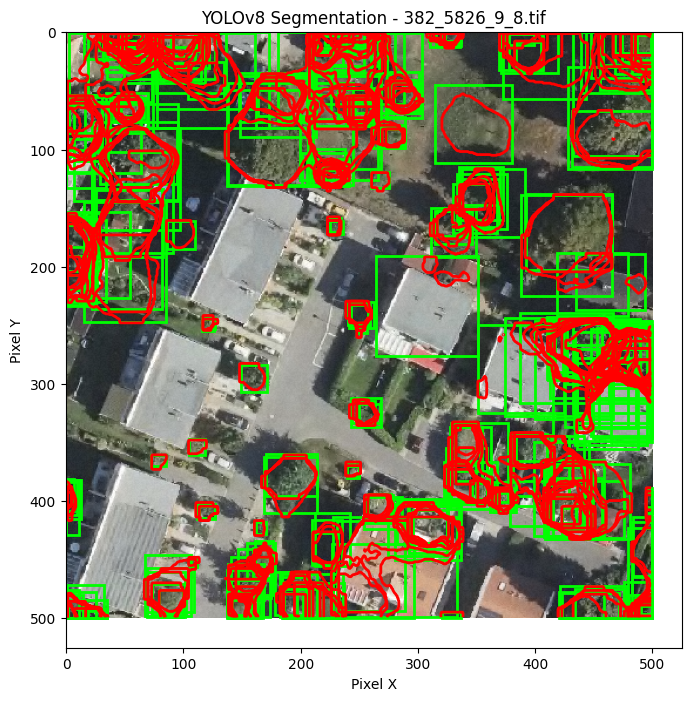

In [9]:
# Function to plot results
import matplotlib.pyplot as plt

def plot_prediction(image_path, results):
    with rasterio.open(image_path) as src:
        image = src.read([1, 2, 3])  # Read as RGB (first three bands)
        image = np.moveaxis(image, 0, -1)  # Convert from (C, H, W) to (H, W, C)

        height, width, _ = image.shape

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(image)  # Show RGB image

        # Plot segmentation masks (Red)
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                mask = mask.cpu().numpy()

                if mask.ndim == 3:  # Some models return (C, H, W) format, take the first channel
                    mask = mask[0]

                mask_resized = cv2.resize(mask, (width, height))  # Resize to match image size
                ax.contour(mask_resized, levels=[0.5], colors='red', linewidths=2)

        # Plot bounding boxes (Green)
        if results[0].boxes is not None:
            for box in results[0].boxes:
                x_min, y_min, x_max, y_max = box.xyxy[0].cpu().numpy()
                ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                           edgecolor="lime", facecolor="none", linewidth=2))

        ax.set_xlabel("Pixel X")
        ax.set_ylabel("Pixel Y")
        ax.set_title(f"YOLOv8 Segmentation - {os.path.basename(image_path)}")
        plt.show()

# Plot results
plot_prediction(test_image_path, results)

In [10]:
results_dir = "/content/drive/MyDrive/masterthesis/data/386_5818/training_results"
os.makedirs(results_dir, exist_ok=True)

# Run validation to extract final metrics
val_results = model.val()
if hasattr(val_results, "results_dict"):
    val_metrics = val_results.results_dict
else:
    val_metrics = {}

# Prepare log data with training parameters and final validation metrics
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
log_data = {
    "train_params": train_params,
    "final_validation_metrics": val_metrics,
}

# ✅ Save final results to JSON
output_json = os.path.join(results_dir, f"results_{timestamp}.json")
with open(output_json, "w") as f:
    json.dump(log_data, f, indent=4)

# 📊 Flatten the log data for CSV saving (each key is prefixed to indicate its source)
flattened_data = {f"train_{k}": v for k, v in train_params.items()}
flattened_data.update({f"val_{k}": v for k, v in val_metrics.items()})
df = pd.DataFrame([flattened_data])

# ✅ Save final results to CSV
output_csv = os.path.join(results_dir, f"results_{timestamp}.csv")
df.to_csv(output_csv, index=False)

print(f"✅ Final training results saved to {output_json} and {output_csv}")

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 254.5±78.2 MB/s, size: 412.9 KB)


val: Scanning /content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset_no_structures_veg_mask/labels/val.cache... 135 images, 4 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:01<00:10,  1.26s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:02<00:08,  1.27s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]


                   all        136       1993      0.582      0.492      0.492      0.186      0.592      0.441      0.453      0.151
Speed: 2.0ms preprocess, 34.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/drive/MyDrive/masterthesis/data/runs/no_struct_veg_mask_all_crowns_dice_loss
✅ Final training results saved to /content/drive/MyDrive/masterthesis/data/386_5818/training_results/results_20250621_172658.json and /content/drive/MyDrive/masterthesis/data/386_5818/training_results/results_20250621_172658.csv
